In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
import os
import time
os.environ['CUDA_VISIBLE_DEVICES']='0'

g:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
g:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
g:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
g:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [2]:
def load_data(path):                  ### 刘宝儿划分   读取PK图
    def encode_labels( y, k):
        onehot = np.zeros((y.shape[0],k ))
        for idx, val in enumerate(y):
            onehot[idx,val] = 1.0  
        return onehot
    series_train,pk_train,y_train,series_test,pk_test,y_test = [],[],[],[],[],[]

    train_path = path + "\\train\\"
    test_path = path + "\\test\\"
    
    train_0_list = os.listdir(train_path+"0")
    for name in train_0_list:
        patient = train_path + "0\\" + name
        slice_list = os.listdir(patient+"\\pk_label")
        for slice_ in slice_list:
            slice_path = patient + "\\pk_label\\" + slice_
            for idx in range(50):
                series = np.load(slice_path + "\\" + str(idx) + ".npy")
                pk_train.append(series)
                y_train.append(0)
        slice_list = os.listdir(patient+"\\series")
        for slice_ in slice_list:
            slice_path = patient + "\\series\\" + slice_
            for idx in range(50):
                series = np.load(slice_path + "\\" + str(idx) + ".npy")
                series_train.append(series)
        

        
    print("--")
    train_1_list = os.listdir(train_path+"1")
    for name in train_1_list:
        patient = train_path + "1\\" + name
        slice_list = os.listdir(patient+"\\pk_label")
        for slice_ in slice_list:
            slice_path = patient + "\\pk_label\\" + slice_
            for idx in range(50):
                series = np.load(slice_path + "\\" + str(idx) + ".npy")
                pk_train.append(series)
                y_train.append(1)
        slice_list = os.listdir(patient+"\\series")
        for slice_ in slice_list:
            slice_path = patient + "\\series\\" + slice_
            for idx in range(50):
                series = np.load(slice_path + "\\" + str(idx) + ".npy")
                series_train.append(series)
        
    print("--")
    test_0_list = os.listdir(test_path+"0")

    for name in test_0_list:
        patient = test_path + "0\\" + name
        slice_list = os.listdir(patient+"\\pk_label")[0] ###
        for slice_ in slice_list:
            slice_path = patient + "\\pk_label\\" + slice_
            series = np.load(slice_path + "\\0.npy")
            pk_test.append(series)
            y_test.append(0)
        slice_list = os.listdir(patient+"\\series")[0]
        for slice_ in slice_list:
            slice_path = patient + "\\series\\" + slice_
            series = np.load(slice_path + "\\0.npy")
            series_test.append(series)
        
    print("--")
    test_1_list = os.listdir(test_path+"1")

    for name in test_1_list:
        patient = test_path + "1\\" + name
        slice_list = os.listdir(patient+"\\pk_label")[0] ###
        for slice_ in slice_list:
            slice_path = patient + "\\pk_label\\" + slice_
            series = np.load(slice_path + "\\0.npy")
            pk_test.append(series)
            y_test.append(1)
        slice_list = os.listdir(patient+"\\series")[0]
        for slice_ in slice_list:
            slice_path = patient + "\\series\\" + slice_
            series = np.load(slice_path + "\\0.npy")
            series_test.append(series)
    
    divide = 1020.
    
    series_train,pk_train,y_train = np.array(series_train)/divide,np.array(pk_train),encode_labels(np.array(y_train),2)
    series_test,pk_test,y_test = np.array(series_test)/divide,np.array(pk_test),encode_labels(np.array(y_test),2)
    
    print(pk_train.shape,pk_test.shape)
    
    X_train,X_test = [],[]
    for i in range(4):                  ###
        train = pk_train[:,:,:,i]
        test = pk_test[:,:,:,i]
        x_max = max(train.max(),test.max())
        train,test = train/x_max,test/x_max
        X_train.append(train)
        X_test.append(test)
    pk_train, pk_test = np.transpose(X_train,(1,2,3,0)),np.transpose(X_test,(1,2,3,0))
    
    return series_train,pk_train,y_train,series_test,pk_test,y_test
    
series_train,pk_train,y_train,series_test,pk_test,y_test = load_data("G:\\ZengQYuan\\data\\ivim\\baoer")

print(series_train.shape,pk_train.shape,y_train.shape,series_test.shape,pk_test.shape,y_test.shape)
print("训练集： ",series_train.max(),series_train.mean(),np.median(series_train))
print("训练集： ",pk_train.max(),pk_train.mean(),np.median(pk_train))
print("测试集： ",series_test.max(),series_test.mean(),np.median(series_test))
print("测试集： ",pk_test.max(),pk_test.mean(),np.median(pk_test))

--
--
--
(13450, 32, 32, 4) (34, 32, 32, 4)
(13450, 32, 32, 9) (13450, 32, 32, 4) (13450, 2) (34, 32, 32, 9) (34, 32, 32, 4) (34, 2)
训练集：  8.467495411517573 0.3197896318045325 0.1788429010504521
训练集：  1.0 0.1807964399045164 0.09581128200287423
测试集：  2.0759855497701496 0.17264476545624344 0.1144199656970872
测试集：  1.0 0.18523864558365086 0.10251362266676693


In [3]:
def Sensitivity_specificity(model_output,equal):   # CNN + FAB + CSAB
    positive_position = 1
    negative_position = 0        
    staticity_T = [0,0]
    staticity_F = [0,0]
    
    for i in range(len(equal)):
        if equal[i] == True:
            staticity_T[model_output[i]] += 1
        else:
            staticity_F[model_output[i]] += 1
        
    sensitivity = staticity_T[positive_position]/(staticity_T[positive_position] + staticity_F[(positive_position+1)%2])
    specificity = staticity_T[negative_position]/(staticity_T[negative_position] + staticity_F[(negative_position+1)%2])
    return sensitivity,specificity

def ROC(label_position_r,p):
    fpr, tpr, thresholds = roc_curve(label_position_r, p[:, 1], drop_intermediate=False)
    AUC = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % AUC)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def conv2d(input_, output_dim, k_size=5, strides=2, stddev=0.02, name="conv2d"):
    conv = tf.layers.conv2d(input_, output_dim, k_size, strides=strides, padding='same',
                                kernel_initializer=tf.truncated_normal_initializer(mean=0.0, stddev=0.02),
                                bias_initializer=tf.constant_initializer(0.0))
    return conv

def FAB(input_feature,c_size=9,ratio=2):
    _,h,w,c_size = input_feature.shape
    TAM_1 = tf.layers.conv2d(input_feature,filters=c_size,kernel_size=3,strides=2,padding='same',activation="relu")
    TAM_1 = tf.layers.max_pooling2d(TAM_1,pool_size=2,strides=2)
    print("TAM_1 ",TAM_1.shape)
    
    TAM_2 = tf.layers.conv2d(TAM_1,filters=c_size,kernel_size=3,strides=4,padding='same',activation="relu")
    TAM_2 = tf.layers.max_pooling2d(TAM_2,pool_size=2,strides=2)
    print("TAM_2 ",TAM_2.shape)
    
    fc1 = tf.layers.conv2d(inputs=TAM_2, filters=c_size*ratio, kernel_size=(1, 1), padding="same", activation="relu")
    print("fc1: ",fc1.shape)
    
    fc2 = tf.layers.conv2d(inputs=fc1,filters=c_size, kernel_size=(1, 1), padding="same", activation=None)
    fc2 = tf.nn.sigmoid(fc2)
    print("fc2: ",fc2.shape)
    
    fc_out = fc2 * input_feature
    print("fc_out: ",fc_out.shape)
    return fc_out,fc2

def CSAB(input_feature,scale,ratio=2):
    _,h,w,c = input_feature.shape
    print(h,w,c)
    CHANNEL_1 = tf.layers.conv2d(input_feature,filters=c,kernel_size=3,strides=2,padding='same',activation="relu")
    CHANNEL_1 = tf.layers.max_pooling2d(CHANNEL_1,pool_size=2,strides=2)
    print("CHANNEL_1 ",CHANNEL_1.shape)
    
    CHANNEL_2 = tf.layers.conv2d(CHANNEL_1,filters=c,kernel_size=3,strides=scale,padding='same',activation="relu")
    CHANNEL_2 = tf.layers.max_pooling2d(CHANNEL_2,pool_size=2,strides=2)
    print("CHANNEL_2 ",CHANNEL_2.shape)
    
    CHANNEL_fc1 = tf.layers.conv2d(inputs=CHANNEL_2, filters=c*ratio, kernel_size=(1, 1), padding="same", activation="relu")
    print("CHANNEL_fc1: ",CHANNEL_fc1.shape)
    
    CHANNEL_fc2 = tf.layers.conv2d(inputs=CHANNEL_fc1,filters=c, kernel_size=(1, 1), padding="same", activation=None)
    CHANNEL_fc2 = tf.nn.sigmoid(CHANNEL_fc2)              # channel attention
    print("CHANNEL_fc2: ",CHANNEL_fc2.shape)
    
    CHANNEL_fc_out = CHANNEL_fc2 * input_feature
    print("fc_out: ",CHANNEL_fc_out.shape)
    
    SPATIAL_1 = tf.layers.conv2d(inputs=CHANNEL_fc_out,filters=16,kernel_size=(1, 1),padding="same", activation="relu")
    print("SPATIAL_1: ",SPATIAL_1.shape)
    
    SPATIAL_2 = tf.layers.conv2d(inputs=SPATIAL_1,filters=1,kernel_size=(1, 1),padding="same", activation=None)
    SPATIAL_2 = tf.sigmoid(SPATIAL_2)                      # spatial attention
    print("SPATIAL_2: ",SPATIAL_2.shape)
    
    SPATIAL_out = CHANNEL_fc_out * SPATIAL_2
    print("SPATIAL_out: ",SPATIAL_out.shape)
    
    out = tf.nn.relu(SPATIAL_out)
    print("out1: ",out.shape)
    
    return out,CHANNEL_fc2,SPATIAL_2


def cnn(xx, isTrain=True):
    with tf.name_scope('cnn'):
        kernel_deep = 64
        print('image ' + str(xx.shape))
        h0 = tf.nn.relu(tf.layers.batch_normalization(conv2d(xx, kernel_deep, strides=1), training=isTrain))
        h0max = tf.nn.max_pool(h0, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        print('h0 ' + str(h0max.shape))
        h1 = tf.nn.relu(tf.layers.batch_normalization(conv2d(h0max, kernel_deep * 2, strides=1), training=isTrain))
        h1max = tf.nn.max_pool(h1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        print('h1 ' + str(h1max.shape))
        feature_map = tf.reshape(h1max, [-1, 8 * 8 * kernel_deep * 2])
        f1 = tf.layers.dense(feature_map, 512)
        mid = tf.layers.dense(f1, 2)
        return mid, tf.nn.softmax(mid), f1


def cnn_fab_csab(xx,isTrain=True):
    with tf.name_scope('cnn_fab_csab'):
        kernel_deep = 64
        print('image ' + str(xx.shape))
        out,frame_weight = FAB(xx,9)
        h0 = tf.nn.relu(tf.layers.batch_normalization(conv2d(out, kernel_deep, strides=1), training=isTrain))
        print("h0 ",h0.shape)
        h0_csab = CSAB(h0,4)[0]
        print("h0_csab ",h0_csab.shape)
        h0max = tf.nn.max_pool(h0_csab, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        print('h0 pool ' + str(h0max.shape))
        h1 = tf.nn.relu(tf.layers.batch_normalization(conv2d(h0max, kernel_deep * 2, strides=1), training=isTrain))
        print("h1 ",h1.shape)
        h1_csab = CSAB(h1,2)[0]
        print("h1csab ",h1_csab.shape)
        h1max = tf.nn.max_pool(h1_csab, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        print('h1 pool ' + str(h1max.shape))
        feature_map = tf.reshape(h1max, [-1, 8 * 8 * kernel_deep * 2])
        return feature_map

        
    
height = 32
width = 32
batch_size=64

with tf.name_scope('INPUT'):
    series_ = tf.placeholder(tf.float32,[None,height,width,9])
    pk_ = tf.placeholder(tf.float32,[None,height,width,4])   
    y_ =tf.placeholder(tf.int64,[None,2])
    keep_prob=tf.placeholder(tf.float32)

with tf.name_scope('LAYER'):
    out1 = cnn_fab_csab(series_)
    out2 = cnn_fab_csab(pk_)
    Connection = tf.concat([out1,out2],axis=-1)
    print("Connection ",Connection.shape)
    f1 = tf.layers.dense(Connection, 512,activation=tf.nn.relu)
    result = tf.layers.dense(f1, 2)
    prediction = tf.nn.softmax(result)
    print("prediction ",prediction.shape)
    
with tf.name_scope('Loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = prediction, labels = y_))
    tf.summary.scalar('Loss',loss)

with tf.name_scope('train'):
    global_step = tf.Variable(0)
    learning_rate = tf.train.exponential_decay(2e-3,global_step,decay_steps=100,decay_rate=0.99,staircase=True)
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
with tf.name_scope('Accuracy'):
    output_position = tf.argmax(prediction,1)
    label_position = tf.argmax(y_,1)
    predict = tf.equal(output_position, label_position)
    Accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))
    tf.summary.scalar('Accuracy',Accuracy)

image (?, 32, 32, 9)
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
TAM_1  (?, 8, 8, 9)
TAM_2  (?, 1, 1, 9)
fc1:  (?, 1, 1, 18)
fc2:  (?, 1, 1, 9)
fc_out:  (?, 32, 32, 9)
Instructions for updating:
Use keras.layers.batch_normalization instead.
h0  (?, 32, 32, 64)
32 32 64
CHANNEL_1  (?, 8, 8, 64)
CHANNEL_2  (?, 1, 1, 64)
CHANNEL_fc1:  (?, 1, 1, 128)
CHANNEL_fc2:  (?, 1, 1, 64)
fc_out:  (?, 32, 32, 64)
SPATIAL_1:  (?, 32, 32, 16)
SPATIAL_2:  (?, 32, 32, 1)
SPATIAL_out:  (?, 32, 32, 64)
out1:  (?, 32, 32, 64)
h0_csab  (?, 32, 32, 64)
h0 pool (?, 16, 16, 64)
h1  (?, 16, 16, 128)
16 16 128
CHANNEL_1  (?, 4, 4, 128)
CHANNEL_2  (?, 1, 1, 128)
CHANNEL_fc1:  (?, 1, 1, 256)
CHANNEL_fc2:  (?, 1, 1, 128)
fc_out:  (?, 16, 16, 128)
SPATIAL_1:  (?, 16, 16, 16)
SPATIAL_2:  (?, 16, 16, 1)
SPATIAL_out:  (?, 16, 16, 128)
out1:  (?, 16, 16, 128)
h1csab  (

In [4]:
merge = tf.summary.merge_all()
init_op=tf.global_variables_initializer()
config = tf.ConfigProto()
config.gpu_options.allow_growth=True


Instructions for updating:
To construct input pipelines, use the `tf.data` module.
0  test  0  acc=  0.5882353  loss =  0.68035465  sen:  0.3076923076923077  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0]


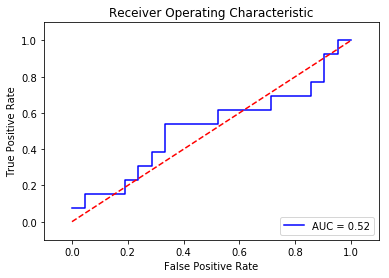

0  test  50  acc=  0.64705884  loss =  0.68343633  sen:  0.7692307692307693  spe:  0.5714285714285714
0  test  100  acc=  0.5882353  loss =  0.68080866  sen:  0.7692307692307693  spe:  0.47619047619047616
0  test  150  acc=  0.6764706  loss =  0.6694234  sen:  0.6923076923076923  spe:  0.6666666666666666
0  test  200  acc=  0.5882353  loss =  0.6726627  sen:  0.6923076923076923  spe:  0.5238095238095238
0  test  250  acc=  0.61764705  loss =  0.6695805  sen:  0.6923076923076923  spe:  0.5714285714285714
0  test  300  acc=  0.64705884  loss =  0.66610646  sen:  0.6923076923076923  spe:  0.6190476190476191
0  test  350  acc=  0.7058824  loss =  0.660754  sen:  0.6923076923076923  spe:  0.7142857142857143
0  test  400  acc=  0.6764706  loss =  0.6615544  sen:  0.6923076923076923  spe:  0.6666666666666666
0  test  450  acc=  0.64705884  loss =  0.6617528  sen:  0.6923076923076923  spe:  0.6190476190476191
0  test  500  acc=  0.64705884  loss =  0.6611205  sen:  0.6923076923076923  spe:  0.

0  test  4000  acc=  0.7352941  loss =  0.59579194  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


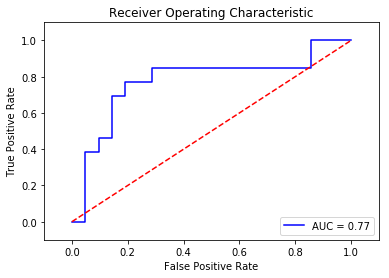

0  test  4050  acc=  0.7352941  loss =  0.59509695  sen:  0.7692307692307693  spe:  0.7142857142857143
0  test  4100  acc=  0.7352941  loss =  0.58583826  sen:  0.7692307692307693  spe:  0.7142857142857143
0  test  4150  acc=  0.7352941  loss =  0.5854308  sen:  0.7692307692307693  spe:  0.7142857142857143
0  test  4200  acc=  0.7352941  loss =  0.5908825  sen:  0.7692307692307693  spe:  0.7142857142857143
0  test  4250  acc=  0.7352941  loss =  0.5885927  sen:  0.7692307692307693  spe:  0.7142857142857143
0  test  4300  acc=  0.7647059  loss =  0.5890784  sen:  0.8461538461538461  spe:  0.7142857142857143
0  test  4350  acc=  0.7352941  loss =  0.5841321  sen:  0.7692307692307693  spe:  0.7142857142857143
0  test  4400  acc=  0.7352941  loss =  0.5887883  sen:  0.7692307692307693  spe:  0.7142857142857143
0  test  4450  acc=  0.7352941  loss =  0.5845141  sen:  0.7692307692307693  spe:  0.7142857142857143
0  test  4500  acc=  0.7352941  loss =  0.5850923  sen:  0.7692307692307693  spe

0  test  8000  acc=  0.7058824  loss =  0.5580214  sen:  0.7692307692307693  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


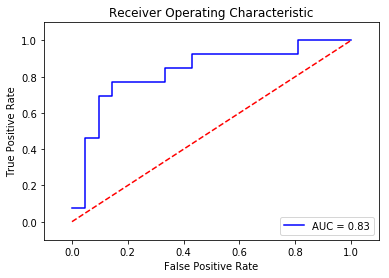

0  test  8050  acc=  0.7352941  loss =  0.5623334  sen:  0.8461538461538461  spe:  0.6666666666666666
0  test  8100  acc=  0.7058824  loss =  0.5553276  sen:  0.7692307692307693  spe:  0.6666666666666666
0  test  8150  acc=  0.7058824  loss =  0.5512663  sen:  0.7692307692307693  spe:  0.6666666666666666
0  test  8200  acc=  0.7058824  loss =  0.5552621  sen:  0.7692307692307693  spe:  0.6666666666666666
0  test  8250  acc=  0.7058824  loss =  0.5552411  sen:  0.7692307692307693  spe:  0.6666666666666666
0  test  8300  acc=  0.7058824  loss =  0.55191946  sen:  0.7692307692307693  spe:  0.6666666666666666
0  test  8350  acc=  0.7058824  loss =  0.55205023  sen:  0.7692307692307693  spe:  0.6666666666666666
0  test  8400  acc=  0.7058824  loss =  0.55424017  sen:  0.7692307692307693  spe:  0.6666666666666666
0  test  8450  acc=  0.7058824  loss =  0.55007654  sen:  0.7692307692307693  spe:  0.6666666666666666
0  test  8500  acc=  0.7058824  loss =  0.5549233  sen:  0.7692307692307693  s

0  test  12000  acc=  0.7352941  loss =  0.53857476  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


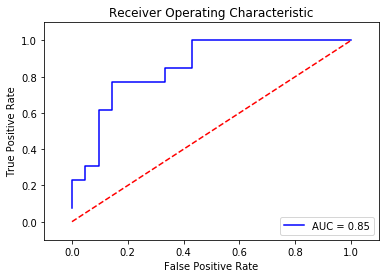

0  test  12050  acc=  0.7058824  loss =  0.53754395  sen:  0.7692307692307693  spe:  0.6666666666666666
0  test  12100  acc=  0.7352941  loss =  0.5338526  sen:  0.7692307692307693  spe:  0.7142857142857143
0  test  12150  acc=  0.7647059  loss =  0.53601414  sen:  0.7692307692307693  spe:  0.7619047619047619
0  test  12200  acc=  0.7352941  loss =  0.5362096  sen:  0.7692307692307693  spe:  0.7142857142857143
0  test  12250  acc=  0.7352941  loss =  0.5353784  sen:  0.8461538461538461  spe:  0.6666666666666666
0  test  12300  acc=  0.7058824  loss =  0.54068553  sen:  0.8461538461538461  spe:  0.6190476190476191
0  test  12350  acc=  0.7647059  loss =  0.52860796  sen:  0.7692307692307693  spe:  0.7619047619047619
0  test  12400  acc=  0.7352941  loss =  0.5313083  sen:  0.7692307692307693  spe:  0.7142857142857143
0  test  12450  acc=  0.7647059  loss =  0.52434325  sen:  0.7692307692307693  spe:  0.7619047619047619
0  test  12500  acc=  0.7647059  loss =  0.5274535  sen:  0.76923076

0  test  15950  acc=  0.7941176  loss =  0.52061033  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  16000  acc=  0.7941176  loss =  0.5194326  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


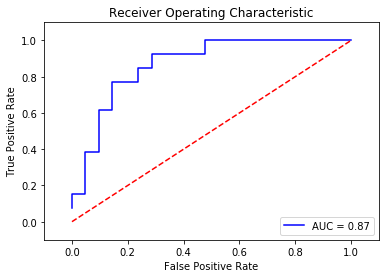

0  test  16050  acc=  0.7941176  loss =  0.51716626  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  16100  acc=  0.7941176  loss =  0.5230432  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  16150  acc=  0.7647059  loss =  0.5240579  sen:  0.7692307692307693  spe:  0.7619047619047619
0  test  16200  acc=  0.7941176  loss =  0.52536327  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  16250  acc=  0.7941176  loss =  0.52161777  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  16300  acc=  0.7941176  loss =  0.5238677  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  16350  acc=  0.7941176  loss =  0.5175656  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  16400  acc=  0.7941176  loss =  0.5196841  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  16450  acc=  0.7941176  loss =  0.522123  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  16500  acc=  0.7941176  loss =  0.5215129  sen:  0.84615384615

0  test  19950  acc=  0.7941176  loss =  0.51546913  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  20000  acc=  0.7941176  loss =  0.5155235  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


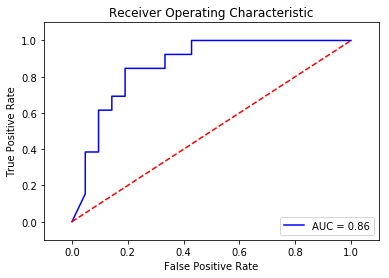

0  test  20050  acc=  0.7941176  loss =  0.5273083  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  20100  acc=  0.7941176  loss =  0.5211804  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  20150  acc=  0.7941176  loss =  0.5223298  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  20200  acc=  0.7941176  loss =  0.5202298  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  20250  acc=  0.7941176  loss =  0.5194393  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  20300  acc=  0.7941176  loss =  0.523507  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  20350  acc=  0.7941176  loss =  0.51906645  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  20400  acc=  0.7941176  loss =  0.51995784  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  20450  acc=  0.7941176  loss =  0.5146631  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  20500  acc=  0.7941176  loss =  0.5211854  sen:  0.846153846153

0  test  23950  acc=  0.7941176  loss =  0.5157428  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  24000  acc=  0.7941176  loss =  0.5161891  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


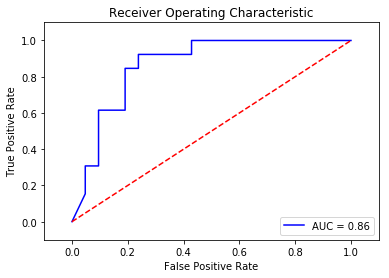

0  test  24050  acc=  0.7941176  loss =  0.5170459  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  24100  acc=  0.7941176  loss =  0.5165324  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  24150  acc=  0.7941176  loss =  0.513939  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  24200  acc=  0.7941176  loss =  0.5196106  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  24250  acc=  0.7941176  loss =  0.5143428  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  24300  acc=  0.7941176  loss =  0.51522046  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  24350  acc=  0.7941176  loss =  0.5172749  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  24400  acc=  0.7941176  loss =  0.5181706  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  24450  acc=  0.7941176  loss =  0.5238242  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  24500  acc=  0.7941176  loss =  0.51912105  sen:  0.846153846153

0  test  27950  acc=  0.7941176  loss =  0.51617  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  28000  acc=  0.7941176  loss =  0.5179874  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


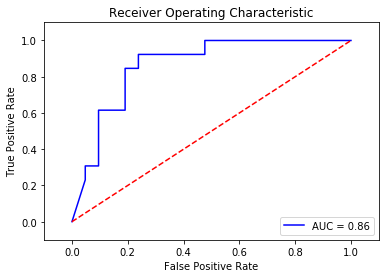

0  test  28050  acc=  0.7941176  loss =  0.51849633  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  28100  acc=  0.7941176  loss =  0.51646394  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  28150  acc=  0.7941176  loss =  0.5167843  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  28200  acc=  0.7941176  loss =  0.5148651  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  28250  acc=  0.7941176  loss =  0.5143418  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  28300  acc=  0.7941176  loss =  0.514895  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  28350  acc=  0.8235294  loss =  0.5146039  sen:  0.8461538461538461  spe:  0.8095238095238095
0  test  28400  acc=  0.7941176  loss =  0.51524305  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  28450  acc=  0.7941176  loss =  0.5161926  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  28500  acc=  0.7941176  loss =  0.5148466  sen:  0.84615384615

0  test  31950  acc=  0.7941176  loss =  0.5109818  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  32000  acc=  0.8235294  loss =  0.5120752  sen:  0.8461538461538461  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


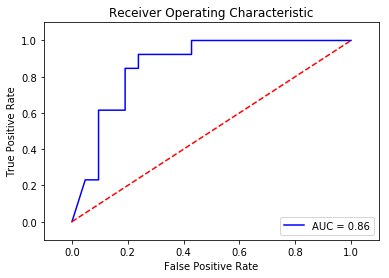

0  test  32050  acc=  0.7941176  loss =  0.51621616  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  32100  acc=  0.7941176  loss =  0.5127808  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  32150  acc=  0.8235294  loss =  0.51047397  sen:  0.8461538461538461  spe:  0.8095238095238095
0  test  32200  acc=  0.7941176  loss =  0.515139  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  32250  acc=  0.8235294  loss =  0.51450163  sen:  0.8461538461538461  spe:  0.8095238095238095
0  test  32300  acc=  0.7941176  loss =  0.51121914  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  32350  acc=  0.8235294  loss =  0.51353383  sen:  0.8461538461538461  spe:  0.8095238095238095
0  test  32400  acc=  0.7941176  loss =  0.512236  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  32450  acc=  0.7941176  loss =  0.5140471  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  32500  acc=  0.7941176  loss =  0.5135851  sen:  0.8461538461

0  test  35950  acc=  0.7941176  loss =  0.52194476  sen:  0.7692307692307693  spe:  0.8095238095238095
0  test  36000  acc=  0.7941176  loss =  0.514091  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


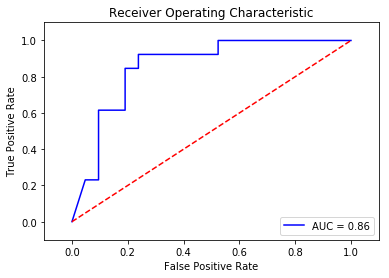

0  test  36050  acc=  0.7941176  loss =  0.5146327  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  36100  acc=  0.7941176  loss =  0.518268  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  36150  acc=  0.7941176  loss =  0.52113163  sen:  0.7692307692307693  spe:  0.8095238095238095
0  test  36200  acc=  0.7941176  loss =  0.51516974  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  36250  acc=  0.7941176  loss =  0.5177301  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  36300  acc=  0.8235294  loss =  0.51522005  sen:  0.8461538461538461  spe:  0.8095238095238095
0  test  36350  acc=  0.8235294  loss =  0.5138738  sen:  0.8461538461538461  spe:  0.8095238095238095
0  test  36400  acc=  0.7647059  loss =  0.5217978  sen:  0.7692307692307693  spe:  0.7619047619047619
0  test  36450  acc=  0.7647059  loss =  0.52812904  sen:  0.7692307692307693  spe:  0.7619047619047619
0  test  36500  acc=  0.7941176  loss =  0.5181249  sen:  0.8461538461

0  test  39950  acc=  0.7941176  loss =  0.5104111  sen:  0.8461538461538461  spe:  0.7619047619047619
0  test  40000  acc=  0.8235294  loss =  0.51748675  sen:  0.8461538461538461  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


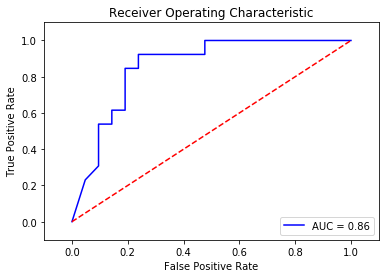

1  test  0  acc=  0.61764705  loss =  0.6927388  sen:  0.07692307692307693  spe:  0.9523809523809523
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


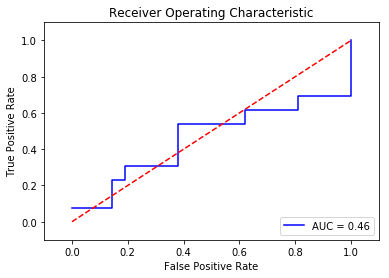

1  test  50  acc=  0.61764705  loss =  0.6793831  sen:  0.6923076923076923  spe:  0.5714285714285714
1  test  100  acc=  0.6764706  loss =  0.67061424  sen:  0.6923076923076923  spe:  0.6666666666666666
1  test  150  acc=  0.6764706  loss =  0.6660747  sen:  0.6923076923076923  spe:  0.6666666666666666
1  test  200  acc=  0.7058824  loss =  0.6594178  sen:  0.6923076923076923  spe:  0.7142857142857143
1  test  250  acc=  0.7058824  loss =  0.6565514  sen:  0.6923076923076923  spe:  0.7142857142857143
1  test  300  acc=  0.6764706  loss =  0.65088505  sen:  0.6153846153846154  spe:  0.7142857142857143
1  test  350  acc=  0.7058824  loss =  0.64961904  sen:  0.6923076923076923  spe:  0.7142857142857143
1  test  400  acc=  0.7058824  loss =  0.6488459  sen:  0.6923076923076923  spe:  0.7142857142857143
1  test  450  acc=  0.6764706  loss =  0.6433341  sen:  0.6153846153846154  spe:  0.7142857142857143
1  test  500  acc=  0.7058824  loss =  0.6429767  sen:  0.6923076923076923  spe:  0.7142

1  test  4000  acc=  0.7941176  loss =  0.5712219  sen:  0.7692307692307693  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


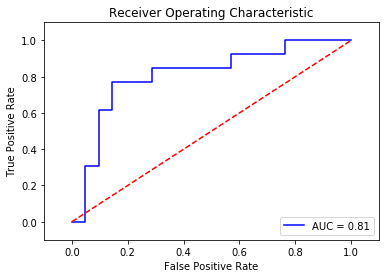

1  test  4050  acc=  0.7941176  loss =  0.5709939  sen:  0.7692307692307693  spe:  0.8095238095238095
1  test  4100  acc=  0.7941176  loss =  0.5702494  sen:  0.7692307692307693  spe:  0.8095238095238095
1  test  4150  acc=  0.7941176  loss =  0.5677327  sen:  0.7692307692307693  spe:  0.8095238095238095
1  test  4200  acc=  0.7941176  loss =  0.5674593  sen:  0.7692307692307693  spe:  0.8095238095238095
1  test  4250  acc=  0.7941176  loss =  0.56751734  sen:  0.7692307692307693  spe:  0.8095238095238095
1  test  4300  acc=  0.7647059  loss =  0.5700353  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  4350  acc=  0.7941176  loss =  0.56685185  sen:  0.7692307692307693  spe:  0.8095238095238095
1  test  4400  acc=  0.7941176  loss =  0.56916636  sen:  0.7692307692307693  spe:  0.8095238095238095
1  test  4450  acc=  0.7941176  loss =  0.56708306  sen:  0.7692307692307693  spe:  0.8095238095238095
1  test  4500  acc=  0.7941176  loss =  0.56399494  sen:  0.7692307692307693  

1  test  8000  acc=  0.7647059  loss =  0.55624354  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


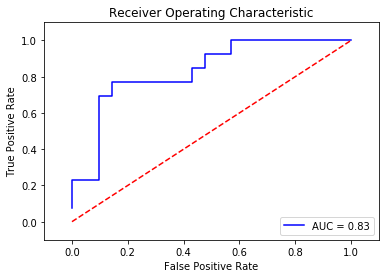

1  test  8050  acc=  0.7647059  loss =  0.55618095  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  8100  acc=  0.7647059  loss =  0.5584239  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  8150  acc=  0.7647059  loss =  0.55186033  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  8200  acc=  0.7647059  loss =  0.54991966  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  8250  acc=  0.7647059  loss =  0.55665284  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  8300  acc=  0.7647059  loss =  0.55416834  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  8350  acc=  0.7647059  loss =  0.5508573  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  8400  acc=  0.7647059  loss =  0.55284864  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  8450  acc=  0.7352941  loss =  0.5570914  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  8500  acc=  0.7647059  loss =  0.5586705  sen:  0.7692307692307693 

1  test  12000  acc=  0.7352941  loss =  0.5503022  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


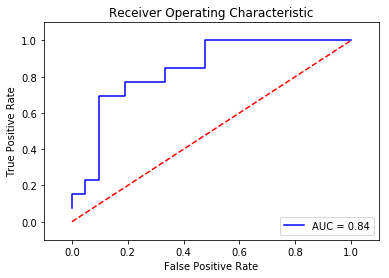

1  test  12050  acc=  0.7352941  loss =  0.54679793  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  12100  acc=  0.7352941  loss =  0.5402108  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  12150  acc=  0.7352941  loss =  0.545632  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  12200  acc=  0.7352941  loss =  0.54574776  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  12250  acc=  0.7352941  loss =  0.5451676  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  12300  acc=  0.7352941  loss =  0.54326963  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  12350  acc=  0.7647059  loss =  0.5409364  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  12400  acc=  0.7647059  loss =  0.5442529  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  12450  acc=  0.7352941  loss =  0.5407976  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  12500  acc=  0.7352941  loss =  0.54021347  sen:  0.7692307692

1  test  15950  acc=  0.7352941  loss =  0.538286  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  16000  acc=  0.7647059  loss =  0.5312054  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


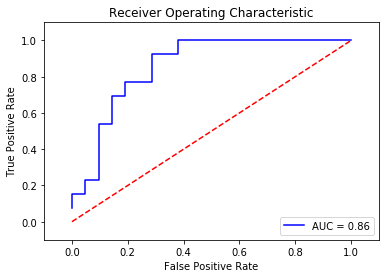

1  test  16050  acc=  0.7352941  loss =  0.5346996  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  16100  acc=  0.7647059  loss =  0.53292215  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  16150  acc=  0.7647059  loss =  0.53570324  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  16200  acc=  0.7647059  loss =  0.53436023  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  16250  acc=  0.7647059  loss =  0.52950126  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  16300  acc=  0.7352941  loss =  0.53270906  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  16350  acc=  0.7647059  loss =  0.53126717  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  16400  acc=  0.7647059  loss =  0.53088576  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  16450  acc=  0.7647059  loss =  0.53443116  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  16500  acc=  0.7352941  loss =  0.53222513  sen:  0.7692

1  test  19950  acc=  0.7352941  loss =  0.54525256  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  20000  acc=  0.7352941  loss =  0.5426095  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


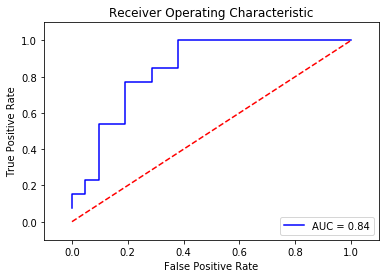

1  test  20050  acc=  0.7647059  loss =  0.5367947  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  20100  acc=  0.7647059  loss =  0.5380043  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  20150  acc=  0.7647059  loss =  0.5381405  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  20200  acc=  0.7647059  loss =  0.5382073  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  20250  acc=  0.7647059  loss =  0.53916156  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  20300  acc=  0.7352941  loss =  0.5394483  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  20350  acc=  0.7647059  loss =  0.5402756  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  20400  acc=  0.7352941  loss =  0.540768  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  20450  acc=  0.7352941  loss =  0.5407902  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  20500  acc=  0.7647059  loss =  0.53735125  sen:  0.769230769230

1  test  23950  acc=  0.7647059  loss =  0.5487775  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  24000  acc=  0.7647059  loss =  0.5443766  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


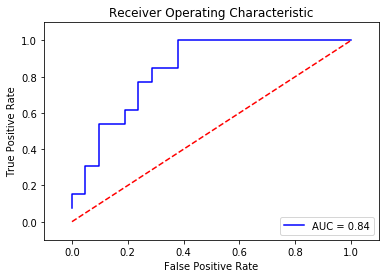

1  test  24050  acc=  0.7352941  loss =  0.5436812  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  24100  acc=  0.7352941  loss =  0.54744613  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  24150  acc=  0.7352941  loss =  0.5458126  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  24200  acc=  0.7352941  loss =  0.54689825  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  24250  acc=  0.7647059  loss =  0.5498554  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  24300  acc=  0.7352941  loss =  0.54602784  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  24350  acc=  0.7352941  loss =  0.5532565  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  24400  acc=  0.7352941  loss =  0.54821134  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  24450  acc=  0.7352941  loss =  0.5515354  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  24500  acc=  0.7352941  loss =  0.55250025  sen:  0.76923076

1  test  27950  acc=  0.7352941  loss =  0.55207264  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  28000  acc=  0.7352941  loss =  0.5522944  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


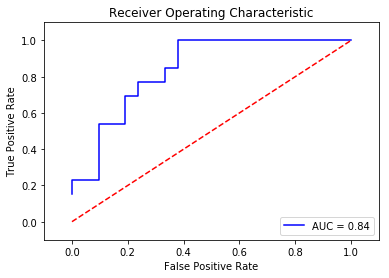

1  test  28050  acc=  0.7352941  loss =  0.54994404  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  28100  acc=  0.7352941  loss =  0.5503255  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  28150  acc=  0.7352941  loss =  0.5497483  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  28200  acc=  0.7352941  loss =  0.5515144  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  28250  acc=  0.7352941  loss =  0.55108976  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  28300  acc=  0.7352941  loss =  0.54982734  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  28350  acc=  0.7352941  loss =  0.5519886  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  28400  acc=  0.7352941  loss =  0.54558086  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  28450  acc=  0.7352941  loss =  0.5506596  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  28500  acc=  0.7352941  loss =  0.5490764  sen:  0.769230769

1  test  31950  acc=  0.7352941  loss =  0.54784137  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  32000  acc=  0.7647059  loss =  0.550227  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


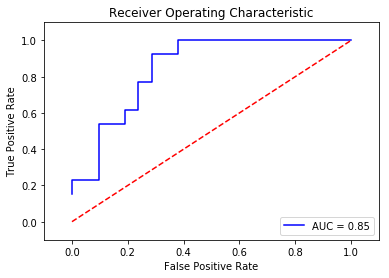

1  test  32050  acc=  0.7352941  loss =  0.5429611  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  32100  acc=  0.7647059  loss =  0.54800093  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  32150  acc=  0.7352941  loss =  0.54718274  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  32200  acc=  0.7352941  loss =  0.54826874  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  32250  acc=  0.7352941  loss =  0.5498093  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  32300  acc=  0.7352941  loss =  0.55059904  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  32350  acc=  0.7352941  loss =  0.5465763  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  32400  acc=  0.7352941  loss =  0.5476507  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  32450  acc=  0.7352941  loss =  0.5470128  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  32500  acc=  0.7647059  loss =  0.5490595  sen:  0.769230769

1  test  35950  acc=  0.7352941  loss =  0.54761267  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  36000  acc=  0.7352941  loss =  0.5478023  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


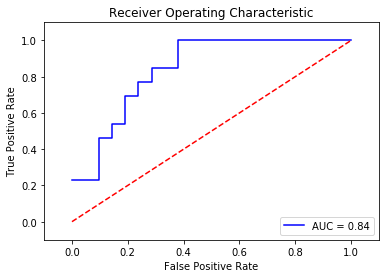

1  test  36050  acc=  0.7352941  loss =  0.54642075  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  36100  acc=  0.7352941  loss =  0.546915  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  36150  acc=  0.7352941  loss =  0.5497238  sen:  0.7692307692307693  spe:  0.7142857142857143
1  test  36200  acc=  0.7647059  loss =  0.54796416  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  36250  acc=  0.7647059  loss =  0.54816025  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  36300  acc=  0.7647059  loss =  0.54748714  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  36350  acc=  0.7647059  loss =  0.54467857  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  36400  acc=  0.7647059  loss =  0.54728717  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  36450  acc=  0.7647059  loss =  0.54633904  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  36500  acc=  0.7647059  loss =  0.546163  sen:  0.76923076

1  test  39950  acc=  0.7647059  loss =  0.5426273  sen:  0.7692307692307693  spe:  0.7619047619047619
1  test  40000  acc=  0.7647059  loss =  0.54399437  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


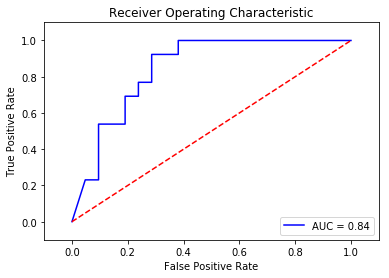

2  test  0  acc=  0.38235295  loss =  0.7206645  sen:  1.0  spe:  0.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


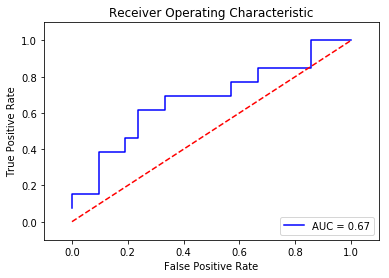

2  test  50  acc=  0.44117647  loss =  0.7001322  sen:  1.0  spe:  0.09523809523809523
2  test  100  acc=  0.5294118  loss =  0.6874661  sen:  1.0  spe:  0.23809523809523808
2  test  150  acc=  0.5  loss =  0.67700815  sen:  0.8461538461538461  spe:  0.2857142857142857
2  test  200  acc=  0.5294118  loss =  0.67271805  sen:  0.8461538461538461  spe:  0.3333333333333333
2  test  250  acc=  0.61764705  loss =  0.6632529  sen:  0.7692307692307693  spe:  0.5238095238095238
2  test  300  acc=  0.6764706  loss =  0.6580885  sen:  0.7692307692307693  spe:  0.6190476190476191
2  test  350  acc=  0.6764706  loss =  0.65636724  sen:  0.7692307692307693  spe:  0.6190476190476191
2  test  400  acc=  0.64705884  loss =  0.6544562  sen:  0.6923076923076923  spe:  0.6190476190476191
2  test  450  acc=  0.64705884  loss =  0.65151536  sen:  0.6923076923076923  spe:  0.6190476190476191
2  test  500  acc=  0.61764705  loss =  0.6489536  sen:  0.6153846153846154  spe:  0.6190476190476191
2  test  550  ac

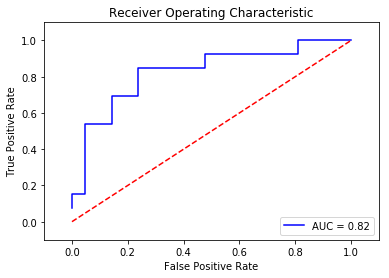

2  test  4050  acc=  0.7647059  loss =  0.5845236  sen:  0.8461538461538461  spe:  0.7142857142857143
2  test  4100  acc=  0.7647059  loss =  0.57933027  sen:  0.8461538461538461  spe:  0.7142857142857143
2  test  4150  acc=  0.7647059  loss =  0.57571167  sen:  0.8461538461538461  spe:  0.7142857142857143
2  test  4200  acc=  0.7647059  loss =  0.57538044  sen:  0.8461538461538461  spe:  0.7142857142857143
2  test  4250  acc=  0.7647059  loss =  0.5744297  sen:  0.8461538461538461  spe:  0.7142857142857143
2  test  4300  acc=  0.7647059  loss =  0.5758258  sen:  0.8461538461538461  spe:  0.7142857142857143
2  test  4350  acc=  0.7352941  loss =  0.5742835  sen:  0.8461538461538461  spe:  0.6666666666666666
2  test  4400  acc=  0.7352941  loss =  0.5771731  sen:  0.8461538461538461  spe:  0.6666666666666666
2  test  4450  acc=  0.7352941  loss =  0.5759903  sen:  0.8461538461538461  spe:  0.6666666666666666
2  test  4500  acc=  0.7647059  loss =  0.57193816  sen:  0.8461538461538461  s

2  test  8000  acc=  0.8235294  loss =  0.53080106  sen:  0.7692307692307693  spe:  0.8571428571428571
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


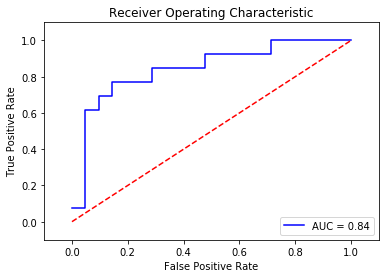

2  test  8050  acc=  0.7647059  loss =  0.533816  sen:  0.7692307692307693  spe:  0.7619047619047619
2  test  8100  acc=  0.7647059  loss =  0.53751093  sen:  0.7692307692307693  spe:  0.7619047619047619
2  test  8150  acc=  0.7647059  loss =  0.5356169  sen:  0.7692307692307693  spe:  0.7619047619047619
2  test  8200  acc=  0.7352941  loss =  0.53576857  sen:  0.7692307692307693  spe:  0.7142857142857143
2  test  8250  acc=  0.7941176  loss =  0.53143513  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  8300  acc=  0.8235294  loss =  0.53015935  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  8350  acc=  0.7941176  loss =  0.53053725  sen:  0.8461538461538461  spe:  0.7619047619047619
2  test  8400  acc=  0.7941176  loss =  0.5333676  sen:  0.8461538461538461  spe:  0.7619047619047619
2  test  8450  acc=  0.8235294  loss =  0.5272911  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  8500  acc=  0.8235294  loss =  0.529354  sen:  0.7692307692307693  sp

2  test  12000  acc=  0.7941176  loss =  0.51946366  sen:  0.7692307692307693  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


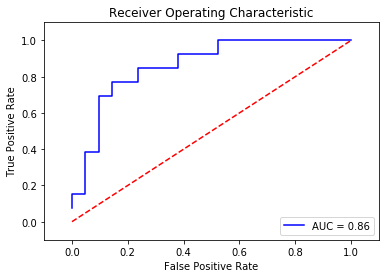

2  test  12050  acc=  0.7941176  loss =  0.5186425  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  12100  acc=  0.8235294  loss =  0.5136655  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  12150  acc=  0.7941176  loss =  0.5147876  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  12200  acc=  0.7941176  loss =  0.51741564  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  12250  acc=  0.7941176  loss =  0.51492447  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  12300  acc=  0.7941176  loss =  0.5186458  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  12350  acc=  0.8235294  loss =  0.51052654  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  12400  acc=  0.7941176  loss =  0.51652044  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  12450  acc=  0.7941176  loss =  0.51400316  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  12500  acc=  0.7941176  loss =  0.5105427  sen:  0.76923076

2  test  15950  acc=  0.7941176  loss =  0.50401676  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  16000  acc=  0.7941176  loss =  0.5023281  sen:  0.7692307692307693  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


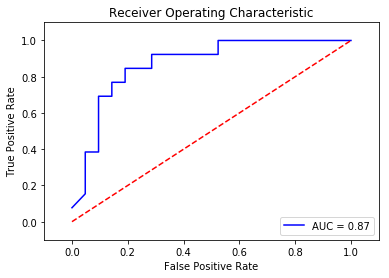

2  test  16050  acc=  0.7941176  loss =  0.50273836  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  16100  acc=  0.8235294  loss =  0.49914664  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  16150  acc=  0.7941176  loss =  0.5018286  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  16200  acc=  0.7941176  loss =  0.5065076  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  16250  acc=  0.7941176  loss =  0.5006185  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  16300  acc=  0.7941176  loss =  0.50067896  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  16350  acc=  0.7941176  loss =  0.5043212  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  16400  acc=  0.7941176  loss =  0.5036223  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  16450  acc=  0.7941176  loss =  0.5028521  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  16500  acc=  0.7941176  loss =  0.5039034  sen:  0.7692307692

2  test  19950  acc=  0.8235294  loss =  0.485502  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  20000  acc=  0.8235294  loss =  0.4886005  sen:  0.7692307692307693  spe:  0.8571428571428571
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


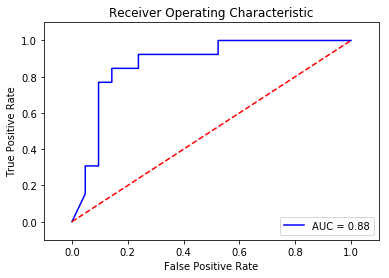

2  test  20050  acc=  0.8235294  loss =  0.4833815  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  20100  acc=  0.8235294  loss =  0.48314807  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  20150  acc=  0.8235294  loss =  0.4929565  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  20200  acc=  0.8235294  loss =  0.49121228  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  20250  acc=  0.8235294  loss =  0.48575306  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  20300  acc=  0.8235294  loss =  0.48611456  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  20350  acc=  0.8235294  loss =  0.4925162  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  20400  acc=  0.8235294  loss =  0.4894729  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  20450  acc=  0.8235294  loss =  0.49012095  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  20500  acc=  0.8235294  loss =  0.487692  sen:  0.769230769

2  test  23950  acc=  0.8235294  loss =  0.48085862  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  24000  acc=  0.8235294  loss =  0.48260054  sen:  0.7692307692307693  spe:  0.8571428571428571
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


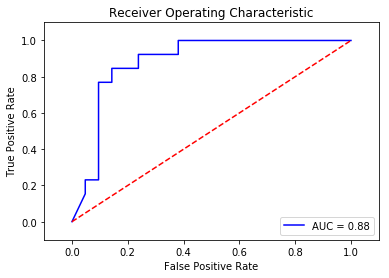

2  test  24050  acc=  0.8235294  loss =  0.4848962  sen:  0.8461538461538461  spe:  0.8095238095238095
2  test  24100  acc=  0.8235294  loss =  0.48084944  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  24150  acc=  0.8235294  loss =  0.47950745  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  24200  acc=  0.85294116  loss =  0.48225892  sen:  0.8461538461538461  spe:  0.8571428571428571
2  test  24250  acc=  0.8235294  loss =  0.48068383  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  24300  acc=  0.8235294  loss =  0.48266983  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  24350  acc=  0.85294116  loss =  0.47713017  sen:  0.8461538461538461  spe:  0.8571428571428571
2  test  24400  acc=  0.8235294  loss =  0.48311076  sen:  0.8461538461538461  spe:  0.8095238095238095
2  test  24450  acc=  0.7941176  loss =  0.48161182  sen:  0.7692307692307693  spe:  0.8095238095238095
2  test  24500  acc=  0.8235294  loss =  0.48308334  sen:  0.84

2  test  27950  acc=  0.8235294  loss =  0.48389924  sen:  0.8461538461538461  spe:  0.8095238095238095
2  test  28000  acc=  0.8235294  loss =  0.47595286  sen:  0.7692307692307693  spe:  0.8571428571428571
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


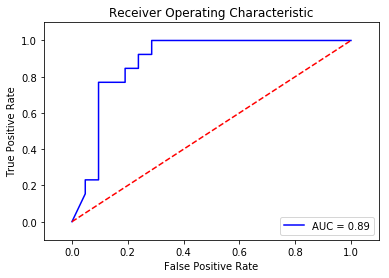

2  test  28050  acc=  0.8235294  loss =  0.47802404  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  28100  acc=  0.8235294  loss =  0.47895578  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  28150  acc=  0.8235294  loss =  0.4757302  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  28200  acc=  0.8235294  loss =  0.47860456  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  28250  acc=  0.8235294  loss =  0.4753865  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  28300  acc=  0.8235294  loss =  0.4759232  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  28350  acc=  0.8235294  loss =  0.4777114  sen:  0.8461538461538461  spe:  0.8095238095238095
2  test  28400  acc=  0.8235294  loss =  0.47109962  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  28450  acc=  0.8235294  loss =  0.48322645  sen:  0.8461538461538461  spe:  0.8095238095238095
2  test  28500  acc=  0.8235294  loss =  0.48002943  sen:  0.8461538

2  test  31950  acc=  0.8235294  loss =  0.47789422  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  32000  acc=  0.8235294  loss =  0.47690415  sen:  0.7692307692307693  spe:  0.8571428571428571
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


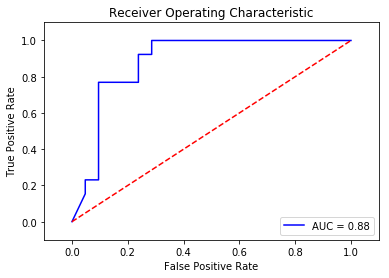

2  test  32050  acc=  0.8235294  loss =  0.47567773  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  32100  acc=  0.8235294  loss =  0.4715109  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  32150  acc=  0.8235294  loss =  0.47757918  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  32200  acc=  0.8235294  loss =  0.473603  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  32250  acc=  0.8235294  loss =  0.47993782  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  32300  acc=  0.8235294  loss =  0.4756237  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  32350  acc=  0.8235294  loss =  0.47857004  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  32400  acc=  0.8235294  loss =  0.47296104  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  32450  acc=  0.8235294  loss =  0.47362366  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  32500  acc=  0.8235294  loss =  0.47160462  sen:  0.7692307

2  test  35950  acc=  0.8235294  loss =  0.4783451  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  36000  acc=  0.7941176  loss =  0.47496644  sen:  0.7692307692307693  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


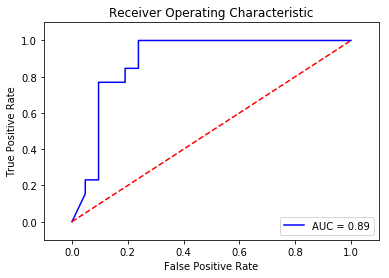

2  test  36050  acc=  0.8235294  loss =  0.4733544  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  36100  acc=  0.8235294  loss =  0.47534364  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  36150  acc=  0.8235294  loss =  0.47710457  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  36200  acc=  0.8235294  loss =  0.47272745  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  36250  acc=  0.8235294  loss =  0.4774069  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  36300  acc=  0.8235294  loss =  0.4789873  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  36350  acc=  0.8235294  loss =  0.47552764  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  36400  acc=  0.8235294  loss =  0.4808328  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  36450  acc=  0.8235294  loss =  0.4748783  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  36500  acc=  0.8235294  loss =  0.47480443  sen:  0.76923076

2  test  39950  acc=  0.8235294  loss =  0.47612426  sen:  0.7692307692307693  spe:  0.8571428571428571
2  test  40000  acc=  0.8235294  loss =  0.47497088  sen:  0.7692307692307693  spe:  0.8571428571428571
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


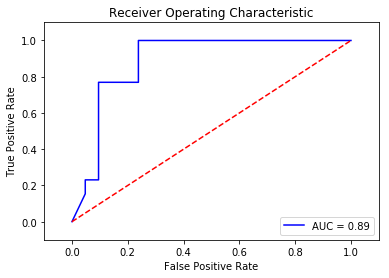

3  test  0  acc=  0.44117647  loss =  0.702293  sen:  0.6923076923076923  spe:  0.2857142857142857
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0]


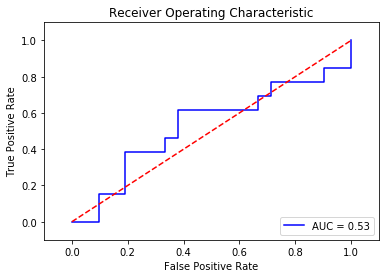

3  test  50  acc=  0.5588235  loss =  0.69089997  sen:  0.7692307692307693  spe:  0.42857142857142855
3  test  100  acc=  0.61764705  loss =  0.6866803  sen:  0.8461538461538461  spe:  0.47619047619047616
3  test  150  acc=  0.5882353  loss =  0.6789386  sen:  0.6923076923076923  spe:  0.5238095238095238
3  test  200  acc=  0.5882353  loss =  0.6748779  sen:  0.6923076923076923  spe:  0.5238095238095238
3  test  250  acc=  0.5882353  loss =  0.6689363  sen:  0.6153846153846154  spe:  0.5714285714285714
3  test  300  acc=  0.5882353  loss =  0.6706624  sen:  0.6923076923076923  spe:  0.5238095238095238
3  test  350  acc=  0.61764705  loss =  0.6664379  sen:  0.6923076923076923  spe:  0.5714285714285714
3  test  400  acc=  0.5882353  loss =  0.6665135  sen:  0.6923076923076923  spe:  0.5238095238095238
3  test  450  acc=  0.61764705  loss =  0.66245633  sen:  0.6923076923076923  spe:  0.5714285714285714
3  test  500  acc=  0.61764705  loss =  0.66397905  sen:  0.7692307692307693  spe:  0

3  test  4000  acc=  0.8235294  loss =  0.56640637  sen:  0.8461538461538461  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


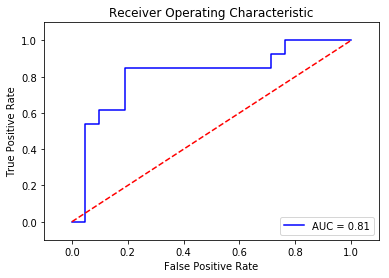

3  test  4050  acc=  0.8235294  loss =  0.5682692  sen:  0.8461538461538461  spe:  0.8095238095238095
3  test  4100  acc=  0.7647059  loss =  0.5685154  sen:  0.8461538461538461  spe:  0.7142857142857143
3  test  4150  acc=  0.8235294  loss =  0.56431854  sen:  0.8461538461538461  spe:  0.8095238095238095
3  test  4200  acc=  0.8235294  loss =  0.5608628  sen:  0.8461538461538461  spe:  0.8095238095238095
3  test  4250  acc=  0.7941176  loss =  0.56613576  sen:  0.8461538461538461  spe:  0.7619047619047619
3  test  4300  acc=  0.7941176  loss =  0.5663485  sen:  0.8461538461538461  spe:  0.7619047619047619
3  test  4350  acc=  0.7941176  loss =  0.56357014  sen:  0.8461538461538461  spe:  0.7619047619047619
3  test  4400  acc=  0.8235294  loss =  0.5599247  sen:  0.8461538461538461  spe:  0.8095238095238095
3  test  4450  acc=  0.7941176  loss =  0.56229436  sen:  0.8461538461538461  spe:  0.7619047619047619
3  test  4500  acc=  0.7941176  loss =  0.560578  sen:  0.8461538461538461  sp

3  test  8000  acc=  0.7647059  loss =  0.54721844  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


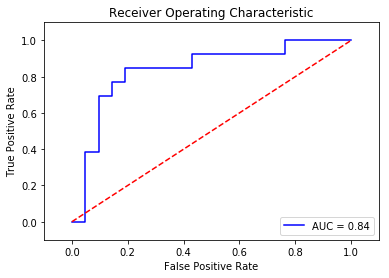

3  test  8050  acc=  0.7647059  loss =  0.54298353  sen:  0.8461538461538461  spe:  0.7142857142857143
3  test  8100  acc=  0.7647059  loss =  0.5428596  sen:  0.7692307692307693  spe:  0.7619047619047619
3  test  8150  acc=  0.7647059  loss =  0.5423598  sen:  0.7692307692307693  spe:  0.7619047619047619
3  test  8200  acc=  0.7941176  loss =  0.5367713  sen:  0.7692307692307693  spe:  0.8095238095238095
3  test  8250  acc=  0.7647059  loss =  0.5458903  sen:  0.8461538461538461  spe:  0.7142857142857143
3  test  8300  acc=  0.7941176  loss =  0.5424264  sen:  0.8461538461538461  spe:  0.7619047619047619
3  test  8350  acc=  0.7352941  loss =  0.54652894  sen:  0.8461538461538461  spe:  0.6666666666666666
3  test  8400  acc=  0.7647059  loss =  0.54394007  sen:  0.7692307692307693  spe:  0.7619047619047619
3  test  8450  acc=  0.7058824  loss =  0.5415549  sen:  0.7692307692307693  spe:  0.6666666666666666
3  test  8500  acc=  0.7352941  loss =  0.54185575  sen:  0.7692307692307693  s

3  test  12000  acc=  0.7352941  loss =  0.53885126  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


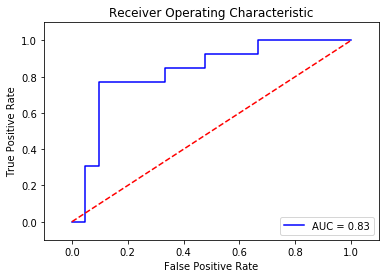

3  test  12050  acc=  0.7352941  loss =  0.5388172  sen:  0.8461538461538461  spe:  0.6666666666666666
3  test  12100  acc=  0.7058824  loss =  0.53499705  sen:  0.7692307692307693  spe:  0.6666666666666666
3  test  12150  acc=  0.7352941  loss =  0.53826576  sen:  0.8461538461538461  spe:  0.6666666666666666
3  test  12200  acc=  0.7352941  loss =  0.5432571  sen:  0.8461538461538461  spe:  0.6666666666666666
3  test  12250  acc=  0.7352941  loss =  0.5405028  sen:  0.8461538461538461  spe:  0.6666666666666666
3  test  12300  acc=  0.7352941  loss =  0.5386595  sen:  0.8461538461538461  spe:  0.6666666666666666
3  test  12350  acc=  0.7352941  loss =  0.5347284  sen:  0.8461538461538461  spe:  0.6666666666666666
3  test  12400  acc=  0.7352941  loss =  0.54181594  sen:  0.8461538461538461  spe:  0.6666666666666666
3  test  12450  acc=  0.7352941  loss =  0.53513336  sen:  0.8461538461538461  spe:  0.6666666666666666
3  test  12500  acc=  0.7647059  loss =  0.53326255  sen:  0.76923076

3  test  15950  acc=  0.7647059  loss =  0.53290176  sen:  0.8461538461538461  spe:  0.7142857142857143
3  test  16000  acc=  0.7647059  loss =  0.52849895  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


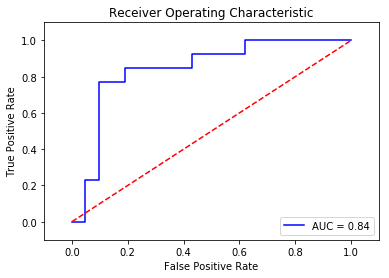

3  test  16050  acc=  0.7941176  loss =  0.52747333  sen:  0.8461538461538461  spe:  0.7619047619047619
3  test  16100  acc=  0.7647059  loss =  0.52964246  sen:  0.8461538461538461  spe:  0.7142857142857143
3  test  16150  acc=  0.7647059  loss =  0.52660066  sen:  0.8461538461538461  spe:  0.7142857142857143
3  test  16200  acc=  0.7647059  loss =  0.5311912  sen:  0.8461538461538461  spe:  0.7142857142857143
3  test  16250  acc=  0.7647059  loss =  0.53069866  sen:  0.8461538461538461  spe:  0.7142857142857143
3  test  16300  acc=  0.7647059  loss =  0.53218293  sen:  0.8461538461538461  spe:  0.7142857142857143
3  test  16350  acc=  0.7647059  loss =  0.5326578  sen:  0.8461538461538461  spe:  0.7142857142857143
3  test  16400  acc=  0.7352941  loss =  0.53764266  sen:  0.8461538461538461  spe:  0.6666666666666666
3  test  16450  acc=  0.7352941  loss =  0.5321906  sen:  0.8461538461538461  spe:  0.6666666666666666
3  test  16500  acc=  0.7647059  loss =  0.52551234  sen:  0.846153

3  test  19950  acc=  0.7647059  loss =  0.5254669  sen:  0.8461538461538461  spe:  0.7142857142857143
3  test  20000  acc=  0.7941176  loss =  0.5221551  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


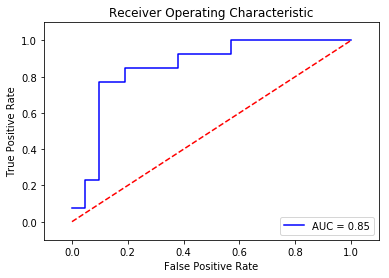

3  test  20050  acc=  0.7941176  loss =  0.5188961  sen:  0.8461538461538461  spe:  0.7619047619047619
3  test  20100  acc=  0.7941176  loss =  0.5160985  sen:  0.8461538461538461  spe:  0.7619047619047619
3  test  20150  acc=  0.7647059  loss =  0.52213657  sen:  0.8461538461538461  spe:  0.7142857142857143
3  test  20200  acc=  0.7647059  loss =  0.5168713  sen:  0.8461538461538461  spe:  0.7142857142857143
3  test  20250  acc=  0.7941176  loss =  0.5253489  sen:  0.8461538461538461  spe:  0.7619047619047619
3  test  20300  acc=  0.7941176  loss =  0.5177356  sen:  0.8461538461538461  spe:  0.7619047619047619
3  test  20350  acc=  0.7941176  loss =  0.52274173  sen:  0.8461538461538461  spe:  0.7619047619047619
3  test  20400  acc=  0.7941176  loss =  0.5164091  sen:  0.8461538461538461  spe:  0.7619047619047619
3  test  20450  acc=  0.7941176  loss =  0.52270925  sen:  0.8461538461538461  spe:  0.7619047619047619
3  test  20500  acc=  0.7941176  loss =  0.52214205  sen:  0.846153846

3  test  23950  acc=  0.7941176  loss =  0.50829417  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  24000  acc=  0.7647059  loss =  0.51315653  sen:  0.9230769230769231  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


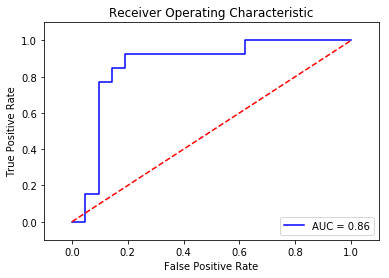

3  test  24050  acc=  0.8235294  loss =  0.50143695  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  24100  acc=  0.7647059  loss =  0.51699126  sen:  0.9230769230769231  spe:  0.6666666666666666
3  test  24150  acc=  0.7941176  loss =  0.5068579  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  24200  acc=  0.8235294  loss =  0.49700075  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  24250  acc=  0.8235294  loss =  0.50107646  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  24300  acc=  0.7647059  loss =  0.51720476  sen:  0.9230769230769231  spe:  0.6666666666666666
3  test  24350  acc=  0.7941176  loss =  0.5142773  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  24400  acc=  0.8235294  loss =  0.5017743  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  24450  acc=  0.8235294  loss =  0.50356287  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  24500  acc=  0.8235294  loss =  0.49958453  sen:  0.923076

3  test  27950  acc=  0.8235294  loss =  0.5005884  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  28000  acc=  0.7941176  loss =  0.5069003  sen:  0.9230769230769231  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


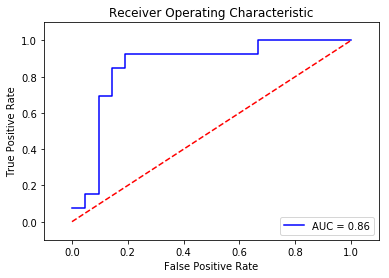

3  test  28050  acc=  0.7941176  loss =  0.4963777  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  28100  acc=  0.7941176  loss =  0.50002265  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  28150  acc=  0.8235294  loss =  0.5005285  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  28200  acc=  0.7941176  loss =  0.50075173  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  28250  acc=  0.7647059  loss =  0.5190155  sen:  0.9230769230769231  spe:  0.6666666666666666
3  test  28300  acc=  0.8235294  loss =  0.5037223  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  28350  acc=  0.7941176  loss =  0.5055766  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  28400  acc=  0.7647059  loss =  0.519421  sen:  0.9230769230769231  spe:  0.6666666666666666
3  test  28450  acc=  0.7941176  loss =  0.5054675  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  28500  acc=  0.8235294  loss =  0.4967781  sen:  0.923076923076

3  test  31950  acc=  0.7941176  loss =  0.5050144  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  32000  acc=  0.7647059  loss =  0.50925785  sen:  0.9230769230769231  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


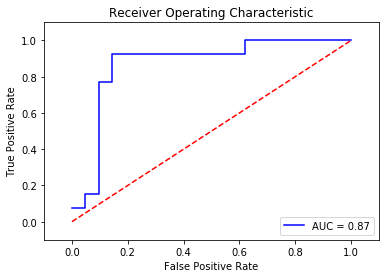

3  test  32050  acc=  0.7941176  loss =  0.49927616  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  32100  acc=  0.7647059  loss =  0.5017104  sen:  0.9230769230769231  spe:  0.6666666666666666
3  test  32150  acc=  0.7941176  loss =  0.5013596  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  32200  acc=  0.7941176  loss =  0.5061558  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  32250  acc=  0.7941176  loss =  0.5123471  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  32300  acc=  0.7647059  loss =  0.5103426  sen:  0.9230769230769231  spe:  0.6666666666666666
3  test  32350  acc=  0.8235294  loss =  0.49996567  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  32400  acc=  0.7941176  loss =  0.50890654  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  32450  acc=  0.7941176  loss =  0.5056389  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  32500  acc=  0.7647059  loss =  0.5058018  sen:  0.9230769230

3  test  35950  acc=  0.8235294  loss =  0.49588478  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  36000  acc=  0.8235294  loss =  0.4923472  sen:  0.9230769230769231  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


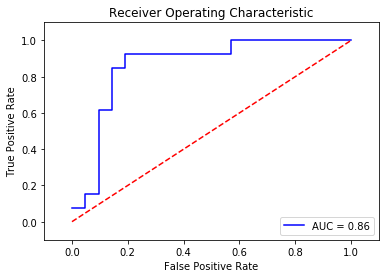

3  test  36050  acc=  0.8235294  loss =  0.5040556  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  36100  acc=  0.8235294  loss =  0.507153  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  36150  acc=  0.7941176  loss =  0.50760937  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  36200  acc=  0.7941176  loss =  0.50150746  sen:  0.9230769230769231  spe:  0.7142857142857143
3  test  36250  acc=  0.8235294  loss =  0.50178  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  36300  acc=  0.8235294  loss =  0.4960082  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  36350  acc=  0.8235294  loss =  0.50127006  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  36400  acc=  0.8235294  loss =  0.49957618  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  36450  acc=  0.8235294  loss =  0.50590175  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  36500  acc=  0.8235294  loss =  0.50383687  sen:  0.9230769230

3  test  39950  acc=  0.8235294  loss =  0.50477755  sen:  0.9230769230769231  spe:  0.7619047619047619
3  test  40000  acc=  0.7941176  loss =  0.5152608  sen:  0.9230769230769231  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


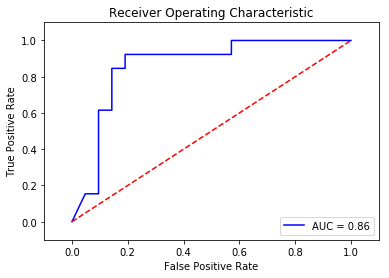

4  test  0  acc=  0.7352941  loss =  0.67333037  sen:  0.38461538461538464  spe:  0.9523809523809523
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0]


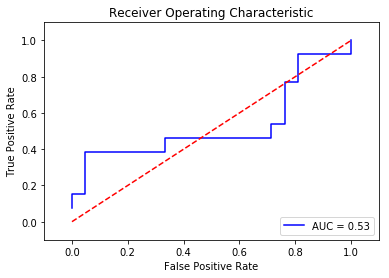

4  test  50  acc=  0.5882353  loss =  0.664649  sen:  0.6923076923076923  spe:  0.5238095238095238
4  test  100  acc=  0.64705884  loss =  0.6587975  sen:  0.6923076923076923  spe:  0.6190476190476191
4  test  150  acc=  0.64705884  loss =  0.65177244  sen:  0.6153846153846154  spe:  0.6666666666666666
4  test  200  acc=  0.64705884  loss =  0.6514503  sen:  0.6923076923076923  spe:  0.6190476190476191
4  test  250  acc=  0.64705884  loss =  0.64809847  sen:  0.6923076923076923  spe:  0.6190476190476191
4  test  300  acc=  0.64705884  loss =  0.6457952  sen:  0.6923076923076923  spe:  0.6190476190476191
4  test  350  acc=  0.7058824  loss =  0.6402703  sen:  0.6153846153846154  spe:  0.7619047619047619
4  test  400  acc=  0.7058824  loss =  0.63850284  sen:  0.6153846153846154  spe:  0.7619047619047619
4  test  450  acc=  0.7058824  loss =  0.63802546  sen:  0.6153846153846154  spe:  0.7619047619047619
4  test  500  acc=  0.7058824  loss =  0.63560987  sen:  0.6153846153846154  spe:  0

4  test  4000  acc=  0.7058824  loss =  0.5858485  sen:  0.6923076923076923  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1]


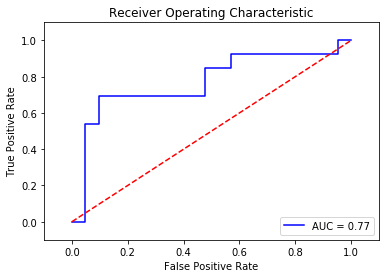

4  test  4050  acc=  0.7058824  loss =  0.5862714  sen:  0.6923076923076923  spe:  0.7142857142857143
4  test  4100  acc=  0.7058824  loss =  0.5841531  sen:  0.6923076923076923  spe:  0.7142857142857143
4  test  4150  acc=  0.7058824  loss =  0.5853523  sen:  0.6923076923076923  spe:  0.7142857142857143
4  test  4200  acc=  0.7058824  loss =  0.5865933  sen:  0.6923076923076923  spe:  0.7142857142857143
4  test  4250  acc=  0.7058824  loss =  0.5819802  sen:  0.6923076923076923  spe:  0.7142857142857143
4  test  4300  acc=  0.7058824  loss =  0.5817324  sen:  0.6923076923076923  spe:  0.7142857142857143
4  test  4350  acc=  0.7058824  loss =  0.5891707  sen:  0.6923076923076923  spe:  0.7142857142857143
4  test  4400  acc=  0.7058824  loss =  0.57915473  sen:  0.6923076923076923  spe:  0.7142857142857143
4  test  4450  acc=  0.7058824  loss =  0.58586544  sen:  0.6923076923076923  spe:  0.7142857142857143
4  test  4500  acc=  0.7058824  loss =  0.5792338  sen:  0.6923076923076923  spe

4  test  8000  acc=  0.7647059  loss =  0.5629177  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


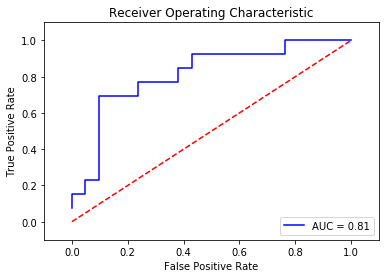

4  test  8050  acc=  0.7352941  loss =  0.5646112  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  8100  acc=  0.7352941  loss =  0.56744474  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  8150  acc=  0.7352941  loss =  0.56687444  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  8200  acc=  0.7352941  loss =  0.5630225  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  8250  acc=  0.7352941  loss =  0.5630992  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  8300  acc=  0.7352941  loss =  0.56215054  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  8350  acc=  0.7352941  loss =  0.56040394  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  8400  acc=  0.7352941  loss =  0.56071717  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  8450  acc=  0.7352941  loss =  0.55944586  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  8500  acc=  0.7352941  loss =  0.56138885  sen:  0.7692307692307693

4  test  12000  acc=  0.7647059  loss =  0.5446829  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


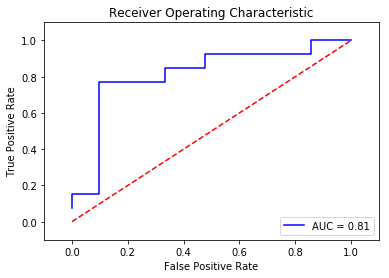

4  test  12050  acc=  0.7647059  loss =  0.5484166  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  12100  acc=  0.7647059  loss =  0.54974025  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  12150  acc=  0.7647059  loss =  0.5445263  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  12200  acc=  0.7647059  loss =  0.53867143  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  12250  acc=  0.7647059  loss =  0.55893755  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  12300  acc=  0.7647059  loss =  0.54613364  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  12350  acc=  0.7647059  loss =  0.54709965  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  12400  acc=  0.7647059  loss =  0.54003924  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  12450  acc=  0.7647059  loss =  0.5463598  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  12500  acc=  0.7647059  loss =  0.5497937  sen:  0.7692307

4  test  15950  acc=  0.7352941  loss =  0.5489844  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  16000  acc=  0.7647059  loss =  0.5433468  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


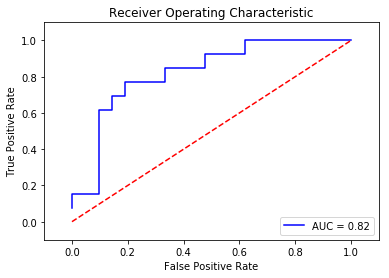

4  test  16050  acc=  0.7647059  loss =  0.5463806  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  16100  acc=  0.7352941  loss =  0.5468662  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  16150  acc=  0.7058824  loss =  0.5514713  sen:  0.7692307692307693  spe:  0.6666666666666666
4  test  16200  acc=  0.7352941  loss =  0.54492265  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  16250  acc=  0.7352941  loss =  0.54663104  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  16300  acc=  0.7647059  loss =  0.54758185  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  16350  acc=  0.7352941  loss =  0.54725313  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  16400  acc=  0.7647059  loss =  0.54248536  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  16450  acc=  0.7647059  loss =  0.5381798  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  16500  acc=  0.7647059  loss =  0.5383567  sen:  0.76923076

4  test  19950  acc=  0.7647059  loss =  0.54472697  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  20000  acc=  0.7647059  loss =  0.54110414  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


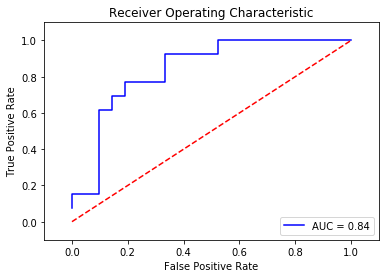

4  test  20050  acc=  0.7647059  loss =  0.54599035  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  20100  acc=  0.7647059  loss =  0.5411467  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  20150  acc=  0.7352941  loss =  0.5470883  sen:  0.6923076923076923  spe:  0.7619047619047619
4  test  20200  acc=  0.7647059  loss =  0.53567  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  20250  acc=  0.7647059  loss =  0.53910375  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  20300  acc=  0.7647059  loss =  0.5383918  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  20350  acc=  0.7647059  loss =  0.5411599  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  20400  acc=  0.7941176  loss =  0.53366745  sen:  0.7692307692307693  spe:  0.8095238095238095
4  test  20450  acc=  0.7647059  loss =  0.5356708  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  20500  acc=  0.7647059  loss =  0.5413332  sen:  0.769230769230

4  test  23950  acc=  0.7647059  loss =  0.542901  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  24000  acc=  0.7647059  loss =  0.5420254  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


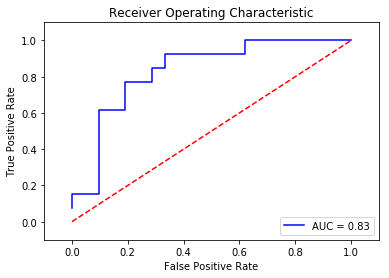

4  test  24050  acc=  0.7647059  loss =  0.5406621  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  24100  acc=  0.7647059  loss =  0.5422832  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  24150  acc=  0.7352941  loss =  0.5475151  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  24200  acc=  0.7647059  loss =  0.5392401  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  24250  acc=  0.7647059  loss =  0.54443634  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  24300  acc=  0.7647059  loss =  0.5424725  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  24350  acc=  0.7352941  loss =  0.54418087  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  24400  acc=  0.7647059  loss =  0.5427842  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  24450  acc=  0.7647059  loss =  0.54428846  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  24500  acc=  0.7352941  loss =  0.5519637  sen:  0.6923076923

4  test  27950  acc=  0.7058824  loss =  0.56526154  sen:  0.6923076923076923  spe:  0.7142857142857143
4  test  28000  acc=  0.7352941  loss =  0.5450177  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


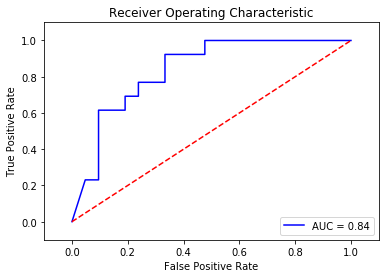

4  test  28050  acc=  0.7352941  loss =  0.54801166  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  28100  acc=  0.7352941  loss =  0.54704905  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  28150  acc=  0.7647059  loss =  0.5413253  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  28200  acc=  0.7647059  loss =  0.54119503  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  28250  acc=  0.7352941  loss =  0.5376406  sen:  0.6923076923076923  spe:  0.7619047619047619
4  test  28300  acc=  0.7647059  loss =  0.5402312  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  28350  acc=  0.7352941  loss =  0.53727365  sen:  0.6923076923076923  spe:  0.7619047619047619
4  test  28400  acc=  0.7647059  loss =  0.5386472  sen:  0.6923076923076923  spe:  0.8095238095238095
4  test  28450  acc=  0.7352941  loss =  0.54786086  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  28500  acc=  0.7352941  loss =  0.5432074  sen:  0.76923076

4  test  31950  acc=  0.7647059  loss =  0.544363  sen:  0.8461538461538461  spe:  0.7142857142857143
4  test  32000  acc=  0.7352941  loss =  0.5412223  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


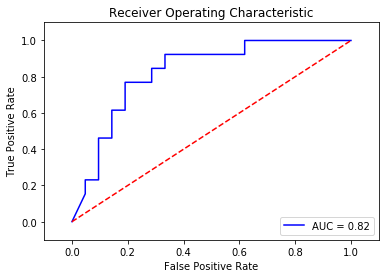

4  test  32050  acc=  0.7352941  loss =  0.5419485  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  32100  acc=  0.7352941  loss =  0.54108775  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  32150  acc=  0.7647059  loss =  0.5443417  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  32200  acc=  0.7647059  loss =  0.53941756  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  32250  acc=  0.7647059  loss =  0.5400667  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  32300  acc=  0.7941176  loss =  0.54587245  sen:  0.8461538461538461  spe:  0.7619047619047619
4  test  32350  acc=  0.7647059  loss =  0.54042935  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  32400  acc=  0.7647059  loss =  0.5449066  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  32450  acc=  0.7647059  loss =  0.54113257  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  32500  acc=  0.7941176  loss =  0.5349902  sen:  0.76923076

4  test  35950  acc=  0.7647059  loss =  0.5384913  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  36000  acc=  0.7647059  loss =  0.54128706  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


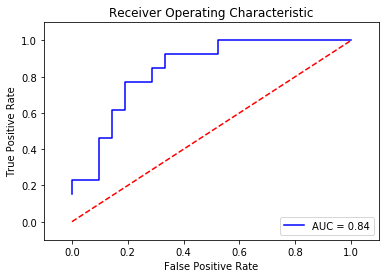

4  test  36050  acc=  0.7352941  loss =  0.54274076  sen:  0.6923076923076923  spe:  0.7619047619047619
4  test  36100  acc=  0.7647059  loss =  0.5355671  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  36150  acc=  0.7647059  loss =  0.5369701  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  36200  acc=  0.7352941  loss =  0.5353596  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  36250  acc=  0.7352941  loss =  0.53958297  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  36300  acc=  0.7352941  loss =  0.5396962  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  36350  acc=  0.7647059  loss =  0.5405164  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  36400  acc=  0.7352941  loss =  0.54100907  sen:  0.7692307692307693  spe:  0.7142857142857143
4  test  36450  acc=  0.7352941  loss =  0.5477977  sen:  0.6923076923076923  spe:  0.7619047619047619
4  test  36500  acc=  0.7647059  loss =  0.5412804  sen:  0.7692307692

4  test  39950  acc=  0.7647059  loss =  0.53915685  sen:  0.7692307692307693  spe:  0.7619047619047619
4  test  40000  acc=  0.7647059  loss =  0.5377426  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


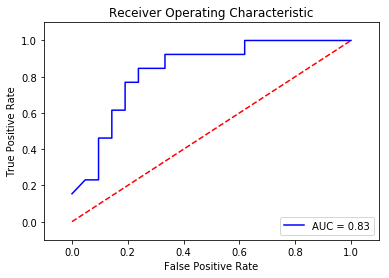

5  test  0  acc=  0.5882353  loss =  0.6848777  sen:  0.07692307692307693  spe:  0.9047619047619048
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


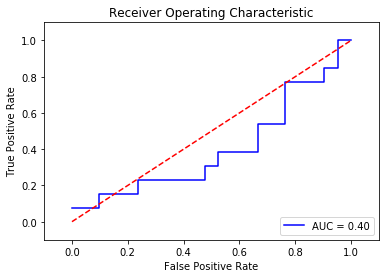

5  test  50  acc=  0.64705884  loss =  0.6793944  sen:  0.6153846153846154  spe:  0.6666666666666666
5  test  100  acc=  0.61764705  loss =  0.6702133  sen:  0.5384615384615384  spe:  0.6666666666666666
5  test  150  acc=  0.64705884  loss =  0.66602045  sen:  0.6153846153846154  spe:  0.6666666666666666
5  test  200  acc=  0.61764705  loss =  0.66181  sen:  0.5384615384615384  spe:  0.6666666666666666
5  test  250  acc=  0.61764705  loss =  0.6605277  sen:  0.5384615384615384  spe:  0.6666666666666666
5  test  300  acc=  0.6764706  loss =  0.65617055  sen:  0.5384615384615384  spe:  0.7619047619047619
5  test  350  acc=  0.6764706  loss =  0.65511227  sen:  0.5384615384615384  spe:  0.7619047619047619
5  test  400  acc=  0.7058824  loss =  0.65549845  sen:  0.6153846153846154  spe:  0.7619047619047619
5  test  450  acc=  0.6764706  loss =  0.65508735  sen:  0.6153846153846154  spe:  0.7142857142857143
5  test  500  acc=  0.6764706  loss =  0.6539837  sen:  0.6153846153846154  spe:  0.

5  test  4000  acc=  0.7352941  loss =  0.5966675  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


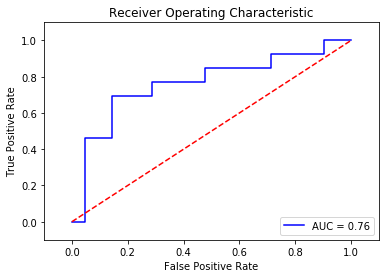

5  test  4050  acc=  0.7058824  loss =  0.5974365  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  4100  acc=  0.6764706  loss =  0.6013553  sen:  0.7692307692307693  spe:  0.6190476190476191
5  test  4150  acc=  0.6764706  loss =  0.599616  sen:  0.7692307692307693  spe:  0.6190476190476191
5  test  4200  acc=  0.7352941  loss =  0.59144676  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  4250  acc=  0.7352941  loss =  0.5943979  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  4300  acc=  0.7352941  loss =  0.5907519  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  4350  acc=  0.7058824  loss =  0.59522593  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  4400  acc=  0.7058824  loss =  0.5973336  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  4450  acc=  0.7058824  loss =  0.59624857  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  4500  acc=  0.7352941  loss =  0.5909203  sen:  0.7692307692307693  spe

5  test  8000  acc=  0.7058824  loss =  0.5923962  sen:  0.7692307692307693  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


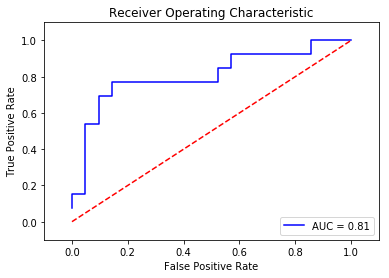

5  test  8050  acc=  0.7058824  loss =  0.5950694  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  8100  acc=  0.7058824  loss =  0.58636206  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  8150  acc=  0.7058824  loss =  0.5871573  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  8200  acc=  0.7058824  loss =  0.58784056  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  8250  acc=  0.7058824  loss =  0.5880354  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  8300  acc=  0.7058824  loss =  0.5854842  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  8350  acc=  0.7058824  loss =  0.59313315  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  8400  acc=  0.7058824  loss =  0.5908148  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  8450  acc=  0.7058824  loss =  0.58632046  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  8500  acc=  0.7058824  loss =  0.58724076  sen:  0.7692307692307693  

5  test  12000  acc=  0.7058824  loss =  0.58514357  sen:  0.7692307692307693  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


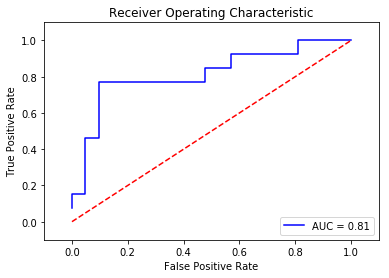

5  test  12050  acc=  0.7058824  loss =  0.5811674  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  12100  acc=  0.7058824  loss =  0.57875293  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  12150  acc=  0.7058824  loss =  0.5886622  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  12200  acc=  0.7058824  loss =  0.5867591  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  12250  acc=  0.7058824  loss =  0.58681476  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  12300  acc=  0.7058824  loss =  0.5838936  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  12350  acc=  0.7058824  loss =  0.58655  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  12400  acc=  0.7058824  loss =  0.5882791  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  12450  acc=  0.7058824  loss =  0.5916059  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  12500  acc=  0.7058824  loss =  0.5891745  sen:  0.7692307692307

5  test  15950  acc=  0.7058824  loss =  0.5765023  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  16000  acc=  0.7058824  loss =  0.5777029  sen:  0.7692307692307693  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


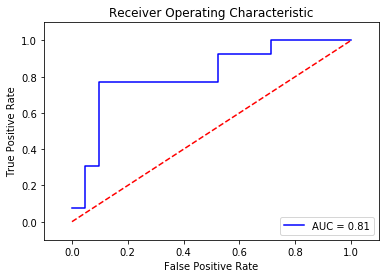

5  test  16050  acc=  0.7058824  loss =  0.57432526  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  16100  acc=  0.7352941  loss =  0.57720995  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  16150  acc=  0.7058824  loss =  0.5772431  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  16200  acc=  0.7058824  loss =  0.57694644  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  16250  acc=  0.7058824  loss =  0.5779459  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  16300  acc=  0.7058824  loss =  0.5803551  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  16350  acc=  0.7058824  loss =  0.5751531  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  16400  acc=  0.7352941  loss =  0.57340217  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  16450  acc=  0.7352941  loss =  0.5824209  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  16500  acc=  0.7352941  loss =  0.57924634  sen:  0.76923076

5  test  19950  acc=  0.7352941  loss =  0.5708829  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  20000  acc=  0.7352941  loss =  0.56743324  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


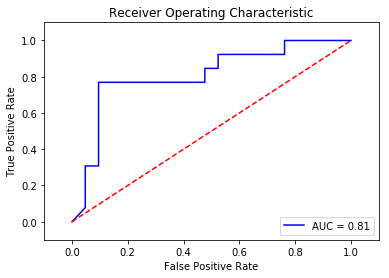

5  test  20050  acc=  0.7352941  loss =  0.5776417  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  20100  acc=  0.7352941  loss =  0.57645637  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  20150  acc=  0.7352941  loss =  0.56698245  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  20200  acc=  0.7352941  loss =  0.5705886  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  20250  acc=  0.7352941  loss =  0.57321054  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  20300  acc=  0.7352941  loss =  0.5616531  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  20350  acc=  0.7352941  loss =  0.5715412  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  20400  acc=  0.7352941  loss =  0.569248  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  20450  acc=  0.7352941  loss =  0.565188  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  20500  acc=  0.7058824  loss =  0.5657257  sen:  0.769230769230

5  test  23950  acc=  0.7058824  loss =  0.5631197  sen:  0.7692307692307693  spe:  0.6666666666666666
5  test  24000  acc=  0.7647059  loss =  0.5636932  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


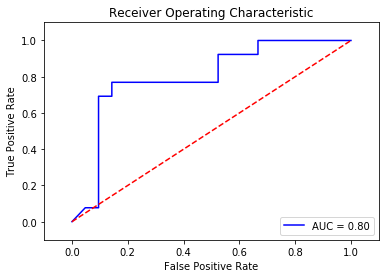

5  test  24050  acc=  0.7647059  loss =  0.5576065  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  24100  acc=  0.7647059  loss =  0.56243646  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  24150  acc=  0.7647059  loss =  0.56275135  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  24200  acc=  0.7352941  loss =  0.56585974  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  24250  acc=  0.7352941  loss =  0.5679779  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  24300  acc=  0.7352941  loss =  0.5622711  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  24350  acc=  0.7352941  loss =  0.5664692  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  24400  acc=  0.7352941  loss =  0.5669123  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  24450  acc=  0.7352941  loss =  0.563893  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  24500  acc=  0.7352941  loss =  0.56647205  sen:  0.7692307692

5  test  27950  acc=  0.7352941  loss =  0.55764645  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  28000  acc=  0.7647059  loss =  0.56239027  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


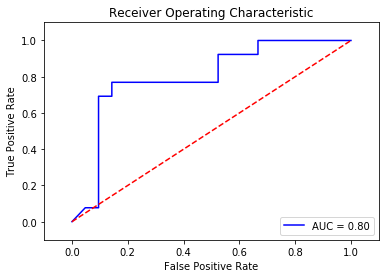

5  test  28050  acc=  0.7647059  loss =  0.56733745  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  28100  acc=  0.7647059  loss =  0.5660491  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  28150  acc=  0.7647059  loss =  0.56553805  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  28200  acc=  0.7647059  loss =  0.56273127  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  28250  acc=  0.7647059  loss =  0.56547785  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  28300  acc=  0.7647059  loss =  0.56371355  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  28350  acc=  0.7352941  loss =  0.56668997  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  28400  acc=  0.7647059  loss =  0.5626251  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  28450  acc=  0.7647059  loss =  0.5642746  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  28500  acc=  0.7647059  loss =  0.56937313  sen:  0.769230

5  test  31950  acc=  0.7352941  loss =  0.57193357  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  32000  acc=  0.7352941  loss =  0.5661859  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


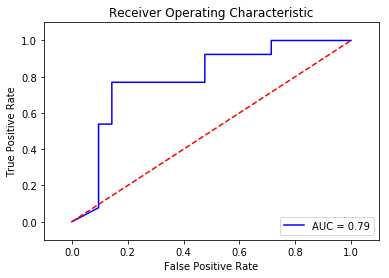

5  test  32050  acc=  0.7647059  loss =  0.56464773  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  32100  acc=  0.7647059  loss =  0.5618005  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  32150  acc=  0.7352941  loss =  0.5666812  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  32200  acc=  0.7352941  loss =  0.56763774  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  32250  acc=  0.7647059  loss =  0.5646126  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  32300  acc=  0.7352941  loss =  0.56452954  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  32350  acc=  0.7647059  loss =  0.56065995  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  32400  acc=  0.7647059  loss =  0.56512153  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  32450  acc=  0.7647059  loss =  0.5649384  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  32500  acc=  0.7352941  loss =  0.5663934  sen:  0.76923076

5  test  35950  acc=  0.7647059  loss =  0.56895536  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  36000  acc=  0.7352941  loss =  0.5709632  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


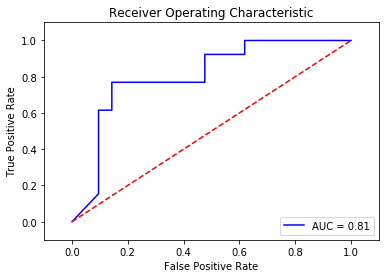

5  test  36050  acc=  0.7647059  loss =  0.56792295  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  36100  acc=  0.7352941  loss =  0.56998223  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  36150  acc=  0.7647059  loss =  0.56775445  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  36200  acc=  0.7647059  loss =  0.56814927  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  36250  acc=  0.7647059  loss =  0.5640992  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  36300  acc=  0.7647059  loss =  0.5670989  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  36350  acc=  0.7352941  loss =  0.56637466  sen:  0.7692307692307693  spe:  0.7142857142857143
5  test  36400  acc=  0.7647059  loss =  0.56220746  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  36450  acc=  0.7647059  loss =  0.5646668  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  36500  acc=  0.7647059  loss =  0.56574863  sen:  0.769230

5  test  39950  acc=  0.7647059  loss =  0.56626296  sen:  0.7692307692307693  spe:  0.7619047619047619
5  test  40000  acc=  0.7647059  loss =  0.5649047  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


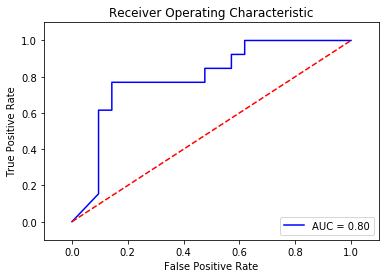

6  test  0  acc=  0.44117647  loss =  0.7089354  sen:  0.9230769230769231  spe:  0.14285714285714285
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1]


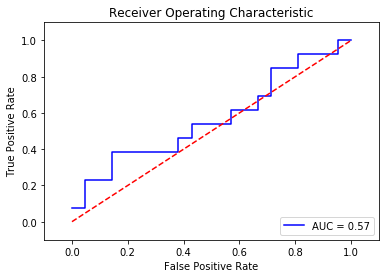

6  test  50  acc=  0.44117647  loss =  0.6960872  sen:  0.7692307692307693  spe:  0.23809523809523808
6  test  100  acc=  0.4117647  loss =  0.6882659  sen:  0.6923076923076923  spe:  0.23809523809523808
6  test  150  acc=  0.5  loss =  0.67974067  sen:  0.6923076923076923  spe:  0.38095238095238093
6  test  200  acc=  0.5882353  loss =  0.67696035  sen:  0.7692307692307693  spe:  0.47619047619047616
6  test  250  acc=  0.5882353  loss =  0.6775775  sen:  0.7692307692307693  spe:  0.47619047619047616
6  test  300  acc=  0.5588235  loss =  0.673048  sen:  0.6923076923076923  spe:  0.47619047619047616
6  test  350  acc=  0.5882353  loss =  0.66845256  sen:  0.6923076923076923  spe:  0.5238095238095238
6  test  400  acc=  0.61764705  loss =  0.6640063  sen:  0.6923076923076923  spe:  0.5714285714285714
6  test  450  acc=  0.5882353  loss =  0.6646116  sen:  0.6923076923076923  spe:  0.5238095238095238
6  test  500  acc=  0.5882353  loss =  0.66189957  sen:  0.6923076923076923  spe:  0.523

6  test  4000  acc=  0.7352941  loss =  0.5829681  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


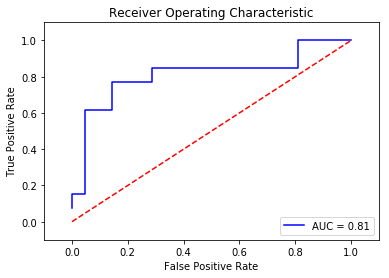

6  test  4050  acc=  0.7647059  loss =  0.5793355  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  4100  acc=  0.7647059  loss =  0.57677096  sen:  0.8461538461538461  spe:  0.7142857142857143
6  test  4150  acc=  0.7941176  loss =  0.5769258  sen:  0.8461538461538461  spe:  0.7619047619047619
6  test  4200  acc=  0.7647059  loss =  0.58205634  sen:  0.8461538461538461  spe:  0.7142857142857143
6  test  4250  acc=  0.7647059  loss =  0.58512  sen:  0.8461538461538461  spe:  0.7142857142857143
6  test  4300  acc=  0.7352941  loss =  0.5820606  sen:  0.8461538461538461  spe:  0.6666666666666666
6  test  4350  acc=  0.7941176  loss =  0.5758779  sen:  0.8461538461538461  spe:  0.7619047619047619
6  test  4400  acc=  0.7647059  loss =  0.5758806  sen:  0.8461538461538461  spe:  0.7142857142857143
6  test  4450  acc=  0.7941176  loss =  0.570917  sen:  0.8461538461538461  spe:  0.7619047619047619
6  test  4500  acc=  0.7941176  loss =  0.57013375  sen:  0.8461538461538461  spe: 

6  test  8000  acc=  0.7352941  loss =  0.55728453  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


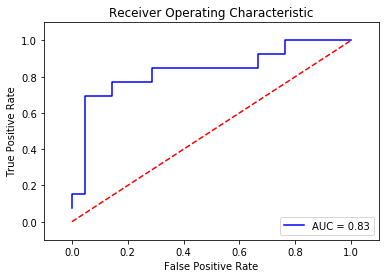

6  test  8050  acc=  0.7647059  loss =  0.56227404  sen:  0.8461538461538461  spe:  0.7142857142857143
6  test  8100  acc=  0.7352941  loss =  0.55996054  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  8150  acc=  0.7352941  loss =  0.5614227  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  8200  acc=  0.7352941  loss =  0.5579842  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  8250  acc=  0.7352941  loss =  0.55126196  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  8300  acc=  0.7352941  loss =  0.5573122  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  8350  acc=  0.7352941  loss =  0.55293894  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  8400  acc=  0.7352941  loss =  0.55671793  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  8450  acc=  0.7352941  loss =  0.5544943  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  8500  acc=  0.7352941  loss =  0.55715173  sen:  0.7692307692307693 

6  test  12000  acc=  0.7352941  loss =  0.55212355  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


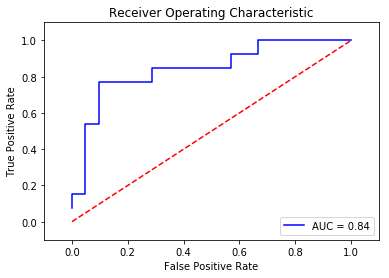

6  test  12050  acc=  0.7352941  loss =  0.55921817  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  12100  acc=  0.7352941  loss =  0.55320823  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  12150  acc=  0.7352941  loss =  0.55393374  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  12200  acc=  0.7352941  loss =  0.55320746  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  12250  acc=  0.7352941  loss =  0.5542089  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  12300  acc=  0.7352941  loss =  0.5512179  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  12350  acc=  0.7352941  loss =  0.5550818  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  12400  acc=  0.7352941  loss =  0.5520025  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  12450  acc=  0.7352941  loss =  0.55474174  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  12500  acc=  0.7352941  loss =  0.5490649  sen:  0.76923076

6  test  15950  acc=  0.7058824  loss =  0.55332285  sen:  0.7692307692307693  spe:  0.6666666666666666
6  test  16000  acc=  0.7058824  loss =  0.54715866  sen:  0.7692307692307693  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


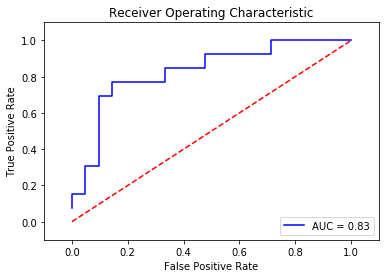

6  test  16050  acc=  0.7352941  loss =  0.5478852  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  16100  acc=  0.7058824  loss =  0.54857016  sen:  0.7692307692307693  spe:  0.6666666666666666
6  test  16150  acc=  0.7058824  loss =  0.5478197  sen:  0.7692307692307693  spe:  0.6666666666666666
6  test  16200  acc=  0.7058824  loss =  0.5455126  sen:  0.7692307692307693  spe:  0.6666666666666666
6  test  16250  acc=  0.7352941  loss =  0.539361  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  16300  acc=  0.7058824  loss =  0.54429  sen:  0.7692307692307693  spe:  0.6666666666666666
6  test  16350  acc=  0.7352941  loss =  0.54336184  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  16400  acc=  0.7058824  loss =  0.5446284  sen:  0.7692307692307693  spe:  0.6666666666666666
6  test  16450  acc=  0.7058824  loss =  0.54550505  sen:  0.7692307692307693  spe:  0.6666666666666666
6  test  16500  acc=  0.7058824  loss =  0.5443092  sen:  0.7692307692307

6  test  20000  acc=  0.7352941  loss =  0.53892803  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


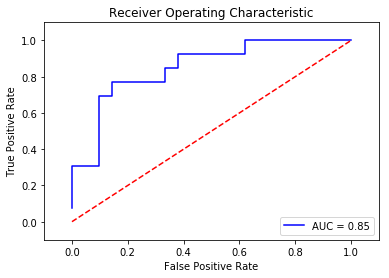

6  test  20050  acc=  0.7352941  loss =  0.5416896  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  20100  acc=  0.7352941  loss =  0.54086155  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  20150  acc=  0.7352941  loss =  0.5378473  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  20200  acc=  0.7352941  loss =  0.5429372  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  20250  acc=  0.7352941  loss =  0.54323816  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  20300  acc=  0.7352941  loss =  0.53862286  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  20350  acc=  0.7352941  loss =  0.5419545  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  20400  acc=  0.7352941  loss =  0.5443619  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  20450  acc=  0.7352941  loss =  0.54335636  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  20500  acc=  0.7352941  loss =  0.53675014  sen:  0.76923076

6  test  23950  acc=  0.7352941  loss =  0.53482074  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  24000  acc=  0.7352941  loss =  0.54108965  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


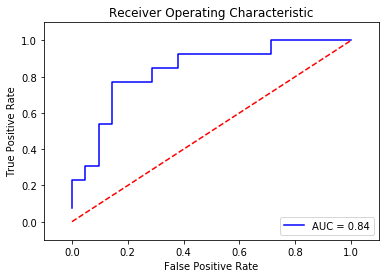

6  test  24050  acc=  0.7352941  loss =  0.53381246  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  24100  acc=  0.7352941  loss =  0.5358729  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  24150  acc=  0.7352941  loss =  0.53852993  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  24200  acc=  0.7352941  loss =  0.53650725  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  24250  acc=  0.7352941  loss =  0.5360563  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  24300  acc=  0.7352941  loss =  0.5337457  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  24350  acc=  0.7352941  loss =  0.5371346  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  24400  acc=  0.7352941  loss =  0.53152597  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  24450  acc=  0.7352941  loss =  0.5336421  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  24500  acc=  0.7352941  loss =  0.5365927  sen:  0.769230769

6  test  27950  acc=  0.7352941  loss =  0.5294769  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  28000  acc=  0.7352941  loss =  0.530977  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


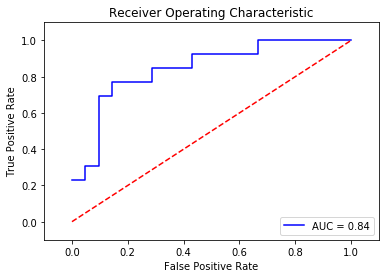

6  test  28050  acc=  0.7352941  loss =  0.5264981  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  28100  acc=  0.7941176  loss =  0.52439547  sen:  0.8461538461538461  spe:  0.7619047619047619
6  test  28150  acc=  0.7352941  loss =  0.5293289  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  28200  acc=  0.7352941  loss =  0.5310865  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  28250  acc=  0.7647059  loss =  0.52186006  sen:  0.8461538461538461  spe:  0.7142857142857143
6  test  28300  acc=  0.7352941  loss =  0.52853084  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  28350  acc=  0.7352941  loss =  0.5306509  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  28400  acc=  0.7352941  loss =  0.5316886  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  28450  acc=  0.7647059  loss =  0.52529836  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  28500  acc=  0.7647059  loss =  0.5254535  sen:  0.846153846

6  test  31950  acc=  0.7647059  loss =  0.5283773  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  32000  acc=  0.7647059  loss =  0.52334553  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


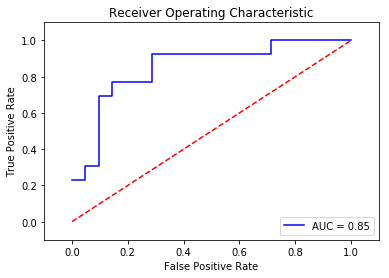

6  test  32050  acc=  0.7647059  loss =  0.52214617  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  32100  acc=  0.7647059  loss =  0.52217627  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  32150  acc=  0.7647059  loss =  0.5278899  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  32200  acc=  0.7647059  loss =  0.52588886  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  32250  acc=  0.7647059  loss =  0.5191829  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  32300  acc=  0.7647059  loss =  0.5186017  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  32350  acc=  0.7647059  loss =  0.522318  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  32400  acc=  0.7647059  loss =  0.5240071  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  32450  acc=  0.7352941  loss =  0.5238121  sen:  0.7692307692307693  spe:  0.7142857142857143
6  test  32500  acc=  0.7647059  loss =  0.5221381  sen:  0.76923076923

6  test  36000  acc=  0.7647059  loss =  0.5194873  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


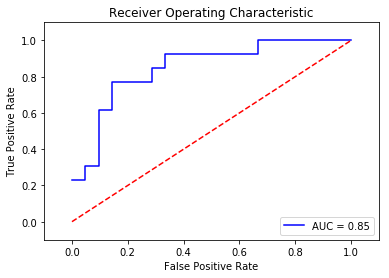

6  test  36050  acc=  0.7941176  loss =  0.5204342  sen:  0.8461538461538461  spe:  0.7619047619047619
6  test  36100  acc=  0.7647059  loss =  0.5210846  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  36150  acc=  0.7647059  loss =  0.5237584  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  36200  acc=  0.7647059  loss =  0.5200204  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  36250  acc=  0.7647059  loss =  0.5206358  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  36300  acc=  0.7647059  loss =  0.51805484  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  36350  acc=  0.7647059  loss =  0.52326024  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  36400  acc=  0.7647059  loss =  0.52618843  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  36450  acc=  0.7647059  loss =  0.520517  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  36500  acc=  0.7647059  loss =  0.5227497  sen:  0.76923076923

6  test  39950  acc=  0.7647059  loss =  0.5155024  sen:  0.7692307692307693  spe:  0.7619047619047619
6  test  40000  acc=  0.7647059  loss =  0.5204981  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


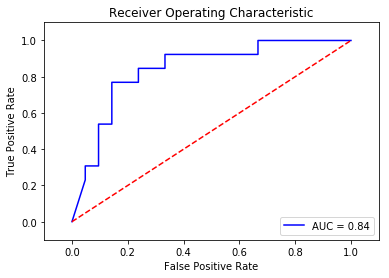

7  test  0  acc=  0.3529412  loss =  0.70893663  sen:  0.46153846153846156  spe:  0.2857142857142857
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1]


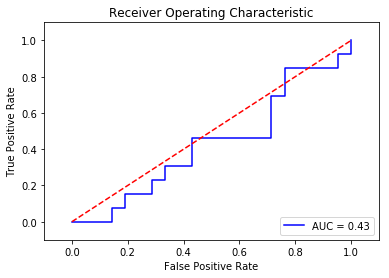

7  test  50  acc=  0.47058824  loss =  0.69637597  sen:  0.7692307692307693  spe:  0.2857142857142857
7  test  100  acc=  0.5  loss =  0.69119215  sen:  0.7692307692307693  spe:  0.3333333333333333
7  test  150  acc=  0.5294118  loss =  0.6907919  sen:  0.8461538461538461  spe:  0.3333333333333333
7  test  200  acc=  0.5588235  loss =  0.68213046  sen:  0.7692307692307693  spe:  0.42857142857142855
7  test  250  acc=  0.61764705  loss =  0.6731462  sen:  0.6923076923076923  spe:  0.5714285714285714
7  test  300  acc=  0.5882353  loss =  0.67451644  sen:  0.6923076923076923  spe:  0.5238095238095238
7  test  350  acc=  0.64705884  loss =  0.66612995  sen:  0.6923076923076923  spe:  0.6190476190476191
7  test  400  acc=  0.64705884  loss =  0.6636965  sen:  0.6923076923076923  spe:  0.6190476190476191
7  test  450  acc=  0.61764705  loss =  0.66651523  sen:  0.6923076923076923  spe:  0.5714285714285714
7  test  500  acc=  0.61764705  loss =  0.66190886  sen:  0.6923076923076923  spe:  0.

7  test  4000  acc=  0.7058824  loss =  0.58146626  sen:  0.6923076923076923  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1]


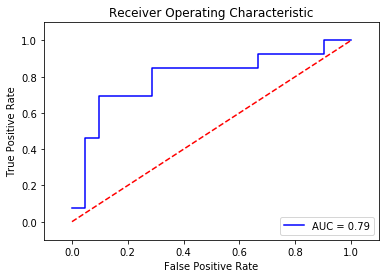

7  test  4050  acc=  0.7352941  loss =  0.5783301  sen:  0.6923076923076923  spe:  0.7619047619047619
7  test  4100  acc=  0.7058824  loss =  0.5826793  sen:  0.6923076923076923  spe:  0.7142857142857143
7  test  4150  acc=  0.7352941  loss =  0.579395  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  4200  acc=  0.7352941  loss =  0.56966555  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  4250  acc=  0.7352941  loss =  0.57167405  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  4300  acc=  0.7647059  loss =  0.573381  sen:  0.7692307692307693  spe:  0.7619047619047619
7  test  4350  acc=  0.7647059  loss =  0.5682657  sen:  0.7692307692307693  spe:  0.7619047619047619
7  test  4400  acc=  0.7647059  loss =  0.5654152  sen:  0.7692307692307693  spe:  0.7619047619047619
7  test  4450  acc=  0.7647059  loss =  0.5688815  sen:  0.7692307692307693  spe:  0.7619047619047619
7  test  4500  acc=  0.7647059  loss =  0.5667984  sen:  0.7692307692307693  spe: 

7  test  8000  acc=  0.7941176  loss =  0.53550774  sen:  0.7692307692307693  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


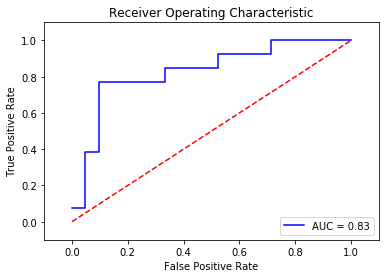

7  test  8050  acc=  0.7941176  loss =  0.53825456  sen:  0.7692307692307693  spe:  0.8095238095238095
7  test  8100  acc=  0.7941176  loss =  0.53632337  sen:  0.7692307692307693  spe:  0.8095238095238095
7  test  8150  acc=  0.7941176  loss =  0.53547597  sen:  0.7692307692307693  spe:  0.8095238095238095
7  test  8200  acc=  0.7941176  loss =  0.53808534  sen:  0.7692307692307693  spe:  0.8095238095238095
7  test  8250  acc=  0.7941176  loss =  0.53093296  sen:  0.7692307692307693  spe:  0.8095238095238095
7  test  8300  acc=  0.7941176  loss =  0.5330976  sen:  0.7692307692307693  spe:  0.8095238095238095
7  test  8350  acc=  0.7941176  loss =  0.5361631  sen:  0.7692307692307693  spe:  0.8095238095238095
7  test  8400  acc=  0.7941176  loss =  0.5314789  sen:  0.7692307692307693  spe:  0.8095238095238095
7  test  8450  acc=  0.7352941  loss =  0.5428232  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  8500  acc=  0.7941176  loss =  0.53001624  sen:  0.7692307692307693 

7  test  12000  acc=  0.7647059  loss =  0.5224095  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


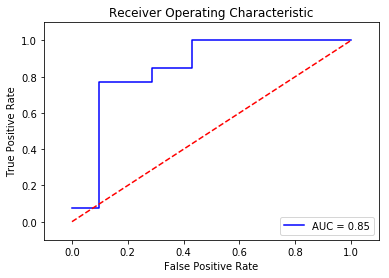

7  test  12050  acc=  0.7647059  loss =  0.5301754  sen:  0.7692307692307693  spe:  0.7619047619047619
7  test  12100  acc=  0.7352941  loss =  0.52836967  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  12150  acc=  0.7352941  loss =  0.5312143  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  12200  acc=  0.7352941  loss =  0.52738166  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  12250  acc=  0.7647059  loss =  0.5288997  sen:  0.7692307692307693  spe:  0.7619047619047619
7  test  12300  acc=  0.7352941  loss =  0.529312  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  12350  acc=  0.7352941  loss =  0.5283742  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  12400  acc=  0.7352941  loss =  0.52557325  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  12450  acc=  0.7352941  loss =  0.53051454  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  12500  acc=  0.7352941  loss =  0.5275566  sen:  0.7692307692

7  test  15950  acc=  0.7352941  loss =  0.51861346  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  16000  acc=  0.7647059  loss =  0.5242496  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


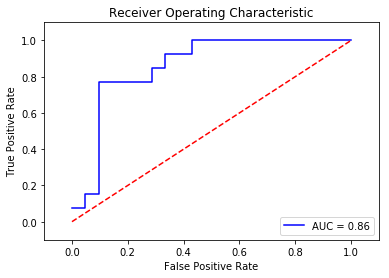

7  test  16050  acc=  0.7352941  loss =  0.5241027  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  16100  acc=  0.7352941  loss =  0.51981  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  16150  acc=  0.7352941  loss =  0.5125162  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  16200  acc=  0.7647059  loss =  0.518917  sen:  0.7692307692307693  spe:  0.7619047619047619
7  test  16250  acc=  0.7352941  loss =  0.52464783  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  16300  acc=  0.7352941  loss =  0.51941633  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  16350  acc=  0.7647059  loss =  0.52004325  sen:  0.7692307692307693  spe:  0.7619047619047619
7  test  16400  acc=  0.7647059  loss =  0.5267927  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  16450  acc=  0.7352941  loss =  0.51885295  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  16500  acc=  0.7352941  loss =  0.5193993  sen:  0.769230769230

7  test  19950  acc=  0.7647059  loss =  0.52997494  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  20000  acc=  0.7352941  loss =  0.52519655  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


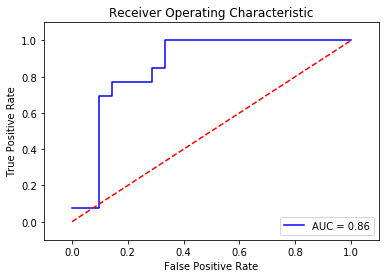

7  test  20050  acc=  0.7647059  loss =  0.51868933  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  20100  acc=  0.7647059  loss =  0.52805084  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  20150  acc=  0.7647059  loss =  0.5264647  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  20200  acc=  0.7647059  loss =  0.5246218  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  20250  acc=  0.7647059  loss =  0.523454  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  20300  acc=  0.7647059  loss =  0.52507913  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  20350  acc=  0.7647059  loss =  0.5264594  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  20400  acc=  0.7647059  loss =  0.5249794  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  20450  acc=  0.7647059  loss =  0.524798  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  20500  acc=  0.7647059  loss =  0.5259893  sen:  0.846153846153

7  test  24000  acc=  0.7647059  loss =  0.525291  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


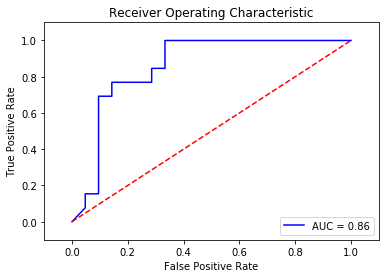

7  test  24050  acc=  0.7352941  loss =  0.51667094  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  24100  acc=  0.7647059  loss =  0.52004707  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  24150  acc=  0.7647059  loss =  0.5245652  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  24200  acc=  0.7352941  loss =  0.5172118  sen:  0.7692307692307693  spe:  0.7142857142857143
7  test  24250  acc=  0.7647059  loss =  0.5150329  sen:  0.7692307692307693  spe:  0.7619047619047619
7  test  24300  acc=  0.7647059  loss =  0.52663374  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  24350  acc=  0.7647059  loss =  0.5227234  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  24400  acc=  0.7647059  loss =  0.5248413  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  24450  acc=  0.7647059  loss =  0.5187267  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  24500  acc=  0.7647059  loss =  0.5249771  sen:  0.8461538461

7  test  27950  acc=  0.7647059  loss =  0.52527606  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  28000  acc=  0.7352941  loss =  0.52410245  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


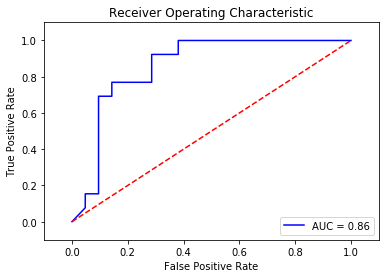

7  test  28050  acc=  0.7647059  loss =  0.5276411  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  28100  acc=  0.7647059  loss =  0.51911616  sen:  0.7692307692307693  spe:  0.7619047619047619
7  test  28150  acc=  0.7647059  loss =  0.5200399  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  28200  acc=  0.7647059  loss =  0.5198942  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  28250  acc=  0.7647059  loss =  0.5298949  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  28300  acc=  0.7647059  loss =  0.5169151  sen:  0.7692307692307693  spe:  0.7619047619047619
7  test  28350  acc=  0.7647059  loss =  0.5259414  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  28400  acc=  0.7647059  loss =  0.52751493  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  28450  acc=  0.7647059  loss =  0.52931684  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  28500  acc=  0.7647059  loss =  0.52885246  sen:  0.846153846

7  test  31950  acc=  0.7941176  loss =  0.50651455  sen:  0.8461538461538461  spe:  0.7619047619047619
7  test  32000  acc=  0.7647059  loss =  0.51236093  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


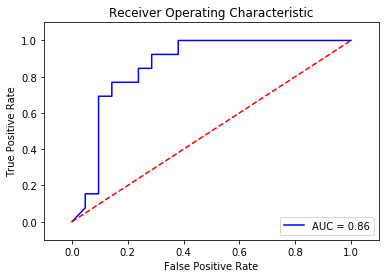

7  test  32050  acc=  0.7941176  loss =  0.51194924  sen:  0.8461538461538461  spe:  0.7619047619047619
7  test  32100  acc=  0.7941176  loss =  0.50716496  sen:  0.8461538461538461  spe:  0.7619047619047619
7  test  32150  acc=  0.7941176  loss =  0.5097018  sen:  0.8461538461538461  spe:  0.7619047619047619
7  test  32200  acc=  0.7941176  loss =  0.5100055  sen:  0.8461538461538461  spe:  0.7619047619047619
7  test  32250  acc=  0.7941176  loss =  0.5106558  sen:  0.8461538461538461  spe:  0.7619047619047619
7  test  32300  acc=  0.7941176  loss =  0.50826335  sen:  0.8461538461538461  spe:  0.7619047619047619
7  test  32350  acc=  0.7941176  loss =  0.51034546  sen:  0.8461538461538461  spe:  0.7619047619047619
7  test  32400  acc=  0.7941176  loss =  0.50386703  sen:  0.8461538461538461  spe:  0.7619047619047619
7  test  32450  acc=  0.7647059  loss =  0.51896113  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  32500  acc=  0.7941176  loss =  0.51113224  sen:  0.846153

7  test  35950  acc=  0.7941176  loss =  0.5055624  sen:  0.8461538461538461  spe:  0.7619047619047619
7  test  36000  acc=  0.7941176  loss =  0.5104632  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


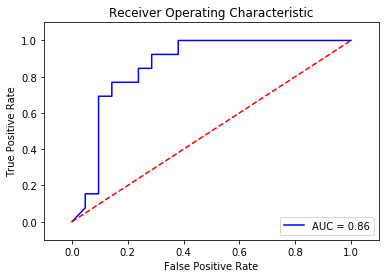

7  test  36050  acc=  0.7941176  loss =  0.51288974  sen:  0.8461538461538461  spe:  0.7619047619047619
7  test  36100  acc=  0.7647059  loss =  0.5121621  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  36150  acc=  0.7647059  loss =  0.5162735  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  36200  acc=  0.7941176  loss =  0.50955224  sen:  0.8461538461538461  spe:  0.7619047619047619
7  test  36250  acc=  0.7647059  loss =  0.51447695  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  36300  acc=  0.7941176  loss =  0.50712115  sen:  0.8461538461538461  spe:  0.7619047619047619
7  test  36350  acc=  0.7941176  loss =  0.50916916  sen:  0.8461538461538461  spe:  0.7619047619047619
7  test  36400  acc=  0.7647059  loss =  0.51734895  sen:  0.8461538461538461  spe:  0.7142857142857143
7  test  36450  acc=  0.7941176  loss =  0.51145047  sen:  0.8461538461538461  spe:  0.7619047619047619
7  test  36500  acc=  0.7941176  loss =  0.50944567  sen:  0.84615

7  test  39950  acc=  0.7941176  loss =  0.5073072  sen:  0.8461538461538461  spe:  0.7619047619047619
7  test  40000  acc=  0.7941176  loss =  0.5042882  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


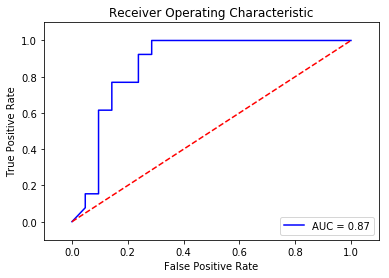

8  test  0  acc=  0.38235295  loss =  0.73173845  sen:  1.0  spe:  0.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


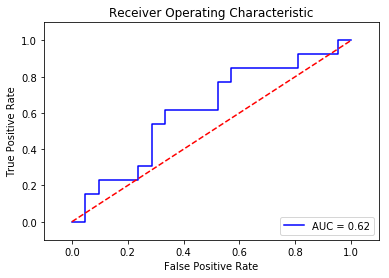

8  test  50  acc=  0.38235295  loss =  0.71055424  sen:  1.0  spe:  0.0
8  test  100  acc=  0.47058824  loss =  0.6933135  sen:  0.8461538461538461  spe:  0.23809523809523808
8  test  150  acc=  0.47058824  loss =  0.6854931  sen:  0.8461538461538461  spe:  0.23809523809523808
8  test  200  acc=  0.61764705  loss =  0.6782772  sen:  0.8461538461538461  spe:  0.47619047619047616
8  test  250  acc=  0.5882353  loss =  0.67623246  sen:  0.8461538461538461  spe:  0.42857142857142855
8  test  300  acc=  0.7058824  loss =  0.6675487  sen:  0.7692307692307693  spe:  0.6666666666666666
8  test  350  acc=  0.7058824  loss =  0.6654055  sen:  0.7692307692307693  spe:  0.6666666666666666
8  test  400  acc=  0.7352941  loss =  0.6555429  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  450  acc=  0.7352941  loss =  0.6554387  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  500  acc=  0.7352941  loss =  0.65562385  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  5

8  test  4000  acc=  0.8235294  loss =  0.55876875  sen:  0.8461538461538461  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1]


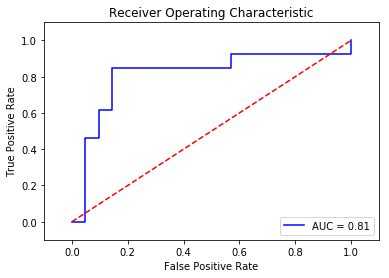

8  test  4050  acc=  0.8235294  loss =  0.55797356  sen:  0.8461538461538461  spe:  0.8095238095238095
8  test  4100  acc=  0.8235294  loss =  0.55662584  sen:  0.8461538461538461  spe:  0.8095238095238095
8  test  4150  acc=  0.7941176  loss =  0.5569206  sen:  0.7692307692307693  spe:  0.8095238095238095
8  test  4200  acc=  0.8235294  loss =  0.5507922  sen:  0.7692307692307693  spe:  0.8571428571428571
8  test  4250  acc=  0.8235294  loss =  0.55050576  sen:  0.7692307692307693  spe:  0.8571428571428571
8  test  4300  acc=  0.7941176  loss =  0.5534555  sen:  0.7692307692307693  spe:  0.8095238095238095
8  test  4350  acc=  0.7941176  loss =  0.55359447  sen:  0.7692307692307693  spe:  0.8095238095238095
8  test  4400  acc=  0.7941176  loss =  0.5519814  sen:  0.7692307692307693  spe:  0.8095238095238095
8  test  4450  acc=  0.7941176  loss =  0.5505934  sen:  0.7692307692307693  spe:  0.8095238095238095
8  test  4500  acc=  0.7941176  loss =  0.5545182  sen:  0.7692307692307693  s

8  test  8000  acc=  0.7352941  loss =  0.5537947  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


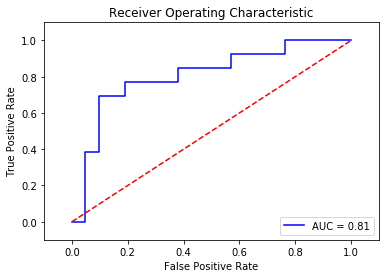

8  test  8050  acc=  0.7352941  loss =  0.5532462  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  8100  acc=  0.7352941  loss =  0.55392593  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  8150  acc=  0.7352941  loss =  0.55018735  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  8200  acc=  0.7352941  loss =  0.5549564  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  8250  acc=  0.7352941  loss =  0.5577724  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  8300  acc=  0.7352941  loss =  0.5567673  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  8350  acc=  0.7352941  loss =  0.55443186  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  8400  acc=  0.7352941  loss =  0.55641234  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  8450  acc=  0.7058824  loss =  0.5625253  sen:  0.7692307692307693  spe:  0.6666666666666666
8  test  8500  acc=  0.7352941  loss =  0.5567204  sen:  0.7692307692307693  s

8  test  12000  acc=  0.7058824  loss =  0.57014287  sen:  0.7692307692307693  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


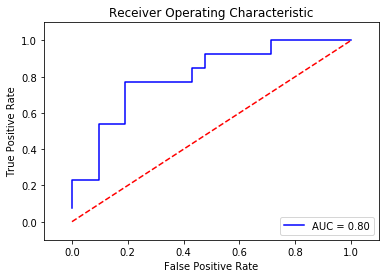

8  test  12050  acc=  0.7058824  loss =  0.5677016  sen:  0.7692307692307693  spe:  0.6666666666666666
8  test  12100  acc=  0.7058824  loss =  0.5656878  sen:  0.7692307692307693  spe:  0.6666666666666666
8  test  12150  acc=  0.7058824  loss =  0.566354  sen:  0.7692307692307693  spe:  0.6666666666666666
8  test  12200  acc=  0.7058824  loss =  0.56747407  sen:  0.7692307692307693  spe:  0.6666666666666666
8  test  12250  acc=  0.7058824  loss =  0.56992054  sen:  0.7692307692307693  spe:  0.6666666666666666
8  test  12300  acc=  0.7058824  loss =  0.57015646  sen:  0.7692307692307693  spe:  0.6666666666666666
8  test  12350  acc=  0.7058824  loss =  0.57212675  sen:  0.7692307692307693  spe:  0.6666666666666666
8  test  12400  acc=  0.7058824  loss =  0.5680414  sen:  0.7692307692307693  spe:  0.6666666666666666
8  test  12450  acc=  0.7058824  loss =  0.56763  sen:  0.7692307692307693  spe:  0.6666666666666666
8  test  12500  acc=  0.7058824  loss =  0.5701782  sen:  0.769230769230

8  test  15950  acc=  0.7352941  loss =  0.563308  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  16000  acc=  0.7352941  loss =  0.5642391  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


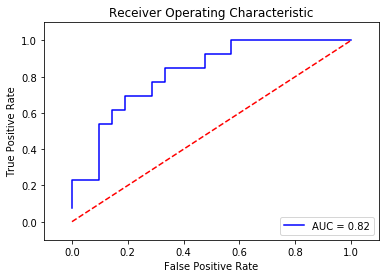

8  test  16050  acc=  0.7058824  loss =  0.5675553  sen:  0.7692307692307693  spe:  0.6666666666666666
8  test  16100  acc=  0.7352941  loss =  0.5630573  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  16150  acc=  0.7352941  loss =  0.5630705  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  16200  acc=  0.7058824  loss =  0.56303406  sen:  0.7692307692307693  spe:  0.6666666666666666
8  test  16250  acc=  0.7352941  loss =  0.57025856  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  16300  acc=  0.7058824  loss =  0.5647911  sen:  0.7692307692307693  spe:  0.6666666666666666
8  test  16350  acc=  0.7352941  loss =  0.56655234  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  16400  acc=  0.7352941  loss =  0.5674163  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  16450  acc=  0.7352941  loss =  0.5633377  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  16500  acc=  0.7058824  loss =  0.5656358  sen:  0.7692307692

8  test  19950  acc=  0.7647059  loss =  0.5618526  sen:  0.7692307692307693  spe:  0.7619047619047619
8  test  20000  acc=  0.7647059  loss =  0.56222254  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


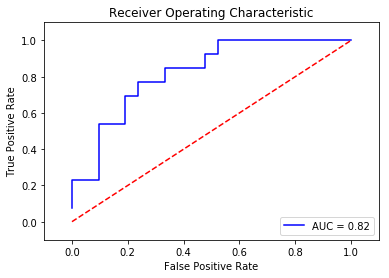

8  test  20050  acc=  0.7058824  loss =  0.5609561  sen:  0.6923076923076923  spe:  0.7142857142857143
8  test  20100  acc=  0.7647059  loss =  0.5599338  sen:  0.7692307692307693  spe:  0.7619047619047619
8  test  20150  acc=  0.7647059  loss =  0.56390005  sen:  0.7692307692307693  spe:  0.7619047619047619
8  test  20200  acc=  0.7647059  loss =  0.5607398  sen:  0.7692307692307693  spe:  0.7619047619047619
8  test  20250  acc=  0.7352941  loss =  0.56094563  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  20300  acc=  0.7352941  loss =  0.5608312  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  20350  acc=  0.7352941  loss =  0.5598321  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  20400  acc=  0.7352941  loss =  0.5583482  sen:  0.7692307692307693  spe:  0.7142857142857143
8  test  20450  acc=  0.7058824  loss =  0.5571758  sen:  0.6923076923076923  spe:  0.7142857142857143
8  test  20500  acc=  0.7647059  loss =  0.560629  sen:  0.769230769230

8  test  23950  acc=  0.7352941  loss =  0.5582701  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  24000  acc=  0.7352941  loss =  0.5583059  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


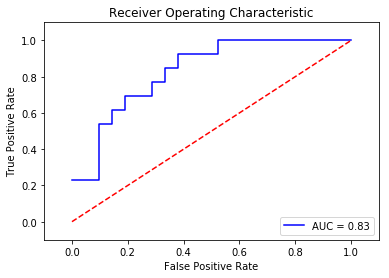

8  test  24050  acc=  0.7058824  loss =  0.5623579  sen:  0.6923076923076923  spe:  0.7142857142857143
8  test  24100  acc=  0.7058824  loss =  0.56316656  sen:  0.6923076923076923  spe:  0.7142857142857143
8  test  24150  acc=  0.7352941  loss =  0.55775565  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  24200  acc=  0.7352941  loss =  0.5572309  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  24250  acc=  0.7058824  loss =  0.556031  sen:  0.6923076923076923  spe:  0.7142857142857143
8  test  24300  acc=  0.7352941  loss =  0.55930823  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  24350  acc=  0.7058824  loss =  0.5575287  sen:  0.6923076923076923  spe:  0.7142857142857143
8  test  24400  acc=  0.7352941  loss =  0.5595759  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  24450  acc=  0.7058824  loss =  0.5598538  sen:  0.6923076923076923  spe:  0.7142857142857143
8  test  24500  acc=  0.7352941  loss =  0.5633926  sen:  0.69230769230

8  test  27950  acc=  0.7352941  loss =  0.56012696  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  28000  acc=  0.7352941  loss =  0.56230384  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


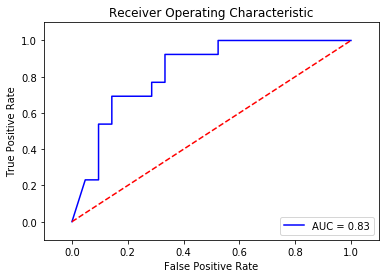

8  test  28050  acc=  0.7058824  loss =  0.5611258  sen:  0.6923076923076923  spe:  0.7142857142857143
8  test  28100  acc=  0.7058824  loss =  0.5623722  sen:  0.6923076923076923  spe:  0.7142857142857143
8  test  28150  acc=  0.7352941  loss =  0.558345  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  28200  acc=  0.7058824  loss =  0.5604327  sen:  0.6923076923076923  spe:  0.7142857142857143
8  test  28250  acc=  0.7352941  loss =  0.5613676  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  28300  acc=  0.7352941  loss =  0.55991226  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  28350  acc=  0.7352941  loss =  0.55722624  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  28400  acc=  0.7352941  loss =  0.5600457  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  28450  acc=  0.7352941  loss =  0.56205934  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  28500  acc=  0.7352941  loss =  0.56195307  sen:  0.6923076923

8  test  31950  acc=  0.7352941  loss =  0.5607263  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  32000  acc=  0.7352941  loss =  0.56476873  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


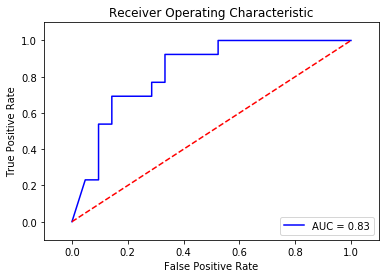

8  test  32050  acc=  0.7352941  loss =  0.56376505  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  32100  acc=  0.7352941  loss =  0.56354785  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  32150  acc=  0.7352941  loss =  0.55943185  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  32200  acc=  0.7352941  loss =  0.5637876  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  32250  acc=  0.7352941  loss =  0.56073916  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  32300  acc=  0.7352941  loss =  0.5631145  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  32350  acc=  0.7352941  loss =  0.5604284  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  32400  acc=  0.7352941  loss =  0.56124634  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  32450  acc=  0.7352941  loss =  0.5617454  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  32500  acc=  0.7352941  loss =  0.56181335  sen:  0.6923076

8  test  35950  acc=  0.7352941  loss =  0.55730295  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  36000  acc=  0.7352941  loss =  0.55174655  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


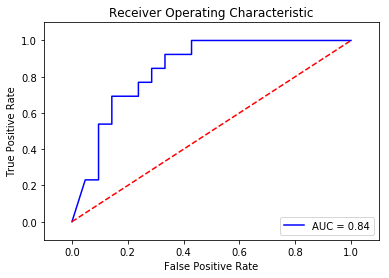

8  test  36050  acc=  0.7352941  loss =  0.55369234  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  36100  acc=  0.7352941  loss =  0.5564159  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  36150  acc=  0.7352941  loss =  0.55399936  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  36200  acc=  0.7352941  loss =  0.55794275  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  36250  acc=  0.7352941  loss =  0.5549289  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  36300  acc=  0.7352941  loss =  0.55811197  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  36350  acc=  0.7352941  loss =  0.558006  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  36400  acc=  0.7352941  loss =  0.55733943  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  36450  acc=  0.7352941  loss =  0.5602352  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  36500  acc=  0.7352941  loss =  0.55772096  sen:  0.69230769

8  test  39950  acc=  0.7352941  loss =  0.5582542  sen:  0.6923076923076923  spe:  0.7619047619047619
8  test  40000  acc=  0.7352941  loss =  0.5585444  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


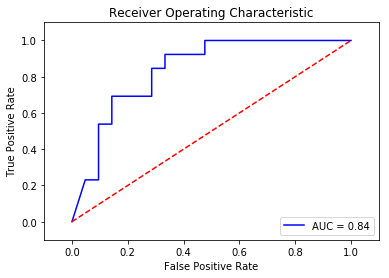

9  test  0  acc=  0.5294118  loss =  0.6926446  sen:  0.0  spe:  0.8571428571428571
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


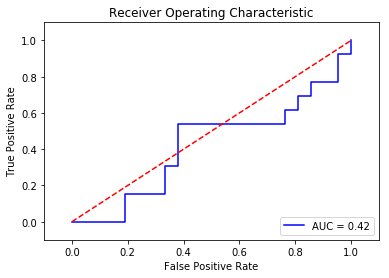

9  test  50  acc=  0.5294118  loss =  0.682345  sen:  0.38461538461538464  spe:  0.6190476190476191
9  test  100  acc=  0.5  loss =  0.68317056  sen:  0.46153846153846156  spe:  0.5238095238095238
9  test  150  acc=  0.5294118  loss =  0.67576313  sen:  0.46153846153846156  spe:  0.5714285714285714
9  test  200  acc=  0.61764705  loss =  0.6751666  sen:  0.6153846153846154  spe:  0.6190476190476191
9  test  250  acc=  0.5588235  loss =  0.6684878  sen:  0.46153846153846156  spe:  0.6190476190476191
9  test  300  acc=  0.5882353  loss =  0.66329587  sen:  0.46153846153846156  spe:  0.6666666666666666
9  test  350  acc=  0.5882353  loss =  0.6610058  sen:  0.46153846153846156  spe:  0.6666666666666666
9  test  400  acc=  0.61764705  loss =  0.6583102  sen:  0.5384615384615384  spe:  0.6666666666666666
9  test  450  acc=  0.64705884  loss =  0.65386975  sen:  0.5384615384615384  spe:  0.7142857142857143
9  test  500  acc=  0.64705884  loss =  0.6528315  sen:  0.5384615384615384  spe:  0.7

9  test  4000  acc=  0.7058824  loss =  0.5801351  sen:  0.6923076923076923  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


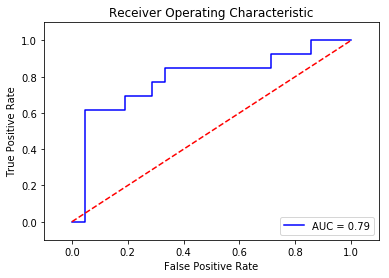

9  test  4050  acc=  0.7058824  loss =  0.5822333  sen:  0.6923076923076923  spe:  0.7142857142857143
9  test  4100  acc=  0.7058824  loss =  0.57966715  sen:  0.6923076923076923  spe:  0.7142857142857143
9  test  4150  acc=  0.7058824  loss =  0.5800416  sen:  0.6923076923076923  spe:  0.7142857142857143
9  test  4200  acc=  0.7352941  loss =  0.5776457  sen:  0.6923076923076923  spe:  0.7619047619047619
9  test  4250  acc=  0.7058824  loss =  0.5846088  sen:  0.6923076923076923  spe:  0.7142857142857143
9  test  4300  acc=  0.7058824  loss =  0.5796375  sen:  0.6923076923076923  spe:  0.7142857142857143
9  test  4350  acc=  0.7352941  loss =  0.57883734  sen:  0.6923076923076923  spe:  0.7619047619047619
9  test  4400  acc=  0.7352941  loss =  0.57404953  sen:  0.6923076923076923  spe:  0.7619047619047619
9  test  4450  acc=  0.7352941  loss =  0.5779705  sen:  0.6923076923076923  spe:  0.7619047619047619
9  test  4500  acc=  0.7352941  loss =  0.5802498  sen:  0.6923076923076923  sp

9  test  8000  acc=  0.7352941  loss =  0.5528175  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


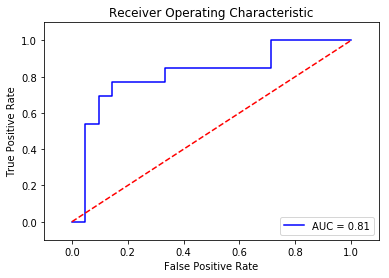

9  test  8050  acc=  0.7352941  loss =  0.55113554  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  8100  acc=  0.7352941  loss =  0.5528403  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  8150  acc=  0.7352941  loss =  0.5495109  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  8200  acc=  0.7352941  loss =  0.5565574  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  8250  acc=  0.7352941  loss =  0.54890645  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  8300  acc=  0.7352941  loss =  0.5513047  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  8350  acc=  0.7352941  loss =  0.5462048  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  8400  acc=  0.7352941  loss =  0.5456992  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  8450  acc=  0.7352941  loss =  0.54791445  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  8500  acc=  0.7352941  loss =  0.54617435  sen:  0.7692307692307693  s

9  test  12000  acc=  0.7352941  loss =  0.5495772  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


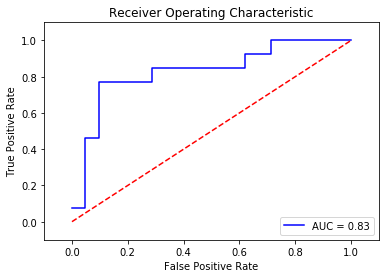

9  test  12050  acc=  0.7352941  loss =  0.54982525  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  12100  acc=  0.7352941  loss =  0.5419609  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  12150  acc=  0.7352941  loss =  0.5457036  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  12200  acc=  0.7352941  loss =  0.55054617  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  12250  acc=  0.7352941  loss =  0.55241823  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  12300  acc=  0.7352941  loss =  0.54203886  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  12350  acc=  0.7352941  loss =  0.54547614  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  12400  acc=  0.7352941  loss =  0.5462132  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  12450  acc=  0.7352941  loss =  0.543395  sen:  0.7692307692307693  spe:  0.7142857142857143
9  test  12500  acc=  0.7352941  loss =  0.552608  sen:  0.7692307692

9  test  15950  acc=  0.7058824  loss =  0.559006  sen:  0.7692307692307693  spe:  0.6666666666666666
9  test  16000  acc=  0.7058824  loss =  0.5471985  sen:  0.7692307692307693  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


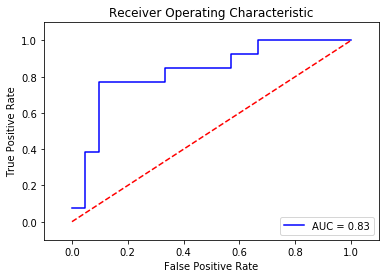

9  test  16050  acc=  0.7058824  loss =  0.56089365  sen:  0.7692307692307693  spe:  0.6666666666666666
9  test  16100  acc=  0.7058824  loss =  0.55876267  sen:  0.7692307692307693  spe:  0.6666666666666666
9  test  16150  acc=  0.7058824  loss =  0.55538785  sen:  0.7692307692307693  spe:  0.6666666666666666
9  test  16200  acc=  0.7352941  loss =  0.556329  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  16250  acc=  0.7352941  loss =  0.56651425  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  16300  acc=  0.7352941  loss =  0.5585332  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  16350  acc=  0.7352941  loss =  0.55613554  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  16400  acc=  0.7058824  loss =  0.55674523  sen:  0.7692307692307693  spe:  0.6666666666666666
9  test  16450  acc=  0.7352941  loss =  0.55337715  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  16500  acc=  0.7058824  loss =  0.5535484  sen:  0.7692307

9  test  19950  acc=  0.7058824  loss =  0.56469625  sen:  0.7692307692307693  spe:  0.6666666666666666
9  test  20000  acc=  0.7352941  loss =  0.569078  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


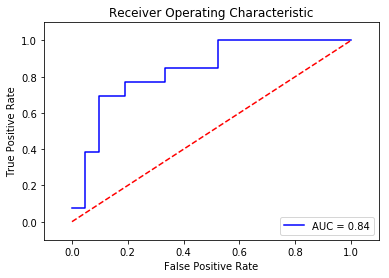

9  test  20050  acc=  0.7058824  loss =  0.5745837  sen:  0.7692307692307693  spe:  0.6666666666666666
9  test  20100  acc=  0.7058824  loss =  0.5688529  sen:  0.7692307692307693  spe:  0.6666666666666666
9  test  20150  acc=  0.7352941  loss =  0.57027566  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  20200  acc=  0.7058824  loss =  0.5708269  sen:  0.7692307692307693  spe:  0.6666666666666666
9  test  20250  acc=  0.7058824  loss =  0.567805  sen:  0.7692307692307693  spe:  0.6666666666666666
9  test  20300  acc=  0.7058824  loss =  0.568568  sen:  0.7692307692307693  spe:  0.6666666666666666
9  test  20350  acc=  0.7352941  loss =  0.5684307  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  20400  acc=  0.7352941  loss =  0.5681895  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  20450  acc=  0.7058824  loss =  0.56140184  sen:  0.7692307692307693  spe:  0.6666666666666666
9  test  20500  acc=  0.7058824  loss =  0.574967  sen:  0.76923076923076

9  test  23950  acc=  0.7352941  loss =  0.57754827  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  24000  acc=  0.7352941  loss =  0.57536834  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


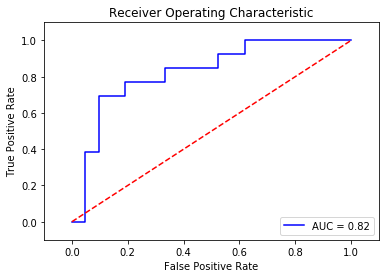

9  test  24050  acc=  0.7352941  loss =  0.57520914  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  24100  acc=  0.7352941  loss =  0.57314646  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  24150  acc=  0.7352941  loss =  0.5761958  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  24200  acc=  0.7352941  loss =  0.5755315  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  24250  acc=  0.7058824  loss =  0.5746736  sen:  0.7692307692307693  spe:  0.6666666666666666
9  test  24300  acc=  0.7352941  loss =  0.57315946  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  24350  acc=  0.7352941  loss =  0.57222414  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  24400  acc=  0.7352941  loss =  0.5751737  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  24450  acc=  0.7352941  loss =  0.5725924  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  24500  acc=  0.7352941  loss =  0.57580966  sen:  0.84615384

9  test  27950  acc=  0.7352941  loss =  0.5798471  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  28000  acc=  0.7352941  loss =  0.5755093  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


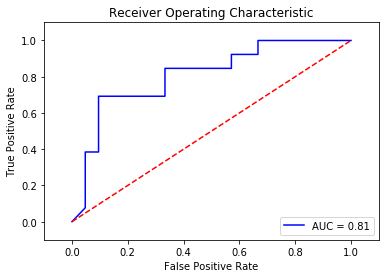

9  test  28050  acc=  0.7352941  loss =  0.5817853  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  28100  acc=  0.7352941  loss =  0.57758945  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  28150  acc=  0.7352941  loss =  0.5690162  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  28200  acc=  0.7352941  loss =  0.5732407  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  28250  acc=  0.7352941  loss =  0.5762256  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  28300  acc=  0.7352941  loss =  0.5725355  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  28350  acc=  0.7352941  loss =  0.5709586  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  28400  acc=  0.7352941  loss =  0.5677484  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  28450  acc=  0.7352941  loss =  0.5699481  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  28500  acc=  0.7352941  loss =  0.5720612  sen:  0.846153846153

9  test  31950  acc=  0.7352941  loss =  0.56848335  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  32000  acc=  0.7352941  loss =  0.5657937  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


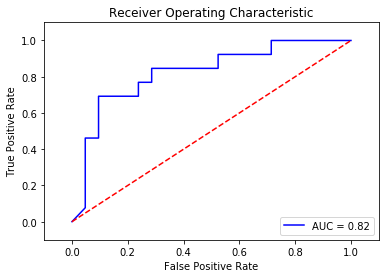

9  test  32050  acc=  0.7352941  loss =  0.56762683  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  32100  acc=  0.7352941  loss =  0.56846136  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  32150  acc=  0.7352941  loss =  0.5666477  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  32200  acc=  0.7352941  loss =  0.57079715  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  32250  acc=  0.7352941  loss =  0.5710685  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  32300  acc=  0.7352941  loss =  0.5697971  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  32350  acc=  0.7352941  loss =  0.56981647  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  32400  acc=  0.7352941  loss =  0.56867176  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  32450  acc=  0.7352941  loss =  0.5716057  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  32500  acc=  0.7352941  loss =  0.5694755  sen:  0.84615384

9  test  35950  acc=  0.7352941  loss =  0.56784415  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  36000  acc=  0.7352941  loss =  0.564621  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


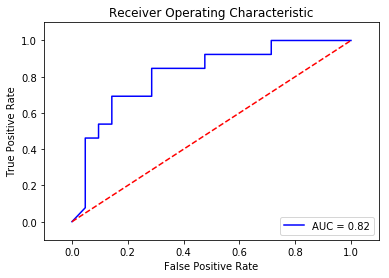

9  test  36050  acc=  0.7352941  loss =  0.564423  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  36100  acc=  0.7352941  loss =  0.56373644  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  36150  acc=  0.7352941  loss =  0.5645316  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  36200  acc=  0.7352941  loss =  0.5655937  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  36250  acc=  0.7352941  loss =  0.5639901  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  36300  acc=  0.7352941  loss =  0.5636222  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  36350  acc=  0.7352941  loss =  0.56627  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  36400  acc=  0.7352941  loss =  0.5645749  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  36450  acc=  0.7352941  loss =  0.56860554  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  36500  acc=  0.7352941  loss =  0.5681701  sen:  0.84615384615384

9  test  39950  acc=  0.7352941  loss =  0.56604964  sen:  0.8461538461538461  spe:  0.6666666666666666
9  test  40000  acc=  0.7352941  loss =  0.56264144  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


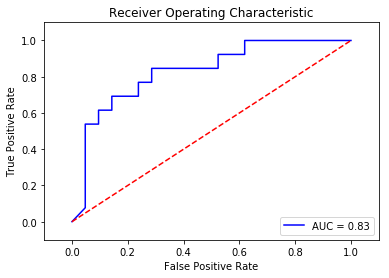

In [5]:
for num in range(10):                           #  4个PK + 9b
    with tf.Session(config=config) as sess:
        sess.run(init_op)
        coord = tf.train.Coordinator()
        tf.train.start_queue_runners(sess=sess,coord=coord)      #启动线程操作，这是因为之前数据增强的时候使用train.shuffle_batch()函数的时候通过参数num_threads()配置了16个线程用于组织batch的操作
        train_writer = tf.summary.FileWriter('G:/ZengQYuan/ivim_baoer_logs/hhy_cnn_fab_csab(4PK+9b)/train/'+str(num),sess.graph)
        test_writer = tf.summary.FileWriter('G:/ZengQYuan/ivim_baoer_logs/hhy_cnn_fab_csab(4PK+9b)/test/'+str(num),sess.graph)

        for step in range (40001):
            global_step = step
            idx = np.random.randint(0,13450,batch_size)          ###
            image_batch = series_train[idx]
            pk_batch = pk_train[idx]
            label_batch = y_train[idx]
            _,summary,loss_value=sess.run([train_op,merge,loss],feed_dict={series_:image_batch,pk_:pk_batch,y_:label_batch,keep_prob:0.5})
            train_writer.add_summary(summary,step)

            if step % 50 == 0:
                acc,loss_value,summary,output_position_r,label_position_r,predict_r,p = sess.run([Accuracy,loss,merge,output_position,label_position,predict,prediction],feed_dict={series_:series_test,pk_:pk_test,y_:y_test,keep_prob:1})         ###
                test_writer.add_summary(summary,step)
                sen,spe = Sensitivity_specificity(output_position_r,predict_r)
                print(str(num)," test ",str(step)," acc= ",acc," loss = ",loss_value," sen: ",sen," spe: ",spe)

                
            if step % 2000 == 0:
                print(label_position_r)
                print(output_position_r)
            
            if step % 4000 == 0:
                ROC(label_position_r,p)
                
        coord.request_stop() # 请求线程结束
        coord.join() # 等待线程结束

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
10  test  0  acc=  0.5  loss =  0.7110957  sen:  0.23076923076923078  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0]


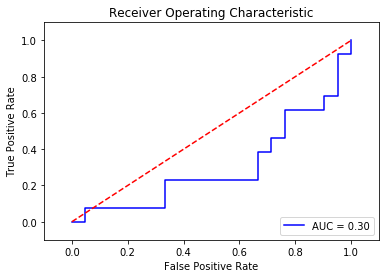

10  test  50  acc=  0.38235295  loss =  0.70090985  sen:  0.46153846153846156  spe:  0.3333333333333333
10  test  100  acc=  0.47058824  loss =  0.6934484  sen:  0.7692307692307693  spe:  0.2857142857142857
10  test  150  acc=  0.64705884  loss =  0.6804528  sen:  0.7692307692307693  spe:  0.5714285714285714
10  test  200  acc=  0.64705884  loss =  0.6766833  sen:  0.7692307692307693  spe:  0.5714285714285714
10  test  250  acc=  0.64705884  loss =  0.6614404  sen:  0.6923076923076923  spe:  0.6190476190476191
10  test  300  acc=  0.6764706  loss =  0.66535795  sen:  0.7692307692307693  spe:  0.6190476190476191
10  test  350  acc=  0.64705884  loss =  0.65256524  sen:  0.6923076923076923  spe:  0.6190476190476191
10  test  400  acc=  0.7058824  loss =  0.6499398  sen:  0.7692307692307693  spe:  0.6666666666666666
10  test  450  acc=  0.6764706  loss =  0.6529764  sen:  0.7692307692307693  spe:  0.6190476190476191
10  test  500  acc=  0.6764706  loss =  0.64229655  sen:  0.6923076923076

10  test  4000  acc=  0.7058824  loss =  0.57270634  sen:  0.7692307692307693  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


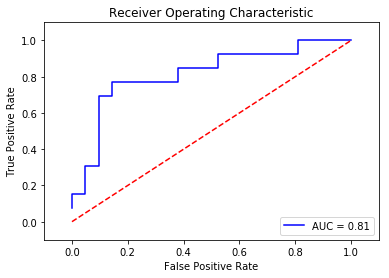

10  test  4050  acc=  0.7058824  loss =  0.57225746  sen:  0.7692307692307693  spe:  0.6666666666666666
10  test  4100  acc=  0.7352941  loss =  0.5541526  sen:  0.7692307692307693  spe:  0.7142857142857143
10  test  4150  acc=  0.7058824  loss =  0.5675489  sen:  0.7692307692307693  spe:  0.6666666666666666
10  test  4200  acc=  0.7058824  loss =  0.5654176  sen:  0.7692307692307693  spe:  0.6666666666666666
10  test  4250  acc=  0.7058824  loss =  0.56496  sen:  0.7692307692307693  spe:  0.6666666666666666
10  test  4300  acc=  0.7058824  loss =  0.56448996  sen:  0.7692307692307693  spe:  0.6666666666666666
10  test  4350  acc=  0.7058824  loss =  0.5653556  sen:  0.7692307692307693  spe:  0.6666666666666666
10  test  4400  acc=  0.7058824  loss =  0.56066984  sen:  0.7692307692307693  spe:  0.6666666666666666
10  test  4450  acc=  0.7058824  loss =  0.5591457  sen:  0.7692307692307693  spe:  0.6666666666666666
10  test  4500  acc=  0.7058824  loss =  0.56310225  sen:  0.76923076923

10  test  7950  acc=  0.7941176  loss =  0.52878064  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  8000  acc=  0.7941176  loss =  0.5371804  sen:  0.7692307692307693  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


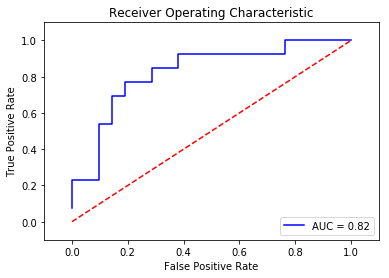

10  test  8050  acc=  0.7941176  loss =  0.53393304  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  8100  acc=  0.7941176  loss =  0.5393908  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  8150  acc=  0.7941176  loss =  0.5306342  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  8200  acc=  0.7941176  loss =  0.5288635  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  8250  acc=  0.7941176  loss =  0.52771693  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  8300  acc=  0.7941176  loss =  0.53019  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  8350  acc=  0.8235294  loss =  0.52873033  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  8400  acc=  0.7941176  loss =  0.5216948  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  8450  acc=  0.7941176  loss =  0.52557224  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  8500  acc=  0.7941176  loss =  0.532475  sen:  0.769230769230

10  test  11950  acc=  0.7941176  loss =  0.5191369  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  12000  acc=  0.7941176  loss =  0.5139192  sen:  0.7692307692307693  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


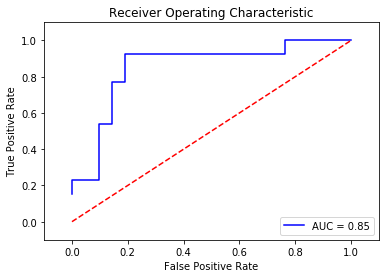

10  test  12050  acc=  0.7941176  loss =  0.5248352  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  12100  acc=  0.7941176  loss =  0.5186054  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  12150  acc=  0.7941176  loss =  0.5181483  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  12200  acc=  0.7941176  loss =  0.5174363  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  12250  acc=  0.7941176  loss =  0.51266015  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  12300  acc=  0.7941176  loss =  0.5114333  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  12350  acc=  0.7941176  loss =  0.5136664  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  12400  acc=  0.7941176  loss =  0.52124465  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  12450  acc=  0.7941176  loss =  0.51588035  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  12500  acc=  0.7941176  loss =  0.5181651  sen:  0.

10  test  15950  acc=  0.7941176  loss =  0.5211473  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  16000  acc=  0.7647059  loss =  0.5258511  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


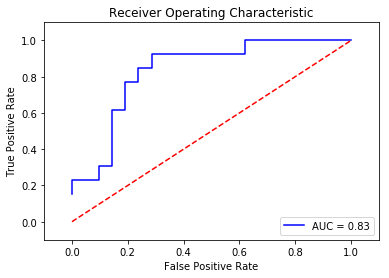

10  test  16050  acc=  0.7647059  loss =  0.5214138  sen:  0.7692307692307693  spe:  0.7619047619047619
10  test  16100  acc=  0.7647059  loss =  0.52676666  sen:  0.7692307692307693  spe:  0.7619047619047619
10  test  16150  acc=  0.7941176  loss =  0.52158624  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  16200  acc=  0.7941176  loss =  0.5200661  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  16250  acc=  0.7941176  loss =  0.5218795  sen:  0.8461538461538461  spe:  0.7619047619047619
10  test  16300  acc=  0.7941176  loss =  0.5236672  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  16350  acc=  0.7647059  loss =  0.52975667  sen:  0.7692307692307693  spe:  0.7619047619047619
10  test  16400  acc=  0.7647059  loss =  0.52228385  sen:  0.7692307692307693  spe:  0.7619047619047619
10  test  16450  acc=  0.7941176  loss =  0.5217168  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  16500  acc=  0.7941176  loss =  0.51669466  sen:  

10  test  19950  acc=  0.7941176  loss =  0.5139928  sen:  0.8461538461538461  spe:  0.7619047619047619
10  test  20000  acc=  0.7647059  loss =  0.5190655  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


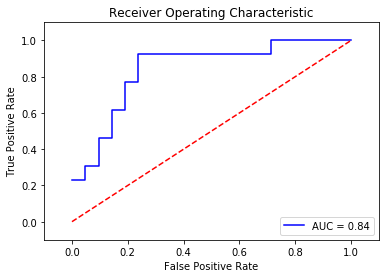

10  test  20050  acc=  0.8235294  loss =  0.5153915  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  20100  acc=  0.7941176  loss =  0.5142255  sen:  0.8461538461538461  spe:  0.7619047619047619
10  test  20150  acc=  0.7941176  loss =  0.51429605  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  20200  acc=  0.8235294  loss =  0.5083905  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  20250  acc=  0.7941176  loss =  0.5170047  sen:  0.8461538461538461  spe:  0.7619047619047619
10  test  20300  acc=  0.8235294  loss =  0.51035386  sen:  0.9230769230769231  spe:  0.7619047619047619
10  test  20350  acc=  0.7941176  loss =  0.5110955  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  20400  acc=  0.7941176  loss =  0.52236795  sen:  0.8461538461538461  spe:  0.7619047619047619
10  test  20450  acc=  0.7941176  loss =  0.51611835  sen:  0.8461538461538461  spe:  0.7619047619047619
10  test  20500  acc=  0.7941176  loss =  0.5185622  sen:  0

10  test  23950  acc=  0.8235294  loss =  0.5079803  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  24000  acc=  0.8235294  loss =  0.50770396  sen:  0.8461538461538461  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1]


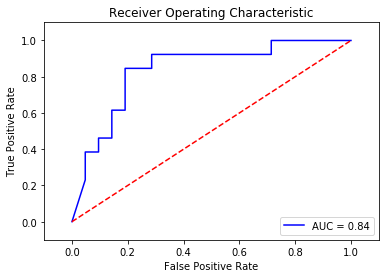

10  test  24050  acc=  0.7647059  loss =  0.5137162  sen:  0.7692307692307693  spe:  0.7619047619047619
10  test  24100  acc=  0.8235294  loss =  0.508656  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  24150  acc=  0.7941176  loss =  0.5104414  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  24200  acc=  0.7941176  loss =  0.51595736  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  24250  acc=  0.8235294  loss =  0.5073258  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  24300  acc=  0.8235294  loss =  0.50530875  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  24350  acc=  0.7941176  loss =  0.5084583  sen:  0.7692307692307693  spe:  0.8095238095238095
10  test  24400  acc=  0.8235294  loss =  0.5055583  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  24450  acc=  0.8235294  loss =  0.50446945  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  24500  acc=  0.8235294  loss =  0.50496787  sen:  0.

10  test  27950  acc=  0.7647059  loss =  0.506066  sen:  0.7692307692307693  spe:  0.7619047619047619
10  test  28000  acc=  0.8235294  loss =  0.5026281  sen:  0.8461538461538461  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1]


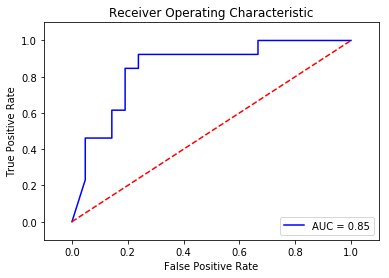

10  test  28050  acc=  0.8235294  loss =  0.5043208  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  28100  acc=  0.8235294  loss =  0.4996956  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  28150  acc=  0.8235294  loss =  0.5002489  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  28200  acc=  0.8235294  loss =  0.50701237  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  28250  acc=  0.8235294  loss =  0.5013236  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  28300  acc=  0.8235294  loss =  0.5043444  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  28350  acc=  0.8235294  loss =  0.50154763  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  28400  acc=  0.8235294  loss =  0.5033927  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  28450  acc=  0.8235294  loss =  0.50681496  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  28500  acc=  0.8235294  loss =  0.49954572  sen:  0

10  test  31950  acc=  0.8235294  loss =  0.5009148  sen:  0.9230769230769231  spe:  0.7619047619047619
10  test  32000  acc=  0.8235294  loss =  0.500175  sen:  0.8461538461538461  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1]


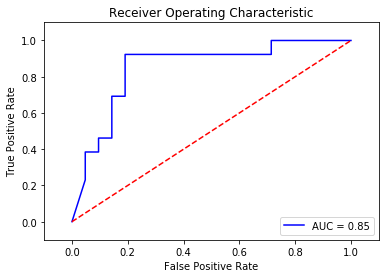

10  test  32050  acc=  0.8235294  loss =  0.5001155  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  32100  acc=  0.8235294  loss =  0.49731377  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  32150  acc=  0.8235294  loss =  0.5037748  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  32200  acc=  0.85294116  loss =  0.4988098  sen:  0.9230769230769231  spe:  0.8095238095238095
10  test  32250  acc=  0.8235294  loss =  0.5027182  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  32300  acc=  0.8235294  loss =  0.4978227  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  32350  acc=  0.8235294  loss =  0.49725175  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  32400  acc=  0.8235294  loss =  0.50179195  sen:  0.9230769230769231  spe:  0.7619047619047619
10  test  32450  acc=  0.8235294  loss =  0.50003004  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  32500  acc=  0.8235294  loss =  0.502868  sen:  0

10  test  35900  acc=  0.8235294  loss =  0.502233  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  35950  acc=  0.8235294  loss =  0.5074706  sen:  0.9230769230769231  spe:  0.7619047619047619
10  test  36000  acc=  0.8235294  loss =  0.49784884  sen:  0.9230769230769231  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


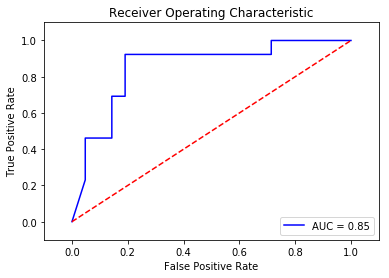

10  test  36050  acc=  0.8235294  loss =  0.49833903  sen:  0.9230769230769231  spe:  0.7619047619047619
10  test  36100  acc=  0.8235294  loss =  0.49344477  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  36150  acc=  0.85294116  loss =  0.49297428  sen:  0.9230769230769231  spe:  0.8095238095238095
10  test  36200  acc=  0.85294116  loss =  0.494552  sen:  0.9230769230769231  spe:  0.8095238095238095
10  test  36250  acc=  0.8235294  loss =  0.49747536  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  36300  acc=  0.8235294  loss =  0.49868926  sen:  0.9230769230769231  spe:  0.7619047619047619
10  test  36350  acc=  0.8235294  loss =  0.49570376  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  36400  acc=  0.8235294  loss =  0.4960422  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  36450  acc=  0.8235294  loss =  0.49759528  sen:  0.9230769230769231  spe:  0.7619047619047619
10  test  36500  acc=  0.7941176  loss =  0.49829927  se

10  test  39900  acc=  0.8235294  loss =  0.49651802  sen:  0.9230769230769231  spe:  0.7619047619047619
10  test  39950  acc=  0.8235294  loss =  0.49467868  sen:  0.8461538461538461  spe:  0.8095238095238095
10  test  40000  acc=  0.8235294  loss =  0.49526227  sen:  0.9230769230769231  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


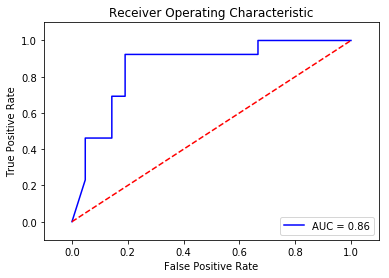

11  test  0  acc=  0.61764705  loss =  0.6963676  sen:  0.0  spe:  1.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


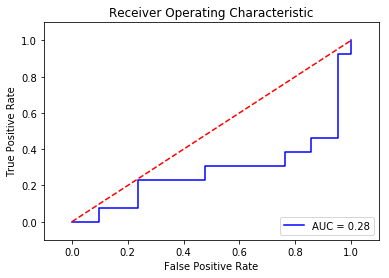

11  test  50  acc=  0.5882353  loss =  0.67806596  sen:  0.5384615384615384  spe:  0.6190476190476191
11  test  100  acc=  0.5588235  loss =  0.6747615  sen:  0.5384615384615384  spe:  0.5714285714285714
11  test  150  acc=  0.5882353  loss =  0.6684165  sen:  0.5384615384615384  spe:  0.6190476190476191
11  test  200  acc=  0.61764705  loss =  0.66631895  sen:  0.6153846153846154  spe:  0.6190476190476191
11  test  250  acc=  0.61764705  loss =  0.6668842  sen:  0.6923076923076923  spe:  0.5714285714285714
11  test  300  acc=  0.61764705  loss =  0.66093415  sen:  0.6923076923076923  spe:  0.5714285714285714
11  test  350  acc=  0.64705884  loss =  0.6574849  sen:  0.7692307692307693  spe:  0.5714285714285714
11  test  400  acc=  0.64705884  loss =  0.6504708  sen:  0.7692307692307693  spe:  0.5714285714285714
11  test  450  acc=  0.6764706  loss =  0.6501694  sen:  0.7692307692307693  spe:  0.6190476190476191
11  test  500  acc=  0.6764706  loss =  0.646925  sen:  0.7692307692307693 

11  test  4000  acc=  0.7058824  loss =  0.58266765  sen:  0.7692307692307693  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


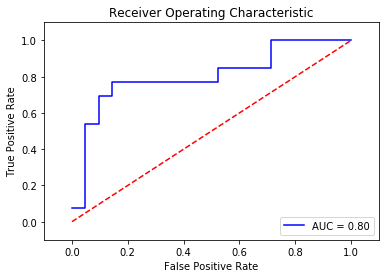

11  test  4050  acc=  0.7352941  loss =  0.5671779  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  4100  acc=  0.7058824  loss =  0.5780381  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  4150  acc=  0.7352941  loss =  0.5778064  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  4200  acc=  0.7058824  loss =  0.5863525  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  4250  acc=  0.7058824  loss =  0.5829428  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  4300  acc=  0.7058824  loss =  0.5740014  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  4350  acc=  0.7058824  loss =  0.58157855  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  4400  acc=  0.7058824  loss =  0.579484  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  4450  acc=  0.7058824  loss =  0.58222175  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  4500  acc=  0.7058824  loss =  0.5815312  sen:  0.769230769230

11  test  7950  acc=  0.7352941  loss =  0.56496274  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  8000  acc=  0.7058824  loss =  0.57541454  sen:  0.7692307692307693  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


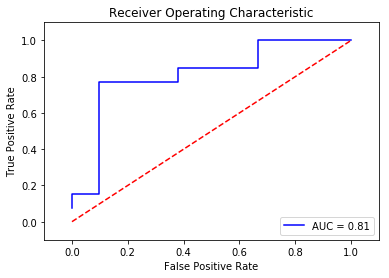

11  test  8050  acc=  0.6764706  loss =  0.5803301  sen:  0.7692307692307693  spe:  0.6190476190476191
11  test  8100  acc=  0.7058824  loss =  0.57472706  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  8150  acc=  0.6764706  loss =  0.581505  sen:  0.7692307692307693  spe:  0.6190476190476191
11  test  8200  acc=  0.7352941  loss =  0.57221985  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  8250  acc=  0.7352941  loss =  0.56655955  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  8300  acc=  0.7352941  loss =  0.56052464  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  8350  acc=  0.7352941  loss =  0.56330377  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  8400  acc=  0.7352941  loss =  0.5579925  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  8450  acc=  0.7352941  loss =  0.5649386  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  8500  acc=  0.7058824  loss =  0.57312655  sen:  0.76923076

11  test  11950  acc=  0.7058824  loss =  0.56534004  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  12000  acc=  0.7058824  loss =  0.5591136  sen:  0.7692307692307693  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


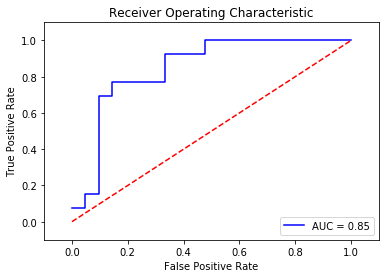

11  test  12050  acc=  0.7058824  loss =  0.5659735  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  12100  acc=  0.7058824  loss =  0.5615571  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  12150  acc=  0.7058824  loss =  0.5569393  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  12200  acc=  0.7058824  loss =  0.55972683  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  12250  acc=  0.7058824  loss =  0.5611469  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  12300  acc=  0.7058824  loss =  0.5621369  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  12350  acc=  0.7058824  loss =  0.56232595  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  12400  acc=  0.7058824  loss =  0.56279993  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  12450  acc=  0.7058824  loss =  0.56458426  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  12500  acc=  0.7058824  loss =  0.5645228  sen:  0

11  test  15950  acc=  0.7352941  loss =  0.56037015  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  16000  acc=  0.7352941  loss =  0.56170255  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


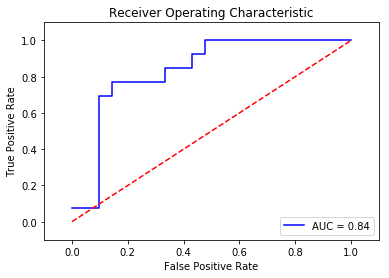

11  test  16050  acc=  0.7058824  loss =  0.5712852  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  16100  acc=  0.7352941  loss =  0.561536  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  16150  acc=  0.7352941  loss =  0.5629885  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  16200  acc=  0.7058824  loss =  0.5639075  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  16250  acc=  0.7058824  loss =  0.56755805  sen:  0.7692307692307693  spe:  0.6666666666666666
11  test  16300  acc=  0.7352941  loss =  0.5595682  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  16350  acc=  0.7352941  loss =  0.5614108  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  16400  acc=  0.7352941  loss =  0.55699366  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  16450  acc=  0.7352941  loss =  0.56340444  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  16500  acc=  0.7352941  loss =  0.5588603  sen:  0.7

11  test  19950  acc=  0.7352941  loss =  0.54591227  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  20000  acc=  0.7352941  loss =  0.54255956  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


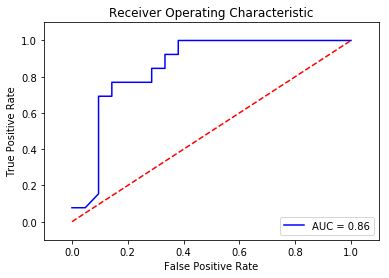

11  test  20050  acc=  0.7647059  loss =  0.55071133  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  20100  acc=  0.7352941  loss =  0.54338306  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  20150  acc=  0.7352941  loss =  0.5466258  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  20200  acc=  0.7352941  loss =  0.5459615  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  20250  acc=  0.7352941  loss =  0.5406741  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  20300  acc=  0.7352941  loss =  0.5405301  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  20350  acc=  0.7352941  loss =  0.53992283  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  20400  acc=  0.7352941  loss =  0.54749155  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  20450  acc=  0.7352941  loss =  0.54401577  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  20500  acc=  0.7352941  loss =  0.54845464  sen: 

11  test  23950  acc=  0.7352941  loss =  0.5451121  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  24000  acc=  0.7647059  loss =  0.5419252  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


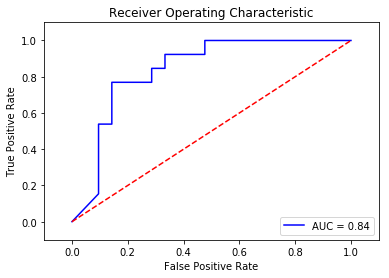

11  test  24050  acc=  0.7352941  loss =  0.545271  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  24100  acc=  0.7647059  loss =  0.5461651  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  24150  acc=  0.7647059  loss =  0.5387652  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  24200  acc=  0.7647059  loss =  0.54065067  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  24250  acc=  0.7647059  loss =  0.54216146  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  24300  acc=  0.7647059  loss =  0.54516155  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  24350  acc=  0.7647059  loss =  0.5396666  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  24400  acc=  0.7647059  loss =  0.5388303  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  24450  acc=  0.7647059  loss =  0.54393286  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  24500  acc=  0.7647059  loss =  0.5439654  sen:  0.

11  test  27950  acc=  0.7352941  loss =  0.5420641  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  28000  acc=  0.7647059  loss =  0.54015  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


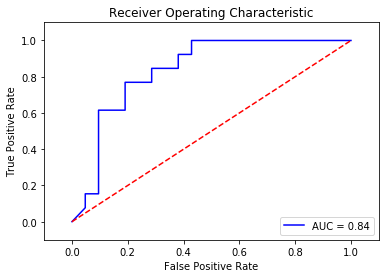

11  test  28050  acc=  0.7647059  loss =  0.5380585  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  28100  acc=  0.7647059  loss =  0.5405444  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  28150  acc=  0.7647059  loss =  0.5379635  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  28200  acc=  0.7647059  loss =  0.5406426  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  28250  acc=  0.7647059  loss =  0.54074246  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  28300  acc=  0.7647059  loss =  0.539375  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  28350  acc=  0.7647059  loss =  0.5394271  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  28400  acc=  0.7352941  loss =  0.5397622  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  28450  acc=  0.7647059  loss =  0.5405808  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  28500  acc=  0.7352941  loss =  0.538177  sen:  0.7692

11  test  31950  acc=  0.7647059  loss =  0.53810847  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  32000  acc=  0.7647059  loss =  0.5405932  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


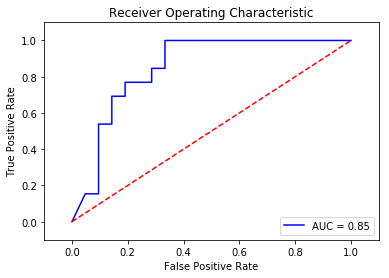

11  test  32050  acc=  0.7647059  loss =  0.536614  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  32100  acc=  0.7647059  loss =  0.5376473  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  32150  acc=  0.7647059  loss =  0.53844017  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  32200  acc=  0.7647059  loss =  0.5372202  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  32250  acc=  0.7647059  loss =  0.53893536  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  32300  acc=  0.7647059  loss =  0.5406703  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  32350  acc=  0.7647059  loss =  0.5378515  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  32400  acc=  0.7647059  loss =  0.5418768  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  32450  acc=  0.7647059  loss =  0.5412435  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  32500  acc=  0.7647059  loss =  0.5371072  sen:  0.76

11  test  35950  acc=  0.7647059  loss =  0.5393939  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  36000  acc=  0.7647059  loss =  0.54020333  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


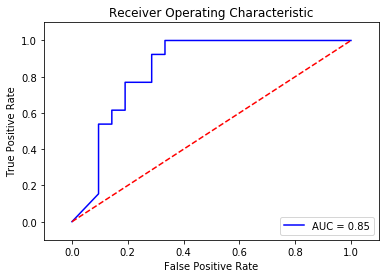

11  test  36050  acc=  0.7647059  loss =  0.5390071  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  36100  acc=  0.7647059  loss =  0.5402094  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  36150  acc=  0.7647059  loss =  0.5286141  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  36200  acc=  0.7647059  loss =  0.5358758  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  36250  acc=  0.7647059  loss =  0.53584343  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  36300  acc=  0.7647059  loss =  0.5391084  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  36350  acc=  0.7647059  loss =  0.5399927  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  36400  acc=  0.7647059  loss =  0.5374486  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  36450  acc=  0.7647059  loss =  0.5379756  sen:  0.7692307692307693  spe:  0.7619047619047619
11  test  36500  acc=  0.7647059  loss =  0.5407601  sen:  0.76

11  test  39950  acc=  0.7352941  loss =  0.53786737  sen:  0.7692307692307693  spe:  0.7142857142857143
11  test  40000  acc=  0.7647059  loss =  0.53226954  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


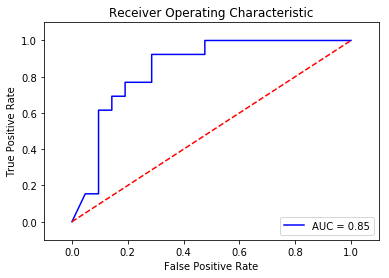

12  test  0  acc=  0.5  loss =  0.69486856  sen:  0.46153846153846156  spe:  0.5238095238095238
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1]


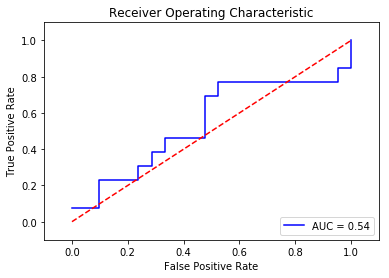

12  test  50  acc=  0.5882353  loss =  0.6742434  sen:  0.7692307692307693  spe:  0.47619047619047616
12  test  100  acc=  0.6764706  loss =  0.662126  sen:  0.6923076923076923  spe:  0.6666666666666666
12  test  150  acc=  0.6764706  loss =  0.6547315  sen:  0.6923076923076923  spe:  0.6666666666666666
12  test  200  acc=  0.6764706  loss =  0.64814925  sen:  0.6923076923076923  spe:  0.6666666666666666
12  test  250  acc=  0.6764706  loss =  0.6507361  sen:  0.6923076923076923  spe:  0.6666666666666666
12  test  300  acc=  0.7058824  loss =  0.64782584  sen:  0.6923076923076923  spe:  0.7142857142857143
12  test  350  acc=  0.61764705  loss =  0.65383714  sen:  0.7692307692307693  spe:  0.5238095238095238
12  test  400  acc=  0.6764706  loss =  0.64779526  sen:  0.6923076923076923  spe:  0.6666666666666666
12  test  450  acc=  0.64705884  loss =  0.6535223  sen:  0.6923076923076923  spe:  0.6190476190476191
12  test  500  acc=  0.61764705  loss =  0.6510333  sen:  0.7692307692307693 

12  test  4000  acc=  0.7941176  loss =  0.53625643  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


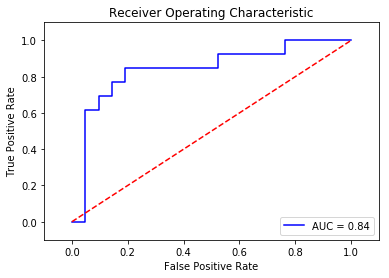

12  test  4050  acc=  0.7941176  loss =  0.5286408  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  4100  acc=  0.7941176  loss =  0.5420146  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  4150  acc=  0.7941176  loss =  0.54456836  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  4200  acc=  0.7941176  loss =  0.5409746  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  4250  acc=  0.7941176  loss =  0.5414553  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  4300  acc=  0.7941176  loss =  0.53529227  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  4350  acc=  0.7941176  loss =  0.53398335  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  4400  acc=  0.7941176  loss =  0.5416657  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  4450  acc=  0.7941176  loss =  0.5385717  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  4500  acc=  0.7941176  loss =  0.5382866  sen:  0.8461538461

12  test  7950  acc=  0.7058824  loss =  0.54227823  sen:  0.7692307692307693  spe:  0.6666666666666666
12  test  8000  acc=  0.7352941  loss =  0.53767383  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


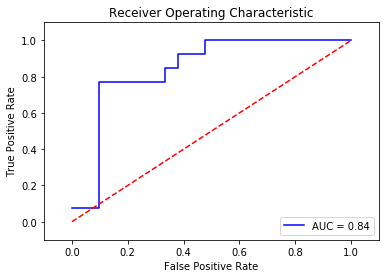

12  test  8050  acc=  0.7352941  loss =  0.5381073  sen:  0.7692307692307693  spe:  0.7142857142857143
12  test  8100  acc=  0.7647059  loss =  0.5261891  sen:  0.7692307692307693  spe:  0.7619047619047619
12  test  8150  acc=  0.7647059  loss =  0.52687  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  8200  acc=  0.7352941  loss =  0.537733  sen:  0.8461538461538461  spe:  0.6666666666666666
12  test  8250  acc=  0.7647059  loss =  0.5309543  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  8300  acc=  0.7352941  loss =  0.52886534  sen:  0.7692307692307693  spe:  0.7142857142857143
12  test  8350  acc=  0.7352941  loss =  0.53852046  sen:  0.8461538461538461  spe:  0.6666666666666666
12  test  8400  acc=  0.7352941  loss =  0.5334643  sen:  0.7692307692307693  spe:  0.7142857142857143
12  test  8450  acc=  0.7352941  loss =  0.53238726  sen:  0.7692307692307693  spe:  0.7142857142857143
12  test  8500  acc=  0.7352941  loss =  0.5456193  sen:  0.8461538461538

12  test  11950  acc=  0.7352941  loss =  0.5365852  sen:  0.8461538461538461  spe:  0.6666666666666666
12  test  12000  acc=  0.7352941  loss =  0.5255964  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


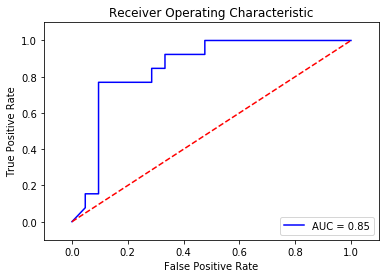

12  test  12050  acc=  0.7352941  loss =  0.5312088  sen:  0.8461538461538461  spe:  0.6666666666666666
12  test  12100  acc=  0.7352941  loss =  0.52676535  sen:  0.8461538461538461  spe:  0.6666666666666666
12  test  12150  acc=  0.7352941  loss =  0.5412088  sen:  0.8461538461538461  spe:  0.6666666666666666
12  test  12200  acc=  0.7352941  loss =  0.5362026  sen:  0.8461538461538461  spe:  0.6666666666666666
12  test  12250  acc=  0.7352941  loss =  0.53478503  sen:  0.8461538461538461  spe:  0.6666666666666666
12  test  12300  acc=  0.7058824  loss =  0.5406041  sen:  0.7692307692307693  spe:  0.6666666666666666
12  test  12350  acc=  0.7647059  loss =  0.5259182  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  12400  acc=  0.7352941  loss =  0.5315752  sen:  0.8461538461538461  spe:  0.6666666666666666
12  test  12450  acc=  0.7352941  loss =  0.53226066  sen:  0.8461538461538461  spe:  0.6666666666666666
12  test  12500  acc=  0.7352941  loss =  0.5422994  sen:  0.

12  test  15950  acc=  0.7941176  loss =  0.522951  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  16000  acc=  0.7941176  loss =  0.5241462  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


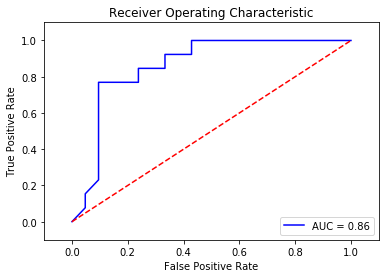

12  test  16050  acc=  0.7352941  loss =  0.5352492  sen:  0.8461538461538461  spe:  0.6666666666666666
12  test  16100  acc=  0.6764706  loss =  0.5357851  sen:  0.7692307692307693  spe:  0.6190476190476191
12  test  16150  acc=  0.7352941  loss =  0.52535516  sen:  0.8461538461538461  spe:  0.6666666666666666
12  test  16200  acc=  0.7352941  loss =  0.52794886  sen:  0.8461538461538461  spe:  0.6666666666666666
12  test  16250  acc=  0.7352941  loss =  0.5249042  sen:  0.8461538461538461  spe:  0.6666666666666666
12  test  16300  acc=  0.8235294  loss =  0.5159709  sen:  0.8461538461538461  spe:  0.8095238095238095
12  test  16350  acc=  0.7941176  loss =  0.5235047  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  16400  acc=  0.7352941  loss =  0.531711  sen:  0.8461538461538461  spe:  0.6666666666666666
12  test  16450  acc=  0.7352941  loss =  0.52650195  sen:  0.8461538461538461  spe:  0.6666666666666666
12  test  16500  acc=  0.7647059  loss =  0.5195229  sen:  0.8

12  test  19950  acc=  0.7941176  loss =  0.53182656  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  20000  acc=  0.7647059  loss =  0.5175749  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


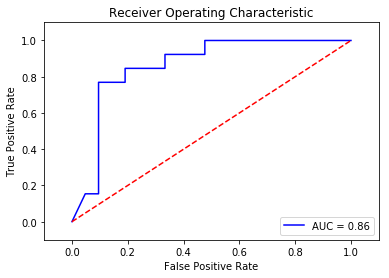

12  test  20050  acc=  0.7647059  loss =  0.5236491  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  20100  acc=  0.7647059  loss =  0.52238417  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  20150  acc=  0.7647059  loss =  0.52347314  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  20200  acc=  0.7941176  loss =  0.51920676  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  20250  acc=  0.7941176  loss =  0.5272022  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  20300  acc=  0.7647059  loss =  0.5329257  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  20350  acc=  0.7941176  loss =  0.51096034  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  20400  acc=  0.7941176  loss =  0.52811307  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  20450  acc=  0.7647059  loss =  0.52426994  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  20500  acc=  0.7941176  loss =  0.5239669  sen: 

12  test  23950  acc=  0.7647059  loss =  0.52265847  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  24000  acc=  0.7647059  loss =  0.51518834  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


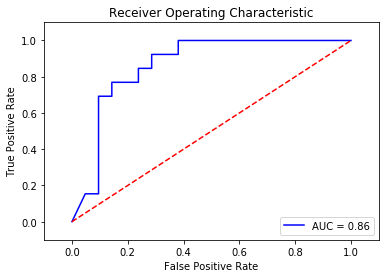

12  test  24050  acc=  0.7647059  loss =  0.52662694  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  24100  acc=  0.7647059  loss =  0.519002  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  24150  acc=  0.7647059  loss =  0.535094  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  24200  acc=  0.7647059  loss =  0.52633786  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  24250  acc=  0.7941176  loss =  0.51172537  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  24300  acc=  0.7647059  loss =  0.5228702  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  24350  acc=  0.7647059  loss =  0.5260341  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  24400  acc=  0.7647059  loss =  0.52769506  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  24450  acc=  0.7647059  loss =  0.5178566  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  24500  acc=  0.7647059  loss =  0.5218712  sen:  0.8

12  test  27950  acc=  0.7647059  loss =  0.5269279  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  28000  acc=  0.7647059  loss =  0.5265963  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


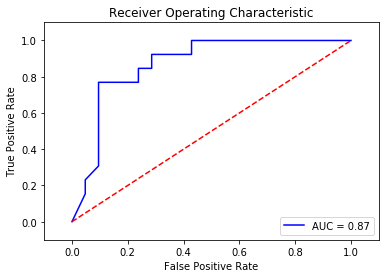

12  test  28050  acc=  0.7647059  loss =  0.5320414  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  28100  acc=  0.7647059  loss =  0.5178358  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  28150  acc=  0.7647059  loss =  0.522428  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  28200  acc=  0.7647059  loss =  0.5236638  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  28250  acc=  0.7647059  loss =  0.5213759  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  28300  acc=  0.7647059  loss =  0.523686  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  28350  acc=  0.7647059  loss =  0.5236553  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  28400  acc=  0.7647059  loss =  0.522854  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  28450  acc=  0.7941176  loss =  0.52744126  sen:  0.8461538461538461  spe:  0.7619047619047619
12  test  28500  acc=  0.7941176  loss =  0.5217497  sen:  0.84615

12  test  31950  acc=  0.7647059  loss =  0.5241072  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  32000  acc=  0.7647059  loss =  0.52542126  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


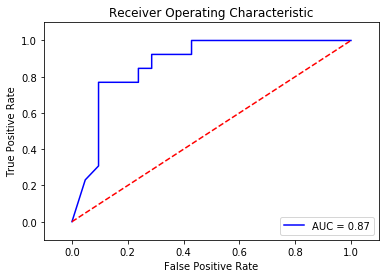

12  test  32050  acc=  0.7647059  loss =  0.5351946  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  32100  acc=  0.7647059  loss =  0.52872974  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  32150  acc=  0.7647059  loss =  0.5258278  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  32200  acc=  0.7647059  loss =  0.52491677  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  32250  acc=  0.7647059  loss =  0.531507  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  32300  acc=  0.7647059  loss =  0.53111076  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  32350  acc=  0.7647059  loss =  0.5283583  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  32400  acc=  0.7647059  loss =  0.528437  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  32450  acc=  0.7647059  loss =  0.52714425  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  32500  acc=  0.7647059  loss =  0.5254624  sen:  0.8

12  test  35950  acc=  0.7647059  loss =  0.53352773  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  36000  acc=  0.7647059  loss =  0.52933127  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


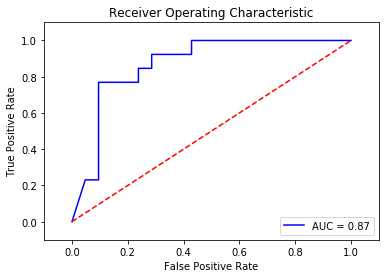

12  test  36050  acc=  0.7647059  loss =  0.5296437  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  36100  acc=  0.7647059  loss =  0.5313369  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  36150  acc=  0.7647059  loss =  0.528201  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  36200  acc=  0.7647059  loss =  0.5280757  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  36250  acc=  0.7647059  loss =  0.53150254  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  36300  acc=  0.7647059  loss =  0.52325577  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  36350  acc=  0.7647059  loss =  0.5273627  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  36400  acc=  0.7647059  loss =  0.52353626  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  36450  acc=  0.7647059  loss =  0.5364557  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  36500  acc=  0.7647059  loss =  0.53895366  sen:  0.

12  test  39950  acc=  0.7647059  loss =  0.52312315  sen:  0.8461538461538461  spe:  0.7142857142857143
12  test  40000  acc=  0.7647059  loss =  0.5188872  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


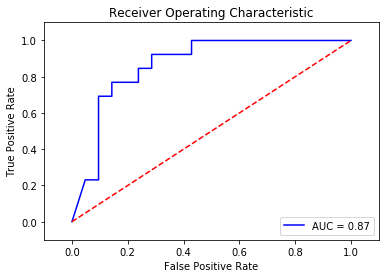

13  test  0  acc=  0.5588235  loss =  0.6809072  sen:  0.3076923076923077  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0]


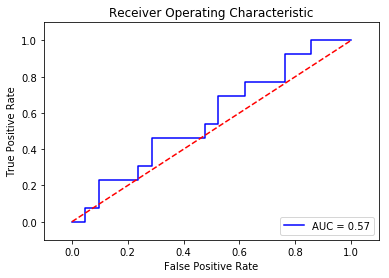

13  test  50  acc=  0.5882353  loss =  0.6702497  sen:  0.46153846153846156  spe:  0.6666666666666666
13  test  100  acc=  0.64705884  loss =  0.6564891  sen:  0.46153846153846156  spe:  0.7619047619047619
13  test  150  acc=  0.64705884  loss =  0.653674  sen:  0.5384615384615384  spe:  0.7142857142857143
13  test  200  acc=  0.64705884  loss =  0.64493304  sen:  0.5384615384615384  spe:  0.7142857142857143
13  test  250  acc=  0.64705884  loss =  0.6409523  sen:  0.5384615384615384  spe:  0.7142857142857143
13  test  300  acc=  0.64705884  loss =  0.63970643  sen:  0.6923076923076923  spe:  0.6190476190476191
13  test  350  acc=  0.61764705  loss =  0.6323685  sen:  0.5384615384615384  spe:  0.6666666666666666
13  test  400  acc=  0.7058824  loss =  0.62842435  sen:  0.6923076923076923  spe:  0.7142857142857143
13  test  450  acc=  0.6764706  loss =  0.6247856  sen:  0.6923076923076923  spe:  0.6666666666666666
13  test  500  acc=  0.7058824  loss =  0.6203207  sen:  0.69230769230769

13  test  4000  acc=  0.7647059  loss =  0.5224393  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


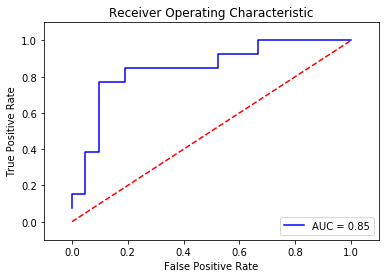

13  test  4050  acc=  0.7941176  loss =  0.5189148  sen:  0.8461538461538461  spe:  0.7619047619047619
13  test  4100  acc=  0.8235294  loss =  0.5131743  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  4150  acc=  0.7941176  loss =  0.52140427  sen:  0.8461538461538461  spe:  0.7619047619047619
13  test  4200  acc=  0.8235294  loss =  0.5106593  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  4250  acc=  0.7647059  loss =  0.5221304  sen:  0.8461538461538461  spe:  0.7142857142857143
13  test  4300  acc=  0.7941176  loss =  0.5192373  sen:  0.8461538461538461  spe:  0.7619047619047619
13  test  4350  acc=  0.7647059  loss =  0.52559197  sen:  0.8461538461538461  spe:  0.7142857142857143
13  test  4400  acc=  0.8235294  loss =  0.5190105  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  4450  acc=  0.8235294  loss =  0.51460695  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  4500  acc=  0.7647059  loss =  0.51969707  sen:  0.846153846

13  test  7950  acc=  0.8235294  loss =  0.5042859  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  8000  acc=  0.8235294  loss =  0.49901003  sen:  0.8461538461538461  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


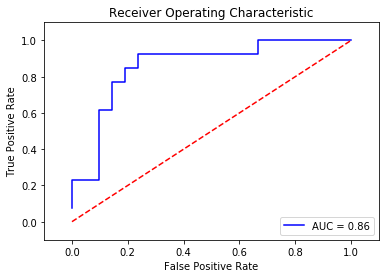

13  test  8050  acc=  0.8235294  loss =  0.49875814  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  8100  acc=  0.8235294  loss =  0.5058749  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  8150  acc=  0.8235294  loss =  0.5045343  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  8200  acc=  0.8235294  loss =  0.50433326  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  8250  acc=  0.8235294  loss =  0.5069492  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  8300  acc=  0.8235294  loss =  0.49679998  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  8350  acc=  0.8235294  loss =  0.5020868  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  8400  acc=  0.8235294  loss =  0.50015295  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  8450  acc=  0.8235294  loss =  0.4972219  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  8500  acc=  0.8235294  loss =  0.50117725  sen:  0.84615384

13  test  11950  acc=  0.8235294  loss =  0.5117629  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  12000  acc=  0.8235294  loss =  0.509689  sen:  0.8461538461538461  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


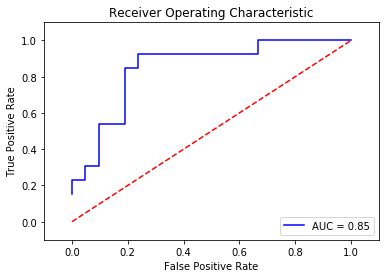

13  test  12050  acc=  0.7941176  loss =  0.52266634  sen:  0.8461538461538461  spe:  0.7619047619047619
13  test  12100  acc=  0.8235294  loss =  0.5041555  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  12150  acc=  0.7941176  loss =  0.5125938  sen:  0.7692307692307693  spe:  0.8095238095238095
13  test  12200  acc=  0.7941176  loss =  0.51140285  sen:  0.8461538461538461  spe:  0.7619047619047619
13  test  12250  acc=  0.7941176  loss =  0.5146066  sen:  0.8461538461538461  spe:  0.7619047619047619
13  test  12300  acc=  0.8235294  loss =  0.5097653  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  12350  acc=  0.7941176  loss =  0.5120329  sen:  0.8461538461538461  spe:  0.7619047619047619
13  test  12400  acc=  0.7941176  loss =  0.51140356  sen:  0.8461538461538461  spe:  0.7619047619047619
13  test  12450  acc=  0.8235294  loss =  0.50935686  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  12500  acc=  0.8235294  loss =  0.5113602  sen:  0

13  test  15950  acc=  0.7941176  loss =  0.5106511  sen:  0.8461538461538461  spe:  0.7619047619047619
13  test  16000  acc=  0.8235294  loss =  0.5087922  sen:  0.8461538461538461  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


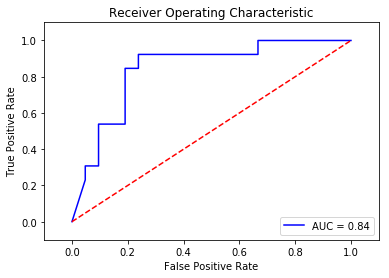

13  test  16050  acc=  0.7941176  loss =  0.5110256  sen:  0.8461538461538461  spe:  0.7619047619047619
13  test  16100  acc=  0.7941176  loss =  0.5146424  sen:  0.8461538461538461  spe:  0.7619047619047619
13  test  16150  acc=  0.8235294  loss =  0.5110595  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  16200  acc=  0.8235294  loss =  0.50234586  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  16250  acc=  0.8235294  loss =  0.50401783  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  16300  acc=  0.8235294  loss =  0.504714  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  16350  acc=  0.8235294  loss =  0.5074233  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  16400  acc=  0.8235294  loss =  0.5099861  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  16450  acc=  0.8235294  loss =  0.5059232  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  16500  acc=  0.8235294  loss =  0.5102498  sen:  0.84

13  test  19950  acc=  0.8235294  loss =  0.50875914  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  20000  acc=  0.8235294  loss =  0.505342  sen:  0.8461538461538461  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


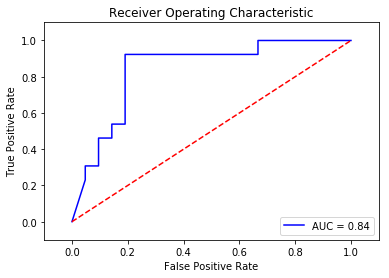

13  test  20050  acc=  0.8235294  loss =  0.50423265  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  20100  acc=  0.8235294  loss =  0.50326216  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  20150  acc=  0.8235294  loss =  0.5025982  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  20200  acc=  0.8235294  loss =  0.502047  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  20250  acc=  0.8235294  loss =  0.50459826  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  20300  acc=  0.8235294  loss =  0.5011363  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  20350  acc=  0.8235294  loss =  0.50201446  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  20400  acc=  0.8235294  loss =  0.5029822  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  20450  acc=  0.8235294  loss =  0.49976045  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  20500  acc=  0.8235294  loss =  0.50375104  sen:  

13  test  23950  acc=  0.8235294  loss =  0.50390905  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  24000  acc=  0.8235294  loss =  0.5023598  sen:  0.8461538461538461  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


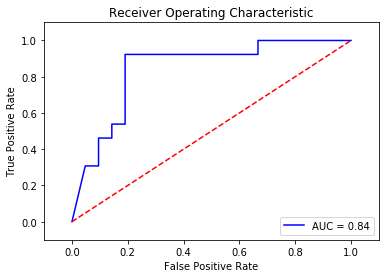

13  test  24050  acc=  0.8235294  loss =  0.50237644  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  24100  acc=  0.8235294  loss =  0.50507927  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  24150  acc=  0.8235294  loss =  0.5062399  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  24200  acc=  0.8235294  loss =  0.50179756  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  24250  acc=  0.8235294  loss =  0.5039099  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  24300  acc=  0.8235294  loss =  0.50336415  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  24350  acc=  0.8235294  loss =  0.5042242  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  24400  acc=  0.8235294  loss =  0.50040084  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  24450  acc=  0.8235294  loss =  0.5029344  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  24500  acc=  0.8235294  loss =  0.5063677  sen:  

13  test  27950  acc=  0.8235294  loss =  0.50476  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  28000  acc=  0.8235294  loss =  0.50843954  sen:  0.8461538461538461  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


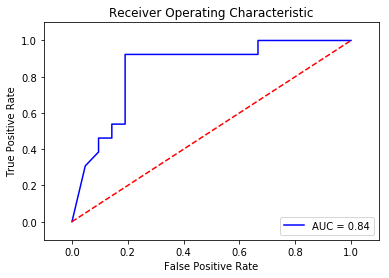

13  test  28050  acc=  0.7941176  loss =  0.5067918  sen:  0.7692307692307693  spe:  0.8095238095238095
13  test  28100  acc=  0.7941176  loss =  0.50667036  sen:  0.7692307692307693  spe:  0.8095238095238095
13  test  28150  acc=  0.7941176  loss =  0.5076843  sen:  0.7692307692307693  spe:  0.8095238095238095
13  test  28200  acc=  0.8235294  loss =  0.50969625  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  28250  acc=  0.8235294  loss =  0.5091017  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  28300  acc=  0.8235294  loss =  0.4991223  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  28350  acc=  0.8235294  loss =  0.5044604  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  28400  acc=  0.8235294  loss =  0.5039095  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  28450  acc=  0.8235294  loss =  0.4977878  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  28500  acc=  0.8235294  loss =  0.50152755  sen:  0.

13  test  31950  acc=  0.8235294  loss =  0.5077473  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  32000  acc=  0.8235294  loss =  0.5038846  sen:  0.8461538461538461  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


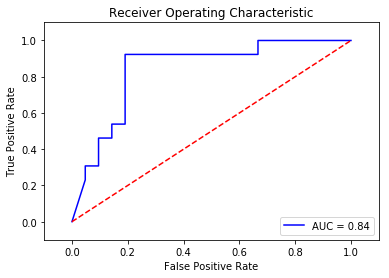

13  test  32050  acc=  0.8235294  loss =  0.50330293  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  32100  acc=  0.8235294  loss =  0.5051522  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  32150  acc=  0.8235294  loss =  0.5049434  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  32200  acc=  0.8235294  loss =  0.50463355  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  32250  acc=  0.8235294  loss =  0.5089854  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  32300  acc=  0.8235294  loss =  0.50522363  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  32350  acc=  0.8235294  loss =  0.5074509  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  32400  acc=  0.8235294  loss =  0.5115019  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  32450  acc=  0.8235294  loss =  0.5151603  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  32500  acc=  0.8235294  loss =  0.50716555  sen:  0

13  test  35950  acc=  0.8235294  loss =  0.5129158  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  36000  acc=  0.7941176  loss =  0.5118693  sen:  0.7692307692307693  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1]


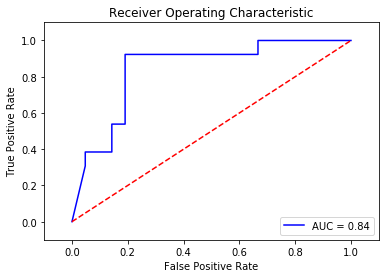

13  test  36050  acc=  0.7941176  loss =  0.5096452  sen:  0.7692307692307693  spe:  0.8095238095238095
13  test  36100  acc=  0.7941176  loss =  0.5084639  sen:  0.7692307692307693  spe:  0.8095238095238095
13  test  36150  acc=  0.7941176  loss =  0.50856227  sen:  0.7692307692307693  spe:  0.8095238095238095
13  test  36200  acc=  0.7941176  loss =  0.5082584  sen:  0.7692307692307693  spe:  0.8095238095238095
13  test  36250  acc=  0.7941176  loss =  0.5109981  sen:  0.7692307692307693  spe:  0.8095238095238095
13  test  36300  acc=  0.8235294  loss =  0.5124529  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  36350  acc=  0.8235294  loss =  0.50225174  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  36400  acc=  0.8235294  loss =  0.50232005  sen:  0.8461538461538461  spe:  0.8095238095238095
13  test  36450  acc=  0.7941176  loss =  0.5028516  sen:  0.7692307692307693  spe:  0.8095238095238095
13  test  36500  acc=  0.8235294  loss =  0.5034469  sen:  0.

13  test  39950  acc=  0.7941176  loss =  0.51500654  sen:  0.7692307692307693  spe:  0.8095238095238095
13  test  40000  acc=  0.8235294  loss =  0.50782794  sen:  0.8461538461538461  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


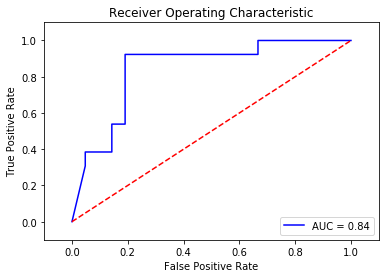

14  test  0  acc=  0.64705884  loss =  0.66529655  sen:  0.6153846153846154  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1]


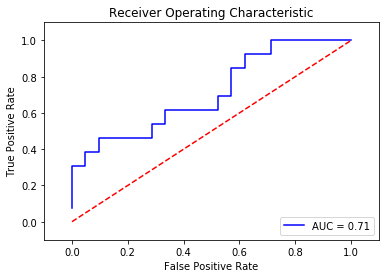

14  test  50  acc=  0.61764705  loss =  0.66632706  sen:  0.7692307692307693  spe:  0.5238095238095238
14  test  100  acc=  0.61764705  loss =  0.6502066  sen:  0.6153846153846154  spe:  0.6190476190476191
14  test  150  acc=  0.61764705  loss =  0.655378  sen:  0.7692307692307693  spe:  0.5238095238095238
14  test  200  acc=  0.61764705  loss =  0.6572183  sen:  0.7692307692307693  spe:  0.5238095238095238
14  test  250  acc=  0.61764705  loss =  0.65673804  sen:  0.7692307692307693  spe:  0.5238095238095238
14  test  300  acc=  0.61764705  loss =  0.6498889  sen:  0.7692307692307693  spe:  0.5238095238095238
14  test  350  acc=  0.61764705  loss =  0.6467757  sen:  0.7692307692307693  spe:  0.5238095238095238
14  test  400  acc=  0.7058824  loss =  0.63801926  sen:  0.7692307692307693  spe:  0.6666666666666666
14  test  450  acc=  0.7352941  loss =  0.6350122  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  500  acc=  0.7058824  loss =  0.63662493  sen:  0.76923076923076

14  test  4000  acc=  0.7647059  loss =  0.56000817  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


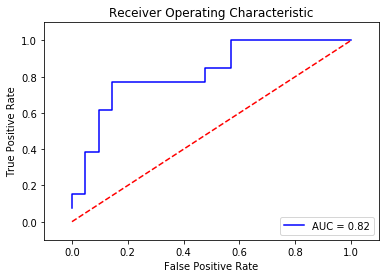

14  test  4050  acc=  0.7647059  loss =  0.5533968  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  4100  acc=  0.7352941  loss =  0.5551891  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  4150  acc=  0.7352941  loss =  0.552147  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  4200  acc=  0.7352941  loss =  0.55610925  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  4250  acc=  0.7647059  loss =  0.56160635  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  4300  acc=  0.7647059  loss =  0.55261517  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  4350  acc=  0.7647059  loss =  0.55064803  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  4400  acc=  0.7647059  loss =  0.55098355  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  4450  acc=  0.7647059  loss =  0.54744405  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  4500  acc=  0.7647059  loss =  0.5499629  sen:  0.76923076

14  test  7950  acc=  0.7352941  loss =  0.54997337  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  8000  acc=  0.7352941  loss =  0.55438256  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


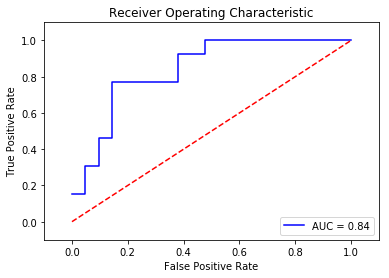

14  test  8050  acc=  0.7058824  loss =  0.55301476  sen:  0.7692307692307693  spe:  0.6666666666666666
14  test  8100  acc=  0.7352941  loss =  0.5446992  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  8150  acc=  0.7352941  loss =  0.5515356  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  8200  acc=  0.7647059  loss =  0.5502669  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  8250  acc=  0.7352941  loss =  0.5447865  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  8300  acc=  0.7352941  loss =  0.5494018  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  8350  acc=  0.7647059  loss =  0.5455892  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  8400  acc=  0.7352941  loss =  0.5463521  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  8450  acc=  0.7352941  loss =  0.54574525  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  8500  acc=  0.7352941  loss =  0.552413  sen:  0.769230769230

14  test  11950  acc=  0.7647059  loss =  0.5536742  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  12000  acc=  0.7647059  loss =  0.55004835  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


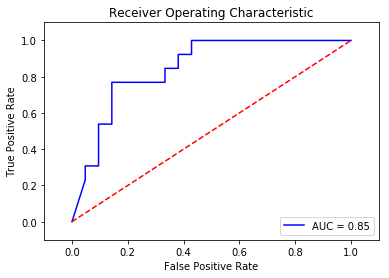

14  test  12050  acc=  0.7647059  loss =  0.54721165  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  12100  acc=  0.7647059  loss =  0.5478238  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  12150  acc=  0.7647059  loss =  0.54516965  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  12200  acc=  0.7352941  loss =  0.54411805  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  12250  acc=  0.7647059  loss =  0.5518321  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  12300  acc=  0.7647059  loss =  0.5478385  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  12350  acc=  0.7647059  loss =  0.54879075  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  12400  acc=  0.7647059  loss =  0.54203343  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  12450  acc=  0.7647059  loss =  0.54829055  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  12500  acc=  0.7647059  loss =  0.55271167  sen:

14  test  15950  acc=  0.7647059  loss =  0.5474586  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  16000  acc=  0.7647059  loss =  0.54911035  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


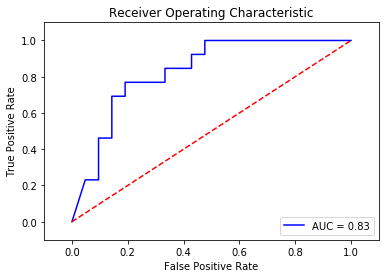

14  test  16050  acc=  0.7352941  loss =  0.5499258  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  16100  acc=  0.7058824  loss =  0.55458397  sen:  0.7692307692307693  spe:  0.6666666666666666
14  test  16150  acc=  0.7058824  loss =  0.55332136  sen:  0.7692307692307693  spe:  0.6666666666666666
14  test  16200  acc=  0.7647059  loss =  0.54502463  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  16250  acc=  0.7647059  loss =  0.5487946  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  16300  acc=  0.7352941  loss =  0.55300504  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  16350  acc=  0.7941176  loss =  0.5341152  sen:  0.7692307692307693  spe:  0.8095238095238095
14  test  16400  acc=  0.7647059  loss =  0.53970385  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  16450  acc=  0.7647059  loss =  0.5475668  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  16500  acc=  0.7647059  loss =  0.5362649  sen:  

14  test  19950  acc=  0.7647059  loss =  0.54908985  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  20000  acc=  0.7647059  loss =  0.54328203  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


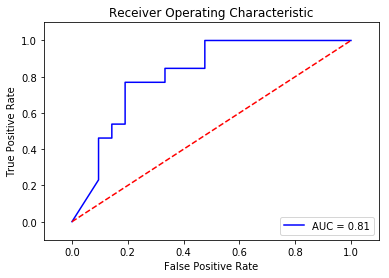

14  test  20050  acc=  0.7647059  loss =  0.54778975  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  20100  acc=  0.7647059  loss =  0.547037  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  20150  acc=  0.7647059  loss =  0.5480172  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  20200  acc=  0.7647059  loss =  0.5340048  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  20250  acc=  0.7647059  loss =  0.54877675  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  20300  acc=  0.7647059  loss =  0.54315436  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  20350  acc=  0.7647059  loss =  0.53385115  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  20400  acc=  0.7647059  loss =  0.5441173  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  20450  acc=  0.7647059  loss =  0.5438647  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  20500  acc=  0.7647059  loss =  0.5503976  sen:  0.

14  test  23950  acc=  0.7647059  loss =  0.5396897  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  24000  acc=  0.7647059  loss =  0.5409972  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


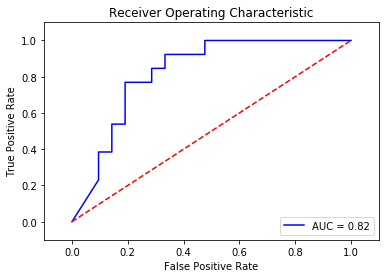

14  test  24050  acc=  0.7647059  loss =  0.55146366  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  24100  acc=  0.7647059  loss =  0.545238  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  24150  acc=  0.7647059  loss =  0.54853123  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  24200  acc=  0.7647059  loss =  0.54808164  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  24250  acc=  0.7647059  loss =  0.5487221  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  24300  acc=  0.7647059  loss =  0.5400771  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  24350  acc=  0.7647059  loss =  0.55269116  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  24400  acc=  0.7647059  loss =  0.54723203  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  24450  acc=  0.7647059  loss =  0.5512123  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  24500  acc=  0.7647059  loss =  0.5498814  sen:  0

14  test  27950  acc=  0.7647059  loss =  0.5562857  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  28000  acc=  0.7647059  loss =  0.55830663  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


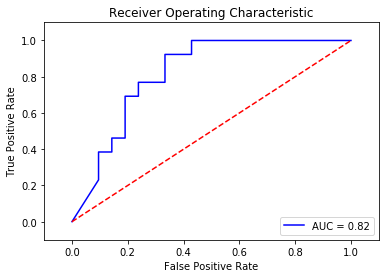

14  test  28050  acc=  0.7647059  loss =  0.5457691  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  28100  acc=  0.7647059  loss =  0.5469749  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  28150  acc=  0.7647059  loss =  0.5462392  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  28200  acc=  0.7647059  loss =  0.5487528  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  28250  acc=  0.7647059  loss =  0.5435103  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  28300  acc=  0.7647059  loss =  0.5420116  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  28350  acc=  0.7647059  loss =  0.54803705  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  28400  acc=  0.7647059  loss =  0.53762144  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  28450  acc=  0.7352941  loss =  0.5709424  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  28500  acc=  0.7647059  loss =  0.5471385  sen:  0.7

14  test  31950  acc=  0.7647059  loss =  0.5482924  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  32000  acc=  0.7647059  loss =  0.54707766  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


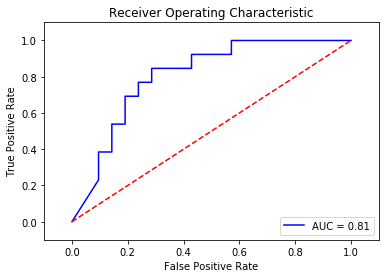

14  test  32050  acc=  0.7647059  loss =  0.55192566  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  32100  acc=  0.7352941  loss =  0.5642847  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  32150  acc=  0.7647059  loss =  0.54769164  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  32200  acc=  0.7647059  loss =  0.5456725  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  32250  acc=  0.7647059  loss =  0.54438597  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  32300  acc=  0.7352941  loss =  0.5488088  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  32350  acc=  0.7647059  loss =  0.54870814  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  32400  acc=  0.7647059  loss =  0.54536176  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  32450  acc=  0.7352941  loss =  0.557032  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  32500  acc=  0.7647059  loss =  0.54946214  sen:  

14  test  35950  acc=  0.7352941  loss =  0.5540484  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  36000  acc=  0.7352941  loss =  0.5511735  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


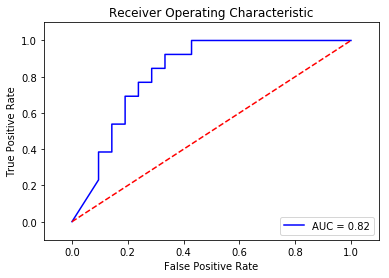

14  test  36050  acc=  0.7647059  loss =  0.546125  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  36100  acc=  0.7352941  loss =  0.5510745  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  36150  acc=  0.7352941  loss =  0.556237  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  36200  acc=  0.7352941  loss =  0.5539056  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  36250  acc=  0.7647059  loss =  0.5469105  sen:  0.7692307692307693  spe:  0.7619047619047619
14  test  36300  acc=  0.7941176  loss =  0.54136246  sen:  0.8461538461538461  spe:  0.7619047619047619
14  test  36350  acc=  0.7352941  loss =  0.54786015  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  36400  acc=  0.7352941  loss =  0.56040007  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  36450  acc=  0.7352941  loss =  0.54936963  sen:  0.7692307692307693  spe:  0.7142857142857143
14  test  36500  acc=  0.7941176  loss =  0.5361554  sen:  0.8

14  test  39950  acc=  0.7058824  loss =  0.5820275  sen:  0.6923076923076923  spe:  0.7142857142857143
14  test  40000  acc=  0.7352941  loss =  0.5568642  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


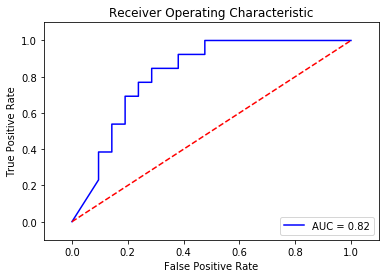

15  test  0  acc=  0.3529412  loss =  0.7134123  sen:  0.8461538461538461  spe:  0.047619047619047616
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1]


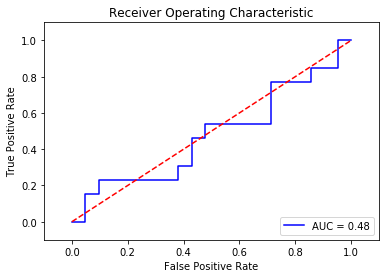

15  test  50  acc=  0.44117647  loss =  0.6922551  sen:  0.9230769230769231  spe:  0.14285714285714285
15  test  100  acc=  0.5588235  loss =  0.67505056  sen:  0.8461538461538461  spe:  0.38095238095238093
15  test  150  acc=  0.61764705  loss =  0.6664109  sen:  0.8461538461538461  spe:  0.47619047619047616
15  test  200  acc=  0.61764705  loss =  0.6556298  sen:  0.7692307692307693  spe:  0.5238095238095238
15  test  250  acc=  0.6764706  loss =  0.6490745  sen:  0.7692307692307693  spe:  0.6190476190476191
15  test  300  acc=  0.64705884  loss =  0.6493395  sen:  0.7692307692307693  spe:  0.5714285714285714
15  test  350  acc=  0.6764706  loss =  0.6399057  sen:  0.7692307692307693  spe:  0.6190476190476191
15  test  400  acc=  0.7058824  loss =  0.63588506  sen:  0.7692307692307693  spe:  0.6666666666666666
15  test  450  acc=  0.6764706  loss =  0.6375515  sen:  0.7692307692307693  spe:  0.6190476190476191
15  test  500  acc=  0.7647059  loss =  0.62866056  sen:  0.76923076923076

15  test  4000  acc=  0.7647059  loss =  0.5548781  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


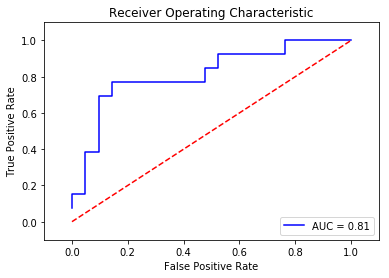

15  test  4050  acc=  0.7647059  loss =  0.5582166  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  4100  acc=  0.7647059  loss =  0.56372315  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  4150  acc=  0.7647059  loss =  0.556235  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  4200  acc=  0.7352941  loss =  0.56261957  sen:  0.7692307692307693  spe:  0.7142857142857143
15  test  4250  acc=  0.7352941  loss =  0.561878  sen:  0.7692307692307693  spe:  0.7142857142857143
15  test  4300  acc=  0.7647059  loss =  0.5528888  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  4350  acc=  0.7647059  loss =  0.5530422  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  4400  acc=  0.7647059  loss =  0.54876125  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  4450  acc=  0.7647059  loss =  0.54696834  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  4500  acc=  0.7647059  loss =  0.5520639  sen:  0.76923076923

15  test  7950  acc=  0.7647059  loss =  0.5520666  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  8000  acc=  0.7647059  loss =  0.5509105  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


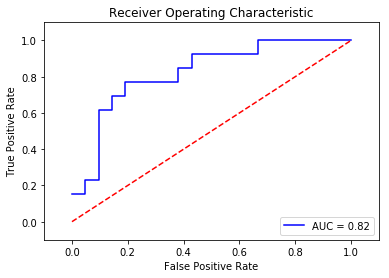

15  test  8050  acc=  0.7647059  loss =  0.55238706  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  8100  acc=  0.7647059  loss =  0.54766446  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  8150  acc=  0.7647059  loss =  0.54867405  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  8200  acc=  0.7647059  loss =  0.5453931  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  8250  acc=  0.7647059  loss =  0.55097884  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  8300  acc=  0.7647059  loss =  0.55724776  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  8350  acc=  0.7352941  loss =  0.5535725  sen:  0.7692307692307693  spe:  0.7142857142857143
15  test  8400  acc=  0.7647059  loss =  0.55103964  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  8450  acc=  0.7647059  loss =  0.5553752  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  8500  acc=  0.7647059  loss =  0.55383784  sen:  0.769230

15  test  11950  acc=  0.7647059  loss =  0.54971474  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  12000  acc=  0.7647059  loss =  0.55765146  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


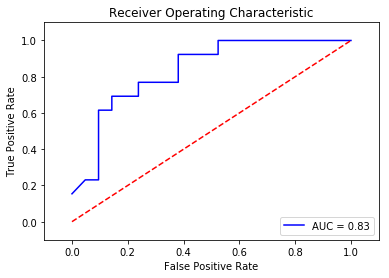

15  test  12050  acc=  0.7647059  loss =  0.5627146  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  12100  acc=  0.7647059  loss =  0.55127674  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  12150  acc=  0.7647059  loss =  0.5531125  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  12200  acc=  0.7647059  loss =  0.5555063  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  12250  acc=  0.7647059  loss =  0.54748696  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  12300  acc=  0.7647059  loss =  0.55459  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  12350  acc=  0.7352941  loss =  0.56568146  sen:  0.7692307692307693  spe:  0.7142857142857143
15  test  12400  acc=  0.7647059  loss =  0.5500927  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  12450  acc=  0.7647059  loss =  0.5589401  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  12500  acc=  0.7647059  loss =  0.5570178  sen:  0.76

15  test  15950  acc=  0.7647059  loss =  0.5413273  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  16000  acc=  0.7647059  loss =  0.53988844  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


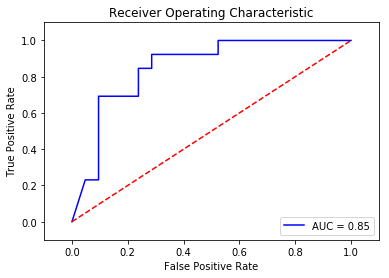

15  test  16050  acc=  0.7647059  loss =  0.5430023  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  16100  acc=  0.7647059  loss =  0.5452416  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  16150  acc=  0.7647059  loss =  0.5501728  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  16200  acc=  0.7647059  loss =  0.5484254  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  16250  acc=  0.7647059  loss =  0.5480322  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  16300  acc=  0.7647059  loss =  0.5456164  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  16350  acc=  0.7647059  loss =  0.5489007  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  16400  acc=  0.7647059  loss =  0.54968077  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  16450  acc=  0.7647059  loss =  0.54239476  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  16500  acc=  0.7647059  loss =  0.54794806  sen:  0.

15  test  19950  acc=  0.7352941  loss =  0.54636407  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  20000  acc=  0.7647059  loss =  0.54215807  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


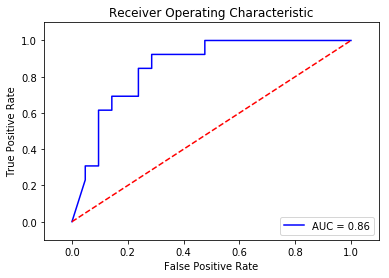

15  test  20050  acc=  0.7647059  loss =  0.5422436  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  20100  acc=  0.7352941  loss =  0.5439432  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  20150  acc=  0.7352941  loss =  0.5511739  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  20200  acc=  0.7352941  loss =  0.5425872  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  20250  acc=  0.7352941  loss =  0.5477026  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  20300  acc=  0.7352941  loss =  0.5535177  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  20350  acc=  0.7647059  loss =  0.5422482  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  20400  acc=  0.7647059  loss =  0.5437893  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  20450  acc=  0.7647059  loss =  0.5461729  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  20500  acc=  0.7352941  loss =  0.5550719  sen:  0.692

15  test  23950  acc=  0.7647059  loss =  0.5443316  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  24000  acc=  0.7352941  loss =  0.5507193  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1]


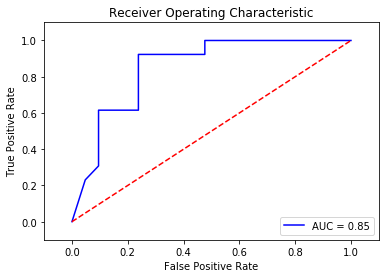

15  test  24050  acc=  0.7352941  loss =  0.5421748  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  24100  acc=  0.7647059  loss =  0.5431387  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  24150  acc=  0.7647059  loss =  0.5441674  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  24200  acc=  0.7352941  loss =  0.5507735  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  24250  acc=  0.7647059  loss =  0.5440336  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  24300  acc=  0.7352941  loss =  0.54749364  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  24350  acc=  0.7352941  loss =  0.551549  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  24400  acc=  0.7647059  loss =  0.536141  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  24450  acc=  0.7352941  loss =  0.5496321  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  24500  acc=  0.7352941  loss =  0.5484655  sen:  0.6923

15  test  27950  acc=  0.7647059  loss =  0.5407291  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  28000  acc=  0.7352941  loss =  0.54802954  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1]


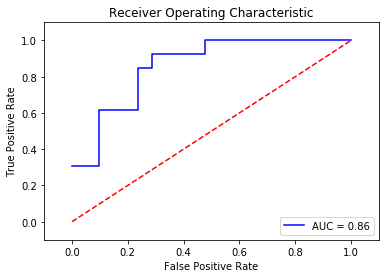

15  test  28050  acc=  0.7647059  loss =  0.537729  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  28100  acc=  0.7647059  loss =  0.5406779  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  28150  acc=  0.7647059  loss =  0.54312015  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  28200  acc=  0.7647059  loss =  0.54789096  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  28250  acc=  0.7647059  loss =  0.5356099  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  28300  acc=  0.7647059  loss =  0.5437832  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  28350  acc=  0.7647059  loss =  0.53367084  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  28400  acc=  0.7647059  loss =  0.5428664  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  28450  acc=  0.7352941  loss =  0.549585  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  28500  acc=  0.7647059  loss =  0.52145374  sen:  0.7

15  test  31950  acc=  0.7941176  loss =  0.52763957  sen:  0.8461538461538461  spe:  0.7619047619047619
15  test  32000  acc=  0.7941176  loss =  0.5333946  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


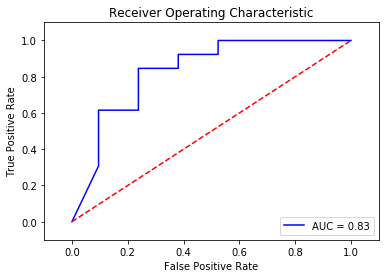

15  test  32050  acc=  0.7647059  loss =  0.53418076  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  32100  acc=  0.7647059  loss =  0.5381827  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  32150  acc=  0.7941176  loss =  0.5338709  sen:  0.8461538461538461  spe:  0.7619047619047619
15  test  32200  acc=  0.7352941  loss =  0.5430526  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  32250  acc=  0.7647059  loss =  0.53845704  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  32300  acc=  0.7647059  loss =  0.5364215  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  32350  acc=  0.7352941  loss =  0.5452631  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  32400  acc=  0.7941176  loss =  0.5344223  sen:  0.8461538461538461  spe:  0.7619047619047619
15  test  32450  acc=  0.7352941  loss =  0.54772055  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  32500  acc=  0.7647059  loss =  0.5377468  sen:  0.

15  test  35950  acc=  0.7647059  loss =  0.5414893  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  36000  acc=  0.7647059  loss =  0.5392569  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


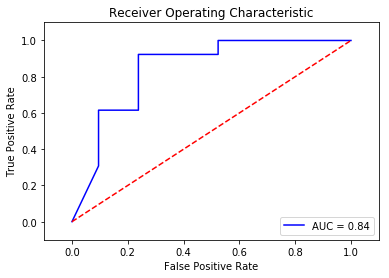

15  test  36050  acc=  0.7647059  loss =  0.5432791  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  36100  acc=  0.7352941  loss =  0.5488405  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  36150  acc=  0.7647059  loss =  0.5454721  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  36200  acc=  0.7352941  loss =  0.548923  sen:  0.6923076923076923  spe:  0.7619047619047619
15  test  36250  acc=  0.7647059  loss =  0.532776  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  36300  acc=  0.7647059  loss =  0.5381541  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  36350  acc=  0.7647059  loss =  0.541602  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  36400  acc=  0.7647059  loss =  0.5447229  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  36450  acc=  0.7647059  loss =  0.5389832  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  36500  acc=  0.7647059  loss =  0.5402624  sen:  0.769230

15  test  39950  acc=  0.7647059  loss =  0.53811455  sen:  0.7692307692307693  spe:  0.7619047619047619
15  test  40000  acc=  0.7941176  loss =  0.52635694  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


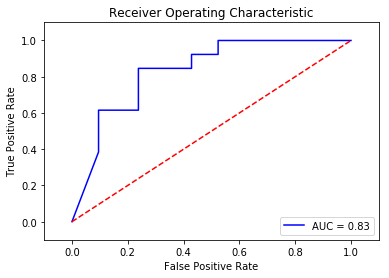

16  test  0  acc=  0.38235295  loss =  0.6945802  sen:  0.9230769230769231  spe:  0.047619047619047616
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]


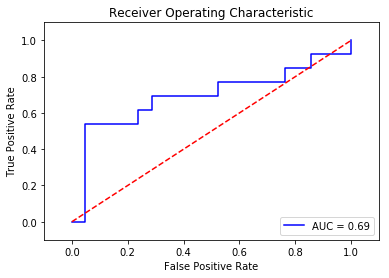

16  test  50  acc=  0.5882353  loss =  0.6805518  sen:  0.8461538461538461  spe:  0.42857142857142855
16  test  100  acc=  0.61764705  loss =  0.67170113  sen:  0.6153846153846154  spe:  0.6190476190476191
16  test  150  acc=  0.64705884  loss =  0.66923577  sen:  0.7692307692307693  spe:  0.5714285714285714
16  test  200  acc=  0.5882353  loss =  0.6727649  sen:  0.7692307692307693  spe:  0.47619047619047616
16  test  250  acc=  0.64705884  loss =  0.66665983  sen:  0.7692307692307693  spe:  0.5714285714285714
16  test  300  acc=  0.64705884  loss =  0.6644059  sen:  0.7692307692307693  spe:  0.5714285714285714
16  test  350  acc=  0.5882353  loss =  0.6673895  sen:  0.7692307692307693  spe:  0.47619047619047616
16  test  400  acc=  0.64705884  loss =  0.65807205  sen:  0.6923076923076923  spe:  0.6190476190476191
16  test  450  acc=  0.5882353  loss =  0.66775626  sen:  0.7692307692307693  spe:  0.47619047619047616
16  test  500  acc=  0.6764706  loss =  0.65487367  sen:  0.769230769

16  test  3950  acc=  0.7058824  loss =  0.5684113  sen:  0.7692307692307693  spe:  0.6666666666666666
16  test  4000  acc=  0.7352941  loss =  0.55545086  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


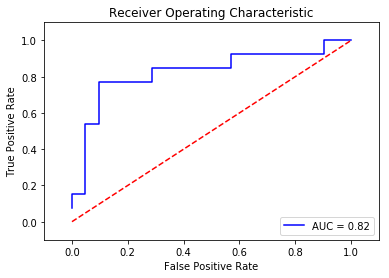

16  test  4050  acc=  0.7647059  loss =  0.56550705  sen:  0.8461538461538461  spe:  0.7142857142857143
16  test  4100  acc=  0.7352941  loss =  0.56519574  sen:  0.7692307692307693  spe:  0.7142857142857143
16  test  4150  acc=  0.7352941  loss =  0.5654971  sen:  0.7692307692307693  spe:  0.7142857142857143
16  test  4200  acc=  0.7352941  loss =  0.5571676  sen:  0.7692307692307693  spe:  0.7142857142857143
16  test  4250  acc=  0.7352941  loss =  0.56495214  sen:  0.7692307692307693  spe:  0.7142857142857143
16  test  4300  acc=  0.7352941  loss =  0.561715  sen:  0.8461538461538461  spe:  0.6666666666666666
16  test  4350  acc=  0.7352941  loss =  0.5559635  sen:  0.7692307692307693  spe:  0.7142857142857143
16  test  4400  acc=  0.7352941  loss =  0.553859  sen:  0.7692307692307693  spe:  0.7142857142857143
16  test  4450  acc=  0.7352941  loss =  0.55705965  sen:  0.7692307692307693  spe:  0.7142857142857143
16  test  4500  acc=  0.7352941  loss =  0.5577092  sen:  0.76923076923

16  test  7950  acc=  0.7352941  loss =  0.5481379  sen:  0.8461538461538461  spe:  0.6666666666666666
16  test  8000  acc=  0.7352941  loss =  0.5556852  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


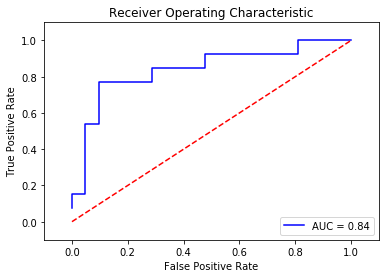

16  test  8050  acc=  0.7058824  loss =  0.5449208  sen:  0.7692307692307693  spe:  0.6666666666666666
16  test  8100  acc=  0.7352941  loss =  0.549183  sen:  0.8461538461538461  spe:  0.6666666666666666
16  test  8150  acc=  0.7058824  loss =  0.5490128  sen:  0.7692307692307693  spe:  0.6666666666666666
16  test  8200  acc=  0.7352941  loss =  0.55508655  sen:  0.8461538461538461  spe:  0.6666666666666666
16  test  8250  acc=  0.7352941  loss =  0.5513763  sen:  0.8461538461538461  spe:  0.6666666666666666
16  test  8300  acc=  0.7352941  loss =  0.55312604  sen:  0.8461538461538461  spe:  0.6666666666666666
16  test  8350  acc=  0.7352941  loss =  0.5402875  sen:  0.8461538461538461  spe:  0.6666666666666666
16  test  8400  acc=  0.7352941  loss =  0.53804046  sen:  0.7692307692307693  spe:  0.7142857142857143
16  test  8450  acc=  0.7352941  loss =  0.5523152  sen:  0.8461538461538461  spe:  0.6666666666666666
16  test  8500  acc=  0.7352941  loss =  0.5487922  sen:  0.84615384615

16  test  11950  acc=  0.7647059  loss =  0.53053975  sen:  0.8461538461538461  spe:  0.7142857142857143
16  test  12000  acc=  0.7647059  loss =  0.5331683  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


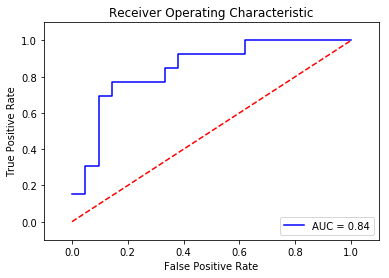

16  test  12050  acc=  0.7647059  loss =  0.5295265  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  12100  acc=  0.7647059  loss =  0.5335476  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  12150  acc=  0.7647059  loss =  0.5327472  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  12200  acc=  0.7647059  loss =  0.53464234  sen:  0.8461538461538461  spe:  0.7142857142857143
16  test  12250  acc=  0.7647059  loss =  0.52728295  sen:  0.8461538461538461  spe:  0.7142857142857143
16  test  12300  acc=  0.7647059  loss =  0.5199796  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  12350  acc=  0.7647059  loss =  0.534976  sen:  0.8461538461538461  spe:  0.7142857142857143
16  test  12400  acc=  0.7352941  loss =  0.53063107  sen:  0.7692307692307693  spe:  0.7142857142857143
16  test  12450  acc=  0.7647059  loss =  0.533138  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  12500  acc=  0.7647059  loss =  0.53626037  sen:  0.7

16  test  15950  acc=  0.7647059  loss =  0.53912085  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  16000  acc=  0.7647059  loss =  0.52587926  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


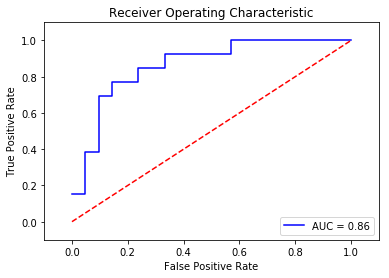

16  test  16050  acc=  0.7647059  loss =  0.5338093  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  16100  acc=  0.7352941  loss =  0.5343478  sen:  0.7692307692307693  spe:  0.7142857142857143
16  test  16150  acc=  0.7647059  loss =  0.5390187  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  16200  acc=  0.7647059  loss =  0.53387356  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  16250  acc=  0.7647059  loss =  0.5333659  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  16300  acc=  0.7647059  loss =  0.53442276  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  16350  acc=  0.7647059  loss =  0.5314837  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  16400  acc=  0.7647059  loss =  0.5275097  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  16450  acc=  0.7647059  loss =  0.53110176  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  16500  acc=  0.7352941  loss =  0.53031117  sen:  0

16  test  19950  acc=  0.7647059  loss =  0.52667475  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  20000  acc=  0.7647059  loss =  0.53203785  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


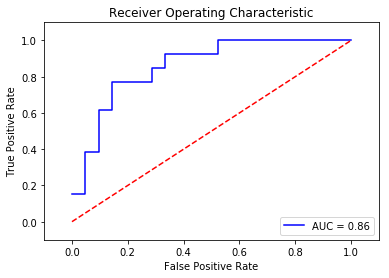

16  test  20050  acc=  0.7647059  loss =  0.5288099  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  20100  acc=  0.7647059  loss =  0.533081  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  20150  acc=  0.7647059  loss =  0.52715784  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  20200  acc=  0.7647059  loss =  0.5344032  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  20250  acc=  0.7647059  loss =  0.53591096  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  20300  acc=  0.7647059  loss =  0.53826725  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  20350  acc=  0.7647059  loss =  0.5387661  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  20400  acc=  0.7647059  loss =  0.5295556  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  20450  acc=  0.7647059  loss =  0.5405325  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  20500  acc=  0.7647059  loss =  0.5344469  sen:  0.7

16  test  23950  acc=  0.7647059  loss =  0.53143364  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  24000  acc=  0.7647059  loss =  0.53122354  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


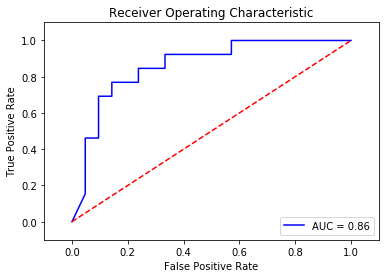

16  test  24050  acc=  0.7647059  loss =  0.534646  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  24100  acc=  0.7647059  loss =  0.53060335  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  24150  acc=  0.7647059  loss =  0.5373478  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  24200  acc=  0.7647059  loss =  0.5333979  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  24250  acc=  0.7647059  loss =  0.54105204  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  24300  acc=  0.7647059  loss =  0.53588295  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  24350  acc=  0.7647059  loss =  0.53136986  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  24400  acc=  0.7647059  loss =  0.5342001  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  24450  acc=  0.7647059  loss =  0.5360104  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  24500  acc=  0.7647059  loss =  0.5271094  sen:  0.

16  test  27950  acc=  0.7647059  loss =  0.53400195  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  28000  acc=  0.7647059  loss =  0.53390485  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


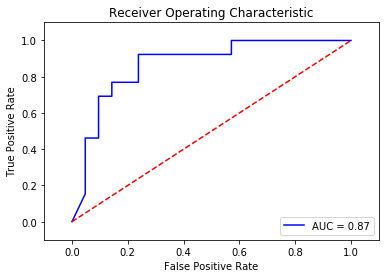

16  test  28050  acc=  0.7647059  loss =  0.53512776  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  28100  acc=  0.7647059  loss =  0.5293925  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  28150  acc=  0.7647059  loss =  0.53080446  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  28200  acc=  0.7647059  loss =  0.5338788  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  28250  acc=  0.7647059  loss =  0.5339352  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  28300  acc=  0.7647059  loss =  0.53307265  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  28350  acc=  0.7647059  loss =  0.53606707  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  28400  acc=  0.7647059  loss =  0.5327667  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  28450  acc=  0.7647059  loss =  0.53340495  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  28500  acc=  0.7647059  loss =  0.53374434  sen: 

16  test  31950  acc=  0.7647059  loss =  0.5345585  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  32000  acc=  0.7352941  loss =  0.5373342  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


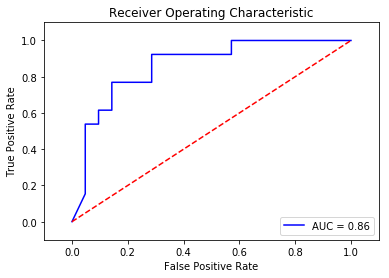

16  test  32050  acc=  0.7647059  loss =  0.535356  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  32100  acc=  0.7647059  loss =  0.5385068  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  32150  acc=  0.7647059  loss =  0.54190886  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  32200  acc=  0.7647059  loss =  0.5325213  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  32250  acc=  0.7647059  loss =  0.527965  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  32300  acc=  0.7647059  loss =  0.5363783  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  32350  acc=  0.7647059  loss =  0.5380988  sen:  0.8461538461538461  spe:  0.7142857142857143
16  test  32400  acc=  0.7647059  loss =  0.5373027  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  32450  acc=  0.7647059  loss =  0.53578585  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  32500  acc=  0.7647059  loss =  0.5284478  sen:  0.769

16  test  35950  acc=  0.7647059  loss =  0.531734  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  36000  acc=  0.7647059  loss =  0.5361244  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


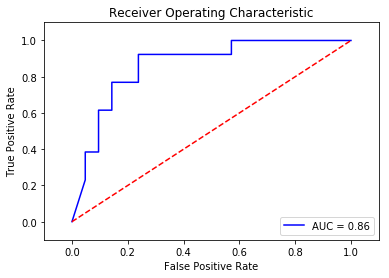

16  test  36050  acc=  0.7647059  loss =  0.5320607  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  36100  acc=  0.7647059  loss =  0.5304514  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  36150  acc=  0.7647059  loss =  0.53003925  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  36200  acc=  0.7647059  loss =  0.5272813  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  36250  acc=  0.7647059  loss =  0.5319172  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  36300  acc=  0.7647059  loss =  0.5328602  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  36350  acc=  0.7647059  loss =  0.53277177  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  36400  acc=  0.7647059  loss =  0.52788126  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  36450  acc=  0.7647059  loss =  0.53002495  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  36500  acc=  0.7647059  loss =  0.531267  sen:  0.

16  test  39950  acc=  0.7647059  loss =  0.5329833  sen:  0.7692307692307693  spe:  0.7619047619047619
16  test  40000  acc=  0.7647059  loss =  0.5345008  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


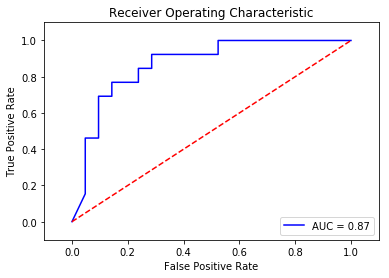

17  test  0  acc=  0.44117647  loss =  0.7030278  sen:  0.8461538461538461  spe:  0.19047619047619047
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1]


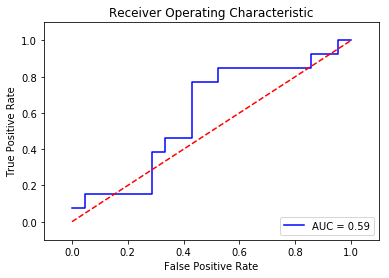

17  test  50  acc=  0.5588235  loss =  0.6744282  sen:  0.8461538461538461  spe:  0.38095238095238093
17  test  100  acc=  0.7058824  loss =  0.64974785  sen:  0.8461538461538461  spe:  0.6190476190476191
17  test  150  acc=  0.7058824  loss =  0.6360108  sen:  0.7692307692307693  spe:  0.6666666666666666
17  test  200  acc=  0.7058824  loss =  0.63243175  sen:  0.7692307692307693  spe:  0.6666666666666666
17  test  250  acc=  0.7058824  loss =  0.63046366  sen:  0.7692307692307693  spe:  0.6666666666666666
17  test  300  acc=  0.7058824  loss =  0.6307934  sen:  0.7692307692307693  spe:  0.6666666666666666
17  test  350  acc=  0.7058824  loss =  0.6250094  sen:  0.7692307692307693  spe:  0.6666666666666666
17  test  400  acc=  0.6764706  loss =  0.62247837  sen:  0.7692307692307693  spe:  0.6190476190476191
17  test  450  acc=  0.7352941  loss =  0.6080999  sen:  0.7692307692307693  spe:  0.7142857142857143
17  test  500  acc=  0.7352941  loss =  0.6019143  sen:  0.7692307692307693  s

17  test  4000  acc=  0.7941176  loss =  0.5256956  sen:  0.7692307692307693  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


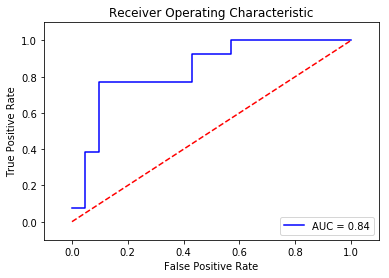

17  test  4050  acc=  0.7941176  loss =  0.52835256  sen:  0.7692307692307693  spe:  0.8095238095238095
17  test  4100  acc=  0.7647059  loss =  0.5280945  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  4150  acc=  0.7352941  loss =  0.54268605  sen:  0.7692307692307693  spe:  0.7142857142857143
17  test  4200  acc=  0.7647059  loss =  0.5293641  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  4250  acc=  0.7647059  loss =  0.53256285  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  4300  acc=  0.7941176  loss =  0.5199311  sen:  0.7692307692307693  spe:  0.8095238095238095
17  test  4350  acc=  0.8235294  loss =  0.52067995  sen:  0.7692307692307693  spe:  0.8571428571428571
17  test  4400  acc=  0.7647059  loss =  0.52943546  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  4450  acc=  0.7647059  loss =  0.52256685  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  4500  acc=  0.7647059  loss =  0.5319189  sen:  0.7692307

17  test  7950  acc=  0.7647059  loss =  0.52932245  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  8000  acc=  0.7647059  loss =  0.5388978  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


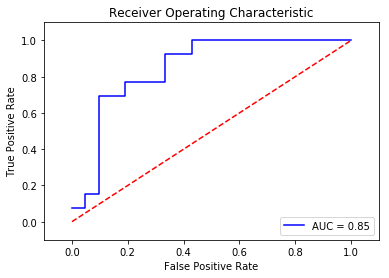

17  test  8050  acc=  0.7647059  loss =  0.53420085  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  8100  acc=  0.7647059  loss =  0.5306126  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  8150  acc=  0.7647059  loss =  0.5314615  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  8200  acc=  0.7647059  loss =  0.52888066  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  8250  acc=  0.7647059  loss =  0.53466994  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  8300  acc=  0.7352941  loss =  0.5336319  sen:  0.7692307692307693  spe:  0.7142857142857143
17  test  8350  acc=  0.7647059  loss =  0.5278124  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  8400  acc=  0.7941176  loss =  0.52571166  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  8450  acc=  0.7352941  loss =  0.5346523  sen:  0.7692307692307693  spe:  0.7142857142857143
17  test  8500  acc=  0.7352941  loss =  0.536048  sen:  0.8461538461

17  test  11950  acc=  0.7352941  loss =  0.55028635  sen:  0.6923076923076923  spe:  0.7619047619047619
17  test  12000  acc=  0.7647059  loss =  0.53354555  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


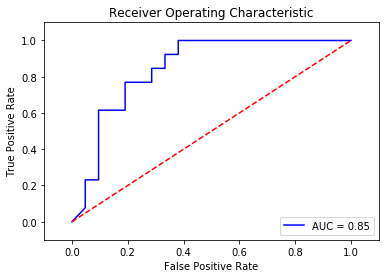

17  test  12050  acc=  0.7647059  loss =  0.54060555  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  12100  acc=  0.7647059  loss =  0.5379702  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  12150  acc=  0.7647059  loss =  0.53625417  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  12200  acc=  0.7647059  loss =  0.53404427  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  12250  acc=  0.7647059  loss =  0.53763926  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  12300  acc=  0.7647059  loss =  0.5370027  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  12350  acc=  0.7647059  loss =  0.5339371  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  12400  acc=  0.7647059  loss =  0.5459572  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  12450  acc=  0.7647059  loss =  0.5416259  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  12500  acc=  0.7647059  loss =  0.53514385  sen:  

17  test  15950  acc=  0.7647059  loss =  0.53226846  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  16000  acc=  0.7647059  loss =  0.5359528  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


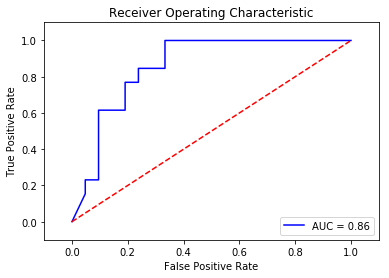

17  test  16050  acc=  0.7941176  loss =  0.5277883  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  16100  acc=  0.7647059  loss =  0.5299411  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  16150  acc=  0.7647059  loss =  0.53432477  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  16200  acc=  0.7647059  loss =  0.5308114  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  16250  acc=  0.7941176  loss =  0.52626324  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  16300  acc=  0.7647059  loss =  0.53123486  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  16350  acc=  0.7647059  loss =  0.53093153  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  16400  acc=  0.7647059  loss =  0.5340148  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  16450  acc=  0.7647059  loss =  0.53258896  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  16500  acc=  0.7647059  loss =  0.5319463  sen:  

17  test  19950  acc=  0.7941176  loss =  0.52986413  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  20000  acc=  0.7647059  loss =  0.5284763  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


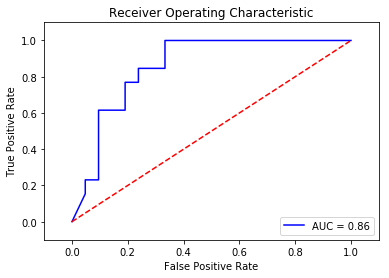

17  test  20050  acc=  0.7941176  loss =  0.52982855  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  20100  acc=  0.7647059  loss =  0.5320537  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  20150  acc=  0.7941176  loss =  0.5253858  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  20200  acc=  0.7647059  loss =  0.5287461  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  20250  acc=  0.7647059  loss =  0.53176445  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  20300  acc=  0.7941176  loss =  0.5279645  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  20350  acc=  0.7647059  loss =  0.53430986  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  20400  acc=  0.7647059  loss =  0.5290362  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  20450  acc=  0.7647059  loss =  0.52968836  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  20500  acc=  0.7647059  loss =  0.53156763  sen:  

17  test  23950  acc=  0.7941176  loss =  0.5252237  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  24000  acc=  0.7941176  loss =  0.52424264  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


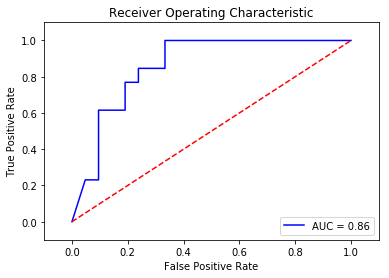

17  test  24050  acc=  0.7941176  loss =  0.525594  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  24100  acc=  0.7941176  loss =  0.52486247  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  24150  acc=  0.7647059  loss =  0.52887714  sen:  0.7692307692307693  spe:  0.7619047619047619
17  test  24200  acc=  0.7647059  loss =  0.53231597  sen:  0.8461538461538461  spe:  0.7142857142857143
17  test  24250  acc=  0.7941176  loss =  0.524622  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  24300  acc=  0.7941176  loss =  0.5255742  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  24350  acc=  0.7941176  loss =  0.5271095  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  24400  acc=  0.7941176  loss =  0.5249191  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  24450  acc=  0.7941176  loss =  0.52316904  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  24500  acc=  0.7941176  loss =  0.5231474  sen:  0.8

17  test  27950  acc=  0.7941176  loss =  0.5233394  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  28000  acc=  0.7941176  loss =  0.52381605  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


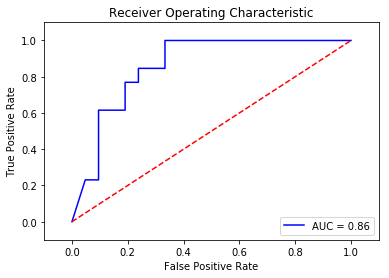

17  test  28050  acc=  0.7941176  loss =  0.5215677  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  28100  acc=  0.7941176  loss =  0.524716  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  28150  acc=  0.7941176  loss =  0.5244652  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  28200  acc=  0.7941176  loss =  0.5214472  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  28250  acc=  0.7941176  loss =  0.5214717  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  28300  acc=  0.7941176  loss =  0.5235398  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  28350  acc=  0.7941176  loss =  0.52698356  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  28400  acc=  0.7941176  loss =  0.5193733  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  28450  acc=  0.7941176  loss =  0.52224183  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  28500  acc=  0.7941176  loss =  0.5231082  sen:  0.84

17  test  31950  acc=  0.7941176  loss =  0.5229133  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  32000  acc=  0.7941176  loss =  0.5238451  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


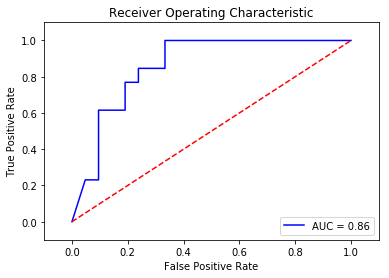

17  test  32050  acc=  0.7941176  loss =  0.5252849  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  32100  acc=  0.7941176  loss =  0.5233165  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  32150  acc=  0.7941176  loss =  0.5237251  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  32200  acc=  0.7941176  loss =  0.5233536  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  32250  acc=  0.7941176  loss =  0.52830815  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  32300  acc=  0.7941176  loss =  0.5231749  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  32350  acc=  0.7941176  loss =  0.5222388  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  32400  acc=  0.7941176  loss =  0.5242715  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  32450  acc=  0.7941176  loss =  0.5238112  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  32500  acc=  0.7941176  loss =  0.52652305  sen:  0.8

17  test  35950  acc=  0.7941176  loss =  0.5196238  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  36000  acc=  0.7941176  loss =  0.5245682  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


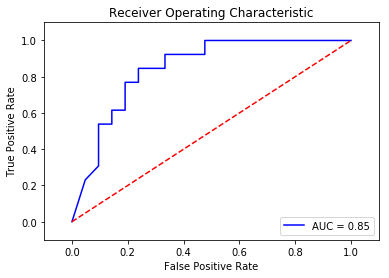

17  test  36050  acc=  0.7941176  loss =  0.52022624  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  36100  acc=  0.7941176  loss =  0.5217317  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  36150  acc=  0.7941176  loss =  0.5198102  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  36200  acc=  0.7941176  loss =  0.52069426  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  36250  acc=  0.7941176  loss =  0.5194321  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  36300  acc=  0.7941176  loss =  0.5211541  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  36350  acc=  0.7941176  loss =  0.5237278  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  36400  acc=  0.7941176  loss =  0.52088594  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  36450  acc=  0.7941176  loss =  0.5237507  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  36500  acc=  0.7941176  loss =  0.5223981  sen:  0.

17  test  39950  acc=  0.7941176  loss =  0.52407527  sen:  0.8461538461538461  spe:  0.7619047619047619
17  test  40000  acc=  0.7941176  loss =  0.5250164  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


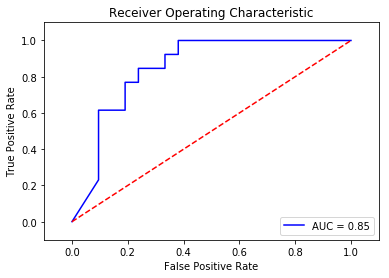

18  test  0  acc=  0.38235295  loss =  0.72672796  sen:  0.8461538461538461  spe:  0.09523809523809523
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1]


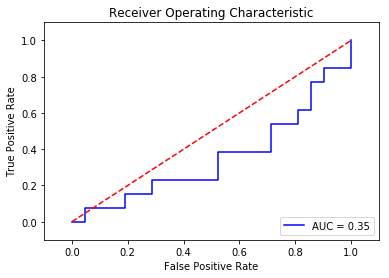

18  test  50  acc=  0.3529412  loss =  0.70981073  sen:  0.7692307692307693  spe:  0.09523809523809523
18  test  100  acc=  0.5588235  loss =  0.6949392  sen:  0.6923076923076923  spe:  0.47619047619047616
18  test  150  acc=  0.5294118  loss =  0.68335396  sen:  0.6153846153846154  spe:  0.47619047619047616
18  test  200  acc=  0.5882353  loss =  0.6739494  sen:  0.6923076923076923  spe:  0.5238095238095238
18  test  250  acc=  0.5588235  loss =  0.6731925  sen:  0.6923076923076923  spe:  0.47619047619047616
18  test  300  acc=  0.5882353  loss =  0.6728066  sen:  0.7692307692307693  spe:  0.47619047619047616
18  test  350  acc=  0.6764706  loss =  0.660824  sen:  0.6923076923076923  spe:  0.6666666666666666
18  test  400  acc=  0.5882353  loss =  0.66198653  sen:  0.6923076923076923  spe:  0.5238095238095238
18  test  450  acc=  0.6764706  loss =  0.6544683  sen:  0.6923076923076923  spe:  0.6666666666666666
18  test  500  acc=  0.61764705  loss =  0.6601738  sen:  0.7692307692307693

18  test  3950  acc=  0.7058824  loss =  0.5517935  sen:  0.7692307692307693  spe:  0.6666666666666666
18  test  4000  acc=  0.7058824  loss =  0.55365425  sen:  0.7692307692307693  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


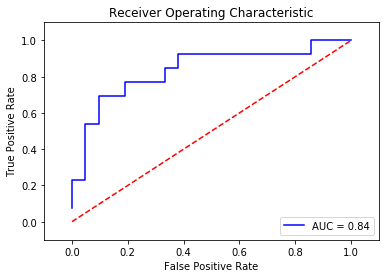

18  test  4050  acc=  0.7058824  loss =  0.55567443  sen:  0.7692307692307693  spe:  0.6666666666666666
18  test  4100  acc=  0.7058824  loss =  0.5624357  sen:  0.7692307692307693  spe:  0.6666666666666666
18  test  4150  acc=  0.7058824  loss =  0.5549205  sen:  0.7692307692307693  spe:  0.6666666666666666
18  test  4200  acc=  0.7058824  loss =  0.5662189  sen:  0.7692307692307693  spe:  0.6666666666666666
18  test  4250  acc=  0.7058824  loss =  0.5564977  sen:  0.7692307692307693  spe:  0.6666666666666666
18  test  4300  acc=  0.7058824  loss =  0.5624299  sen:  0.7692307692307693  spe:  0.6666666666666666
18  test  4350  acc=  0.7058824  loss =  0.5605089  sen:  0.7692307692307693  spe:  0.6666666666666666
18  test  4400  acc=  0.7058824  loss =  0.5526208  sen:  0.7692307692307693  spe:  0.6666666666666666
18  test  4450  acc=  0.7058824  loss =  0.555103  sen:  0.7692307692307693  spe:  0.6666666666666666
18  test  4500  acc=  0.7352941  loss =  0.54778624  sen:  0.769230769230

18  test  7950  acc=  0.7941176  loss =  0.52665526  sen:  0.8461538461538461  spe:  0.7619047619047619
18  test  8000  acc=  0.7647059  loss =  0.53478044  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


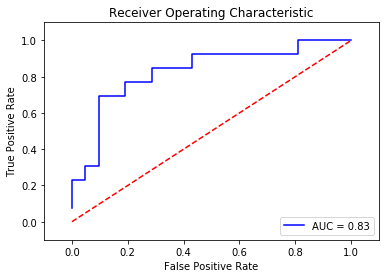

18  test  8050  acc=  0.7352941  loss =  0.5418463  sen:  0.8461538461538461  spe:  0.6666666666666666
18  test  8100  acc=  0.7647059  loss =  0.52920455  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  8150  acc=  0.8235294  loss =  0.52454466  sen:  0.8461538461538461  spe:  0.8095238095238095
18  test  8200  acc=  0.7647059  loss =  0.5269317  sen:  0.8461538461538461  spe:  0.7142857142857143
18  test  8250  acc=  0.7941176  loss =  0.51537055  sen:  0.7692307692307693  spe:  0.8095238095238095
18  test  8300  acc=  0.7941176  loss =  0.5298197  sen:  0.7692307692307693  spe:  0.8095238095238095
18  test  8350  acc=  0.7941176  loss =  0.5288892  sen:  0.8461538461538461  spe:  0.7619047619047619
18  test  8400  acc=  0.7647059  loss =  0.5284863  sen:  0.8461538461538461  spe:  0.7142857142857143
18  test  8450  acc=  0.7941176  loss =  0.52580523  sen:  0.8461538461538461  spe:  0.7619047619047619
18  test  8500  acc=  0.7941176  loss =  0.5319772  sen:  0.846153846

18  test  11950  acc=  0.7647059  loss =  0.5373314  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  12000  acc=  0.7352941  loss =  0.5388938  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


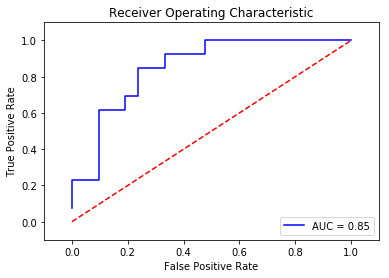

18  test  12050  acc=  0.7647059  loss =  0.5439683  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  12100  acc=  0.7647059  loss =  0.5348145  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  12150  acc=  0.7647059  loss =  0.5349158  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  12200  acc=  0.7352941  loss =  0.54351866  sen:  0.7692307692307693  spe:  0.7142857142857143
18  test  12250  acc=  0.7647059  loss =  0.54001975  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  12300  acc=  0.7352941  loss =  0.53746134  sen:  0.6923076923076923  spe:  0.7619047619047619
18  test  12350  acc=  0.7647059  loss =  0.5392636  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  12400  acc=  0.7647059  loss =  0.53917927  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  12450  acc=  0.7647059  loss =  0.54232967  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  12500  acc=  0.7647059  loss =  0.54425895  sen: 

18  test  15950  acc=  0.7647059  loss =  0.5432587  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  16000  acc=  0.7647059  loss =  0.5460039  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


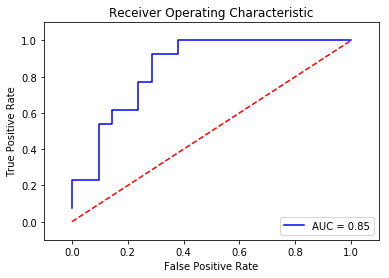

18  test  16050  acc=  0.7647059  loss =  0.5384706  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  16100  acc=  0.7647059  loss =  0.53644323  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  16150  acc=  0.7647059  loss =  0.53893065  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  16200  acc=  0.7352941  loss =  0.54819757  sen:  0.7692307692307693  spe:  0.7142857142857143
18  test  16250  acc=  0.7647059  loss =  0.54041344  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  16300  acc=  0.7647059  loss =  0.53572387  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  16350  acc=  0.7647059  loss =  0.5448286  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  16400  acc=  0.7647059  loss =  0.54373014  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  16450  acc=  0.7647059  loss =  0.53881025  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  16500  acc=  0.7647059  loss =  0.5408905  sen:

18  test  19950  acc=  0.7647059  loss =  0.54162925  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  20000  acc=  0.7352941  loss =  0.5457455  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


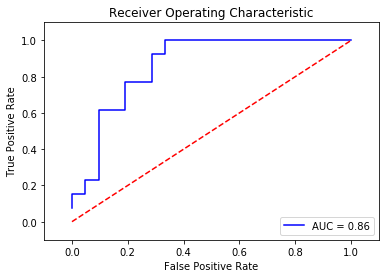

18  test  20050  acc=  0.7352941  loss =  0.54699266  sen:  0.7692307692307693  spe:  0.7142857142857143
18  test  20100  acc=  0.7352941  loss =  0.54381496  sen:  0.7692307692307693  spe:  0.7142857142857143
18  test  20150  acc=  0.7941176  loss =  0.53407353  sen:  0.8461538461538461  spe:  0.7619047619047619
18  test  20200  acc=  0.7352941  loss =  0.5487598  sen:  0.7692307692307693  spe:  0.7142857142857143
18  test  20250  acc=  0.7647059  loss =  0.53647375  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  20300  acc=  0.7647059  loss =  0.5342993  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  20350  acc=  0.7647059  loss =  0.53816146  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  20400  acc=  0.7647059  loss =  0.53601766  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  20450  acc=  0.7647059  loss =  0.53879064  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  20500  acc=  0.7647059  loss =  0.5404816  sen:

18  test  23950  acc=  0.7647059  loss =  0.5347969  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  24000  acc=  0.7647059  loss =  0.53696555  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


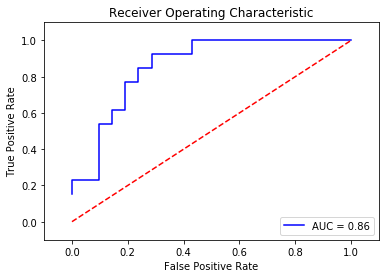

18  test  24050  acc=  0.7647059  loss =  0.5402752  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  24100  acc=  0.7647059  loss =  0.53848654  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  24150  acc=  0.7941176  loss =  0.5371969  sen:  0.8461538461538461  spe:  0.7619047619047619
18  test  24200  acc=  0.7647059  loss =  0.5343363  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  24250  acc=  0.7647059  loss =  0.53934115  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  24300  acc=  0.7647059  loss =  0.53655505  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  24350  acc=  0.7647059  loss =  0.5406694  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  24400  acc=  0.7647059  loss =  0.53931415  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  24450  acc=  0.7647059  loss =  0.5363624  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  24500  acc=  0.7647059  loss =  0.5370289  sen:  0

18  test  27950  acc=  0.7647059  loss =  0.5361335  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  28000  acc=  0.7647059  loss =  0.53488207  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


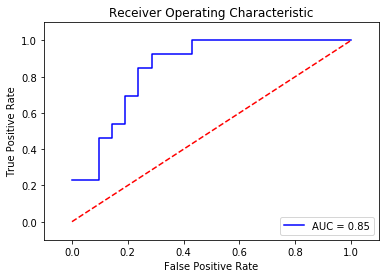

18  test  28050  acc=  0.7647059  loss =  0.53553474  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  28100  acc=  0.7647059  loss =  0.53410006  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  28150  acc=  0.7647059  loss =  0.5380373  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  28200  acc=  0.7647059  loss =  0.5375881  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  28250  acc=  0.7647059  loss =  0.53547513  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  28300  acc=  0.7647059  loss =  0.53287226  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  28350  acc=  0.7647059  loss =  0.53425306  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  28400  acc=  0.7647059  loss =  0.5359002  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  28450  acc=  0.7647059  loss =  0.5356805  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  28500  acc=  0.7647059  loss =  0.5354192  sen:  

18  test  31950  acc=  0.7647059  loss =  0.5369935  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  32000  acc=  0.7647059  loss =  0.53711206  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


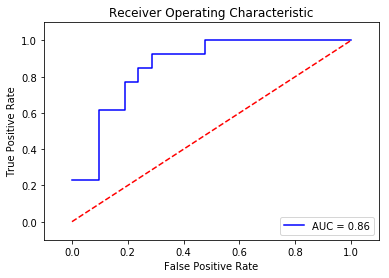

18  test  32050  acc=  0.7647059  loss =  0.5368677  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  32100  acc=  0.7647059  loss =  0.5360221  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  32150  acc=  0.7647059  loss =  0.5407456  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  32200  acc=  0.7647059  loss =  0.53712225  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  32250  acc=  0.7647059  loss =  0.536351  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  32300  acc=  0.7647059  loss =  0.53511864  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  32350  acc=  0.7647059  loss =  0.5354638  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  32400  acc=  0.7647059  loss =  0.5370465  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  32450  acc=  0.7647059  loss =  0.5400476  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  32500  acc=  0.7647059  loss =  0.5363  sen:  0.76923

18  test  35950  acc=  0.7647059  loss =  0.5346141  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  36000  acc=  0.7647059  loss =  0.53805727  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


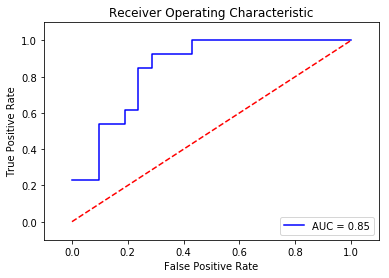

18  test  36050  acc=  0.7647059  loss =  0.5393246  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  36100  acc=  0.7647059  loss =  0.53787214  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  36150  acc=  0.7647059  loss =  0.536962  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  36200  acc=  0.7647059  loss =  0.53780174  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  36250  acc=  0.7647059  loss =  0.53716785  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  36300  acc=  0.7647059  loss =  0.5344026  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  36350  acc=  0.7647059  loss =  0.5403733  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  36400  acc=  0.7647059  loss =  0.5358348  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  36450  acc=  0.7647059  loss =  0.5349573  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  36500  acc=  0.7647059  loss =  0.53607  sen:  0.769

18  test  39950  acc=  0.7647059  loss =  0.5392508  sen:  0.7692307692307693  spe:  0.7619047619047619
18  test  40000  acc=  0.7647059  loss =  0.54049945  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


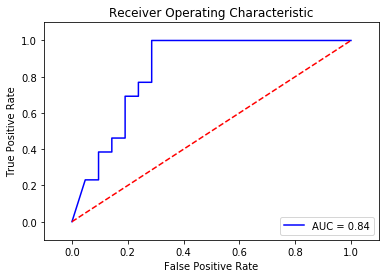

19  test  0  acc=  0.6764706  loss =  0.6706638  sen:  0.46153846153846156  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0]


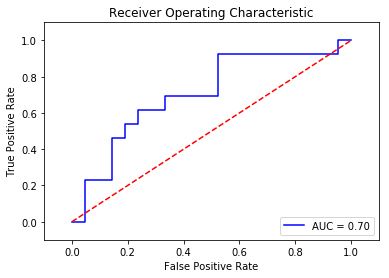

19  test  50  acc=  0.7352941  loss =  0.6625676  sen:  0.6153846153846154  spe:  0.8095238095238095
19  test  100  acc=  0.6764706  loss =  0.6570336  sen:  0.6153846153846154  spe:  0.7142857142857143
19  test  150  acc=  0.7352941  loss =  0.644773  sen:  0.6153846153846154  spe:  0.8095238095238095
19  test  200  acc=  0.7058824  loss =  0.6469813  sen:  0.6923076923076923  spe:  0.7142857142857143
19  test  250  acc=  0.6764706  loss =  0.6392804  sen:  0.5384615384615384  spe:  0.7619047619047619
19  test  300  acc=  0.7352941  loss =  0.6413314  sen:  0.7692307692307693  spe:  0.7142857142857143
19  test  350  acc=  0.7352941  loss =  0.6426178  sen:  0.7692307692307693  spe:  0.7142857142857143
19  test  400  acc=  0.7647059  loss =  0.6377956  sen:  0.7692307692307693  spe:  0.7619047619047619
19  test  450  acc=  0.7647059  loss =  0.6397569  sen:  0.7692307692307693  spe:  0.7619047619047619
19  test  500  acc=  0.6764706  loss =  0.6464908  sen:  0.7692307692307693  spe:  0

19  test  4000  acc=  0.7352941  loss =  0.56036526  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


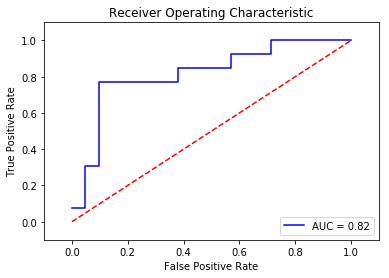

19  test  4050  acc=  0.7058824  loss =  0.5663822  sen:  0.7692307692307693  spe:  0.6666666666666666
19  test  4100  acc=  0.7647059  loss =  0.5484184  sen:  0.7692307692307693  spe:  0.7619047619047619
19  test  4150  acc=  0.7647059  loss =  0.55492795  sen:  0.7692307692307693  spe:  0.7619047619047619
19  test  4200  acc=  0.7647059  loss =  0.5586128  sen:  0.7692307692307693  spe:  0.7619047619047619
19  test  4250  acc=  0.7647059  loss =  0.5543623  sen:  0.7692307692307693  spe:  0.7619047619047619
19  test  4300  acc=  0.7352941  loss =  0.5557897  sen:  0.7692307692307693  spe:  0.7142857142857143
19  test  4350  acc=  0.7647059  loss =  0.5510628  sen:  0.7692307692307693  spe:  0.7619047619047619
19  test  4400  acc=  0.7352941  loss =  0.56156117  sen:  0.7692307692307693  spe:  0.7142857142857143
19  test  4450  acc=  0.7647059  loss =  0.55317694  sen:  0.7692307692307693  spe:  0.7619047619047619
19  test  4500  acc=  0.7647059  loss =  0.5542769  sen:  0.7692307692

19  test  7950  acc=  0.7941176  loss =  0.5518077  sen:  0.8461538461538461  spe:  0.7619047619047619
19  test  8000  acc=  0.7352941  loss =  0.5619657  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


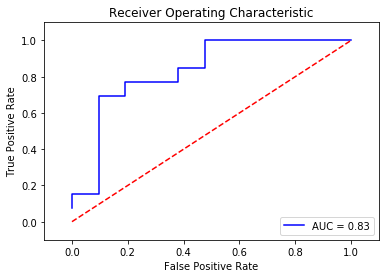

19  test  8050  acc=  0.7647059  loss =  0.5537964  sen:  0.7692307692307693  spe:  0.7619047619047619
19  test  8100  acc=  0.7647059  loss =  0.54910463  sen:  0.7692307692307693  spe:  0.7619047619047619
19  test  8150  acc=  0.7647059  loss =  0.550495  sen:  0.7692307692307693  spe:  0.7619047619047619
19  test  8200  acc=  0.7647059  loss =  0.55600125  sen:  0.7692307692307693  spe:  0.7619047619047619
19  test  8250  acc=  0.7352941  loss =  0.55460167  sen:  0.7692307692307693  spe:  0.7142857142857143
19  test  8300  acc=  0.7647059  loss =  0.55122447  sen:  0.7692307692307693  spe:  0.7619047619047619
19  test  8350  acc=  0.7647059  loss =  0.5403891  sen:  0.7692307692307693  spe:  0.7619047619047619
19  test  8400  acc=  0.7647059  loss =  0.5443602  sen:  0.7692307692307693  spe:  0.7619047619047619
19  test  8450  acc=  0.7647059  loss =  0.55616826  sen:  0.7692307692307693  spe:  0.7619047619047619
19  test  8500  acc=  0.7647059  loss =  0.5496557  sen:  0.769230769

19  test  11950  acc=  0.7647059  loss =  0.54273885  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  12000  acc=  0.7647059  loss =  0.54540926  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


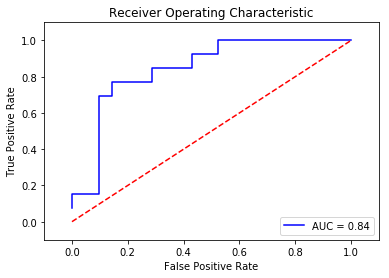

19  test  12050  acc=  0.7647059  loss =  0.54505783  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  12100  acc=  0.7647059  loss =  0.5491806  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  12150  acc=  0.7647059  loss =  0.5490763  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  12200  acc=  0.7647059  loss =  0.5524192  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  12250  acc=  0.7647059  loss =  0.54126173  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  12300  acc=  0.7647059  loss =  0.55202246  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  12350  acc=  0.7647059  loss =  0.5434755  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  12400  acc=  0.7647059  loss =  0.5439809  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  12450  acc=  0.7647059  loss =  0.54119533  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  12500  acc=  0.7647059  loss =  0.54970574  sen:  

19  test  15950  acc=  0.7647059  loss =  0.5485281  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  16000  acc=  0.7352941  loss =  0.56628203  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


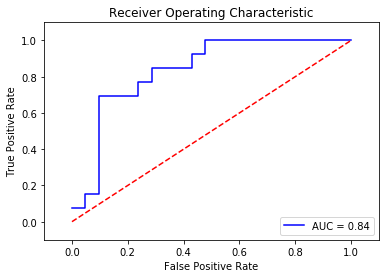

19  test  16050  acc=  0.7647059  loss =  0.55122274  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  16100  acc=  0.7647059  loss =  0.5474569  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  16150  acc=  0.7647059  loss =  0.55512697  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  16200  acc=  0.7647059  loss =  0.5536891  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  16250  acc=  0.7352941  loss =  0.55588263  sen:  0.8461538461538461  spe:  0.6666666666666666
19  test  16300  acc=  0.7647059  loss =  0.5522142  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  16350  acc=  0.7647059  loss =  0.55252093  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  16400  acc=  0.7647059  loss =  0.5558691  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  16450  acc=  0.7647059  loss =  0.5579168  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  16500  acc=  0.7647059  loss =  0.54661036  sen:  

19  test  19950  acc=  0.7647059  loss =  0.5450258  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  20000  acc=  0.7647059  loss =  0.538898  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


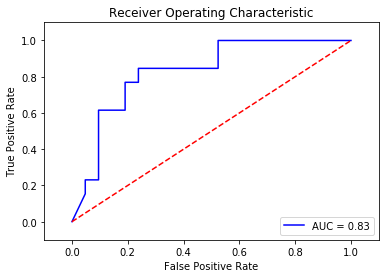

19  test  20050  acc=  0.7647059  loss =  0.5467512  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  20100  acc=  0.7647059  loss =  0.54387426  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  20150  acc=  0.7647059  loss =  0.54904604  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  20200  acc=  0.7647059  loss =  0.54938465  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  20250  acc=  0.7647059  loss =  0.5479908  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  20300  acc=  0.7647059  loss =  0.5495423  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  20350  acc=  0.7352941  loss =  0.5759918  sen:  0.8461538461538461  spe:  0.6666666666666666
19  test  20400  acc=  0.7647059  loss =  0.5435739  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  20450  acc=  0.7647059  loss =  0.5415037  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  20500  acc=  0.7647059  loss =  0.5412435  sen:  0.

19  test  23950  acc=  0.7647059  loss =  0.5378461  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  24000  acc=  0.7941176  loss =  0.5322036  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


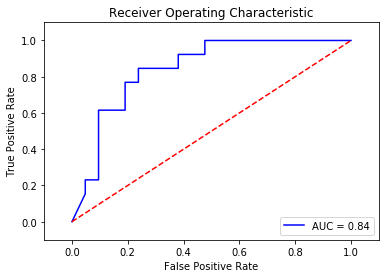

19  test  24050  acc=  0.7941176  loss =  0.52767634  sen:  0.8461538461538461  spe:  0.7619047619047619
19  test  24100  acc=  0.7647059  loss =  0.5365265  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  24150  acc=  0.7647059  loss =  0.54678714  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  24200  acc=  0.7647059  loss =  0.5342155  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  24250  acc=  0.7941176  loss =  0.53097564  sen:  0.8461538461538461  spe:  0.7619047619047619
19  test  24300  acc=  0.7647059  loss =  0.5362457  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  24350  acc=  0.7647059  loss =  0.55005926  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  24400  acc=  0.7647059  loss =  0.5398835  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  24450  acc=  0.7647059  loss =  0.5444483  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  24500  acc=  0.7941176  loss =  0.5313354  sen:  0

19  test  27950  acc=  0.7941176  loss =  0.53463864  sen:  0.8461538461538461  spe:  0.7619047619047619
19  test  28000  acc=  0.7647059  loss =  0.53955793  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


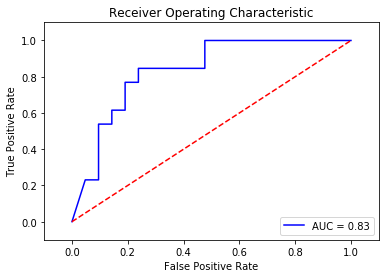

19  test  28050  acc=  0.7647059  loss =  0.54678  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  28100  acc=  0.7647059  loss =  0.54244715  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  28150  acc=  0.7647059  loss =  0.53825516  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  28200  acc=  0.7647059  loss =  0.5389125  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  28250  acc=  0.7647059  loss =  0.54268605  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  28300  acc=  0.7941176  loss =  0.5394454  sen:  0.8461538461538461  spe:  0.7619047619047619
19  test  28350  acc=  0.7647059  loss =  0.54596287  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  28400  acc=  0.7647059  loss =  0.54570174  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  28450  acc=  0.7647059  loss =  0.5428624  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  28500  acc=  0.7647059  loss =  0.5471512  sen:  0.

19  test  31950  acc=  0.7941176  loss =  0.5349254  sen:  0.8461538461538461  spe:  0.7619047619047619
19  test  32000  acc=  0.7941176  loss =  0.53606176  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


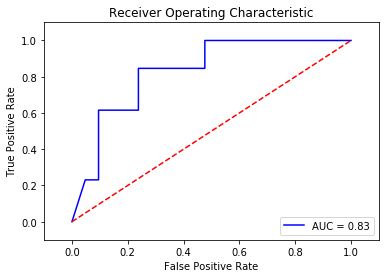

19  test  32050  acc=  0.7647059  loss =  0.5460272  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  32100  acc=  0.7647059  loss =  0.5412657  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  32150  acc=  0.7647059  loss =  0.53754234  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  32200  acc=  0.7647059  loss =  0.5414089  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  32250  acc=  0.7647059  loss =  0.5406436  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  32300  acc=  0.7647059  loss =  0.54900306  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  32350  acc=  0.7647059  loss =  0.54176325  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  32400  acc=  0.7647059  loss =  0.54387206  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  32450  acc=  0.7941176  loss =  0.53488195  sen:  0.8461538461538461  spe:  0.7619047619047619
19  test  32500  acc=  0.7647059  loss =  0.54727226  sen: 

19  test  35950  acc=  0.7647059  loss =  0.5491063  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  36000  acc=  0.7647059  loss =  0.5475611  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


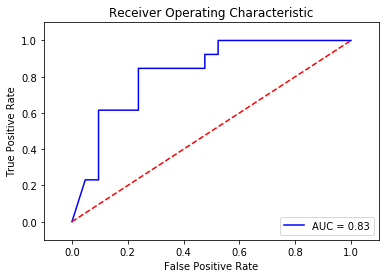

19  test  36050  acc=  0.7647059  loss =  0.5436152  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  36100  acc=  0.7647059  loss =  0.55044603  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  36150  acc=  0.7647059  loss =  0.5432658  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  36200  acc=  0.7647059  loss =  0.5455175  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  36250  acc=  0.7647059  loss =  0.54550856  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  36300  acc=  0.7647059  loss =  0.5578886  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  36350  acc=  0.7647059  loss =  0.55078214  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  36400  acc=  0.7647059  loss =  0.55618334  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  36450  acc=  0.7647059  loss =  0.55539  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  36500  acc=  0.7647059  loss =  0.5512927  sen:  0.8

19  test  39950  acc=  0.7647059  loss =  0.5488133  sen:  0.8461538461538461  spe:  0.7142857142857143
19  test  40000  acc=  0.7647059  loss =  0.5505008  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


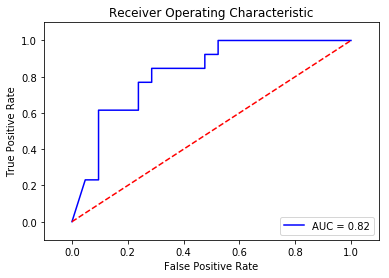

In [5]:
for num in range(10,20):                           #  4个PK + 9b
    with tf.Session(config=config) as sess:
        sess.run(init_op)
        coord = tf.train.Coordinator()
        tf.train.start_queue_runners(sess=sess,coord=coord)      #启动线程操作，这是因为之前数据增强的时候使用train.shuffle_batch()函数的时候通过参数num_threads()配置了16个线程用于组织batch的操作
        train_writer = tf.summary.FileWriter('G:/ZengQYuan/ivim_baoer_logs/hhy_cnn_fab_csab(4PK+9b)/train/'+str(num),sess.graph)
        test_writer = tf.summary.FileWriter('G:/ZengQYuan/ivim_baoer_logs/hhy_cnn_fab_csab(4PK+9b)/test/'+str(num),sess.graph)

        for step in range (40001):
            global_step = step
            idx = np.random.randint(0,13450,batch_size)          ###
            image_batch = series_train[idx]
            pk_batch = pk_train[idx]
            label_batch = y_train[idx]
            _,summary,loss_value=sess.run([train_op,merge,loss],feed_dict={series_:image_batch,pk_:pk_batch,y_:label_batch,keep_prob:0.5})
            train_writer.add_summary(summary,step)

            if step % 50 == 0:
                acc,loss_value,summary,output_position_r,label_position_r,predict_r,p = sess.run([Accuracy,loss,merge,output_position,label_position,predict,prediction],feed_dict={series_:series_test,pk_:pk_test,y_:y_test,keep_prob:1})         ###
                test_writer.add_summary(summary,step)
                sen,spe = Sensitivity_specificity(output_position_r,predict_r)
                print(str(num)," test ",str(step)," acc= ",acc," loss = ",loss_value," sen: ",sen," spe: ",spe)

                
            if step % 2000 == 0:
                print(label_position_r)
                print(output_position_r)
            
            if step % 4000 == 0:
                ROC(label_position_r,p)
                
        coord.request_stop() # 请求线程结束
        coord.join() # 等待线程结束

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
20  test  0  acc=  0.61764705  loss =  0.6838123  sen:  0.07692307692307693  spe:  0.9523809523809523
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


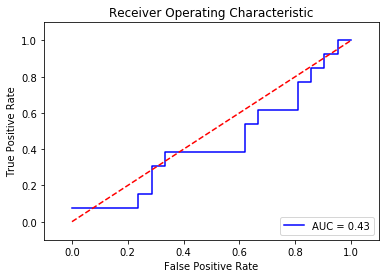

20  test  50  acc=  0.5882353  loss =  0.672262  sen:  0.6923076923076923  spe:  0.5238095238095238
20  test  100  acc=  0.64705884  loss =  0.6561949  sen:  0.6153846153846154  spe:  0.6666666666666666
20  test  150  acc=  0.61764705  loss =  0.65429586  sen:  0.6153846153846154  spe:  0.6190476190476191
20  test  200  acc=  0.64705884  loss =  0.6452138  sen:  0.6153846153846154  spe:  0.6666666666666666
20  test  250  acc=  0.61764705  loss =  0.6455642  sen:  0.6153846153846154  spe:  0.6190476190476191
20  test  300  acc=  0.5882353  loss =  0.6501312  sen:  0.6153846153846154  spe:  0.5714285714285714
20  test  350  acc=  0.61764705  loss =  0.64091206  sen:  0.6153846153846154  spe:  0.6190476190476191
20  test  400  acc=  0.64705884  loss =  0.6434206  sen:  0.7692307692307693  spe:  0.5714285714285714
20  test  450  acc=  0.6764706  loss =  0.6415649  sen:  0.7692307692307693  spe:  0.6190476190476191
20  test  500  acc=  0.6764706  loss =  0.6272411  sen:  0.6153846153846154 

20  test  4000  acc=  0.7352941  loss =  0.5296968  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


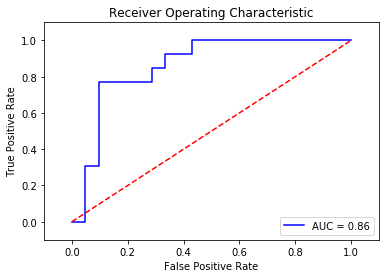

20  test  4050  acc=  0.7352941  loss =  0.53582036  sen:  0.7692307692307693  spe:  0.7142857142857143
20  test  4100  acc=  0.7352941  loss =  0.53437406  sen:  0.7692307692307693  spe:  0.7142857142857143
20  test  4150  acc=  0.7352941  loss =  0.5211464  sen:  0.7692307692307693  spe:  0.7142857142857143
20  test  4200  acc=  0.7352941  loss =  0.53419894  sen:  0.7692307692307693  spe:  0.7142857142857143
20  test  4250  acc=  0.7352941  loss =  0.54242617  sen:  0.7692307692307693  spe:  0.7142857142857143
20  test  4300  acc=  0.7352941  loss =  0.5468622  sen:  0.7692307692307693  spe:  0.7142857142857143
20  test  4350  acc=  0.7352941  loss =  0.53221065  sen:  0.7692307692307693  spe:  0.7142857142857143
20  test  4400  acc=  0.7352941  loss =  0.5229563  sen:  0.7692307692307693  spe:  0.7142857142857143
20  test  4450  acc=  0.7352941  loss =  0.52862024  sen:  0.7692307692307693  spe:  0.7142857142857143
20  test  4500  acc=  0.7352941  loss =  0.53755236  sen:  0.769230

20  test  7950  acc=  0.7058824  loss =  0.538692  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  8000  acc=  0.7352941  loss =  0.5394735  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


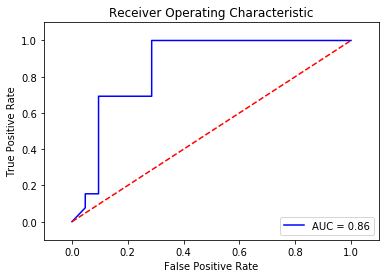

20  test  8050  acc=  0.7352941  loss =  0.5370734  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  8100  acc=  0.7352941  loss =  0.53539795  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  8150  acc=  0.7058824  loss =  0.5457406  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  8200  acc=  0.7352941  loss =  0.5420064  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  8250  acc=  0.7058824  loss =  0.55510956  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  8300  acc=  0.7352941  loss =  0.53721166  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  8350  acc=  0.7352941  loss =  0.5455128  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  8400  acc=  0.7352941  loss =  0.54305255  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  8450  acc=  0.7058824  loss =  0.5410625  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  8500  acc=  0.7058824  loss =  0.5424317  sen:  0.692307692

20  test  11950  acc=  0.7058824  loss =  0.55768216  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  12000  acc=  0.7352941  loss =  0.5438935  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


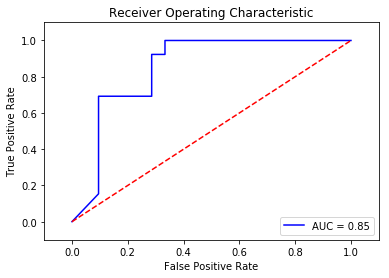

20  test  12050  acc=  0.7058824  loss =  0.56403166  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  12100  acc=  0.7058824  loss =  0.5651861  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  12150  acc=  0.7058824  loss =  0.56936204  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  12200  acc=  0.7058824  loss =  0.54941005  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  12250  acc=  0.7058824  loss =  0.55497897  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  12300  acc=  0.7058824  loss =  0.5593782  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  12350  acc=  0.7058824  loss =  0.55690616  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  12400  acc=  0.7058824  loss =  0.5563387  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  12450  acc=  0.7058824  loss =  0.5629506  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  12500  acc=  0.7058824  loss =  0.55500484  sen: 

20  test  15950  acc=  0.7058824  loss =  0.5652676  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  16000  acc=  0.7058824  loss =  0.55426276  sen:  0.6923076923076923  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


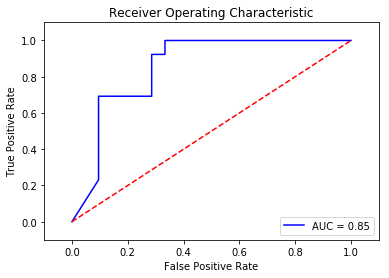

20  test  16050  acc=  0.7058824  loss =  0.5657338  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  16100  acc=  0.7352941  loss =  0.5509313  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  16150  acc=  0.7058824  loss =  0.5623696  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  16200  acc=  0.7058824  loss =  0.55851746  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  16250  acc=  0.7352941  loss =  0.5473354  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  16300  acc=  0.7058824  loss =  0.566081  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  16350  acc=  0.7058824  loss =  0.5615309  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  16400  acc=  0.7058824  loss =  0.55917525  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  16450  acc=  0.7058824  loss =  0.5581483  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  16500  acc=  0.7058824  loss =  0.55789423  sen:  0.6

20  test  19950  acc=  0.7058824  loss =  0.5556315  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  20000  acc=  0.7058824  loss =  0.55870146  sen:  0.6923076923076923  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


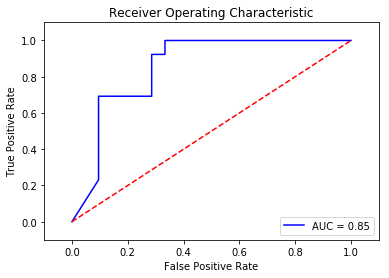

20  test  20050  acc=  0.7352941  loss =  0.5503373  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  20100  acc=  0.7058824  loss =  0.5546356  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  20150  acc=  0.7058824  loss =  0.55230576  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  20200  acc=  0.7058824  loss =  0.55136895  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  20250  acc=  0.7352941  loss =  0.5487844  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  20300  acc=  0.7352941  loss =  0.5550923  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  20350  acc=  0.7058824  loss =  0.55689114  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  20400  acc=  0.7058824  loss =  0.559566  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  20450  acc=  0.7352941  loss =  0.55177057  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  20500  acc=  0.7352941  loss =  0.558941  sen:  0.6

20  test  23950  acc=  0.7352941  loss =  0.5559695  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  24000  acc=  0.7058824  loss =  0.5572176  sen:  0.6923076923076923  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


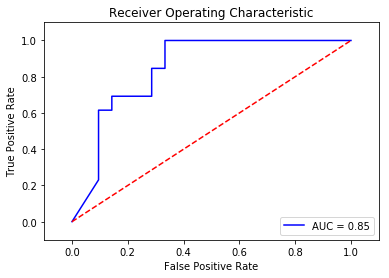

20  test  24050  acc=  0.7058824  loss =  0.56231713  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  24100  acc=  0.7352941  loss =  0.5567584  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  24150  acc=  0.7058824  loss =  0.5591628  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  24200  acc=  0.7352941  loss =  0.5500187  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  24250  acc=  0.7352941  loss =  0.558887  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  24300  acc=  0.7352941  loss =  0.55740666  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  24350  acc=  0.7352941  loss =  0.55757695  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  24400  acc=  0.7352941  loss =  0.5489896  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  24450  acc=  0.7352941  loss =  0.545923  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  24500  acc=  0.7352941  loss =  0.55643344  sen:  0.6

20  test  27950  acc=  0.7352941  loss =  0.55994254  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  28000  acc=  0.7352941  loss =  0.55543333  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


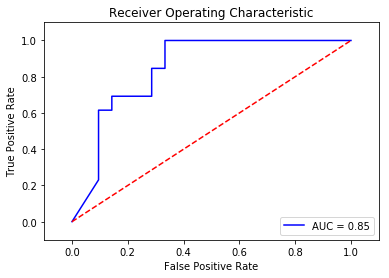

20  test  28050  acc=  0.7352941  loss =  0.5512385  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  28100  acc=  0.7352941  loss =  0.5564766  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  28150  acc=  0.7352941  loss =  0.56017894  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  28200  acc=  0.7352941  loss =  0.55456185  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  28250  acc=  0.7352941  loss =  0.55402803  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  28300  acc=  0.7352941  loss =  0.55857474  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  28350  acc=  0.7058824  loss =  0.5602426  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  28400  acc=  0.7058824  loss =  0.5650959  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  28450  acc=  0.7058824  loss =  0.55284894  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  28500  acc=  0.7352941  loss =  0.54844767  sen: 

20  test  31950  acc=  0.7058824  loss =  0.5718323  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  32000  acc=  0.7058824  loss =  0.5627561  sen:  0.6923076923076923  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


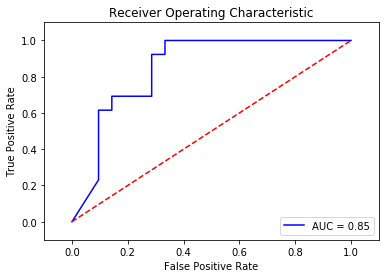

20  test  32050  acc=  0.7058824  loss =  0.56464595  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  32100  acc=  0.7058824  loss =  0.5589766  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  32150  acc=  0.7058824  loss =  0.5594819  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  32200  acc=  0.7058824  loss =  0.56102115  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  32250  acc=  0.7058824  loss =  0.5673738  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  32300  acc=  0.7058824  loss =  0.5670425  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  32350  acc=  0.7058824  loss =  0.5641386  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  32400  acc=  0.7058824  loss =  0.55936086  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  32450  acc=  0.7058824  loss =  0.5631566  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  32500  acc=  0.7058824  loss =  0.5647391  sen:  0.

20  test  35950  acc=  0.7058824  loss =  0.56617254  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  36000  acc=  0.7058824  loss =  0.5655407  sen:  0.6923076923076923  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


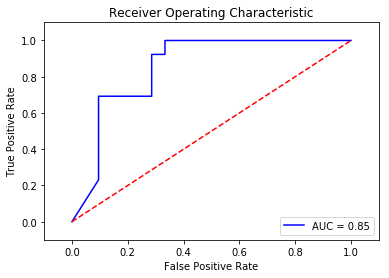

20  test  36050  acc=  0.7058824  loss =  0.5557462  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  36100  acc=  0.7058824  loss =  0.56138194  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  36150  acc=  0.7352941  loss =  0.55048233  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  36200  acc=  0.7058824  loss =  0.55851793  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  36250  acc=  0.7058824  loss =  0.56227314  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  36300  acc=  0.7058824  loss =  0.5626073  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  36350  acc=  0.7647059  loss =  0.5378434  sen:  0.6923076923076923  spe:  0.8095238095238095
20  test  36400  acc=  0.7058824  loss =  0.56219786  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  36450  acc=  0.7058824  loss =  0.56198126  sen:  0.6923076923076923  spe:  0.7142857142857143
20  test  36500  acc=  0.7058824  loss =  0.5565148  sen: 

20  test  39950  acc=  0.7352941  loss =  0.5577011  sen:  0.6923076923076923  spe:  0.7619047619047619
20  test  40000  acc=  0.7058824  loss =  0.5491876  sen:  0.6923076923076923  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


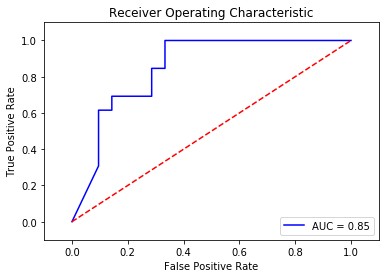

21  test  0  acc=  0.38235295  loss =  0.7182702  sen:  1.0  spe:  0.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


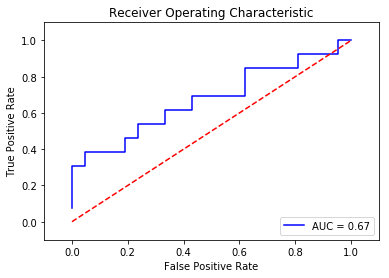

21  test  50  acc=  0.61764705  loss =  0.66065437  sen:  0.7692307692307693  spe:  0.5238095238095238
21  test  100  acc=  0.5882353  loss =  0.66773313  sen:  0.7692307692307693  spe:  0.47619047619047616
21  test  150  acc=  0.5882353  loss =  0.65157884  sen:  0.7692307692307693  spe:  0.47619047619047616
21  test  200  acc=  0.7058824  loss =  0.6429312  sen:  0.7692307692307693  spe:  0.6666666666666666
21  test  250  acc=  0.6764706  loss =  0.63764226  sen:  0.7692307692307693  spe:  0.6190476190476191
21  test  300  acc=  0.6764706  loss =  0.6395681  sen:  0.7692307692307693  spe:  0.6190476190476191
21  test  350  acc=  0.61764705  loss =  0.6469418  sen:  0.7692307692307693  spe:  0.5238095238095238
21  test  400  acc=  0.7647059  loss =  0.6240716  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  450  acc=  0.64705884  loss =  0.62857944  sen:  0.7692307692307693  spe:  0.5714285714285714
21  test  500  acc=  0.7058824  loss =  0.6196768  sen:  0.76923076923076

21  test  4000  acc=  0.7647059  loss =  0.5307512  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


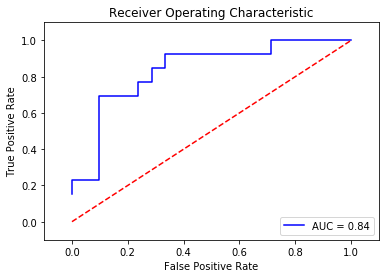

21  test  4050  acc=  0.7352941  loss =  0.5309414  sen:  0.6923076923076923  spe:  0.7619047619047619
21  test  4100  acc=  0.8235294  loss =  0.50957394  sen:  0.7692307692307693  spe:  0.8571428571428571
21  test  4150  acc=  0.7647059  loss =  0.5163021  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  4200  acc=  0.7647059  loss =  0.51420057  sen:  0.6923076923076923  spe:  0.8095238095238095
21  test  4250  acc=  0.7647059  loss =  0.5146892  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  4300  acc=  0.7647059  loss =  0.52058256  sen:  0.6923076923076923  spe:  0.8095238095238095
21  test  4350  acc=  0.7647059  loss =  0.51910114  sen:  0.6923076923076923  spe:  0.8095238095238095
21  test  4400  acc=  0.7941176  loss =  0.5238629  sen:  0.6923076923076923  spe:  0.8571428571428571
21  test  4450  acc=  0.7647059  loss =  0.5360413  sen:  0.6923076923076923  spe:  0.8095238095238095
21  test  4500  acc=  0.7647059  loss =  0.5182403  sen:  0.769230769

21  test  7950  acc=  0.7941176  loss =  0.51398915  sen:  0.7692307692307693  spe:  0.8095238095238095
21  test  8000  acc=  0.7647059  loss =  0.51742643  sen:  0.6923076923076923  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


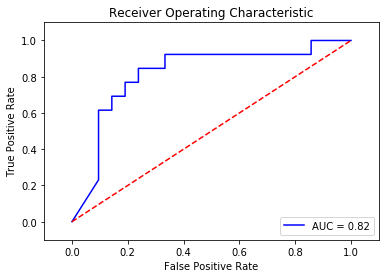

21  test  8050  acc=  0.7647059  loss =  0.5488659  sen:  0.6923076923076923  spe:  0.8095238095238095
21  test  8100  acc=  0.7941176  loss =  0.5221331  sen:  0.7692307692307693  spe:  0.8095238095238095
21  test  8150  acc=  0.7352941  loss =  0.557236  sen:  0.6153846153846154  spe:  0.8095238095238095
21  test  8200  acc=  0.7647059  loss =  0.52262235  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  8250  acc=  0.7647059  loss =  0.5241504  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  8300  acc=  0.7647059  loss =  0.54345345  sen:  0.6923076923076923  spe:  0.8095238095238095
21  test  8350  acc=  0.7941176  loss =  0.5188594  sen:  0.7692307692307693  spe:  0.8095238095238095
21  test  8400  acc=  0.7941176  loss =  0.5158973  sen:  0.7692307692307693  spe:  0.8095238095238095
21  test  8450  acc=  0.7941176  loss =  0.51437443  sen:  0.7692307692307693  spe:  0.8095238095238095
21  test  8500  acc=  0.7647059  loss =  0.5283334  sen:  0.69230769230

21  test  11950  acc=  0.7647059  loss =  0.52350706  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  12000  acc=  0.7941176  loss =  0.5155975  sen:  0.7692307692307693  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


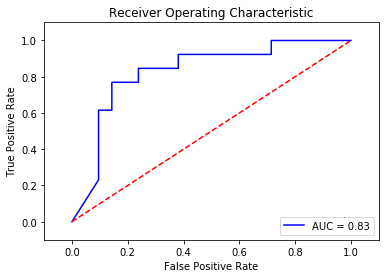

21  test  12050  acc=  0.7941176  loss =  0.51847196  sen:  0.7692307692307693  spe:  0.8095238095238095
21  test  12100  acc=  0.7941176  loss =  0.52543825  sen:  0.7692307692307693  spe:  0.8095238095238095
21  test  12150  acc=  0.7647059  loss =  0.53147715  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  12200  acc=  0.7647059  loss =  0.5251683  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  12250  acc=  0.7941176  loss =  0.5325608  sen:  0.7692307692307693  spe:  0.8095238095238095
21  test  12300  acc=  0.7647059  loss =  0.53171754  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  12350  acc=  0.7352941  loss =  0.5367222  sen:  0.6153846153846154  spe:  0.8095238095238095
21  test  12400  acc=  0.7941176  loss =  0.5263578  sen:  0.7692307692307693  spe:  0.8095238095238095
21  test  12450  acc=  0.7941176  loss =  0.52385664  sen:  0.7692307692307693  spe:  0.8095238095238095
21  test  12500  acc=  0.7647059  loss =  0.52324855  sen: 

21  test  15950  acc=  0.7647059  loss =  0.53170556  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  16000  acc=  0.7647059  loss =  0.5314827  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


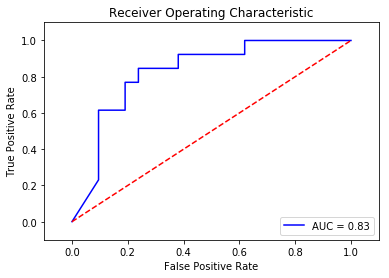

21  test  16050  acc=  0.7647059  loss =  0.52716404  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  16100  acc=  0.7647059  loss =  0.5316816  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  16150  acc=  0.7058824  loss =  0.543868  sen:  0.6153846153846154  spe:  0.7619047619047619
21  test  16200  acc=  0.7647059  loss =  0.52915716  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  16250  acc=  0.7647059  loss =  0.5274707  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  16300  acc=  0.7647059  loss =  0.52694345  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  16350  acc=  0.7647059  loss =  0.52685237  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  16400  acc=  0.7647059  loss =  0.53876287  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  16450  acc=  0.7647059  loss =  0.53670603  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  16500  acc=  0.7352941  loss =  0.5472308  sen:  

21  test  19950  acc=  0.7647059  loss =  0.5434395  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  20000  acc=  0.7647059  loss =  0.5363857  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


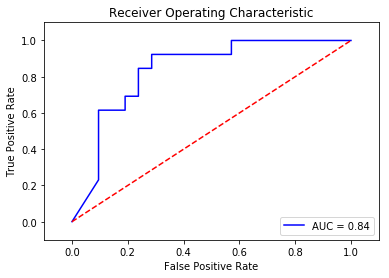

21  test  20050  acc=  0.7647059  loss =  0.5318175  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  20100  acc=  0.7647059  loss =  0.5387022  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  20150  acc=  0.7647059  loss =  0.54022014  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  20200  acc=  0.7647059  loss =  0.53758675  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  20250  acc=  0.7647059  loss =  0.53591347  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  20300  acc=  0.7647059  loss =  0.5368246  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  20350  acc=  0.7647059  loss =  0.5309794  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  20400  acc=  0.7647059  loss =  0.53904086  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  20450  acc=  0.7647059  loss =  0.53488  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  20500  acc=  0.7647059  loss =  0.5286002  sen:  0.7

21  test  23950  acc=  0.7647059  loss =  0.528811  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  24000  acc=  0.7647059  loss =  0.52849907  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


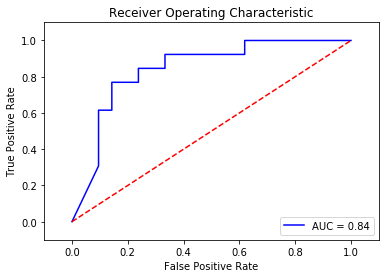

21  test  24050  acc=  0.7647059  loss =  0.52539253  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  24100  acc=  0.7647059  loss =  0.53422225  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  24150  acc=  0.7647059  loss =  0.5323723  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  24200  acc=  0.7647059  loss =  0.52623266  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  24250  acc=  0.7647059  loss =  0.5344046  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  24300  acc=  0.7647059  loss =  0.5304943  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  24350  acc=  0.7647059  loss =  0.5305739  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  24400  acc=  0.7647059  loss =  0.53502756  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  24450  acc=  0.7647059  loss =  0.53626966  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  24500  acc=  0.7647059  loss =  0.52971196  sen: 

21  test  27950  acc=  0.7647059  loss =  0.52937263  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  28000  acc=  0.7647059  loss =  0.5367918  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


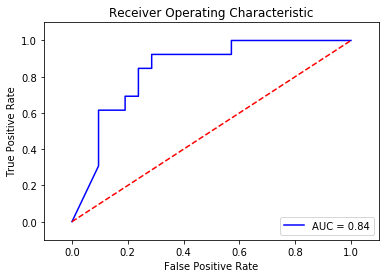

21  test  28050  acc=  0.7647059  loss =  0.53630346  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  28100  acc=  0.7647059  loss =  0.5302527  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  28150  acc=  0.7647059  loss =  0.5283047  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  28200  acc=  0.7647059  loss =  0.5397848  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  28250  acc=  0.7647059  loss =  0.5364645  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  28300  acc=  0.7647059  loss =  0.5344844  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  28350  acc=  0.7647059  loss =  0.5338431  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  28400  acc=  0.7647059  loss =  0.5338028  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  28450  acc=  0.7647059  loss =  0.53225785  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  28500  acc=  0.7647059  loss =  0.52898455  sen:  0.

21  test  31950  acc=  0.7647059  loss =  0.53944534  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  32000  acc=  0.7352941  loss =  0.5530257  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0]


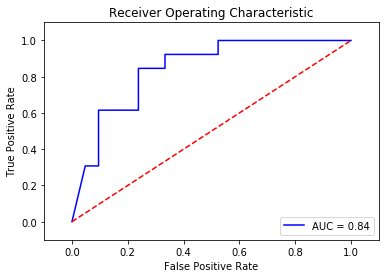

21  test  32050  acc=  0.7647059  loss =  0.53919345  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  32100  acc=  0.7647059  loss =  0.54039776  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  32150  acc=  0.7647059  loss =  0.5404689  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  32200  acc=  0.7647059  loss =  0.53834486  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  32250  acc=  0.7352941  loss =  0.5554512  sen:  0.6923076923076923  spe:  0.7619047619047619
21  test  32300  acc=  0.7647059  loss =  0.5380354  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  32350  acc=  0.7647059  loss =  0.53763574  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  32400  acc=  0.7352941  loss =  0.5549334  sen:  0.6923076923076923  spe:  0.7619047619047619
21  test  32450  acc=  0.7647059  loss =  0.5398623  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  32500  acc=  0.7647059  loss =  0.5387733  sen:  0

21  test  35950  acc=  0.7647059  loss =  0.5318364  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  36000  acc=  0.7647059  loss =  0.53527  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


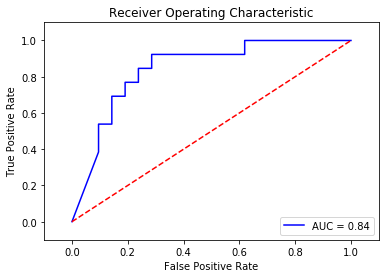

21  test  36050  acc=  0.7647059  loss =  0.53539395  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  36100  acc=  0.7647059  loss =  0.5372671  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  36150  acc=  0.7647059  loss =  0.53276366  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  36200  acc=  0.7647059  loss =  0.5372615  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  36250  acc=  0.7647059  loss =  0.5365626  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  36300  acc=  0.7647059  loss =  0.5362246  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  36350  acc=  0.7647059  loss =  0.53693825  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  36400  acc=  0.7647059  loss =  0.5381322  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  36450  acc=  0.7647059  loss =  0.5390688  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  36500  acc=  0.7647059  loss =  0.54634607  sen:  0

21  test  39950  acc=  0.7647059  loss =  0.53347933  sen:  0.7692307692307693  spe:  0.7619047619047619
21  test  40000  acc=  0.7647059  loss =  0.5355016  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


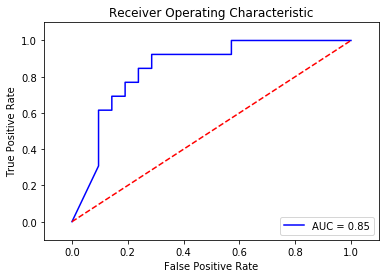

22  test  0  acc=  0.5294118  loss =  0.70602673  sen:  0.23076923076923078  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0]


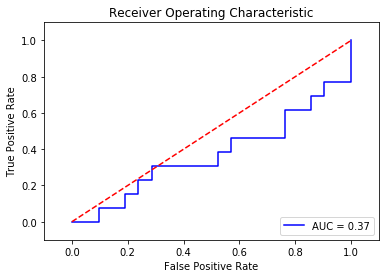

22  test  50  acc=  0.61764705  loss =  0.67921734  sen:  0.46153846153846156  spe:  0.7142857142857143
22  test  100  acc=  0.61764705  loss =  0.67223316  sen:  0.6923076923076923  spe:  0.5714285714285714
22  test  150  acc=  0.64705884  loss =  0.6681699  sen:  0.7692307692307693  spe:  0.5714285714285714
22  test  200  acc=  0.6764706  loss =  0.6676384  sen:  0.7692307692307693  spe:  0.6190476190476191
22  test  250  acc=  0.61764705  loss =  0.6425937  sen:  0.5384615384615384  spe:  0.6666666666666666
22  test  300  acc=  0.61764705  loss =  0.64379376  sen:  0.6153846153846154  spe:  0.6190476190476191
22  test  350  acc=  0.64705884  loss =  0.6479661  sen:  0.6923076923076923  spe:  0.6190476190476191
22  test  400  acc=  0.64705884  loss =  0.6358125  sen:  0.6153846153846154  spe:  0.6666666666666666
22  test  450  acc=  0.6764706  loss =  0.63658154  sen:  0.6923076923076923  spe:  0.6666666666666666
22  test  500  acc=  0.6764706  loss =  0.63507545  sen:  0.69230769230

22  test  4000  acc=  0.64705884  loss =  0.577423  sen:  0.6923076923076923  spe:  0.6190476190476191
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


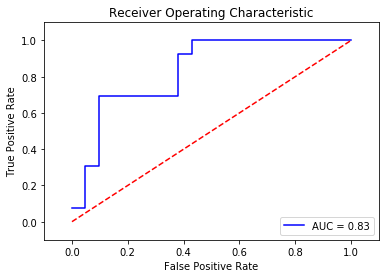

22  test  4050  acc=  0.6764706  loss =  0.57920647  sen:  0.7692307692307693  spe:  0.6190476190476191
22  test  4100  acc=  0.6764706  loss =  0.57241714  sen:  0.7692307692307693  spe:  0.6190476190476191
22  test  4150  acc=  0.7058824  loss =  0.55100936  sen:  0.6923076923076923  spe:  0.7142857142857143
22  test  4200  acc=  0.7058824  loss =  0.56442916  sen:  0.7692307692307693  spe:  0.6666666666666666
22  test  4250  acc=  0.7058824  loss =  0.5707424  sen:  0.6923076923076923  spe:  0.7142857142857143
22  test  4300  acc=  0.6764706  loss =  0.580389  sen:  0.7692307692307693  spe:  0.6190476190476191
22  test  4350  acc=  0.6764706  loss =  0.57210016  sen:  0.7692307692307693  spe:  0.6190476190476191
22  test  4400  acc=  0.7058824  loss =  0.5709121  sen:  0.7692307692307693  spe:  0.6666666666666666
22  test  4450  acc=  0.6764706  loss =  0.5718541  sen:  0.6923076923076923  spe:  0.6666666666666666
22  test  4500  acc=  0.6764706  loss =  0.5730443  sen:  0.692307692

22  test  7950  acc=  0.7647059  loss =  0.5507846  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  8000  acc=  0.7058824  loss =  0.55283415  sen:  0.6923076923076923  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


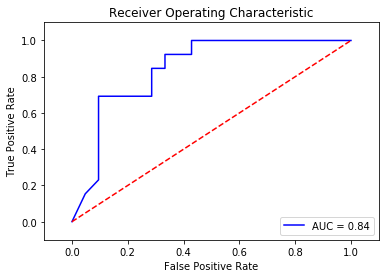

22  test  8050  acc=  0.7647059  loss =  0.55205756  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  8100  acc=  0.7058824  loss =  0.5588107  sen:  0.6923076923076923  spe:  0.7142857142857143
22  test  8150  acc=  0.7058824  loss =  0.5554255  sen:  0.6923076923076923  spe:  0.7142857142857143
22  test  8200  acc=  0.7352941  loss =  0.55545366  sen:  0.7692307692307693  spe:  0.7142857142857143
22  test  8250  acc=  0.7058824  loss =  0.55483985  sen:  0.6923076923076923  spe:  0.7142857142857143
22  test  8300  acc=  0.7352941  loss =  0.55700177  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  8350  acc=  0.7058824  loss =  0.5605545  sen:  0.6923076923076923  spe:  0.7142857142857143
22  test  8400  acc=  0.7352941  loss =  0.55073315  sen:  0.7692307692307693  spe:  0.7142857142857143
22  test  8450  acc=  0.7647059  loss =  0.55949616  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  8500  acc=  0.7352941  loss =  0.55082947  sen:  0.692307

22  test  11950  acc=  0.7058824  loss =  0.54845774  sen:  0.6923076923076923  spe:  0.7142857142857143
22  test  12000  acc=  0.7058824  loss =  0.53849065  sen:  0.6923076923076923  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


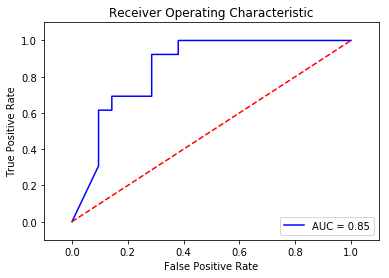

22  test  12050  acc=  0.7352941  loss =  0.54291  sen:  0.7692307692307693  spe:  0.7142857142857143
22  test  12100  acc=  0.7058824  loss =  0.5633017  sen:  0.6923076923076923  spe:  0.7142857142857143
22  test  12150  acc=  0.7058824  loss =  0.55793434  sen:  0.6923076923076923  spe:  0.7142857142857143
22  test  12200  acc=  0.7352941  loss =  0.54101396  sen:  0.7692307692307693  spe:  0.7142857142857143
22  test  12250  acc=  0.7058824  loss =  0.5519057  sen:  0.6923076923076923  spe:  0.7142857142857143
22  test  12300  acc=  0.7058824  loss =  0.5520071  sen:  0.6923076923076923  spe:  0.7142857142857143
22  test  12350  acc=  0.7058824  loss =  0.5459219  sen:  0.6923076923076923  spe:  0.7142857142857143
22  test  12400  acc=  0.7352941  loss =  0.5375121  sen:  0.7692307692307693  spe:  0.7142857142857143
22  test  12450  acc=  0.7058824  loss =  0.55454415  sen:  0.6923076923076923  spe:  0.7142857142857143
22  test  12500  acc=  0.7352941  loss =  0.5410698  sen:  0.76

22  test  15950  acc=  0.7647059  loss =  0.53142655  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  16000  acc=  0.7352941  loss =  0.53791803  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


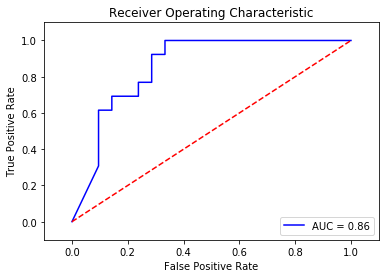

22  test  16050  acc=  0.7352941  loss =  0.5261464  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  16100  acc=  0.7352941  loss =  0.5356678  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  16150  acc=  0.7352941  loss =  0.5322529  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  16200  acc=  0.7647059  loss =  0.53299254  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  16250  acc=  0.7352941  loss =  0.53897476  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  16300  acc=  0.7352941  loss =  0.5358137  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  16350  acc=  0.7647059  loss =  0.5398702  sen:  0.6923076923076923  spe:  0.8095238095238095
22  test  16400  acc=  0.7352941  loss =  0.534701  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  16450  acc=  0.7352941  loss =  0.535056  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  16500  acc=  0.7352941  loss =  0.53046054  sen:  0.69

22  test  19950  acc=  0.7352941  loss =  0.54180765  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  20000  acc=  0.7352941  loss =  0.5394667  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


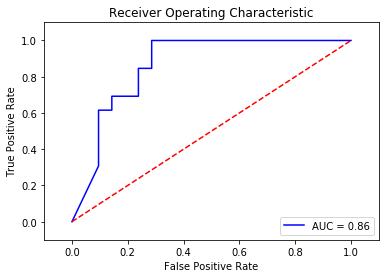

22  test  20050  acc=  0.7352941  loss =  0.53658426  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  20100  acc=  0.7352941  loss =  0.54138976  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  20150  acc=  0.7647059  loss =  0.533731  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  20200  acc=  0.7352941  loss =  0.5463197  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  20250  acc=  0.7352941  loss =  0.5336587  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  20300  acc=  0.7352941  loss =  0.53883564  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  20350  acc=  0.7352941  loss =  0.53101957  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  20400  acc=  0.7352941  loss =  0.5357108  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  20450  acc=  0.7352941  loss =  0.5352164  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  20500  acc=  0.7352941  loss =  0.5375814  sen:  0.

22  test  23950  acc=  0.7647059  loss =  0.5254272  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  24000  acc=  0.7647059  loss =  0.5247584  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


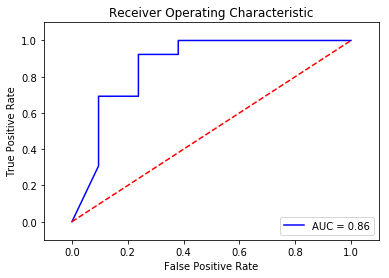

22  test  24050  acc=  0.7352941  loss =  0.53144866  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  24100  acc=  0.7647059  loss =  0.5321721  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  24150  acc=  0.7647059  loss =  0.5302759  sen:  0.6923076923076923  spe:  0.8095238095238095
22  test  24200  acc=  0.7647059  loss =  0.5362686  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  24250  acc=  0.7647059  loss =  0.5306939  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  24300  acc=  0.7352941  loss =  0.53900325  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  24350  acc=  0.7352941  loss =  0.5406755  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  24400  acc=  0.7352941  loss =  0.536115  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  24450  acc=  0.7647059  loss =  0.532737  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  24500  acc=  0.7352941  loss =  0.5332288  sen:  0.692

22  test  27950  acc=  0.7352941  loss =  0.5311614  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  28000  acc=  0.7352941  loss =  0.5337312  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


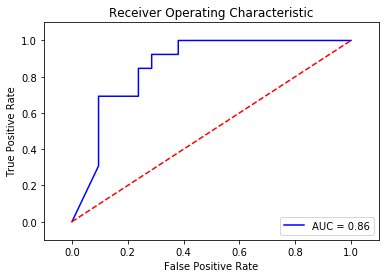

22  test  28050  acc=  0.7352941  loss =  0.53558785  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  28100  acc=  0.7352941  loss =  0.5367264  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  28150  acc=  0.7352941  loss =  0.53368354  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  28200  acc=  0.7352941  loss =  0.53599805  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  28250  acc=  0.7352941  loss =  0.53828275  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  28300  acc=  0.7352941  loss =  0.5362965  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  28350  acc=  0.7647059  loss =  0.52778137  sen:  0.6923076923076923  spe:  0.8095238095238095
22  test  28400  acc=  0.7647059  loss =  0.5271833  sen:  0.6923076923076923  spe:  0.8095238095238095
22  test  28450  acc=  0.7647059  loss =  0.5267165  sen:  0.6923076923076923  spe:  0.8095238095238095
22  test  28500  acc=  0.7352941  loss =  0.52373224  sen: 

22  test  31950  acc=  0.7647059  loss =  0.5333353  sen:  0.6923076923076923  spe:  0.8095238095238095
22  test  32000  acc=  0.7352941  loss =  0.5336699  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


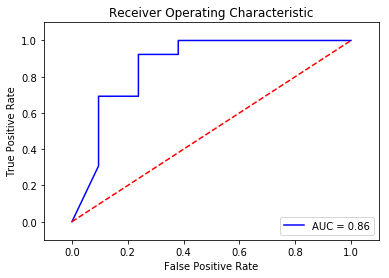

22  test  32050  acc=  0.7647059  loss =  0.52911246  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  32100  acc=  0.7941176  loss =  0.5124873  sen:  0.7692307692307693  spe:  0.8095238095238095
22  test  32150  acc=  0.7647059  loss =  0.5232862  sen:  0.6923076923076923  spe:  0.8095238095238095
22  test  32200  acc=  0.7647059  loss =  0.5219013  sen:  0.6923076923076923  spe:  0.8095238095238095
22  test  32250  acc=  0.7647059  loss =  0.52037513  sen:  0.6923076923076923  spe:  0.8095238095238095
22  test  32300  acc=  0.7647059  loss =  0.5246769  sen:  0.6923076923076923  spe:  0.8095238095238095
22  test  32350  acc=  0.7352941  loss =  0.5325074  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  32400  acc=  0.7647059  loss =  0.5267795  sen:  0.6923076923076923  spe:  0.8095238095238095
22  test  32450  acc=  0.7941176  loss =  0.5187998  sen:  0.7692307692307693  spe:  0.8095238095238095
22  test  32500  acc=  0.7352941  loss =  0.52489686  sen:  0.

22  test  35950  acc=  0.7352941  loss =  0.5316589  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  36000  acc=  0.7352941  loss =  0.5293479  sen:  0.6923076923076923  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


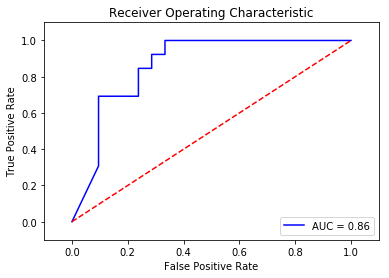

22  test  36050  acc=  0.7352941  loss =  0.5314704  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  36100  acc=  0.7647059  loss =  0.53332853  sen:  0.6923076923076923  spe:  0.8095238095238095
22  test  36150  acc=  0.7352941  loss =  0.5345413  sen:  0.6923076923076923  spe:  0.7619047619047619
22  test  36200  acc=  0.7647059  loss =  0.5198584  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  36250  acc=  0.7647059  loss =  0.5244724  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  36300  acc=  0.7647059  loss =  0.5259665  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  36350  acc=  0.7647059  loss =  0.52376723  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  36400  acc=  0.7647059  loss =  0.5277634  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  36450  acc=  0.7647059  loss =  0.5301093  sen:  0.7692307692307693  spe:  0.7619047619047619
22  test  36500  acc=  0.7647059  loss =  0.5222538  sen:  0.7

22  test  39950  acc=  0.7647059  loss =  0.5271052  sen:  0.6923076923076923  spe:  0.8095238095238095
22  test  40000  acc=  0.7647059  loss =  0.5283446  sen:  0.6923076923076923  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]


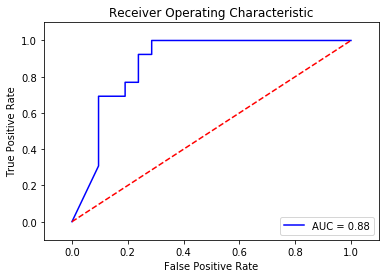

23  test  0  acc=  0.5588235  loss =  0.6785385  sen:  0.7692307692307693  spe:  0.42857142857142855
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1]


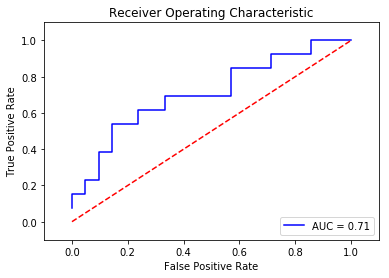

23  test  50  acc=  0.64705884  loss =  0.6501721  sen:  0.6923076923076923  spe:  0.6190476190476191
23  test  100  acc=  0.6764706  loss =  0.63948965  sen:  0.6923076923076923  spe:  0.6666666666666666
23  test  150  acc=  0.7352941  loss =  0.62554216  sen:  0.6923076923076923  spe:  0.7619047619047619
23  test  200  acc=  0.64705884  loss =  0.63638175  sen:  0.6923076923076923  spe:  0.6190476190476191
23  test  250  acc=  0.64705884  loss =  0.63173854  sen:  0.6923076923076923  spe:  0.6190476190476191
23  test  300  acc=  0.7058824  loss =  0.62366295  sen:  0.6923076923076923  spe:  0.7142857142857143
23  test  350  acc=  0.6764706  loss =  0.63059205  sen:  0.7692307692307693  spe:  0.6190476190476191
23  test  400  acc=  0.6764706  loss =  0.6291684  sen:  0.7692307692307693  spe:  0.6190476190476191
23  test  450  acc=  0.6764706  loss =  0.6276261  sen:  0.7692307692307693  spe:  0.6190476190476191
23  test  500  acc=  0.6764706  loss =  0.61937493  sen:  0.76923076923076

23  test  4000  acc=  0.7941176  loss =  0.54160386  sen:  0.7692307692307693  spe:  0.8095238095238095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


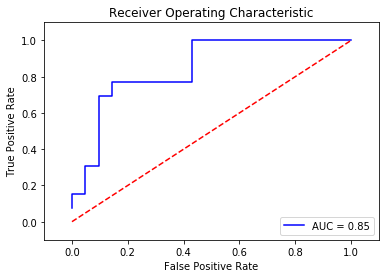

23  test  4050  acc=  0.8235294  loss =  0.5315585  sen:  0.8461538461538461  spe:  0.8095238095238095
23  test  4100  acc=  0.7941176  loss =  0.53063154  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  4150  acc=  0.7647059  loss =  0.53067595  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  4200  acc=  0.7647059  loss =  0.5315131  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  4250  acc=  0.7941176  loss =  0.5264262  sen:  0.7692307692307693  spe:  0.8095238095238095
23  test  4300  acc=  0.7941176  loss =  0.5263629  sen:  0.7692307692307693  spe:  0.8095238095238095
23  test  4350  acc=  0.7941176  loss =  0.52482915  sen:  0.7692307692307693  spe:  0.8095238095238095
23  test  4400  acc=  0.7647059  loss =  0.5310443  sen:  0.8461538461538461  spe:  0.7142857142857143
23  test  4450  acc=  0.7941176  loss =  0.5306918  sen:  0.7692307692307693  spe:  0.8095238095238095
23  test  4500  acc=  0.7941176  loss =  0.52283055  sen:  0.769230769

23  test  7950  acc=  0.7941176  loss =  0.5077045  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  8000  acc=  0.7941176  loss =  0.50132227  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1]


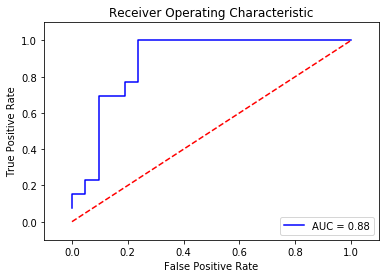

23  test  8050  acc=  0.7941176  loss =  0.5068086  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  8100  acc=  0.7647059  loss =  0.5081175  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  8150  acc=  0.7941176  loss =  0.50681525  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  8200  acc=  0.8235294  loss =  0.50379527  sen:  0.9230769230769231  spe:  0.7619047619047619
23  test  8250  acc=  0.7941176  loss =  0.50386506  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  8300  acc=  0.7941176  loss =  0.5054293  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  8350  acc=  0.7941176  loss =  0.50661874  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  8400  acc=  0.7941176  loss =  0.50415164  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  8450  acc=  0.7647059  loss =  0.5110991  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  8500  acc=  0.7941176  loss =  0.5079286  sen:  0.84615384

23  test  11950  acc=  0.7647059  loss =  0.5141215  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  12000  acc=  0.7941176  loss =  0.5049026  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1]


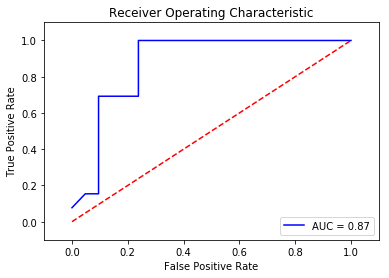

23  test  12050  acc=  0.8235294  loss =  0.50661  sen:  0.9230769230769231  spe:  0.7619047619047619
23  test  12100  acc=  0.7941176  loss =  0.50588995  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  12150  acc=  0.7941176  loss =  0.5073186  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  12200  acc=  0.7941176  loss =  0.50812674  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  12250  acc=  0.7941176  loss =  0.51432747  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  12300  acc=  0.7941176  loss =  0.51012945  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  12350  acc=  0.7941176  loss =  0.5103098  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  12400  acc=  0.7941176  loss =  0.5025638  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  12450  acc=  0.7647059  loss =  0.5121644  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  12500  acc=  0.7647059  loss =  0.5100158  sen:  0.7

23  test  15950  acc=  0.7941176  loss =  0.51041716  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  16000  acc=  0.7647059  loss =  0.52119935  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


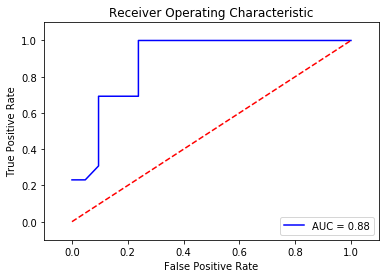

23  test  16050  acc=  0.7647059  loss =  0.5192399  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  16100  acc=  0.7941176  loss =  0.5085579  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  16150  acc=  0.7941176  loss =  0.50674653  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  16200  acc=  0.8235294  loss =  0.5006719  sen:  0.9230769230769231  spe:  0.7619047619047619
23  test  16250  acc=  0.7941176  loss =  0.5106631  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  16300  acc=  0.7941176  loss =  0.51912004  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  16350  acc=  0.7941176  loss =  0.5069974  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  16400  acc=  0.7941176  loss =  0.5101085  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  16450  acc=  0.8235294  loss =  0.5009651  sen:  0.9230769230769231  spe:  0.7619047619047619
23  test  16500  acc=  0.7647059  loss =  0.5166078  sen:  0.7

23  test  19950  acc=  0.7647059  loss =  0.52252454  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  20000  acc=  0.7647059  loss =  0.51863873  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


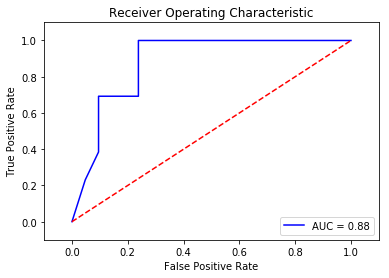

23  test  20050  acc=  0.7647059  loss =  0.5348527  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  20100  acc=  0.7647059  loss =  0.5296694  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  20150  acc=  0.7647059  loss =  0.51352286  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  20200  acc=  0.7647059  loss =  0.52254754  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  20250  acc=  0.7647059  loss =  0.5174425  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  20300  acc=  0.7647059  loss =  0.5165814  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  20350  acc=  0.7647059  loss =  0.52244383  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  20400  acc=  0.7647059  loss =  0.52912366  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  20450  acc=  0.7647059  loss =  0.5228349  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  20500  acc=  0.7941176  loss =  0.51015747  sen:  

23  test  23950  acc=  0.7647059  loss =  0.51696336  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  24000  acc=  0.7647059  loss =  0.514051  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


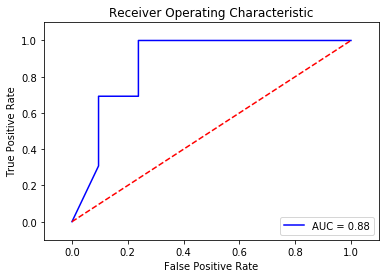

23  test  24050  acc=  0.7647059  loss =  0.5154809  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  24100  acc=  0.7647059  loss =  0.516737  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  24150  acc=  0.7647059  loss =  0.52096397  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  24200  acc=  0.7647059  loss =  0.51959276  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  24250  acc=  0.7647059  loss =  0.51269555  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  24300  acc=  0.7647059  loss =  0.51757133  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  24350  acc=  0.7647059  loss =  0.51867723  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  24400  acc=  0.7941176  loss =  0.51178175  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  24450  acc=  0.7647059  loss =  0.52212936  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  24500  acc=  0.7647059  loss =  0.52148557  sen:

23  test  27950  acc=  0.7941176  loss =  0.5140731  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  28000  acc=  0.7647059  loss =  0.5181275  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


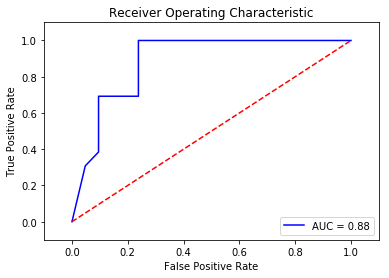

23  test  28050  acc=  0.7647059  loss =  0.52594894  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  28100  acc=  0.7647059  loss =  0.52368253  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  28150  acc=  0.7647059  loss =  0.51675415  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  28200  acc=  0.7647059  loss =  0.5207119  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  28250  acc=  0.7941176  loss =  0.5128122  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  28300  acc=  0.7647059  loss =  0.5236629  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  28350  acc=  0.7647059  loss =  0.52603024  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  28400  acc=  0.7647059  loss =  0.5182902  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  28450  acc=  0.7647059  loss =  0.5213601  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  28500  acc=  0.7647059  loss =  0.5251491  sen:  0

23  test  31950  acc=  0.7647059  loss =  0.527298  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  32000  acc=  0.7647059  loss =  0.5191081  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


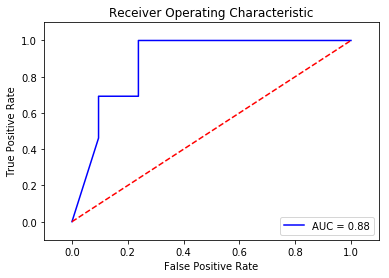

23  test  32050  acc=  0.7647059  loss =  0.5265298  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  32100  acc=  0.7647059  loss =  0.5227854  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  32150  acc=  0.7647059  loss =  0.528858  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  32200  acc=  0.7647059  loss =  0.5270886  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  32250  acc=  0.7647059  loss =  0.5230193  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  32300  acc=  0.7647059  loss =  0.5237109  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  32350  acc=  0.7647059  loss =  0.5228215  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  32400  acc=  0.7647059  loss =  0.5308295  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  32450  acc=  0.7647059  loss =  0.52356887  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  32500  acc=  0.7647059  loss =  0.5261573  sen:  0.769

23  test  35950  acc=  0.7647059  loss =  0.5253694  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  36000  acc=  0.7647059  loss =  0.52702826  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


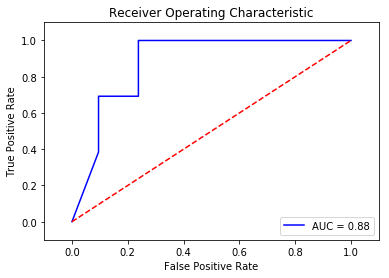

23  test  36050  acc=  0.7647059  loss =  0.5222751  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  36100  acc=  0.7647059  loss =  0.52601695  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  36150  acc=  0.7941176  loss =  0.5161086  sen:  0.8461538461538461  spe:  0.7619047619047619
23  test  36200  acc=  0.7647059  loss =  0.5177934  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  36250  acc=  0.7647059  loss =  0.5194261  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  36300  acc=  0.7647059  loss =  0.52319586  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  36350  acc=  0.7647059  loss =  0.52917284  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  36400  acc=  0.7647059  loss =  0.5336932  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  36450  acc=  0.7647059  loss =  0.5280367  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  36500  acc=  0.7647059  loss =  0.5294517  sen:  0.

23  test  39950  acc=  0.7647059  loss =  0.527856  sen:  0.7692307692307693  spe:  0.7619047619047619
23  test  40000  acc=  0.7647059  loss =  0.53083485  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


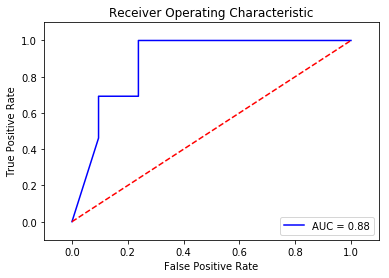

24  test  0  acc=  0.4117647  loss =  0.7014497  sen:  0.8461538461538461  spe:  0.14285714285714285
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1]


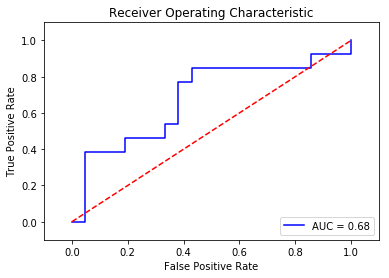

24  test  50  acc=  0.61764705  loss =  0.6625767  sen:  0.6153846153846154  spe:  0.6190476190476191
24  test  100  acc=  0.7058824  loss =  0.65273803  sen:  0.6923076923076923  spe:  0.7142857142857143
24  test  150  acc=  0.6764706  loss =  0.6456074  sen:  0.6153846153846154  spe:  0.7142857142857143
24  test  200  acc=  0.6764706  loss =  0.63937753  sen:  0.5384615384615384  spe:  0.7619047619047619
24  test  250  acc=  0.7352941  loss =  0.6356179  sen:  0.6923076923076923  spe:  0.7619047619047619
24  test  300  acc=  0.64705884  loss =  0.64350635  sen:  0.6923076923076923  spe:  0.6190476190476191
24  test  350  acc=  0.64705884  loss =  0.6424129  sen:  0.6923076923076923  spe:  0.6190476190476191
24  test  400  acc=  0.6764706  loss =  0.6325084  sen:  0.6923076923076923  spe:  0.6666666666666666
24  test  450  acc=  0.6764706  loss =  0.63146245  sen:  0.6923076923076923  spe:  0.6666666666666666
24  test  500  acc=  0.64705884  loss =  0.6318468  sen:  0.6923076923076923

24  test  4000  acc=  0.7941176  loss =  0.5304457  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


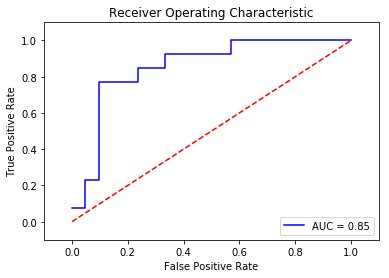

24  test  4050  acc=  0.7647059  loss =  0.5379665  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  4100  acc=  0.7352941  loss =  0.5420716  sen:  0.8461538461538461  spe:  0.6666666666666666
24  test  4150  acc=  0.7647059  loss =  0.5366389  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  4200  acc=  0.7941176  loss =  0.52502686  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  4250  acc=  0.7941176  loss =  0.52669543  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  4300  acc=  0.7647059  loss =  0.53667086  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  4350  acc=  0.7647059  loss =  0.5297395  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  4400  acc=  0.7352941  loss =  0.5395573  sen:  0.8461538461538461  spe:  0.6666666666666666
24  test  4450  acc=  0.7941176  loss =  0.52312034  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  4500  acc=  0.7647059  loss =  0.53650475  sen:  0.84615384

24  test  7950  acc=  0.7352941  loss =  0.54116625  sen:  0.8461538461538461  spe:  0.6666666666666666
24  test  8000  acc=  0.7647059  loss =  0.54244834  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


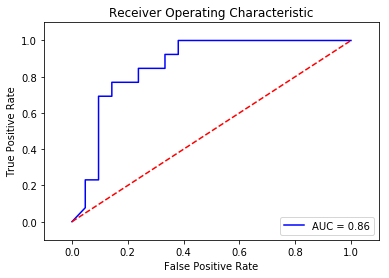

24  test  8050  acc=  0.7647059  loss =  0.5421918  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  8100  acc=  0.7647059  loss =  0.53418475  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  8150  acc=  0.7647059  loss =  0.53773355  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  8200  acc=  0.7647059  loss =  0.53838986  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  8250  acc=  0.7352941  loss =  0.54558325  sen:  0.8461538461538461  spe:  0.6666666666666666
24  test  8300  acc=  0.7647059  loss =  0.5363146  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  8350  acc=  0.7647059  loss =  0.54320097  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  8400  acc=  0.7352941  loss =  0.54222167  sen:  0.8461538461538461  spe:  0.6666666666666666
24  test  8450  acc=  0.7352941  loss =  0.5425945  sen:  0.8461538461538461  spe:  0.6666666666666666
24  test  8500  acc=  0.7941176  loss =  0.52512914  sen:  0.923076

24  test  11950  acc=  0.7647059  loss =  0.5249996  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  12000  acc=  0.7647059  loss =  0.52984774  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


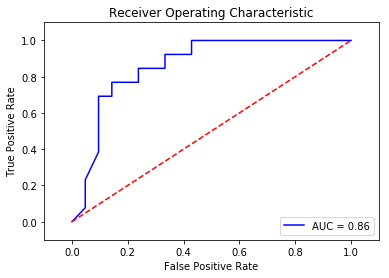

24  test  12050  acc=  0.7647059  loss =  0.5394909  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  12100  acc=  0.7647059  loss =  0.5240024  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  12150  acc=  0.7647059  loss =  0.53538275  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  12200  acc=  0.7647059  loss =  0.536439  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  12250  acc=  0.7647059  loss =  0.5319211  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  12300  acc=  0.7647059  loss =  0.53766394  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  12350  acc=  0.7647059  loss =  0.5372578  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  12400  acc=  0.7647059  loss =  0.5392845  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  12450  acc=  0.7647059  loss =  0.53086406  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  12500  acc=  0.7647059  loss =  0.5327693  sen:  0.8

24  test  15950  acc=  0.7647059  loss =  0.53095615  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  16000  acc=  0.7647059  loss =  0.5315335  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


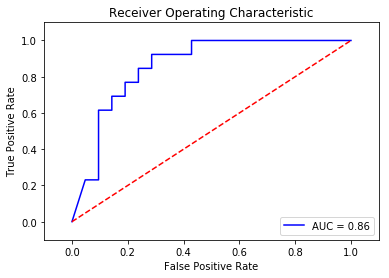

24  test  16050  acc=  0.7647059  loss =  0.531006  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  16100  acc=  0.7647059  loss =  0.52363014  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  16150  acc=  0.7647059  loss =  0.5267507  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  16200  acc=  0.7647059  loss =  0.5263642  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  16250  acc=  0.7647059  loss =  0.5331044  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  16300  acc=  0.7647059  loss =  0.5313629  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  16350  acc=  0.7941176  loss =  0.52303636  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  16400  acc=  0.7941176  loss =  0.5258668  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  16450  acc=  0.7647059  loss =  0.5309373  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  16500  acc=  0.7647059  loss =  0.52950203  sen:  0.8

24  test  19950  acc=  0.7647059  loss =  0.5321123  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  20000  acc=  0.7647059  loss =  0.53211236  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


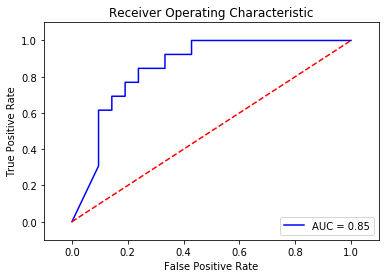

24  test  20050  acc=  0.7941176  loss =  0.52810884  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  20100  acc=  0.7647059  loss =  0.530557  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  20150  acc=  0.7647059  loss =  0.5287472  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  20200  acc=  0.7647059  loss =  0.5359101  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  20250  acc=  0.7647059  loss =  0.53830844  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  20300  acc=  0.7647059  loss =  0.53544945  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  20350  acc=  0.7647059  loss =  0.53240633  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  20400  acc=  0.7647059  loss =  0.52569985  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  20450  acc=  0.7647059  loss =  0.5353994  sen:  0.8461538461538461  spe:  0.7142857142857143
24  test  20500  acc=  0.7941176  loss =  0.5221786  sen:  0

24  test  23950  acc=  0.8235294  loss =  0.5124966  sen:  0.9230769230769231  spe:  0.7619047619047619
24  test  24000  acc=  0.8235294  loss =  0.5082211  sen:  0.9230769230769231  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


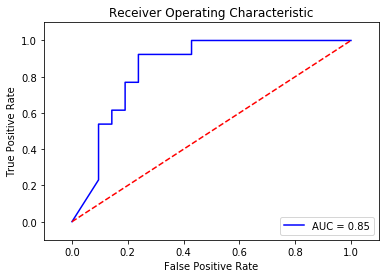

24  test  24050  acc=  0.8235294  loss =  0.5153533  sen:  0.9230769230769231  spe:  0.7619047619047619
24  test  24100  acc=  0.7941176  loss =  0.51824045  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  24150  acc=  0.8235294  loss =  0.5144744  sen:  0.9230769230769231  spe:  0.7619047619047619
24  test  24200  acc=  0.7941176  loss =  0.52195626  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  24250  acc=  0.7941176  loss =  0.5154872  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  24300  acc=  0.7941176  loss =  0.515142  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  24350  acc=  0.8235294  loss =  0.50730735  sen:  0.9230769230769231  spe:  0.7619047619047619
24  test  24400  acc=  0.7941176  loss =  0.5206331  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  24450  acc=  0.8235294  loss =  0.5066465  sen:  0.9230769230769231  spe:  0.7619047619047619
24  test  24500  acc=  0.7941176  loss =  0.5087371  sen:  0.8

24  test  27950  acc=  0.7941176  loss =  0.5126672  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  28000  acc=  0.7941176  loss =  0.5137978  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


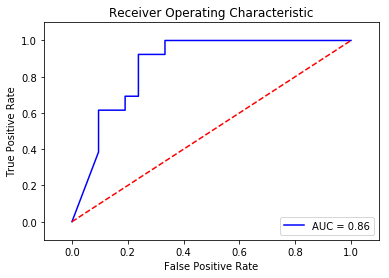

24  test  28050  acc=  0.7941176  loss =  0.5129462  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  28100  acc=  0.7941176  loss =  0.5185459  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  28150  acc=  0.7941176  loss =  0.5145906  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  28200  acc=  0.7941176  loss =  0.5134543  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  28250  acc=  0.7941176  loss =  0.51828676  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  28300  acc=  0.8235294  loss =  0.5040814  sen:  0.9230769230769231  spe:  0.7619047619047619
24  test  28350  acc=  0.7941176  loss =  0.5140531  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  28400  acc=  0.7941176  loss =  0.5173108  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  28450  acc=  0.7941176  loss =  0.51775163  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  28500  acc=  0.7941176  loss =  0.5182765  sen:  0.8

24  test  31950  acc=  0.7941176  loss =  0.51138663  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  32000  acc=  0.7941176  loss =  0.51296437  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


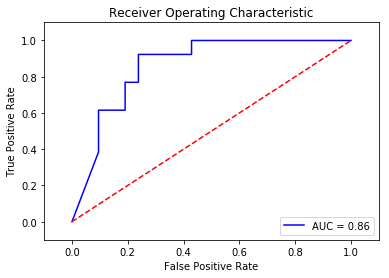

24  test  32050  acc=  0.8235294  loss =  0.50497997  sen:  0.9230769230769231  spe:  0.7619047619047619
24  test  32100  acc=  0.7941176  loss =  0.5120062  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  32150  acc=  0.7941176  loss =  0.5162926  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  32200  acc=  0.7941176  loss =  0.5166467  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  32250  acc=  0.7941176  loss =  0.5173587  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  32300  acc=  0.7941176  loss =  0.5112878  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  32350  acc=  0.7941176  loss =  0.51268977  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  32400  acc=  0.7941176  loss =  0.5108935  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  32450  acc=  0.7941176  loss =  0.51773876  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  32500  acc=  0.7941176  loss =  0.5179277  sen:  0.

24  test  35950  acc=  0.7941176  loss =  0.5168234  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  36000  acc=  0.7941176  loss =  0.5178468  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


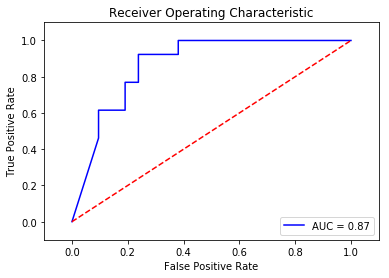

24  test  36050  acc=  0.8235294  loss =  0.5096524  sen:  0.9230769230769231  spe:  0.7619047619047619
24  test  36100  acc=  0.7941176  loss =  0.51343685  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  36150  acc=  0.7941176  loss =  0.5158738  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  36200  acc=  0.7941176  loss =  0.5198361  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  36250  acc=  0.7941176  loss =  0.521278  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  36300  acc=  0.7941176  loss =  0.5189298  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  36350  acc=  0.7941176  loss =  0.51712286  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  36400  acc=  0.7941176  loss =  0.51850855  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  36450  acc=  0.7941176  loss =  0.52057797  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  36500  acc=  0.7941176  loss =  0.51866966  sen:  0

24  test  39950  acc=  0.7941176  loss =  0.5192206  sen:  0.8461538461538461  spe:  0.7619047619047619
24  test  40000  acc=  0.7941176  loss =  0.5201516  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


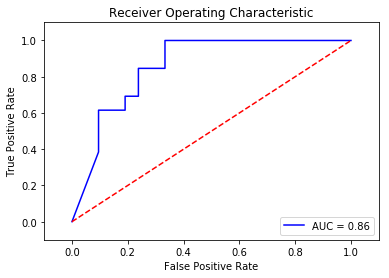

25  test  0  acc=  0.3529412  loss =  0.70909923  sen:  0.7692307692307693  spe:  0.09523809523809523
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1]


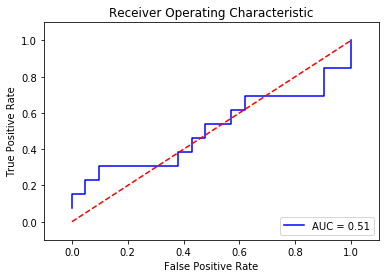

25  test  50  acc=  0.5882353  loss =  0.67466  sen:  0.6923076923076923  spe:  0.5238095238095238
25  test  100  acc=  0.61764705  loss =  0.650517  sen:  0.6153846153846154  spe:  0.6190476190476191
25  test  150  acc=  0.64705884  loss =  0.6564914  sen:  0.7692307692307693  spe:  0.5714285714285714
25  test  200  acc=  0.64705884  loss =  0.6481203  sen:  0.7692307692307693  spe:  0.5714285714285714
25  test  250  acc=  0.7058824  loss =  0.63301426  sen:  0.6923076923076923  spe:  0.7142857142857143
25  test  300  acc=  0.7352941  loss =  0.63305444  sen:  0.7692307692307693  spe:  0.7142857142857143
25  test  350  acc=  0.64705884  loss =  0.63958627  sen:  0.7692307692307693  spe:  0.5714285714285714
25  test  400  acc=  0.7352941  loss =  0.62680435  sen:  0.7692307692307693  spe:  0.7142857142857143
25  test  450  acc=  0.7352941  loss =  0.62329155  sen:  0.7692307692307693  spe:  0.7142857142857143
25  test  500  acc=  0.7352941  loss =  0.6162029  sen:  0.7692307692307693  

25  test  4000  acc=  0.7941176  loss =  0.529636  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


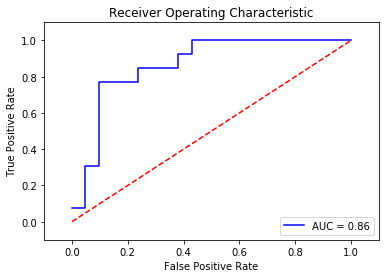

25  test  4050  acc=  0.7647059  loss =  0.5275593  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  4100  acc=  0.7647059  loss =  0.5294262  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  4150  acc=  0.7647059  loss =  0.52432245  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  4200  acc=  0.7352941  loss =  0.52493775  sen:  0.7692307692307693  spe:  0.7142857142857143
25  test  4250  acc=  0.7647059  loss =  0.5121867  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  4300  acc=  0.7941176  loss =  0.51751673  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  4350  acc=  0.7352941  loss =  0.51819724  sen:  0.7692307692307693  spe:  0.7142857142857143
25  test  4400  acc=  0.7647059  loss =  0.52623224  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  4450  acc=  0.7647059  loss =  0.50801647  sen:  0.7692307692307693  spe:  0.7619047619047619
25  test  4500  acc=  0.7647059  loss =  0.5196797  sen:  0.7692307

25  test  7950  acc=  0.7941176  loss =  0.5235529  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  8000  acc=  0.7941176  loss =  0.51702154  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


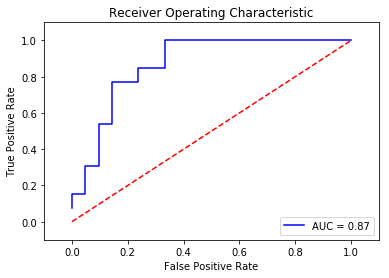

25  test  8050  acc=  0.7941176  loss =  0.5277742  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  8100  acc=  0.7941176  loss =  0.5151615  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  8150  acc=  0.7647059  loss =  0.5182421  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  8200  acc=  0.7941176  loss =  0.521068  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  8250  acc=  0.7941176  loss =  0.51936454  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  8300  acc=  0.7941176  loss =  0.5140907  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  8350  acc=  0.7941176  loss =  0.514102  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  8400  acc=  0.7941176  loss =  0.514314  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  8450  acc=  0.7941176  loss =  0.5227713  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  8500  acc=  0.7941176  loss =  0.52194136  sen:  0.84615384615384

25  test  11950  acc=  0.7941176  loss =  0.5122291  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  12000  acc=  0.7647059  loss =  0.5201633  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


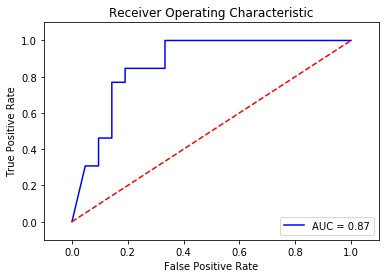

25  test  12050  acc=  0.7647059  loss =  0.52262497  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  12100  acc=  0.7941176  loss =  0.51715094  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  12150  acc=  0.7647059  loss =  0.5169416  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  12200  acc=  0.7941176  loss =  0.5149083  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  12250  acc=  0.7941176  loss =  0.5168931  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  12300  acc=  0.7647059  loss =  0.5213411  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  12350  acc=  0.7647059  loss =  0.52199244  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  12400  acc=  0.7647059  loss =  0.52572906  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  12450  acc=  0.7647059  loss =  0.5186334  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  12500  acc=  0.7647059  loss =  0.5193805  sen:  0

25  test  15950  acc=  0.7647059  loss =  0.51930135  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  16000  acc=  0.7647059  loss =  0.5227696  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


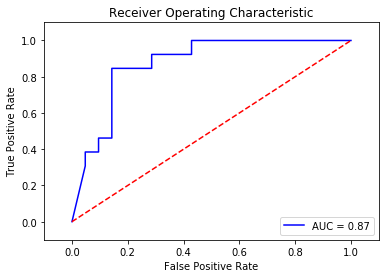

25  test  16050  acc=  0.7647059  loss =  0.5231428  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  16100  acc=  0.7647059  loss =  0.52117133  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  16150  acc=  0.7647059  loss =  0.5186544  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  16200  acc=  0.7647059  loss =  0.5173583  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  16250  acc=  0.7647059  loss =  0.51915383  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  16300  acc=  0.7647059  loss =  0.53183264  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  16350  acc=  0.7647059  loss =  0.52477956  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  16400  acc=  0.7941176  loss =  0.51887053  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  16450  acc=  0.7941176  loss =  0.5142663  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  16500  acc=  0.7941176  loss =  0.5168875  sen:  

25  test  19950  acc=  0.7647059  loss =  0.5131971  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  20000  acc=  0.7647059  loss =  0.50679547  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


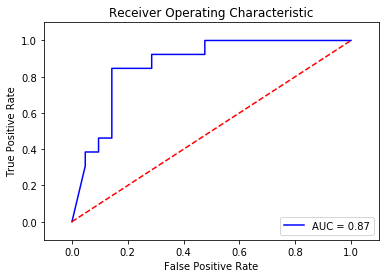

25  test  20050  acc=  0.7647059  loss =  0.5120919  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  20100  acc=  0.7941176  loss =  0.49621475  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  20150  acc=  0.7647059  loss =  0.51826036  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  20200  acc=  0.7647059  loss =  0.51061434  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  20250  acc=  0.7647059  loss =  0.5072424  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  20300  acc=  0.7647059  loss =  0.51139235  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  20350  acc=  0.7647059  loss =  0.52059007  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  20400  acc=  0.7647059  loss =  0.5107819  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  20450  acc=  0.7647059  loss =  0.51934266  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  20500  acc=  0.7941176  loss =  0.5166618  sen: 

25  test  23950  acc=  0.7647059  loss =  0.50764126  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  24000  acc=  0.7647059  loss =  0.51433283  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


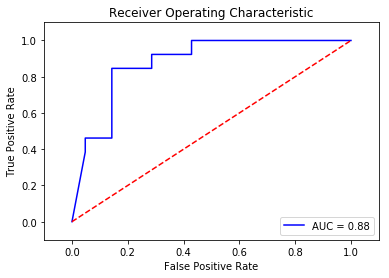

25  test  24050  acc=  0.7647059  loss =  0.5215132  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  24100  acc=  0.7647059  loss =  0.5097739  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  24150  acc=  0.7647059  loss =  0.5203377  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  24200  acc=  0.7647059  loss =  0.5127273  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  24250  acc=  0.7647059  loss =  0.5154205  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  24300  acc=  0.7941176  loss =  0.50925875  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  24350  acc=  0.7647059  loss =  0.5151415  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  24400  acc=  0.7647059  loss =  0.5094174  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  24450  acc=  0.7647059  loss =  0.5165715  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  24500  acc=  0.7647059  loss =  0.5054503  sen:  0.84

25  test  27950  acc=  0.7647059  loss =  0.51540834  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  28000  acc=  0.7647059  loss =  0.50904226  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


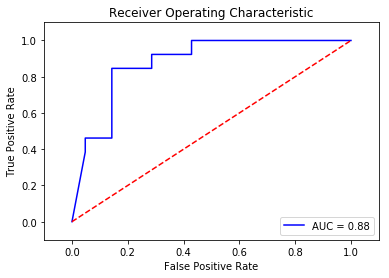

25  test  28050  acc=  0.7647059  loss =  0.51129544  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  28100  acc=  0.7647059  loss =  0.5056045  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  28150  acc=  0.7647059  loss =  0.51564425  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  28200  acc=  0.7647059  loss =  0.51087976  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  28250  acc=  0.7647059  loss =  0.50864667  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  28300  acc=  0.7647059  loss =  0.5154585  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  28350  acc=  0.7941176  loss =  0.5069296  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  28400  acc=  0.7941176  loss =  0.51154596  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  28450  acc=  0.7941176  loss =  0.5092906  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  28500  acc=  0.7647059  loss =  0.51038814  sen: 

25  test  31950  acc=  0.7941176  loss =  0.51594824  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  32000  acc=  0.7941176  loss =  0.51536715  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


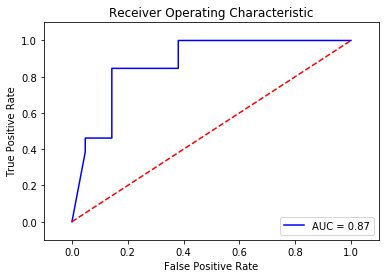

25  test  32050  acc=  0.7941176  loss =  0.5220797  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  32100  acc=  0.7941176  loss =  0.5124937  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  32150  acc=  0.7647059  loss =  0.52183014  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  32200  acc=  0.7647059  loss =  0.5204262  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  32250  acc=  0.7647059  loss =  0.5195697  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  32300  acc=  0.7647059  loss =  0.5193315  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  32350  acc=  0.7647059  loss =  0.5211985  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  32400  acc=  0.7647059  loss =  0.5058091  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  32450  acc=  0.7941176  loss =  0.5075798  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  32500  acc=  0.7647059  loss =  0.51946497  sen:  0.8

25  test  35950  acc=  0.7647059  loss =  0.5080488  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  36000  acc=  0.7647059  loss =  0.50874305  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


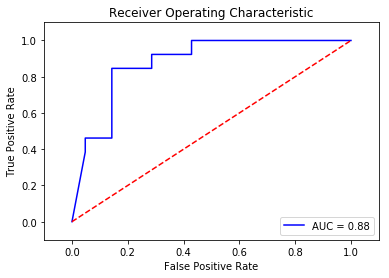

25  test  36050  acc=  0.7647059  loss =  0.5030433  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  36100  acc=  0.7647059  loss =  0.505265  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  36150  acc=  0.7647059  loss =  0.5071035  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  36200  acc=  0.7647059  loss =  0.50363874  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  36250  acc=  0.7647059  loss =  0.513371  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  36300  acc=  0.7647059  loss =  0.5087994  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  36350  acc=  0.7647059  loss =  0.51291543  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  36400  acc=  0.7647059  loss =  0.5129986  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  36450  acc=  0.7647059  loss =  0.5108955  sen:  0.8461538461538461  spe:  0.7142857142857143
25  test  36500  acc=  0.7647059  loss =  0.51069534  sen:  0.84

25  test  39950  acc=  0.7941176  loss =  0.49531835  sen:  0.8461538461538461  spe:  0.7619047619047619
25  test  40000  acc=  0.7647059  loss =  0.521695  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


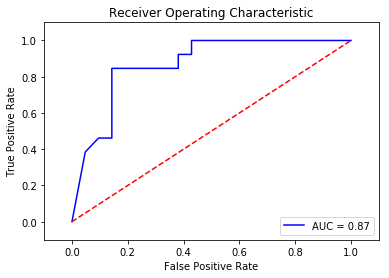

26  test  0  acc=  0.61764705  loss =  0.68250364  sen:  0.0  spe:  1.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


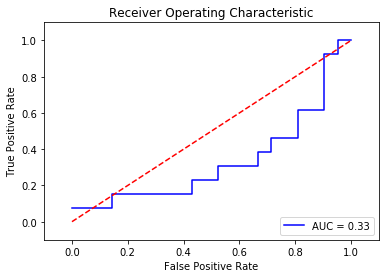

26  test  50  acc=  0.5882353  loss =  0.68037754  sen:  0.6153846153846154  spe:  0.5714285714285714
26  test  100  acc=  0.64705884  loss =  0.66992927  sen:  0.6923076923076923  spe:  0.6190476190476191
26  test  150  acc=  0.64705884  loss =  0.65524423  sen:  0.6923076923076923  spe:  0.6190476190476191
26  test  200  acc=  0.64705884  loss =  0.6487989  sen:  0.6923076923076923  spe:  0.6190476190476191
26  test  250  acc=  0.61764705  loss =  0.6515965  sen:  0.6923076923076923  spe:  0.5714285714285714
26  test  300  acc=  0.61764705  loss =  0.643497  sen:  0.6923076923076923  spe:  0.5714285714285714
26  test  350  acc=  0.61764705  loss =  0.64266354  sen:  0.6923076923076923  spe:  0.5714285714285714
26  test  400  acc=  0.61764705  loss =  0.6379116  sen:  0.6923076923076923  spe:  0.5714285714285714
26  test  450  acc=  0.64705884  loss =  0.63605124  sen:  0.7692307692307693  spe:  0.5714285714285714
26  test  500  acc=  0.64705884  loss =  0.6227243  sen:  0.69230769230

26  test  4000  acc=  0.7352941  loss =  0.5730969  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


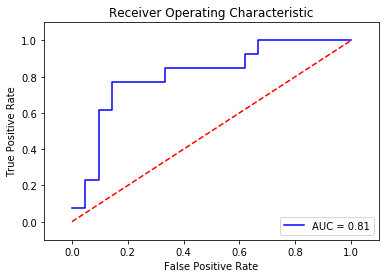

26  test  4050  acc=  0.7352941  loss =  0.5536574  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  4100  acc=  0.7352941  loss =  0.5553833  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  4150  acc=  0.7352941  loss =  0.5695863  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  4200  acc=  0.7647059  loss =  0.5593333  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  4250  acc=  0.7352941  loss =  0.5693841  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  4300  acc=  0.7352941  loss =  0.56526107  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  4350  acc=  0.7352941  loss =  0.56968737  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  4400  acc=  0.7352941  loss =  0.56352  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  4450  acc=  0.7352941  loss =  0.55714387  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  4500  acc=  0.7352941  loss =  0.57443464  sen:  0.84615384615

26  test  7950  acc=  0.7352941  loss =  0.5729556  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  8000  acc=  0.7352941  loss =  0.5782446  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


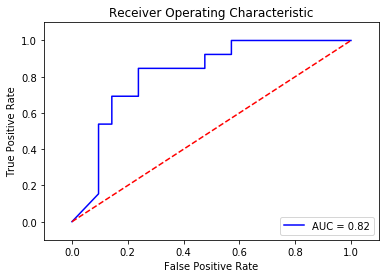

26  test  8050  acc=  0.7352941  loss =  0.56066597  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  8100  acc=  0.7352941  loss =  0.56580573  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  8150  acc=  0.7352941  loss =  0.5742431  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  8200  acc=  0.7352941  loss =  0.57232356  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  8250  acc=  0.7352941  loss =  0.5703263  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  8300  acc=  0.7352941  loss =  0.56597817  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  8350  acc=  0.7352941  loss =  0.5713394  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  8400  acc=  0.7352941  loss =  0.5697738  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  8450  acc=  0.7352941  loss =  0.5641965  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  8500  acc=  0.7352941  loss =  0.5688214  sen:  0.846153846

26  test  11950  acc=  0.7352941  loss =  0.57496846  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  12000  acc=  0.7352941  loss =  0.5683109  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


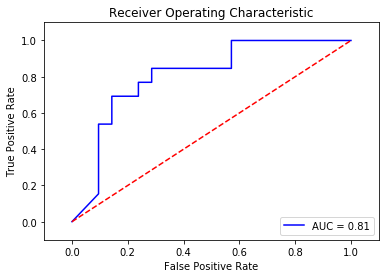

26  test  12050  acc=  0.7352941  loss =  0.57086515  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  12100  acc=  0.7647059  loss =  0.56241816  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  12150  acc=  0.7352941  loss =  0.572128  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  12200  acc=  0.7352941  loss =  0.57362413  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  12250  acc=  0.7352941  loss =  0.5745514  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  12300  acc=  0.7352941  loss =  0.5744476  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  12350  acc=  0.7352941  loss =  0.5780972  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  12400  acc=  0.7352941  loss =  0.56823754  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  12450  acc=  0.7352941  loss =  0.5681767  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  12500  acc=  0.7647059  loss =  0.56476426  sen:  0

26  test  15950  acc=  0.7352941  loss =  0.56757915  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  16000  acc=  0.7352941  loss =  0.5664519  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


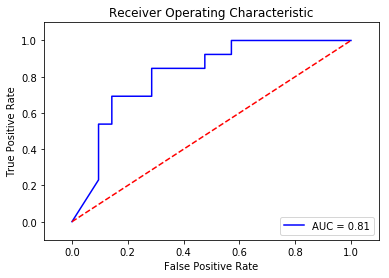

26  test  16050  acc=  0.7647059  loss =  0.5627895  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  16100  acc=  0.7352941  loss =  0.567711  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  16150  acc=  0.7352941  loss =  0.56900203  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  16200  acc=  0.7352941  loss =  0.56673187  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  16250  acc=  0.7647059  loss =  0.56410927  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  16300  acc=  0.7352941  loss =  0.5699859  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  16350  acc=  0.7647059  loss =  0.5620384  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  16400  acc=  0.7352941  loss =  0.5701195  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  16450  acc=  0.7352941  loss =  0.5708208  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  16500  acc=  0.7647059  loss =  0.5634968  sen:  0.8

26  test  19950  acc=  0.7352941  loss =  0.5674428  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  20000  acc=  0.7352941  loss =  0.56838316  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


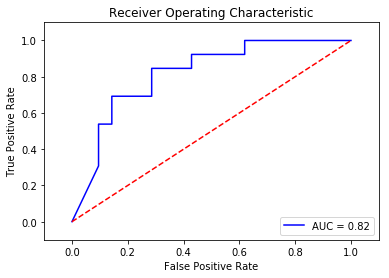

26  test  20050  acc=  0.7647059  loss =  0.56034994  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  20100  acc=  0.7352941  loss =  0.57175964  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  20150  acc=  0.7352941  loss =  0.57137537  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  20200  acc=  0.7352941  loss =  0.57004106  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  20250  acc=  0.7647059  loss =  0.5670122  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  20300  acc=  0.7352941  loss =  0.57261837  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  20350  acc=  0.7352941  loss =  0.5707512  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  20400  acc=  0.7352941  loss =  0.56977034  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  20450  acc=  0.7352941  loss =  0.5693456  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  20500  acc=  0.7352941  loss =  0.56936336  sen:

26  test  23950  acc=  0.7352941  loss =  0.5725293  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  24000  acc=  0.7352941  loss =  0.56989866  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


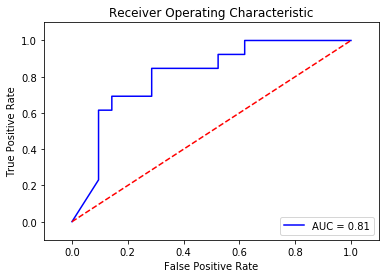

26  test  24050  acc=  0.7352941  loss =  0.5755763  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  24100  acc=  0.7352941  loss =  0.57093084  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  24150  acc=  0.7352941  loss =  0.57261527  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  24200  acc=  0.7352941  loss =  0.568666  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  24250  acc=  0.7352941  loss =  0.5711175  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  24300  acc=  0.7352941  loss =  0.5680582  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  24350  acc=  0.7352941  loss =  0.5637531  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  24400  acc=  0.7352941  loss =  0.56413835  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  24450  acc=  0.7352941  loss =  0.567948  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  24500  acc=  0.7352941  loss =  0.57008153  sen:  0.8

26  test  27950  acc=  0.7352941  loss =  0.5644454  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  28000  acc=  0.7352941  loss =  0.5698644  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


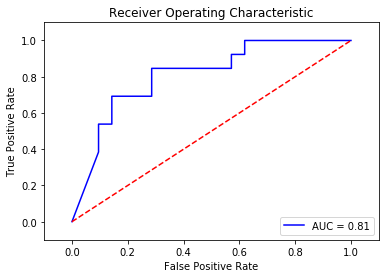

26  test  28050  acc=  0.7352941  loss =  0.56457275  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  28100  acc=  0.7352941  loss =  0.5638688  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  28150  acc=  0.7352941  loss =  0.566751  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  28200  acc=  0.7647059  loss =  0.56279165  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  28250  acc=  0.7352941  loss =  0.5679434  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  28300  acc=  0.7352941  loss =  0.56671154  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  28350  acc=  0.7647059  loss =  0.56412923  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  28400  acc=  0.7352941  loss =  0.5659203  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  28450  acc=  0.7352941  loss =  0.57371545  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  28500  acc=  0.7352941  loss =  0.5673634  sen:  0

26  test  31950  acc=  0.7647059  loss =  0.56113064  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  32000  acc=  0.7647059  loss =  0.56192863  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


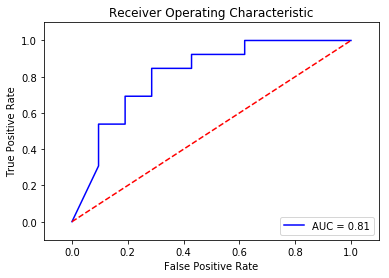

26  test  32050  acc=  0.7352941  loss =  0.5706048  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  32100  acc=  0.7647059  loss =  0.5606268  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  32150  acc=  0.7352941  loss =  0.5676536  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  32200  acc=  0.7352941  loss =  0.5700861  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  32250  acc=  0.7352941  loss =  0.56721926  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  32300  acc=  0.7647059  loss =  0.558771  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  32350  acc=  0.7647059  loss =  0.5619644  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  32400  acc=  0.7647059  loss =  0.5592954  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  32450  acc=  0.7352941  loss =  0.5644355  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  32500  acc=  0.7352941  loss =  0.56559426  sen:  0.84

26  test  35950  acc=  0.7647059  loss =  0.56045157  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  36000  acc=  0.7647059  loss =  0.562947  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


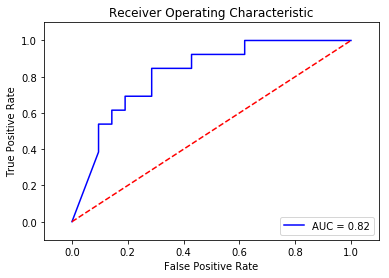

26  test  36050  acc=  0.7352941  loss =  0.5665352  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  36100  acc=  0.7647059  loss =  0.56113386  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  36150  acc=  0.7352941  loss =  0.56995225  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  36200  acc=  0.7352941  loss =  0.5671654  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  36250  acc=  0.7647059  loss =  0.5612517  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  36300  acc=  0.7647059  loss =  0.5632647  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  36350  acc=  0.7352941  loss =  0.56377876  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  36400  acc=  0.7352941  loss =  0.56610614  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  36450  acc=  0.7647059  loss =  0.56240183  sen:  0.8461538461538461  spe:  0.7142857142857143
26  test  36500  acc=  0.7647059  loss =  0.56239265  sen: 

26  test  39950  acc=  0.7352941  loss =  0.5670688  sen:  0.8461538461538461  spe:  0.6666666666666666
26  test  40000  acc=  0.7352941  loss =  0.5731275  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


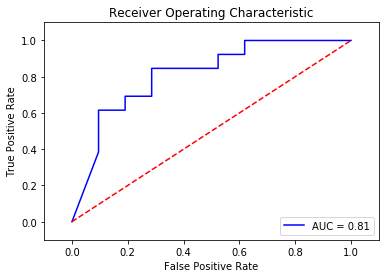

27  test  0  acc=  0.38235295  loss =  0.70390993  sen:  1.0  spe:  0.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


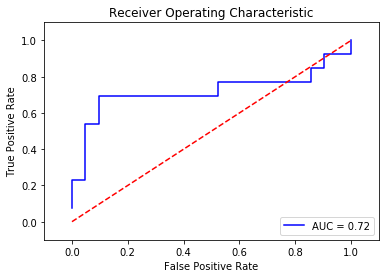

27  test  50  acc=  0.47058824  loss =  0.6642524  sen:  0.6153846153846154  spe:  0.38095238095238093
27  test  100  acc=  0.5588235  loss =  0.6554971  sen:  0.6923076923076923  spe:  0.47619047619047616
27  test  150  acc=  0.64705884  loss =  0.64444685  sen:  0.6923076923076923  spe:  0.6190476190476191
27  test  200  acc=  0.6764706  loss =  0.64153105  sen:  0.7692307692307693  spe:  0.6190476190476191
27  test  250  acc=  0.64705884  loss =  0.64203995  sen:  0.7692307692307693  spe:  0.5714285714285714
27  test  300  acc=  0.64705884  loss =  0.6415876  sen:  0.7692307692307693  spe:  0.5714285714285714
27  test  350  acc=  0.64705884  loss =  0.64569324  sen:  0.7692307692307693  spe:  0.5714285714285714
27  test  400  acc=  0.64705884  loss =  0.6434369  sen:  0.7692307692307693  spe:  0.5714285714285714
27  test  450  acc=  0.6764706  loss =  0.63331807  sen:  0.7692307692307693  spe:  0.6190476190476191
27  test  500  acc=  0.7058824  loss =  0.6208403  sen:  0.69230769230

27  test  3950  acc=  0.7058824  loss =  0.54633975  sen:  0.7692307692307693  spe:  0.6666666666666666
27  test  4000  acc=  0.7352941  loss =  0.5385414  sen:  0.7692307692307693  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


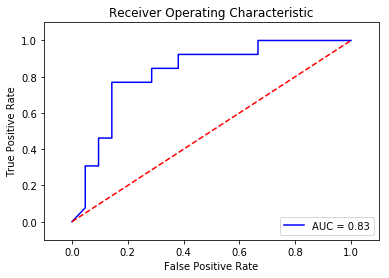

27  test  4050  acc=  0.7647059  loss =  0.54206383  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  4100  acc=  0.7352941  loss =  0.5437326  sen:  0.8461538461538461  spe:  0.6666666666666666
27  test  4150  acc=  0.7352941  loss =  0.53945297  sen:  0.7692307692307693  spe:  0.7142857142857143
27  test  4200  acc=  0.7352941  loss =  0.5561069  sen:  0.8461538461538461  spe:  0.6666666666666666
27  test  4250  acc=  0.7058824  loss =  0.54402953  sen:  0.7692307692307693  spe:  0.6666666666666666
27  test  4300  acc=  0.7647059  loss =  0.52328193  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  4350  acc=  0.7352941  loss =  0.55266064  sen:  0.8461538461538461  spe:  0.6666666666666666
27  test  4400  acc=  0.7058824  loss =  0.5450462  sen:  0.7692307692307693  spe:  0.6666666666666666
27  test  4450  acc=  0.7352941  loss =  0.54923517  sen:  0.8461538461538461  spe:  0.6666666666666666
27  test  4500  acc=  0.7352941  loss =  0.5518729  sen:  0.8461538

27  test  7950  acc=  0.7941176  loss =  0.53182197  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  8000  acc=  0.7647059  loss =  0.53187007  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1]


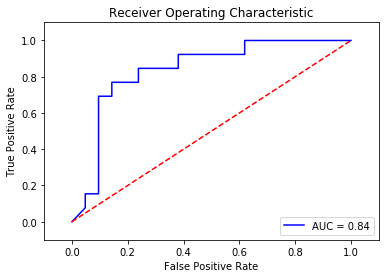

27  test  8050  acc=  0.7647059  loss =  0.5371025  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  8100  acc=  0.7352941  loss =  0.53527594  sen:  0.8461538461538461  spe:  0.6666666666666666
27  test  8150  acc=  0.7647059  loss =  0.5323653  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  8200  acc=  0.7647059  loss =  0.528392  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  8250  acc=  0.7647059  loss =  0.5307478  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  8300  acc=  0.7647059  loss =  0.5353779  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  8350  acc=  0.7647059  loss =  0.5331632  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  8400  acc=  0.7941176  loss =  0.5258971  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  8450  acc=  0.7941176  loss =  0.53515637  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  8500  acc=  0.7647059  loss =  0.5373741  sen:  0.846153846153

27  test  11950  acc=  0.7647059  loss =  0.53541297  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  12000  acc=  0.7941176  loss =  0.52281344  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1]


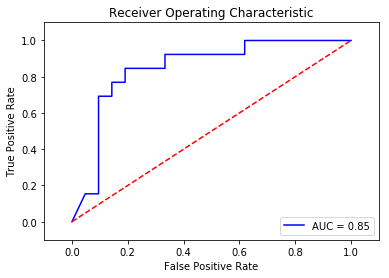

27  test  12050  acc=  0.7647059  loss =  0.53299874  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  12100  acc=  0.7647059  loss =  0.52960396  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  12150  acc=  0.7647059  loss =  0.5335821  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  12200  acc=  0.7647059  loss =  0.5309423  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  12250  acc=  0.7647059  loss =  0.53708154  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  12300  acc=  0.7647059  loss =  0.5252056  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  12350  acc=  0.7647059  loss =  0.52924097  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  12400  acc=  0.7647059  loss =  0.5337571  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  12450  acc=  0.7647059  loss =  0.53456175  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  12500  acc=  0.7647059  loss =  0.53486055  sen: 

27  test  15950  acc=  0.7941176  loss =  0.52122635  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  16000  acc=  0.7941176  loss =  0.5241504  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1]


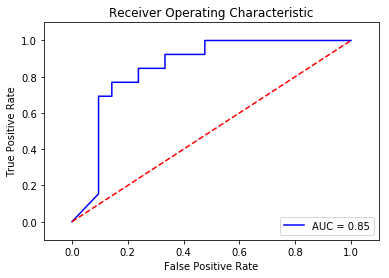

27  test  16050  acc=  0.7647059  loss =  0.53404045  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  16100  acc=  0.7941176  loss =  0.51279074  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  16150  acc=  0.7941176  loss =  0.5239816  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  16200  acc=  0.7941176  loss =  0.5188669  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  16250  acc=  0.7941176  loss =  0.5254779  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  16300  acc=  0.8235294  loss =  0.51318145  sen:  0.8461538461538461  spe:  0.8095238095238095
27  test  16350  acc=  0.7941176  loss =  0.5231209  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  16400  acc=  0.7941176  loss =  0.5267534  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  16450  acc=  0.8235294  loss =  0.5141588  sen:  0.8461538461538461  spe:  0.8095238095238095
27  test  16500  acc=  0.7941176  loss =  0.5165903  sen:  0.

27  test  19950  acc=  0.7941176  loss =  0.5302733  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  20000  acc=  0.7647059  loss =  0.53698534  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


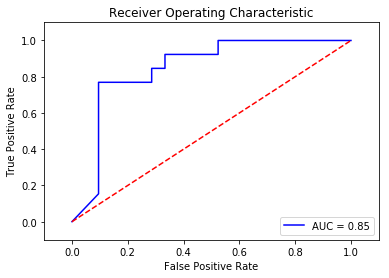

27  test  20050  acc=  0.7647059  loss =  0.53266364  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  20100  acc=  0.7941176  loss =  0.5245153  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  20150  acc=  0.7647059  loss =  0.5339601  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  20200  acc=  0.7941176  loss =  0.5295711  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  20250  acc=  0.7647059  loss =  0.5329115  sen:  0.8461538461538461  spe:  0.7142857142857143
27  test  20300  acc=  0.7941176  loss =  0.53022903  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  20350  acc=  0.7352941  loss =  0.5477023  sen:  0.8461538461538461  spe:  0.6666666666666666
27  test  20400  acc=  0.7941176  loss =  0.525565  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  20450  acc=  0.7647059  loss =  0.538204  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  20500  acc=  0.7647059  loss =  0.5338535  sen:  0.769

27  test  23950  acc=  0.7941176  loss =  0.52349246  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  24000  acc=  0.7941176  loss =  0.52641726  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1]


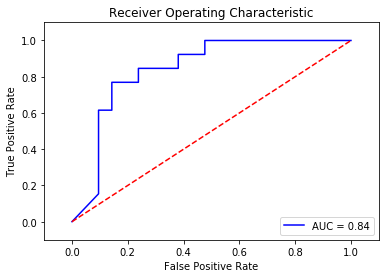

27  test  24050  acc=  0.7941176  loss =  0.5197444  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  24100  acc=  0.7647059  loss =  0.5391545  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  24150  acc=  0.7647059  loss =  0.52277994  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  24200  acc=  0.7647059  loss =  0.52157533  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  24250  acc=  0.7941176  loss =  0.529126  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  24300  acc=  0.7941176  loss =  0.5260904  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  24350  acc=  0.7647059  loss =  0.52999824  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  24400  acc=  0.7647059  loss =  0.52023005  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  24450  acc=  0.7647059  loss =  0.52655894  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  24500  acc=  0.7941176  loss =  0.52766156  sen:  

27  test  27950  acc=  0.7647059  loss =  0.5314785  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  28000  acc=  0.7647059  loss =  0.5411803  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


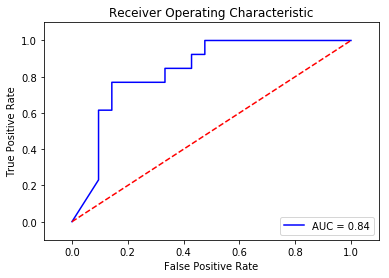

27  test  28050  acc=  0.7647059  loss =  0.5291861  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  28100  acc=  0.7647059  loss =  0.5304244  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  28150  acc=  0.7941176  loss =  0.5339213  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  28200  acc=  0.7647059  loss =  0.5243512  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  28250  acc=  0.7647059  loss =  0.53406495  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  28300  acc=  0.7647059  loss =  0.5351132  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  28350  acc=  0.7647059  loss =  0.5299978  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  28400  acc=  0.7647059  loss =  0.53094494  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  28450  acc=  0.7941176  loss =  0.5217925  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  28500  acc=  0.7941176  loss =  0.52125055  sen:  0.

27  test  31950  acc=  0.7941176  loss =  0.531338  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  32000  acc=  0.7647059  loss =  0.53662544  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


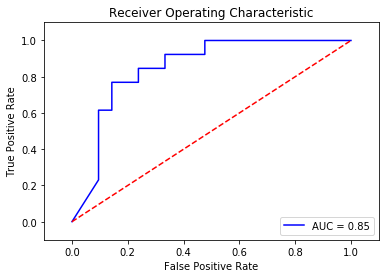

27  test  32050  acc=  0.7647059  loss =  0.53099316  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  32100  acc=  0.7647059  loss =  0.523404  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  32150  acc=  0.7647059  loss =  0.53191656  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  32200  acc=  0.7941176  loss =  0.5275327  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  32250  acc=  0.7647059  loss =  0.53451157  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  32300  acc=  0.7647059  loss =  0.5388944  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  32350  acc=  0.7647059  loss =  0.5359901  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  32400  acc=  0.7941176  loss =  0.5258321  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  32450  acc=  0.7941176  loss =  0.52413666  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  32500  acc=  0.7647059  loss =  0.5429692  sen:  0.

27  test  35950  acc=  0.7352941  loss =  0.54772794  sen:  0.8461538461538461  spe:  0.6666666666666666
27  test  36000  acc=  0.7647059  loss =  0.5415338  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


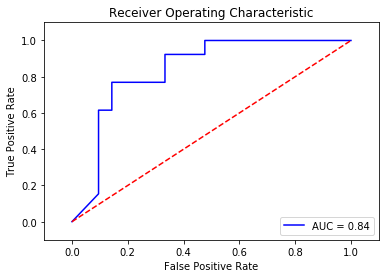

27  test  36050  acc=  0.7941176  loss =  0.5337455  sen:  0.8461538461538461  spe:  0.7619047619047619
27  test  36100  acc=  0.7647059  loss =  0.5345775  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  36150  acc=  0.7647059  loss =  0.5408955  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  36200  acc=  0.7647059  loss =  0.5357265  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  36250  acc=  0.7647059  loss =  0.53702456  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  36300  acc=  0.7352941  loss =  0.55163074  sen:  0.7692307692307693  spe:  0.7142857142857143
27  test  36350  acc=  0.7647059  loss =  0.5354835  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  36400  acc=  0.7647059  loss =  0.5405235  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  36450  acc=  0.7647059  loss =  0.5372645  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  36500  acc=  0.7647059  loss =  0.542298  sen:  0.76

27  test  39950  acc=  0.7647059  loss =  0.53343517  sen:  0.7692307692307693  spe:  0.7619047619047619
27  test  40000  acc=  0.7647059  loss =  0.53263676  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


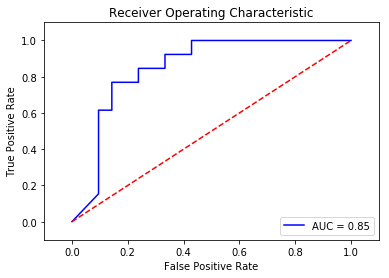

28  test  0  acc=  0.5882353  loss =  0.67493635  sen:  0.6153846153846154  spe:  0.5714285714285714
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1]


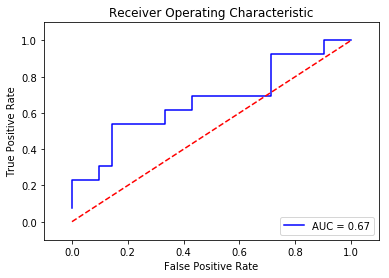

28  test  50  acc=  0.5294118  loss =  0.6691728  sen:  0.9230769230769231  spe:  0.2857142857142857
28  test  100  acc=  0.7058824  loss =  0.65113634  sen:  0.7692307692307693  spe:  0.6666666666666666
28  test  150  acc=  0.64705884  loss =  0.64942867  sen:  0.7692307692307693  spe:  0.5714285714285714
28  test  200  acc=  0.64705884  loss =  0.64798635  sen:  0.7692307692307693  spe:  0.5714285714285714
28  test  250  acc=  0.7352941  loss =  0.6273642  sen:  0.7692307692307693  spe:  0.7142857142857143
28  test  300  acc=  0.6764706  loss =  0.6353783  sen:  0.7692307692307693  spe:  0.6190476190476191
28  test  350  acc=  0.6764706  loss =  0.62901074  sen:  0.7692307692307693  spe:  0.6190476190476191
28  test  400  acc=  0.6764706  loss =  0.62827617  sen:  0.7692307692307693  spe:  0.6190476190476191
28  test  450  acc=  0.6764706  loss =  0.6192337  sen:  0.6923076923076923  spe:  0.6666666666666666
28  test  500  acc=  0.6764706  loss =  0.61631787  sen:  0.6923076923076923

28  test  3950  acc=  0.7058824  loss =  0.5501676  sen:  0.7692307692307693  spe:  0.6666666666666666
28  test  4000  acc=  0.7352941  loss =  0.5492143  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1]


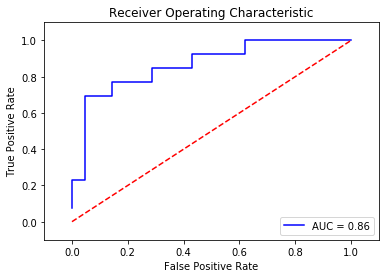

28  test  4050  acc=  0.7058824  loss =  0.54271156  sen:  0.7692307692307693  spe:  0.6666666666666666
28  test  4100  acc=  0.7647059  loss =  0.55693847  sen:  0.8461538461538461  spe:  0.7142857142857143
28  test  4150  acc=  0.7058824  loss =  0.5573764  sen:  0.8461538461538461  spe:  0.6190476190476191
28  test  4200  acc=  0.7058824  loss =  0.5424357  sen:  0.7692307692307693  spe:  0.6666666666666666
28  test  4250  acc=  0.7352941  loss =  0.5392623  sen:  0.8461538461538461  spe:  0.6666666666666666
28  test  4300  acc=  0.7352941  loss =  0.5368661  sen:  0.7692307692307693  spe:  0.7142857142857143
28  test  4350  acc=  0.7058824  loss =  0.55350053  sen:  0.7692307692307693  spe:  0.6666666666666666
28  test  4400  acc=  0.7647059  loss =  0.5434995  sen:  0.8461538461538461  spe:  0.7142857142857143
28  test  4450  acc=  0.7941176  loss =  0.5289283  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  4500  acc=  0.7058824  loss =  0.55042416  sen:  0.769230769

28  test  7950  acc=  0.7647059  loss =  0.5124542  sen:  0.8461538461538461  spe:  0.7142857142857143
28  test  8000  acc=  0.7647059  loss =  0.5302676  sen:  0.8461538461538461  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1]


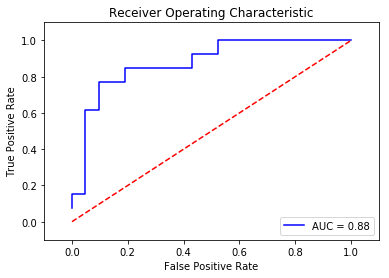

28  test  8050  acc=  0.7941176  loss =  0.5321226  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  8100  acc=  0.7647059  loss =  0.53326076  sen:  0.8461538461538461  spe:  0.7142857142857143
28  test  8150  acc=  0.7647059  loss =  0.5343175  sen:  0.8461538461538461  spe:  0.7142857142857143
28  test  8200  acc=  0.7352941  loss =  0.5344771  sen:  0.8461538461538461  spe:  0.6666666666666666
28  test  8250  acc=  0.7941176  loss =  0.5210014  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  8300  acc=  0.7352941  loss =  0.5429537  sen:  0.7692307692307693  spe:  0.7142857142857143
28  test  8350  acc=  0.7647059  loss =  0.5325089  sen:  0.8461538461538461  spe:  0.7142857142857143
28  test  8400  acc=  0.7941176  loss =  0.5311483  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  8450  acc=  0.7647059  loss =  0.546023  sen:  0.8461538461538461  spe:  0.7142857142857143
28  test  8500  acc=  0.7647059  loss =  0.53384256  sen:  0.846153846153

28  test  11950  acc=  0.7941176  loss =  0.51164657  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  12000  acc=  0.7941176  loss =  0.49854475  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1]


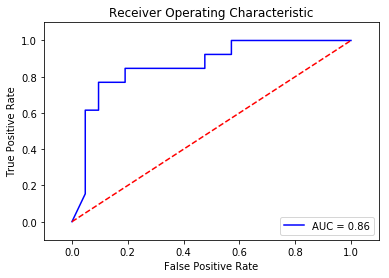

28  test  12050  acc=  0.7647059  loss =  0.5265577  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  12100  acc=  0.7941176  loss =  0.5041385  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  12150  acc=  0.7941176  loss =  0.5119435  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  12200  acc=  0.7941176  loss =  0.51306117  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  12250  acc=  0.7941176  loss =  0.5046358  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  12300  acc=  0.7941176  loss =  0.5048282  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  12350  acc=  0.7941176  loss =  0.516131  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  12400  acc=  0.7941176  loss =  0.49931926  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  12450  acc=  0.7941176  loss =  0.5211271  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  12500  acc=  0.7941176  loss =  0.5124324  sen:  0.84

28  test  15950  acc=  0.7941176  loss =  0.51506686  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  16000  acc=  0.7941176  loss =  0.5114636  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1]


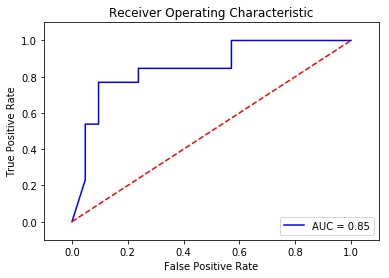

28  test  16050  acc=  0.7941176  loss =  0.4926871  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  16100  acc=  0.7941176  loss =  0.50015336  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  16150  acc=  0.7941176  loss =  0.49984664  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  16200  acc=  0.7941176  loss =  0.5152628  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  16250  acc=  0.7941176  loss =  0.5139752  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  16300  acc=  0.7941176  loss =  0.50863975  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  16350  acc=  0.7941176  loss =  0.5121001  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  16400  acc=  0.7941176  loss =  0.5205316  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  16450  acc=  0.7941176  loss =  0.5136008  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  16500  acc=  0.7941176  loss =  0.5160899  sen:  0.

28  test  19950  acc=  0.7647059  loss =  0.5370592  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  20000  acc=  0.7647059  loss =  0.5224814  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


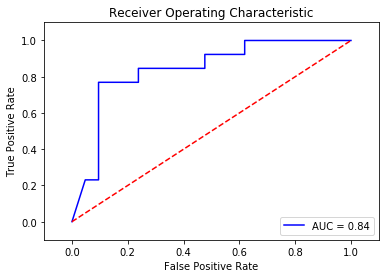

28  test  20050  acc=  0.7647059  loss =  0.52880853  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  20100  acc=  0.7647059  loss =  0.5115273  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  20150  acc=  0.7647059  loss =  0.5367626  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  20200  acc=  0.7647059  loss =  0.5373086  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  20250  acc=  0.7647059  loss =  0.5349312  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  20300  acc=  0.7647059  loss =  0.5333927  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  20350  acc=  0.7647059  loss =  0.53755254  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  20400  acc=  0.7647059  loss =  0.5302674  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  20450  acc=  0.7647059  loss =  0.534506  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  20500  acc=  0.7647059  loss =  0.5344838  sen:  0.76

28  test  23950  acc=  0.7647059  loss =  0.51958674  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  24000  acc=  0.7941176  loss =  0.51780844  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1]


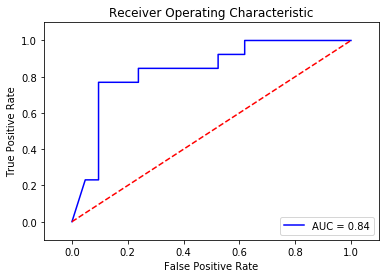

28  test  24050  acc=  0.7941176  loss =  0.5242671  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  24100  acc=  0.7647059  loss =  0.5230126  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  24150  acc=  0.7647059  loss =  0.52507794  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  24200  acc=  0.7647059  loss =  0.52424365  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  24250  acc=  0.7647059  loss =  0.5283785  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  24300  acc=  0.7647059  loss =  0.52260053  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  24350  acc=  0.7647059  loss =  0.52519256  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  24400  acc=  0.7647059  loss =  0.5414446  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  24450  acc=  0.7647059  loss =  0.52756387  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  24500  acc=  0.7941176  loss =  0.50986105  sen: 

28  test  27950  acc=  0.7647059  loss =  0.5263049  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  28000  acc=  0.7647059  loss =  0.5232947  sen:  0.7692307692307693  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1]


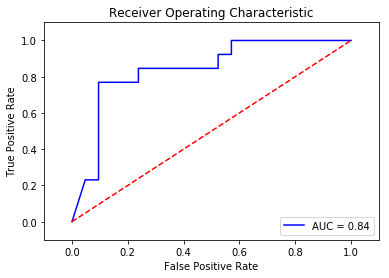

28  test  28050  acc=  0.7941176  loss =  0.52354944  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  28100  acc=  0.7647059  loss =  0.524941  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  28150  acc=  0.7647059  loss =  0.5278945  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  28200  acc=  0.7647059  loss =  0.5250281  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  28250  acc=  0.7941176  loss =  0.51953864  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  28300  acc=  0.7647059  loss =  0.5291119  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  28350  acc=  0.7941176  loss =  0.5219817  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  28400  acc=  0.7941176  loss =  0.513195  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  28450  acc=  0.7941176  loss =  0.5264992  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  28500  acc=  0.7941176  loss =  0.5253476  sen:  0.846

28  test  31950  acc=  0.7941176  loss =  0.5243896  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  32000  acc=  0.7941176  loss =  0.5217813  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1]


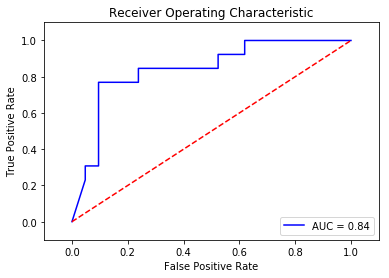

28  test  32050  acc=  0.7941176  loss =  0.52442336  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  32100  acc=  0.7941176  loss =  0.51999396  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  32150  acc=  0.7647059  loss =  0.53072965  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  32200  acc=  0.7941176  loss =  0.5172647  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  32250  acc=  0.7941176  loss =  0.52139556  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  32300  acc=  0.7941176  loss =  0.51903963  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  32350  acc=  0.7941176  loss =  0.52976376  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  32400  acc=  0.7647059  loss =  0.528296  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  32450  acc=  0.7647059  loss =  0.5307031  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  32500  acc=  0.7941176  loss =  0.5227587  sen:  

28  test  35950  acc=  0.7647059  loss =  0.5299073  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  36000  acc=  0.7941176  loss =  0.52300745  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1]


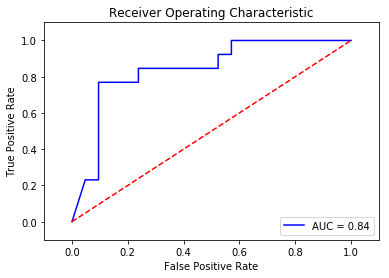

28  test  36050  acc=  0.7647059  loss =  0.527037  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  36100  acc=  0.7941176  loss =  0.52158785  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  36150  acc=  0.7941176  loss =  0.522056  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  36200  acc=  0.7647059  loss =  0.53277546  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  36250  acc=  0.7941176  loss =  0.5230173  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  36300  acc=  0.7941176  loss =  0.523275  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  36350  acc=  0.7647059  loss =  0.52048355  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  36400  acc=  0.7941176  loss =  0.52262026  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  36450  acc=  0.7941176  loss =  0.51804686  sen:  0.8461538461538461  spe:  0.7619047619047619
28  test  36500  acc=  0.7941176  loss =  0.5253977  sen:  0.8

28  test  39950  acc=  0.7647059  loss =  0.52866757  sen:  0.7692307692307693  spe:  0.7619047619047619
28  test  40000  acc=  0.7941176  loss =  0.5249977  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1]


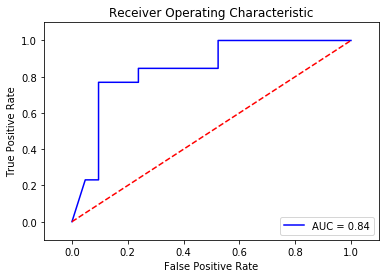

29  test  0  acc=  0.44117647  loss =  0.70183027  sen:  0.7692307692307693  spe:  0.23809523809523808
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1]


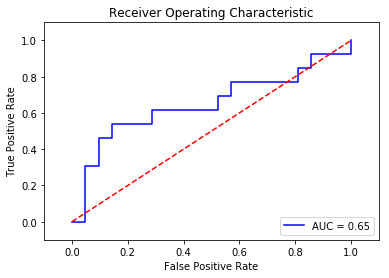

29  test  50  acc=  0.61764705  loss =  0.6681312  sen:  0.46153846153846156  spe:  0.7142857142857143
29  test  100  acc=  0.64705884  loss =  0.66441643  sen:  0.6153846153846154  spe:  0.6666666666666666
29  test  150  acc=  0.6764706  loss =  0.65483874  sen:  0.6923076923076923  spe:  0.6666666666666666
29  test  200  acc=  0.64705884  loss =  0.66218346  sen:  0.6153846153846154  spe:  0.6666666666666666
29  test  250  acc=  0.64705884  loss =  0.6463936  sen:  0.6153846153846154  spe:  0.6666666666666666
29  test  300  acc=  0.61764705  loss =  0.6525254  sen:  0.6923076923076923  spe:  0.5714285714285714
29  test  350  acc=  0.64705884  loss =  0.6413703  sen:  0.6923076923076923  spe:  0.6190476190476191
29  test  400  acc=  0.61764705  loss =  0.6513275  sen:  0.6923076923076923  spe:  0.5714285714285714
29  test  450  acc=  0.61764705  loss =  0.6513551  sen:  0.6923076923076923  spe:  0.5714285714285714
29  test  500  acc=  0.64705884  loss =  0.6354842  sen:  0.76923076923

29  test  3950  acc=  0.7647059  loss =  0.5262678  sen:  0.8461538461538461  spe:  0.7142857142857143
29  test  4000  acc=  0.7352941  loss =  0.5609451  sen:  0.8461538461538461  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


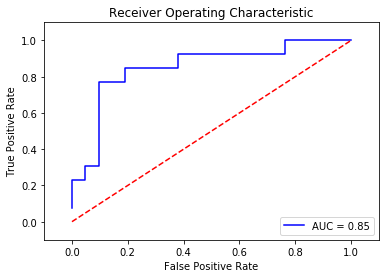

29  test  4050  acc=  0.7352941  loss =  0.5392845  sen:  0.8461538461538461  spe:  0.6666666666666666
29  test  4100  acc=  0.7352941  loss =  0.55212975  sen:  0.8461538461538461  spe:  0.6666666666666666
29  test  4150  acc=  0.7352941  loss =  0.57310295  sen:  0.8461538461538461  spe:  0.6666666666666666
29  test  4200  acc=  0.7352941  loss =  0.5507429  sen:  0.8461538461538461  spe:  0.6666666666666666
29  test  4250  acc=  0.7941176  loss =  0.51783824  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  4300  acc=  0.7941176  loss =  0.52048063  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  4350  acc=  0.7352941  loss =  0.5492593  sen:  0.8461538461538461  spe:  0.6666666666666666
29  test  4400  acc=  0.7941176  loss =  0.5281321  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  4450  acc=  0.7647059  loss =  0.5390014  sen:  0.8461538461538461  spe:  0.7142857142857143
29  test  4500  acc=  0.7352941  loss =  0.54093903  sen:  0.84615384

29  test  7950  acc=  0.7941176  loss =  0.519839  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  8000  acc=  0.7941176  loss =  0.51342  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


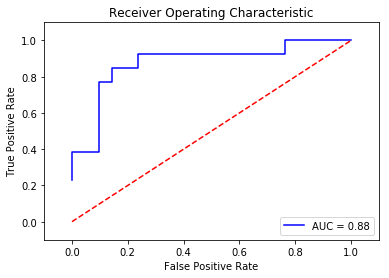

29  test  8050  acc=  0.7941176  loss =  0.5172435  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  8100  acc=  0.7941176  loss =  0.52260697  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  8150  acc=  0.7647059  loss =  0.5334012  sen:  0.8461538461538461  spe:  0.7142857142857143
29  test  8200  acc=  0.7647059  loss =  0.5340017  sen:  0.8461538461538461  spe:  0.7142857142857143
29  test  8250  acc=  0.7941176  loss =  0.5190512  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  8300  acc=  0.7941176  loss =  0.52517426  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  8350  acc=  0.7941176  loss =  0.52991146  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  8400  acc=  0.7941176  loss =  0.522758  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  8450  acc=  0.7647059  loss =  0.52478164  sen:  0.8461538461538461  spe:  0.7142857142857143
29  test  8500  acc=  0.7941176  loss =  0.51733553  sen:  0.846153846

29  test  11950  acc=  0.7941176  loss =  0.5198438  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  12000  acc=  0.7941176  loss =  0.49095014  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


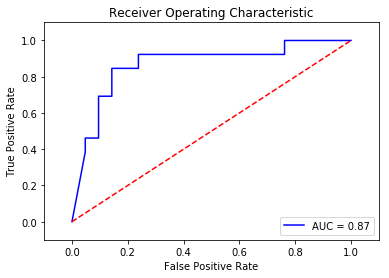

29  test  12050  acc=  0.7941176  loss =  0.52200615  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  12100  acc=  0.7941176  loss =  0.51415217  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  12150  acc=  0.7941176  loss =  0.5137449  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  12200  acc=  0.7941176  loss =  0.5102191  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  12250  acc=  0.7941176  loss =  0.51268065  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  12300  acc=  0.7941176  loss =  0.5152841  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  12350  acc=  0.7941176  loss =  0.50539446  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  12400  acc=  0.7941176  loss =  0.50726056  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  12450  acc=  0.7941176  loss =  0.52160484  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  12500  acc=  0.8235294  loss =  0.48987007  sen:

29  test  15950  acc=  0.7647059  loss =  0.5348646  sen:  0.8461538461538461  spe:  0.7142857142857143
29  test  16000  acc=  0.7941176  loss =  0.52823204  sen:  0.9230769230769231  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


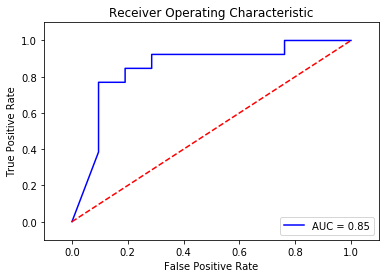

29  test  16050  acc=  0.7941176  loss =  0.5191884  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  16100  acc=  0.7941176  loss =  0.5164152  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  16150  acc=  0.7941176  loss =  0.50300115  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  16200  acc=  0.7941176  loss =  0.5230275  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  16250  acc=  0.7941176  loss =  0.50947595  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  16300  acc=  0.7941176  loss =  0.51138353  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  16350  acc=  0.8235294  loss =  0.5159605  sen:  0.9230769230769231  spe:  0.7619047619047619
29  test  16400  acc=  0.7941176  loss =  0.5251367  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  16450  acc=  0.7941176  loss =  0.5107485  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  16500  acc=  0.7941176  loss =  0.5185593  sen:  0.

29  test  19950  acc=  0.7941176  loss =  0.5159938  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  20000  acc=  0.7941176  loss =  0.5134443  sen:  0.8461538461538461  spe:  0.7619047619047619
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


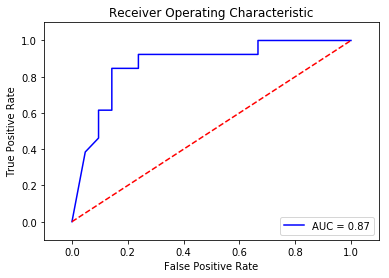

29  test  20050  acc=  0.8235294  loss =  0.5112229  sen:  0.9230769230769231  spe:  0.7619047619047619
29  test  20100  acc=  0.8235294  loss =  0.506526  sen:  0.9230769230769231  spe:  0.7619047619047619
29  test  20150  acc=  0.8235294  loss =  0.5148885  sen:  0.9230769230769231  spe:  0.7619047619047619
29  test  20200  acc=  0.8235294  loss =  0.50090677  sen:  0.9230769230769231  spe:  0.7619047619047619
29  test  20250  acc=  0.8235294  loss =  0.50568426  sen:  0.9230769230769231  spe:  0.7619047619047619
29  test  20300  acc=  0.8235294  loss =  0.510335  sen:  0.9230769230769231  spe:  0.7619047619047619
29  test  20350  acc=  0.7941176  loss =  0.5032574  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  20400  acc=  0.7941176  loss =  0.4988621  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  20450  acc=  0.8235294  loss =  0.50283456  sen:  0.9230769230769231  spe:  0.7619047619047619
29  test  20500  acc=  0.8235294  loss =  0.5076146  sen:  0.92

29  test  23950  acc=  0.7941176  loss =  0.5127814  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  24000  acc=  0.7941176  loss =  0.518074  sen:  0.9230769230769231  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


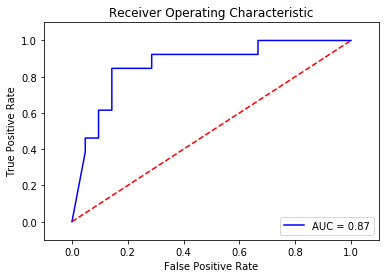

29  test  24050  acc=  0.7941176  loss =  0.5131377  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  24100  acc=  0.7941176  loss =  0.516601  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  24150  acc=  0.7941176  loss =  0.5119643  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  24200  acc=  0.8235294  loss =  0.5101794  sen:  0.9230769230769231  spe:  0.7619047619047619
29  test  24250  acc=  0.7941176  loss =  0.51424676  sen:  0.8461538461538461  spe:  0.7619047619047619
29  test  24300  acc=  0.7647059  loss =  0.5135715  sen:  0.8461538461538461  spe:  0.7142857142857143
29  test  24350  acc=  0.8235294  loss =  0.5121476  sen:  0.9230769230769231  spe:  0.7619047619047619
29  test  24400  acc=  0.7647059  loss =  0.5150526  sen:  0.8461538461538461  spe:  0.7142857142857143
29  test  24450  acc=  0.7941176  loss =  0.51384777  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  24500  acc=  0.7941176  loss =  0.509138  sen:  0.923

29  test  27950  acc=  0.7647059  loss =  0.544354  sen:  0.9230769230769231  spe:  0.6666666666666666
29  test  28000  acc=  0.7647059  loss =  0.5410371  sen:  0.9230769230769231  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


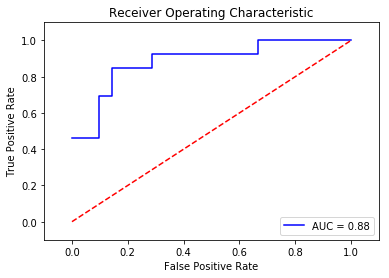

29  test  28050  acc=  0.7647059  loss =  0.53892386  sen:  0.9230769230769231  spe:  0.6666666666666666
29  test  28100  acc=  0.7647059  loss =  0.5511654  sen:  0.9230769230769231  spe:  0.6666666666666666
29  test  28150  acc=  0.7647059  loss =  0.54303396  sen:  0.9230769230769231  spe:  0.6666666666666666
29  test  28200  acc=  0.7352941  loss =  0.5502276  sen:  0.8461538461538461  spe:  0.6666666666666666
29  test  28250  acc=  0.7352941  loss =  0.5554879  sen:  0.9230769230769231  spe:  0.6190476190476191
29  test  28300  acc=  0.7647059  loss =  0.5329963  sen:  0.9230769230769231  spe:  0.6666666666666666
29  test  28350  acc=  0.7647059  loss =  0.53424436  sen:  0.9230769230769231  spe:  0.6666666666666666
29  test  28400  acc=  0.7647059  loss =  0.53984267  sen:  0.9230769230769231  spe:  0.6666666666666666
29  test  28450  acc=  0.7941176  loss =  0.5346614  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  28500  acc=  0.7647059  loss =  0.535193  sen:  0.

29  test  31950  acc=  0.7941176  loss =  0.5193275  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  32000  acc=  0.7941176  loss =  0.51955575  sen:  0.9230769230769231  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


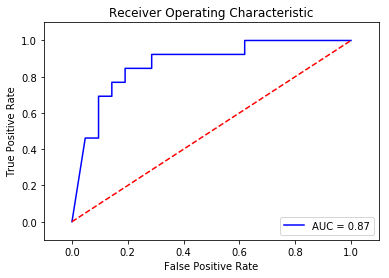

29  test  32050  acc=  0.7941176  loss =  0.5179185  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  32100  acc=  0.7941176  loss =  0.52403843  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  32150  acc=  0.7941176  loss =  0.5274351  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  32200  acc=  0.7941176  loss =  0.5207654  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  32250  acc=  0.7941176  loss =  0.5234685  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  32300  acc=  0.7941176  loss =  0.5367119  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  32350  acc=  0.7941176  loss =  0.5290838  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  32400  acc=  0.7941176  loss =  0.5266465  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  32450  acc=  0.7941176  loss =  0.52193135  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  32500  acc=  0.7941176  loss =  0.5259161  sen:  0.9

29  test  35950  acc=  0.7647059  loss =  0.52028644  sen:  0.9230769230769231  spe:  0.6666666666666666
29  test  36000  acc=  0.7647059  loss =  0.519765  sen:  0.9230769230769231  spe:  0.6666666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


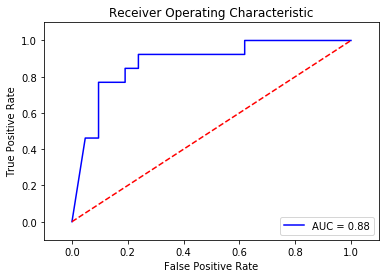

29  test  36050  acc=  0.7647059  loss =  0.5219852  sen:  0.9230769230769231  spe:  0.6666666666666666
29  test  36100  acc=  0.7647059  loss =  0.523489  sen:  0.9230769230769231  spe:  0.6666666666666666
29  test  36150  acc=  0.7647059  loss =  0.51822  sen:  0.9230769230769231  spe:  0.6666666666666666
29  test  36200  acc=  0.7941176  loss =  0.52021307  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  36250  acc=  0.7941176  loss =  0.5278017  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  36300  acc=  0.8235294  loss =  0.50100285  sen:  0.9230769230769231  spe:  0.7619047619047619
29  test  36350  acc=  0.7941176  loss =  0.5099681  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  36400  acc=  0.7941176  loss =  0.5134463  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  36450  acc=  0.7941176  loss =  0.51397365  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  36500  acc=  0.7941176  loss =  0.5199094  sen:  0.923

29  test  39950  acc=  0.7941176  loss =  0.5065277  sen:  0.9230769230769231  spe:  0.7142857142857143
29  test  40000  acc=  0.7941176  loss =  0.5180621  sen:  0.9230769230769231  spe:  0.7142857142857143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


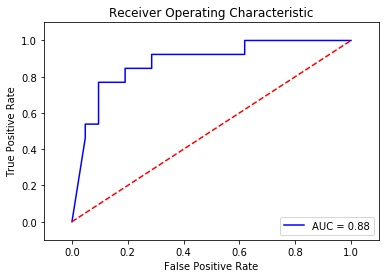

In [5]:
for num in range(20,30):                           #  4个PK + 9b
    with tf.Session(config=config) as sess:
        sess.run(init_op)
        coord = tf.train.Coordinator()
        tf.train.start_queue_runners(sess=sess,coord=coord)      #启动线程操作，这是因为之前数据增强的时候使用train.shuffle_batch()函数的时候通过参数num_threads()配置了16个线程用于组织batch的操作
        train_writer = tf.summary.FileWriter('G:/ZengQYuan/ivim_baoer_logs/hhy_cnn_fab_csab(4PK+9b)/train/'+str(num),sess.graph)
        test_writer = tf.summary.FileWriter('G:/ZengQYuan/ivim_baoer_logs/hhy_cnn_fab_csab(4PK+9b)/test/'+str(num),sess.graph)

        for step in range (40001):
            global_step = step
            idx = np.random.randint(0,13450,batch_size)          ###
            image_batch = series_train[idx]
            pk_batch = pk_train[idx]
            label_batch = y_train[idx]
            _,summary,loss_value=sess.run([train_op,merge,loss],feed_dict={series_:image_batch,pk_:pk_batch,y_:label_batch,keep_prob:0.5})
            train_writer.add_summary(summary,step)

            if step % 50 == 0:
                acc,loss_value,summary,output_position_r,label_position_r,predict_r,p = sess.run([Accuracy,loss,merge,output_position,label_position,predict,prediction],feed_dict={series_:series_test,pk_:pk_test,y_:y_test,keep_prob:1})         ###
                test_writer.add_summary(summary,step)
                sen,spe = Sensitivity_specificity(output_position_r,predict_r)
                print(str(num)," test ",str(step)," acc= ",acc," loss = ",loss_value," sen: ",sen," spe: ",spe)

                
            if step % 2000 == 0:
                print(label_position_r)
                print(output_position_r)
            
            if step % 4000 == 0:
                ROC(label_position_r,p)
                
        coord.request_stop() # 请求线程结束
        coord.join() # 等待线程结束